# sketch

In [1]:
from __future__ import print_function
import torch
from models import SketchModule
from utils import load_image, to_data, to_var, visualize, save_image, gaussian, weights_init
from utils import load_train_batchfnames, prepare_text_batch
import argparse
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

opts = argparse.ArgumentParser()
opts.GB_nlayers = 6
opts.DB_nlayers = 5
opts.GB_nf = 32
opts.DB_nf = 32
opts.gpu = True
opts.epochs = 3
opts.save_GB_name = '../save/GB.ckpt'
opts.batchsize = 16
opts.text_path = '../data/rawtext/yaheiB/train'
opts.augment_text_path = '../data/rawtext/augment'
opts.text_datasize = 708
opts.augment_text_datasize = 5
opts.Btraining_num = 12800

# create model
print('--- create model ---')
netSketch = SketchModule(opts.GB_nlayers, opts.DB_nlayers, opts.GB_nf, opts.DB_nf, opts.gpu)
if opts.gpu:
    netSketch.cuda()
netSketch.init_networks(weights_init)
netSketch.train()

print('--- training ---')
for epoch in range(opts.epochs):
    itr = 0
    fnames = load_train_batchfnames(opts.text_path, opts.batchsize, 
                                    opts.text_datasize, trainnum=opts.Btraining_num)
    fnames2 = load_train_batchfnames(opts.augment_text_path, opts.batchsize, 
                                    opts.augment_text_datasize, trainnum=opts.Btraining_num)
    for ii in range(len(fnames)):
        fnames[ii][0:opts.batchsize/2-1] = fnames2[ii][0:opts.batchsize/2-1]
    for fname in fnames:
        itr += 1
        t = prepare_text_batch(fname, anglejitter=True)
        t = to_var(t) if opts.gpu else t
        losses = netSketch.one_pass(t, [l/4.-1. for l in range(0,9)])      
        print('Epoch [%d/%d][%03d/%03d]' %(epoch+1, opts.epochs,itr,len(fnames)), end=': ')
        print('LDadv: %+.3f, LGadv: %+.3f, Lrec: %+.3f'%(losses[0], losses[1], losses[2]))

print('--- save ---')
# directory
torch.save(netSketch.state_dict(), opts.save_GB_name)

--- create model ---
--- training ---
Epoch [1/3][001/800]: LDadv: +0.054, LGadv: +0.077, Lrec: +69.597
Epoch [1/3][002/800]: LDadv: +0.168, LGadv: +0.091, Lrec: +61.305
Epoch [1/3][003/800]: LDadv: +0.246, LGadv: +0.018, Lrec: +39.864
Epoch [1/3][004/800]: LDadv: +0.325, LGadv: +0.285, Lrec: +36.002
Epoch [1/3][005/800]: LDadv: +0.511, LGadv: +0.551, Lrec: +27.056
Epoch [1/3][006/800]: LDadv: +0.814, LGadv: +0.448, Lrec: +22.703
Epoch [1/3][007/800]: LDadv: +0.635, LGadv: +0.680, Lrec: +23.021
Epoch [1/3][008/800]: LDadv: +0.467, LGadv: +0.755, Lrec: +17.210
Epoch [1/3][009/800]: LDadv: +0.803, LGadv: -0.250, Lrec: +15.097
Epoch [1/3][010/800]: LDadv: +0.249, LGadv: +1.205, Lrec: +16.521
Epoch [1/3][011/800]: LDadv: +0.341, LGadv: +0.652, Lrec: +14.435
Epoch [1/3][012/800]: LDadv: +0.314, LGadv: +0.156, Lrec: +11.517
Epoch [1/3][013/800]: LDadv: +0.116, LGadv: +0.890, Lrec: +10.231
Epoch [1/3][014/800]: LDadv: +0.073, LGadv: -0.202, Lrec: +12.975
Epoch [1/3][015/800]: LDadv: +0.014, L

Epoch [1/3][127/800]: LDadv: +0.038, LGadv: -0.092, Lrec: +5.664
Epoch [1/3][128/800]: LDadv: +0.053, LGadv: -0.303, Lrec: +3.923
Epoch [1/3][129/800]: LDadv: +0.023, LGadv: -0.340, Lrec: +4.926
Epoch [1/3][130/800]: LDadv: +0.005, LGadv: -0.338, Lrec: +3.909
Epoch [1/3][131/800]: LDadv: +0.063, LGadv: -0.245, Lrec: +7.292
Epoch [1/3][132/800]: LDadv: +0.019, LGadv: -0.325, Lrec: +3.434
Epoch [1/3][133/800]: LDadv: -0.007, LGadv: -0.374, Lrec: +3.048
Epoch [1/3][134/800]: LDadv: +0.086, LGadv: -0.116, Lrec: +4.499
Epoch [1/3][135/800]: LDadv: +0.056, LGadv: -0.033, Lrec: +5.011
Epoch [1/3][136/800]: LDadv: +0.065, LGadv: -0.039, Lrec: +5.137
Epoch [1/3][137/800]: LDadv: +0.042, LGadv: -0.073, Lrec: +6.184
Epoch [1/3][138/800]: LDadv: +0.086, LGadv: +0.178, Lrec: +6.296
Epoch [1/3][139/800]: LDadv: +0.038, LGadv: +0.025, Lrec: +6.823
Epoch [1/3][140/800]: LDadv: +0.070, LGadv: -0.042, Lrec: +5.775
Epoch [1/3][141/800]: LDadv: +0.039, LGadv: +0.013, Lrec: +5.543
Epoch [1/3][142/800]: LDa

Epoch [1/3][254/800]: LDadv: +0.021, LGadv: +1.700, Lrec: +3.110
Epoch [1/3][255/800]: LDadv: -0.040, LGadv: +1.286, Lrec: +3.061
Epoch [1/3][256/800]: LDadv: +0.021, LGadv: +1.013, Lrec: +2.543
Epoch [1/3][257/800]: LDadv: -0.035, LGadv: +0.757, Lrec: +2.867
Epoch [1/3][258/800]: LDadv: +0.088, LGadv: +0.772, Lrec: +4.337
Epoch [1/3][259/800]: LDadv: +0.062, LGadv: -0.057, Lrec: +5.236
Epoch [1/3][260/800]: LDadv: -0.045, LGadv: -0.467, Lrec: +4.783
Epoch [1/3][261/800]: LDadv: -0.022, LGadv: +0.265, Lrec: +5.208
Epoch [1/3][262/800]: LDadv: +0.076, LGadv: +0.549, Lrec: +4.676
Epoch [1/3][263/800]: LDadv: +0.041, LGadv: +0.991, Lrec: +4.036
Epoch [1/3][264/800]: LDadv: -0.011, LGadv: +0.917, Lrec: +2.110
Epoch [1/3][265/800]: LDadv: +0.020, LGadv: +0.791, Lrec: +2.780
Epoch [1/3][266/800]: LDadv: +0.041, LGadv: +0.565, Lrec: +3.343
Epoch [1/3][267/800]: LDadv: +0.002, LGadv: +0.513, Lrec: +5.927
Epoch [1/3][268/800]: LDadv: +0.054, LGadv: +0.063, Lrec: +4.517
Epoch [1/3][269/800]: LDa

Epoch [1/3][381/800]: LDadv: +0.095, LGadv: +0.379, Lrec: +4.831
Epoch [1/3][382/800]: LDadv: +0.127, LGadv: +0.375, Lrec: +4.289
Epoch [1/3][383/800]: LDadv: +0.095, LGadv: +0.360, Lrec: +4.168
Epoch [1/3][384/800]: LDadv: +0.028, LGadv: +0.490, Lrec: +3.081
Epoch [1/3][385/800]: LDadv: +0.060, LGadv: +0.865, Lrec: +2.973
Epoch [1/3][386/800]: LDadv: -0.056, LGadv: +0.839, Lrec: +1.995
Epoch [1/3][387/800]: LDadv: +0.158, LGadv: +0.799, Lrec: +3.813
Epoch [1/3][388/800]: LDadv: +0.116, LGadv: -0.237, Lrec: +5.834
Epoch [1/3][389/800]: LDadv: +0.065, LGadv: +0.776, Lrec: +3.594
Epoch [1/3][390/800]: LDadv: +0.067, LGadv: +0.714, Lrec: +2.928
Epoch [1/3][391/800]: LDadv: -0.012, LGadv: +0.611, Lrec: +1.938
Epoch [1/3][392/800]: LDadv: +0.133, LGadv: +0.876, Lrec: +3.851
Epoch [1/3][393/800]: LDadv: +0.034, LGadv: +0.656, Lrec: +5.207
Epoch [1/3][394/800]: LDadv: +0.084, LGadv: +1.045, Lrec: +5.527
Epoch [1/3][395/800]: LDadv: -0.007, LGadv: +1.015, Lrec: +2.166
Epoch [1/3][396/800]: LDa

Epoch [1/3][508/800]: LDadv: +0.264, LGadv: +0.035, Lrec: +5.436
Epoch [1/3][509/800]: LDadv: +0.303, LGadv: -0.350, Lrec: +4.717
Epoch [1/3][510/800]: LDadv: +0.230, LGadv: -1.204, Lrec: +3.599
Epoch [1/3][511/800]: LDadv: +0.044, LGadv: +0.580, Lrec: +4.077
Epoch [1/3][512/800]: LDadv: +0.097, LGadv: +0.813, Lrec: +4.758
Epoch [1/3][513/800]: LDadv: +0.072, LGadv: +0.587, Lrec: +2.919
Epoch [1/3][514/800]: LDadv: +0.017, LGadv: +0.316, Lrec: +2.133
Epoch [1/3][515/800]: LDadv: +0.069, LGadv: +0.750, Lrec: +1.875
Epoch [1/3][516/800]: LDadv: +0.555, LGadv: +1.445, Lrec: +3.988
Epoch [1/3][517/800]: LDadv: +0.428, LGadv: +1.077, Lrec: +4.288
Epoch [1/3][518/800]: LDadv: +0.564, LGadv: +2.695, Lrec: +4.388
Epoch [1/3][519/800]: LDadv: +0.290, LGadv: -0.360, Lrec: +5.212
Epoch [1/3][520/800]: LDadv: +0.240, LGadv: +2.425, Lrec: +4.655
Epoch [1/3][521/800]: LDadv: +0.470, LGadv: +0.974, Lrec: +4.288
Epoch [1/3][522/800]: LDadv: -0.052, LGadv: +0.728, Lrec: +2.899
Epoch [1/3][523/800]: LDa

Epoch [1/3][635/800]: LDadv: +0.927, LGadv: +2.352, Lrec: +3.450
Epoch [1/3][636/800]: LDadv: +0.638, LGadv: +1.977, Lrec: +4.102
Epoch [1/3][637/800]: LDadv: +0.552, LGadv: +1.194, Lrec: +2.704
Epoch [1/3][638/800]: LDadv: +0.320, LGadv: +0.925, Lrec: +2.136
Epoch [1/3][639/800]: LDadv: +1.098, LGadv: +2.616, Lrec: +4.028
Epoch [1/3][640/800]: LDadv: +0.884, LGadv: +1.808, Lrec: +6.122
Epoch [1/3][641/800]: LDadv: +0.332, LGadv: +0.095, Lrec: +2.688
Epoch [1/3][642/800]: LDadv: +0.204, LGadv: -0.233, Lrec: +2.268
Epoch [1/3][643/800]: LDadv: +0.313, LGadv: +0.729, Lrec: +2.849
Epoch [1/3][644/800]: LDadv: +0.399, LGadv: +1.952, Lrec: +3.101
Epoch [1/3][645/800]: LDadv: -0.066, LGadv: +0.837, Lrec: +2.492
Epoch [1/3][646/800]: LDadv: +0.874, LGadv: +0.990, Lrec: +5.415
Epoch [1/3][647/800]: LDadv: +0.375, LGadv: +1.099, Lrec: +2.483
Epoch [1/3][648/800]: LDadv: +0.809, LGadv: +2.497, Lrec: +2.827
Epoch [1/3][649/800]: LDadv: +0.663, LGadv: +1.900, Lrec: +3.038
Epoch [1/3][650/800]: LDa

Epoch [1/3][762/800]: LDadv: +0.264, LGadv: -0.536, Lrec: +5.912
Epoch [1/3][763/800]: LDadv: +0.767, LGadv: -0.232, Lrec: +3.518
Epoch [1/3][764/800]: LDadv: +0.168, LGadv: -1.017, Lrec: +2.735
Epoch [1/3][765/800]: LDadv: +0.024, LGadv: +2.166, Lrec: +5.899
Epoch [1/3][766/800]: LDadv: +0.363, LGadv: +3.141, Lrec: +2.630
Epoch [1/3][767/800]: LDadv: +0.025, LGadv: +3.096, Lrec: +2.506
Epoch [1/3][768/800]: LDadv: +0.280, LGadv: +2.540, Lrec: +2.698
Epoch [1/3][769/800]: LDadv: +0.129, LGadv: +1.539, Lrec: +2.146
Epoch [1/3][770/800]: LDadv: +0.776, LGadv: +1.602, Lrec: +3.653
Epoch [1/3][771/800]: LDadv: +0.136, LGadv: +1.660, Lrec: +6.143
Epoch [1/3][772/800]: LDadv: -0.078, LGadv: +1.296, Lrec: +2.580
Epoch [1/3][773/800]: LDadv: +0.312, LGadv: +0.048, Lrec: +6.516
Epoch [1/3][774/800]: LDadv: +0.530, LGadv: +0.242, Lrec: +4.048
Epoch [1/3][775/800]: LDadv: +0.225, LGadv: +1.548, Lrec: +2.842
Epoch [1/3][776/800]: LDadv: +1.151, LGadv: +3.845, Lrec: +4.344
Epoch [1/3][777/800]: LDa

Epoch [2/3][088/800]: LDadv: +1.295, LGadv: +0.314, Lrec: +4.167
Epoch [2/3][089/800]: LDadv: +2.620, LGadv: +3.945, Lrec: +4.875
Epoch [2/3][090/800]: LDadv: +2.138, LGadv: +2.756, Lrec: +3.391
Epoch [2/3][091/800]: LDadv: +2.372, LGadv: +1.820, Lrec: +4.203
Epoch [2/3][092/800]: LDadv: +4.125, LGadv: +4.832, Lrec: +6.674
Epoch [2/3][093/800]: LDadv: +1.983, LGadv: +6.156, Lrec: +3.471
Epoch [2/3][094/800]: LDadv: +2.057, LGadv: +6.812, Lrec: +5.635
Epoch [2/3][095/800]: LDadv: +2.337, LGadv: +3.185, Lrec: +3.492
Epoch [2/3][096/800]: LDadv: +1.695, LGadv: -1.283, Lrec: +7.158
Epoch [2/3][097/800]: LDadv: +1.499, LGadv: -1.846, Lrec: +5.567
Epoch [2/3][098/800]: LDadv: -0.126, LGadv: -3.961, Lrec: +2.831
Epoch [2/3][099/800]: LDadv: +0.165, LGadv: -2.822, Lrec: +2.360
Epoch [2/3][100/800]: LDadv: +1.771, LGadv: +1.582, Lrec: +5.887
Epoch [2/3][101/800]: LDadv: +2.272, LGadv: +2.381, Lrec: +3.485
Epoch [2/3][102/800]: LDadv: +2.531, LGadv: +1.799, Lrec: +5.015
Epoch [2/3][103/800]: LDa

Epoch [2/3][214/800]: LDadv: +6.815, LGadv: +5.169, Lrec: +5.692
Epoch [2/3][215/800]: LDadv: +5.296, LGadv: +4.016, Lrec: +5.364
Epoch [2/3][216/800]: LDadv: +4.181, LGadv: +4.875, Lrec: +5.217
Epoch [2/3][217/800]: LDadv: +3.183, LGadv: +4.181, Lrec: +4.195
Epoch [2/3][218/800]: LDadv: +5.395, LGadv: +5.042, Lrec: +4.896
Epoch [2/3][219/800]: LDadv: +3.520, LGadv: +4.422, Lrec: +4.018
Epoch [2/3][220/800]: LDadv: +3.323, LGadv: +2.340, Lrec: +3.472
Epoch [2/3][221/800]: LDadv: +6.236, LGadv: +4.648, Lrec: +9.136
Epoch [2/3][222/800]: LDadv: +3.836, LGadv: +7.007, Lrec: +8.797
Epoch [2/3][223/800]: LDadv: +2.581, LGadv: +5.520, Lrec: +3.359
Epoch [2/3][224/800]: LDadv: +2.728, LGadv: +9.968, Lrec: +3.913
Epoch [2/3][225/800]: LDadv: +2.060, LGadv: +10.747, Lrec: +3.486
Epoch [2/3][226/800]: LDadv: +2.822, LGadv: +3.858, Lrec: +6.080
Epoch [2/3][227/800]: LDadv: +4.868, LGadv: +10.973, Lrec: +6.705
Epoch [2/3][228/800]: LDadv: +5.568, LGadv: -2.493, Lrec: +7.748
Epoch [2/3][229/800]: L

Epoch [2/3][340/800]: LDadv: +2.868, LGadv: +2.025, Lrec: +5.273
Epoch [2/3][341/800]: LDadv: +1.289, LGadv: +1.144, Lrec: +2.517
Epoch [2/3][342/800]: LDadv: +5.425, LGadv: +4.143, Lrec: +3.923
Epoch [2/3][343/800]: LDadv: +7.047, LGadv: +5.967, Lrec: +4.817
Epoch [2/3][344/800]: LDadv: +6.861, LGadv: +5.033, Lrec: +4.686
Epoch [2/3][345/800]: LDadv: +8.476, LGadv: +6.771, Lrec: +5.246
Epoch [2/3][346/800]: LDadv: +4.278, LGadv: +5.345, Lrec: +2.679
Epoch [2/3][347/800]: LDadv: +5.069, LGadv: +6.687, Lrec: +3.495
Epoch [2/3][348/800]: LDadv: +2.200, LGadv: +4.614, Lrec: +2.067
Epoch [2/3][349/800]: LDadv: +7.787, LGadv: +6.508, Lrec: +5.556
Epoch [2/3][350/800]: LDadv: +3.712, LGadv: -3.183, Lrec: +2.320
Epoch [2/3][351/800]: LDadv: +12.570, LGadv: +16.537, Lrec: +6.906
Epoch [2/3][352/800]: LDadv: +4.019, LGadv: +15.101, Lrec: +4.215
Epoch [2/3][353/800]: LDadv: +4.465, LGadv: +11.240, Lrec: +4.358
Epoch [2/3][354/800]: LDadv: +4.017, LGadv: +10.002, Lrec: +3.001
Epoch [2/3][355/800]

Epoch [2/3][466/800]: LDadv: +8.164, LGadv: +9.020, Lrec: +6.482
Epoch [2/3][467/800]: LDadv: +4.585, LGadv: +5.336, Lrec: +3.491
Epoch [2/3][468/800]: LDadv: +6.953, LGadv: +8.506, Lrec: +6.820
Epoch [2/3][469/800]: LDadv: +7.512, LGadv: +6.394, Lrec: +5.318
Epoch [2/3][470/800]: LDadv: +10.038, LGadv: +16.631, Lrec: +8.291
Epoch [2/3][471/800]: LDadv: +1.858, LGadv: +16.986, Lrec: +3.455
Epoch [2/3][472/800]: LDadv: +4.496, LGadv: +9.668, Lrec: +8.753
Epoch [2/3][473/800]: LDadv: +5.828, LGadv: +11.450, Lrec: +7.353
Epoch [2/3][474/800]: LDadv: +7.273, LGadv: +7.074, Lrec: +8.796
Epoch [2/3][475/800]: LDadv: +6.621, LGadv: -0.424, Lrec: +5.416
Epoch [2/3][476/800]: LDadv: +9.767, LGadv: +7.131, Lrec: +10.369
Epoch [2/3][477/800]: LDadv: +5.329, LGadv: +5.821, Lrec: +7.771
Epoch [2/3][478/800]: LDadv: +6.091, LGadv: +5.885, Lrec: +8.570
Epoch [2/3][479/800]: LDadv: +8.994, LGadv: +8.337, Lrec: +8.680
Epoch [2/3][480/800]: LDadv: +6.125, LGadv: +14.612, Lrec: +6.729
Epoch [2/3][481/800

Epoch [2/3][592/800]: LDadv: +3.462, LGadv: +8.512, Lrec: +3.142
Epoch [2/3][593/800]: LDadv: +9.757, LGadv: +9.073, Lrec: +6.608
Epoch [2/3][594/800]: LDadv: +3.072, LGadv: +3.838, Lrec: +2.927
Epoch [2/3][595/800]: LDadv: +7.231, LGadv: +6.499, Lrec: +4.367
Epoch [2/3][596/800]: LDadv: +12.478, LGadv: +9.334, Lrec: +5.578
Epoch [2/3][597/800]: LDadv: +6.330, LGadv: +23.779, Lrec: +8.268
Epoch [2/3][598/800]: LDadv: +2.278, LGadv: +23.922, Lrec: +6.863
Epoch [2/3][599/800]: LDadv: +2.138, LGadv: +19.385, Lrec: +6.861
Epoch [2/3][600/800]: LDadv: +1.932, LGadv: +16.767, Lrec: +2.453
Epoch [2/3][601/800]: LDadv: +1.085, LGadv: +15.184, Lrec: +1.822
Epoch [2/3][602/800]: LDadv: +2.734, LGadv: +24.346, Lrec: +7.921
Epoch [2/3][603/800]: LDadv: +2.943, LGadv: +9.224, Lrec: +7.497
Epoch [2/3][604/800]: LDadv: +2.118, LGadv: +9.529, Lrec: +5.748
Epoch [2/3][605/800]: LDadv: +3.507, LGadv: +13.951, Lrec: +6.908
Epoch [2/3][606/800]: LDadv: +3.123, LGadv: +14.774, Lrec: +2.711
Epoch [2/3][607/

Epoch [2/3][718/800]: LDadv: +0.307, LGadv: +7.487, Lrec: +2.343
Epoch [2/3][719/800]: LDadv: +8.165, LGadv: +9.739, Lrec: +5.955
Epoch [2/3][720/800]: LDadv: +11.473, LGadv: +15.109, Lrec: +6.855
Epoch [2/3][721/800]: LDadv: +3.112, LGadv: +12.943, Lrec: +2.810
Epoch [2/3][722/800]: LDadv: +2.753, LGadv: +11.085, Lrec: +2.361
Epoch [2/3][723/800]: LDadv: +9.334, LGadv: +4.253, Lrec: +8.000
Epoch [2/3][724/800]: LDadv: +6.381, LGadv: -3.704, Lrec: +5.512
Epoch [2/3][725/800]: LDadv: +9.514, LGadv: +13.470, Lrec: +10.227
Epoch [2/3][726/800]: LDadv: +14.661, LGadv: +17.007, Lrec: +8.810
Epoch [2/3][727/800]: LDadv: +16.587, LGadv: +20.471, Lrec: +8.890
Epoch [2/3][728/800]: LDadv: +9.879, LGadv: +19.806, Lrec: +7.281
Epoch [2/3][729/800]: LDadv: +15.668, LGadv: +1.684, Lrec: +7.579
Epoch [2/3][730/800]: LDadv: +7.544, LGadv: -1.916, Lrec: +4.144
Epoch [2/3][731/800]: LDadv: +11.111, LGadv: +8.778, Lrec: +5.645
Epoch [2/3][732/800]: LDadv: +11.239, LGadv: +11.978, Lrec: +6.782
Epoch [2/3

Epoch [3/3][043/800]: LDadv: +5.971, LGadv: +14.551, Lrec: +4.156
Epoch [3/3][044/800]: LDadv: +6.984, LGadv: +10.481, Lrec: +4.256
Epoch [3/3][045/800]: LDadv: +6.237, LGadv: +11.683, Lrec: +6.479
Epoch [3/3][046/800]: LDadv: +3.423, LGadv: +6.091, Lrec: +4.427
Epoch [3/3][047/800]: LDadv: +1.146, LGadv: +4.435, Lrec: +3.360
Epoch [3/3][048/800]: LDadv: +2.048, LGadv: +6.857, Lrec: +3.853
Epoch [3/3][049/800]: LDadv: +5.378, LGadv: +12.546, Lrec: +6.281
Epoch [3/3][050/800]: LDadv: +10.140, LGadv: +10.587, Lrec: +5.429
Epoch [3/3][051/800]: LDadv: +6.382, LGadv: +5.988, Lrec: +4.854
Epoch [3/3][052/800]: LDadv: -1.383, LGadv: -2.860, Lrec: +2.952
Epoch [3/3][053/800]: LDadv: +6.714, LGadv: +4.027, Lrec: +7.094
Epoch [3/3][054/800]: LDadv: +4.811, LGadv: +2.812, Lrec: +5.940
Epoch [3/3][055/800]: LDadv: +4.174, LGadv: +4.351, Lrec: +3.605
Epoch [3/3][056/800]: LDadv: +4.213, LGadv: +5.374, Lrec: +2.938
Epoch [3/3][057/800]: LDadv: +5.067, LGadv: +7.938, Lrec: +4.053
Epoch [3/3][058/800

Epoch [3/3][168/800]: LDadv: +8.762, LGadv: +11.473, Lrec: +7.361
Epoch [3/3][169/800]: LDadv: +9.722, LGadv: +17.753, Lrec: +5.525
Epoch [3/3][170/800]: LDadv: +9.093, LGadv: +17.145, Lrec: +4.782
Epoch [3/3][171/800]: LDadv: +4.306, LGadv: +11.569, Lrec: +3.190
Epoch [3/3][172/800]: LDadv: +6.489, LGadv: +8.663, Lrec: +3.623
Epoch [3/3][173/800]: LDadv: +0.710, LGadv: +6.163, Lrec: +2.252
Epoch [3/3][174/800]: LDadv: +2.082, LGadv: +8.576, Lrec: +3.001
Epoch [3/3][175/800]: LDadv: +5.208, LGadv: +11.324, Lrec: +3.155
Epoch [3/3][176/800]: LDadv: +7.610, LGadv: +6.849, Lrec: +4.224
Epoch [3/3][177/800]: LDadv: +1.479, LGadv: -3.218, Lrec: +1.937
Epoch [3/3][178/800]: LDadv: +13.108, LGadv: +19.952, Lrec: +7.584
Epoch [3/3][179/800]: LDadv: +8.865, LGadv: +10.467, Lrec: +6.042
Epoch [3/3][180/800]: LDadv: +8.131, LGadv: +3.446, Lrec: +4.720
Epoch [3/3][181/800]: LDadv: +9.880, LGadv: +21.069, Lrec: +7.064
Epoch [3/3][182/800]: LDadv: +5.628, LGadv: +24.680, Lrec: +3.346
Epoch [3/3][183

Epoch [3/3][293/800]: LDadv: +2.135, LGadv: -2.896, Lrec: +2.988
Epoch [3/3][294/800]: LDadv: +6.405, LGadv: +9.387, Lrec: +7.512
Epoch [3/3][295/800]: LDadv: +3.529, LGadv: +11.738, Lrec: +3.556
Epoch [3/3][296/800]: LDadv: +2.262, LGadv: +12.556, Lrec: +2.612
Epoch [3/3][297/800]: LDadv: +3.002, LGadv: +10.941, Lrec: +2.143
Epoch [3/3][298/800]: LDadv: +2.406, LGadv: +11.895, Lrec: +3.733
Epoch [3/3][299/800]: LDadv: +3.183, LGadv: +9.584, Lrec: +3.749
Epoch [3/3][300/800]: LDadv: +0.432, LGadv: +5.594, Lrec: +2.128
Epoch [3/3][301/800]: LDadv: +2.317, LGadv: +11.726, Lrec: +2.567
Epoch [3/3][302/800]: LDadv: +2.223, LGadv: +9.849, Lrec: +2.173
Epoch [3/3][303/800]: LDadv: +5.197, LGadv: +12.074, Lrec: +3.313
Epoch [3/3][304/800]: LDadv: +3.657, LGadv: +10.694, Lrec: +2.060
Epoch [3/3][305/800]: LDadv: +4.670, LGadv: +9.774, Lrec: +2.486
Epoch [3/3][306/800]: LDadv: +11.834, LGadv: +5.279, Lrec: +5.843
Epoch [3/3][307/800]: LDadv: +1.084, LGadv: -4.659, Lrec: +2.349
Epoch [3/3][308/8

Epoch [3/3][418/800]: LDadv: +4.775, LGadv: +19.283, Lrec: +3.563
Epoch [3/3][419/800]: LDadv: +3.748, LGadv: +9.778, Lrec: +2.448
Epoch [3/3][420/800]: LDadv: +3.536, LGadv: +6.945, Lrec: +2.738
Epoch [3/3][421/800]: LDadv: +6.466, LGadv: +10.745, Lrec: +5.206
Epoch [3/3][422/800]: LDadv: +1.946, LGadv: +1.520, Lrec: +2.731
Epoch [3/3][423/800]: LDadv: +6.261, LGadv: +10.123, Lrec: +4.299
Epoch [3/3][424/800]: LDadv: +7.053, LGadv: +16.360, Lrec: +5.477
Epoch [3/3][425/800]: LDadv: +8.637, LGadv: +19.795, Lrec: +4.791
Epoch [3/3][426/800]: LDadv: +6.925, LGadv: +7.675, Lrec: +4.843
Epoch [3/3][427/800]: LDadv: +4.764, LGadv: +17.282, Lrec: +4.351
Epoch [3/3][428/800]: LDadv: +7.331, LGadv: +26.292, Lrec: +5.379
Epoch [3/3][429/800]: LDadv: +5.497, LGadv: +22.243, Lrec: +3.329
Epoch [3/3][430/800]: LDadv: +6.084, LGadv: +11.209, Lrec: +4.014
Epoch [3/3][431/800]: LDadv: +7.029, LGadv: +17.536, Lrec: +4.208
Epoch [3/3][432/800]: LDadv: +2.612, LGadv: +7.852, Lrec: +2.837
Epoch [3/3][433

Epoch [3/3][543/800]: LDadv: +8.616, LGadv: +20.299, Lrec: +6.332
Epoch [3/3][544/800]: LDadv: +2.298, LGadv: +9.149, Lrec: +2.919
Epoch [3/3][545/800]: LDadv: +6.206, LGadv: +6.444, Lrec: +6.281
Epoch [3/3][546/800]: LDadv: +2.755, LGadv: +0.640, Lrec: +2.968
Epoch [3/3][547/800]: LDadv: +2.453, LGadv: -0.786, Lrec: +2.230
Epoch [3/3][548/800]: LDadv: +0.746, LGadv: -1.137, Lrec: +1.949
Epoch [3/3][549/800]: LDadv: +5.485, LGadv: +1.944, Lrec: +3.742
Epoch [3/3][550/800]: LDadv: +4.850, LGadv: +2.225, Lrec: +3.127
Epoch [3/3][551/800]: LDadv: +13.318, LGadv: +16.429, Lrec: +4.785
Epoch [3/3][552/800]: LDadv: +1.695, LGadv: +14.733, Lrec: +2.720
Epoch [3/3][553/800]: LDadv: +2.427, LGadv: +16.939, Lrec: +2.312
Epoch [3/3][554/800]: LDadv: +0.365, LGadv: +16.101, Lrec: +2.046
Epoch [3/3][555/800]: LDadv: +9.055, LGadv: +0.281, Lrec: +6.661
Epoch [3/3][556/800]: LDadv: +6.739, LGadv: +10.781, Lrec: +4.874
Epoch [3/3][557/800]: LDadv: +5.099, LGadv: +13.956, Lrec: +4.509
Epoch [3/3][558/8

Epoch [3/3][668/800]: LDadv: +3.620, LGadv: +16.729, Lrec: +6.903
Epoch [3/3][669/800]: LDadv: +2.616, LGadv: +14.757, Lrec: +2.913
Epoch [3/3][670/800]: LDadv: +6.316, LGadv: +22.534, Lrec: +6.446
Epoch [3/3][671/800]: LDadv: +6.906, LGadv: +15.382, Lrec: +6.190
Epoch [3/3][672/800]: LDadv: +5.260, LGadv: +12.806, Lrec: +5.429
Epoch [3/3][673/800]: LDadv: +1.693, LGadv: +5.189, Lrec: +2.659
Epoch [3/3][674/800]: LDadv: +1.175, LGadv: +4.767, Lrec: +2.492
Epoch [3/3][675/800]: LDadv: +2.926, LGadv: +9.746, Lrec: +2.801
Epoch [3/3][676/800]: LDadv: +7.872, LGadv: +21.333, Lrec: +6.714
Epoch [3/3][677/800]: LDadv: +6.231, LGadv: +15.632, Lrec: +6.957
Epoch [3/3][678/800]: LDadv: +4.310, LGadv: +16.742, Lrec: +5.069
Epoch [3/3][679/800]: LDadv: +3.909, LGadv: +11.897, Lrec: +3.184
Epoch [3/3][680/800]: LDadv: +7.473, LGadv: +20.282, Lrec: +7.603
Epoch [3/3][681/800]: LDadv: +10.672, LGadv: +15.215, Lrec: +6.687
Epoch [3/3][682/800]: LDadv: +9.954, LGadv: +23.002, Lrec: +9.034
Epoch [3/3][

Epoch [3/3][793/800]: LDadv: +2.912, LGadv: +16.157, Lrec: +2.913
Epoch [3/3][794/800]: LDadv: +2.165, LGadv: +20.792, Lrec: +6.381
Epoch [3/3][795/800]: LDadv: +1.749, LGadv: +15.691, Lrec: +2.567
Epoch [3/3][796/800]: LDadv: +2.406, LGadv: +11.394, Lrec: +2.122
Epoch [3/3][797/800]: LDadv: +1.877, LGadv: +16.807, Lrec: +2.865
Epoch [3/3][798/800]: LDadv: +4.647, LGadv: +22.088, Lrec: +5.170
Epoch [3/3][799/800]: LDadv: +2.354, LGadv: +20.746, Lrec: +6.572
Epoch [3/3][800/800]: LDadv: +2.909, LGadv: +13.023, Lrec: +3.254
--- save ---


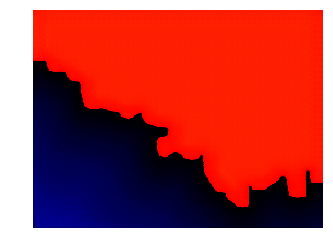

In [9]:
netSketch.eval()
I = load_image('../data/style/leaf.png')
I = to_var(I[:,:,:,0:I.size(3)/2])
result = netSketch(I, -1.)
visualize(to_data(result[0]))

# structure

In [2]:
from __future__ import print_function
import torch
from models import SketchModule, ShapeMatchingGAN
from utils import load_image, to_data, to_var, visualize, save_image, gaussian, weights_init
from utils import load_train_batchfnames, prepare_text_batch, load_style_image_pair, cropping_training_batches
import random
import argparse
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

opts = argparse.ArgumentParser()
# SMGAN
opts.GS_nlayers = 6
opts.DS_nlayers = 4
opts.GS_nf = 32
opts.DS_nf = 32
opts.GT_nlayers = 6
opts.DT_nlayers = 4
opts.GT_nf = 32
opts.DT_nf = 32

# SketchModule
opts.GB_nlayers = 6
opts.DB_nlayers = 5
opts.GB_nf = 32
opts.DB_nf = 32
opts.load_GB_name = '../save/GB-iccv.ckpt'

# train 
opts.gpu = True
opts.step1_epochs = 30
opts.step2_epochs = 40
opts.step3_epochs = 80
opts.step4_epochs = 10
opts.batchsize = 16
opts.Straining_num = 2560
opts.scale_num = 4
opts.Sanglejitter = True
opts.subimg_size = 256
opts.glyph_preserve = False
opts.text_datasize = 708
opts.text_path = '../data/rawtext/yaheiB/train'

# data and path
opts.save_path = '../save/'
opts.save_name = 'maple'
opts.style_name = '../data/style/maple.png'


# create model
print('--- create model ---')
netShapeM = ShapeMatchingGAN(opts.GS_nlayers, opts.DS_nlayers, opts.GS_nf, opts.DS_nf,
                 opts.GT_nlayers, opts.DT_nlayers, opts.GT_nf, opts.DT_nf, opts.gpu)
netSketch = SketchModule(opts.GB_nlayers, opts.DB_nlayers, opts.GB_nf, opts.DB_nf, opts.gpu)

if opts.gpu:
    netShapeM.cuda()
    netSketch.cuda()
netShapeM.init_networks(weights_init)
netShapeM.train()

netSketch.load_state_dict(torch.load(opts.load_GB_name))
netSketch.eval()

print('--- training ---')
# load image pair
scales = [l*2.0/(opts.scale_num-1)-1 for l in range(opts.scale_num)]
Xl, X, _, Noise = load_style_image_pair(opts.style_name, scales, netSketch, opts.gpu)
Xl = [to_var(a) for a in Xl] if opts.gpu else Xl
X = to_var(X) if opts.gpu else X
Noise = to_var(Noise) if opts.gpu else Noise
for epoch in range(opts.step1_epochs):
    for i in range(opts.Straining_num/opts.batchsize):
        idx = opts.scale_num-1
        xl, x = cropping_training_batches(Xl[idx], X, Noise, opts.batchsize, 
                                  opts.Sanglejitter, opts.subimg_size, opts.subimg_size)
        losses = netShapeM.structure_one_pass(x, xl, scales[idx])
        print('Step1, Epoch [%02d/%02d][%03d/%03d]' %(epoch+1, opts.step1_epochs, i+1, 
                                                      opts.Straining_num/opts.batchsize), end=': ')
        print('LDadv: %+.3f, LGadv: %+.3f, Lrec: %+.3f, Lgly: %+.3f'%(losses[0], losses[1], losses[2], losses[3]))
netShapeM.G_S.myCopy()
for epoch in range(opts.step2_epochs):
    for i in range(opts.Straining_num/opts.batchsize):
        idx = random.choice([0, opts.scale_num-1])
        xl, x = cropping_training_batches(Xl[idx], X, Noise, opts.batchsize, 
                                  opts.Sanglejitter, opts.subimg_size, opts.subimg_size)
        losses = netShapeM.structure_one_pass(x, xl, scales[idx])
        print('Step2, Epoch [%02d/%02d][%03d/%03d]' %(epoch+1, opts.step2_epochs, i+1, 
                                                      opts.Straining_num/opts.batchsize), end=': ')
        print('LDadv: %+.3f, LGadv: %+.3f, Lrec: %+.3f, Lgly: %+.3f'%(losses[0], losses[1], losses[2], losses[3]))
for epoch in range(opts.step3_epochs):
    for i in range(opts.Straining_num/opts.batchsize):
        idx = random.choice(range(opts.scale_num))
        xl, x = cropping_training_batches(Xl[idx], X, Noise, opts.batchsize, 
                                  opts.Sanglejitter, opts.subimg_size, opts.subimg_size)
        losses = netShapeM.structure_one_pass(x, xl, scales[idx])  
        print('Step3, Epoch [%02d/%02d][%03d/%03d]' %(epoch+1, opts.step3_epochs, i+1, 
                                                      opts.Straining_num/opts.batchsize), end=': ')
        print('LDadv: %+.3f, LGadv: %+.3f, Lrec: %+.3f, Lgly: %+.3f'%(losses[0], losses[1], losses[2], losses[3]))
if opts.glyph_preserve:
    fnames = load_train_batchfnames(opts.text_path, opts.batchsize, 
                                    opts.text_datasize, opts.Straining_num)
    for epoch in range(opts.step4_epochs):
        itr = 0
        for fname in fnames:
            itr += 1
            t = prepare_text_batch(fname, anglejitter=False)
            idx = random.choice(range(opts.scale_num))
            xl, x = cropping_training_batches(Xl[idx], X, Noise, opts.batchsize, 
                                      opts.Sanglejitter, opts.subimg_size, opts.subimg_size)
            t = to_var(x) if opts.gpu else t
            losses = netShapeM.structure_one_pass(x, xl, scales[idx], t)  
            print('Step4, Epoch [%02d/%02d][%03d/%03d]' %(epoch+1, opts.step4_epochs, itr+1, 
                                                      len(fnames)), end=': ')
            print('LDadv: %+.3f, LGadv: %+.3f, Lrec: %+.3f, Lgly: %+.3f'%(losses[0], losses[1], losses[2], losses[3])) 
        
print('--- save ---')
# directory
netShapeM.save_structure_model(opts.save_path, opts.save_name)

--- create model ---
--- training ---
Step1, Epoch [01/30][001/160]: LDadv: +0.004, LGadv: -0.038, Lrec: +78.370, Lgly: +0.000
Step1, Epoch [01/30][002/160]: LDadv: +0.017, LGadv: -0.039, Lrec: +64.508, Lgly: +0.000
Step1, Epoch [01/30][003/160]: LDadv: +0.027, LGadv: -0.040, Lrec: +52.364, Lgly: +0.000
Step1, Epoch [01/30][004/160]: LDadv: +0.039, LGadv: -0.043, Lrec: +39.900, Lgly: +0.000
Step1, Epoch [01/30][005/160]: LDadv: +0.040, LGadv: -0.036, Lrec: +31.112, Lgly: +0.000
Step1, Epoch [01/30][006/160]: LDadv: +0.035, LGadv: -0.038, Lrec: +24.959, Lgly: +0.000
Step1, Epoch [01/30][007/160]: LDadv: +0.046, LGadv: -0.021, Lrec: +19.532, Lgly: +0.000
Step1, Epoch [01/30][008/160]: LDadv: +0.054, LGadv: -0.025, Lrec: +17.077, Lgly: +0.000
Step1, Epoch [01/30][009/160]: LDadv: +0.059, LGadv: -0.000, Lrec: +14.818, Lgly: +0.000
Step1, Epoch [01/30][010/160]: LDadv: +0.050, LGadv: -0.021, Lrec: +12.944, Lgly: +0.000
Step1, Epoch [01/30][011/160]: LDadv: +0.028, LGadv: +0.034, Lrec: +11.5

Step1, Epoch [01/30][094/160]: LDadv: +0.673, LGadv: +0.253, Lrec: +6.829, Lgly: +0.000
Step1, Epoch [01/30][095/160]: LDadv: +0.530, LGadv: +0.456, Lrec: +6.771, Lgly: +0.000
Step1, Epoch [01/30][096/160]: LDadv: +0.401, LGadv: +0.334, Lrec: +6.165, Lgly: +0.000
Step1, Epoch [01/30][097/160]: LDadv: +0.735, LGadv: -0.008, Lrec: +7.070, Lgly: +0.000
Step1, Epoch [01/30][098/160]: LDadv: +0.579, LGadv: +0.488, Lrec: +6.955, Lgly: +0.000
Step1, Epoch [01/30][099/160]: LDadv: +0.691, LGadv: +0.477, Lrec: +7.228, Lgly: +0.000
Step1, Epoch [01/30][100/160]: LDadv: +0.859, LGadv: +0.472, Lrec: +7.256, Lgly: +0.000
Step1, Epoch [01/30][101/160]: LDadv: +0.765, LGadv: +0.310, Lrec: +7.139, Lgly: +0.000
Step1, Epoch [01/30][102/160]: LDadv: +0.523, LGadv: +0.523, Lrec: +6.759, Lgly: +0.000
Step1, Epoch [01/30][103/160]: LDadv: +0.661, LGadv: +0.510, Lrec: +6.597, Lgly: +0.000
Step1, Epoch [01/30][104/160]: LDadv: +0.964, LGadv: +0.513, Lrec: +6.361, Lgly: +0.000
Step1, Epoch [01/30][105/160]: L

Step1, Epoch [02/30][028/160]: LDadv: +2.157, LGadv: +1.019, Lrec: +6.853, Lgly: +0.000
Step1, Epoch [02/30][029/160]: LDadv: +2.512, LGadv: +0.901, Lrec: +7.083, Lgly: +0.000
Step1, Epoch [02/30][030/160]: LDadv: +2.119, LGadv: +1.105, Lrec: +6.867, Lgly: +0.000
Step1, Epoch [02/30][031/160]: LDadv: +1.705, LGadv: -0.605, Lrec: +7.104, Lgly: +0.000
Step1, Epoch [02/30][032/160]: LDadv: +0.998, LGadv: +1.164, Lrec: +6.168, Lgly: +0.000
Step1, Epoch [02/30][033/160]: LDadv: +2.440, LGadv: +1.162, Lrec: +6.807, Lgly: +0.000
Step1, Epoch [02/30][034/160]: LDadv: +1.848, LGadv: +0.767, Lrec: +6.617, Lgly: +0.000
Step1, Epoch [02/30][035/160]: LDadv: +1.825, LGadv: +1.061, Lrec: +6.886, Lgly: +0.000
Step1, Epoch [02/30][036/160]: LDadv: +2.651, LGadv: +0.812, Lrec: +6.967, Lgly: +0.000
Step1, Epoch [02/30][037/160]: LDadv: +1.650, LGadv: +0.511, Lrec: +7.559, Lgly: +0.000
Step1, Epoch [02/30][038/160]: LDadv: +2.388, LGadv: +0.991, Lrec: +8.803, Lgly: +0.000
Step1, Epoch [02/30][039/160]: L

Step1, Epoch [02/30][122/160]: LDadv: +4.336, LGadv: +1.179, Lrec: +6.405, Lgly: +0.000
Step1, Epoch [02/30][123/160]: LDadv: +3.264, LGadv: +1.864, Lrec: +6.721, Lgly: +0.000
Step1, Epoch [02/30][124/160]: LDadv: +4.396, LGadv: +1.818, Lrec: +7.216, Lgly: +0.000
Step1, Epoch [02/30][125/160]: LDadv: +4.554, LGadv: +1.418, Lrec: +7.018, Lgly: +0.000
Step1, Epoch [02/30][126/160]: LDadv: +4.625, LGadv: +1.776, Lrec: +6.300, Lgly: +0.000
Step1, Epoch [02/30][127/160]: LDadv: +4.434, LGadv: +1.903, Lrec: +7.192, Lgly: +0.000
Step1, Epoch [02/30][128/160]: LDadv: +4.756, LGadv: +0.920, Lrec: +7.162, Lgly: +0.000
Step1, Epoch [02/30][129/160]: LDadv: +3.914, LGadv: +1.219, Lrec: +6.222, Lgly: +0.000
Step1, Epoch [02/30][130/160]: LDadv: +3.299, LGadv: +1.700, Lrec: +7.541, Lgly: +0.000
Step1, Epoch [02/30][131/160]: LDadv: +4.297, LGadv: +1.829, Lrec: +6.876, Lgly: +0.000
Step1, Epoch [02/30][132/160]: LDadv: +4.640, LGadv: +1.168, Lrec: +6.703, Lgly: +0.000
Step1, Epoch [02/30][133/160]: L

Step1, Epoch [03/30][056/160]: LDadv: +4.868, LGadv: +2.334, Lrec: +8.694, Lgly: +0.000
Step1, Epoch [03/30][057/160]: LDadv: +5.057, LGadv: +2.410, Lrec: +6.474, Lgly: +0.000
Step1, Epoch [03/30][058/160]: LDadv: +6.702, LGadv: +1.111, Lrec: +7.157, Lgly: +0.000
Step1, Epoch [03/30][059/160]: LDadv: +5.592, LGadv: +2.531, Lrec: +6.782, Lgly: +0.000
Step1, Epoch [03/30][060/160]: LDadv: +6.574, LGadv: +2.450, Lrec: +6.699, Lgly: +0.000
Step1, Epoch [03/30][061/160]: LDadv: +6.733, LGadv: +2.494, Lrec: +6.665, Lgly: +0.000
Step1, Epoch [03/30][062/160]: LDadv: +6.031, LGadv: +2.588, Lrec: +6.957, Lgly: +0.000
Step1, Epoch [03/30][063/160]: LDadv: +6.219, LGadv: +2.247, Lrec: +6.714, Lgly: +0.000
Step1, Epoch [03/30][064/160]: LDadv: +5.548, LGadv: +1.416, Lrec: +6.762, Lgly: +0.000
Step1, Epoch [03/30][065/160]: LDadv: +4.414, LGadv: +1.996, Lrec: +7.449, Lgly: +0.000
Step1, Epoch [03/30][066/160]: LDadv: +5.729, LGadv: +1.558, Lrec: +6.681, Lgly: +0.000
Step1, Epoch [03/30][067/160]: L

Step1, Epoch [03/30][150/160]: LDadv: +1.318, LGadv: -0.623, Lrec: +7.449, Lgly: +0.000
Step1, Epoch [03/30][151/160]: LDadv: +1.424, LGadv: -0.595, Lrec: +8.243, Lgly: +0.000
Step1, Epoch [03/30][152/160]: LDadv: +2.666, LGadv: +1.300, Lrec: +7.749, Lgly: +0.000
Step1, Epoch [03/30][153/160]: LDadv: -0.204, LGadv: -0.757, Lrec: +8.491, Lgly: +0.000
Step1, Epoch [03/30][154/160]: LDadv: -0.068, LGadv: -0.685, Lrec: +8.564, Lgly: +0.000
Step1, Epoch [03/30][155/160]: LDadv: +0.922, LGadv: -0.059, Lrec: +7.983, Lgly: +0.000
Step1, Epoch [03/30][156/160]: LDadv: +0.624, LGadv: -0.343, Lrec: +7.942, Lgly: +0.000
Step1, Epoch [03/30][157/160]: LDadv: +0.966, LGadv: -0.341, Lrec: +7.659, Lgly: +0.000
Step1, Epoch [03/30][158/160]: LDadv: +0.672, LGadv: -0.842, Lrec: +8.307, Lgly: +0.000
Step1, Epoch [03/30][159/160]: LDadv: +0.650, LGadv: -0.132, Lrec: +7.093, Lgly: +0.000
Step1, Epoch [03/30][160/160]: LDadv: +0.487, LGadv: -0.872, Lrec: +8.009, Lgly: +0.000
Step1, Epoch [04/30][001/160]: L

Step1, Epoch [04/30][084/160]: LDadv: +1.308, LGadv: -0.642, Lrec: +7.264, Lgly: +0.000
Step1, Epoch [04/30][085/160]: LDadv: +0.856, LGadv: -0.428, Lrec: +6.935, Lgly: +0.000
Step1, Epoch [04/30][086/160]: LDadv: +1.039, LGadv: -0.187, Lrec: +7.164, Lgly: +0.000
Step1, Epoch [04/30][087/160]: LDadv: +1.312, LGadv: +0.435, Lrec: +6.741, Lgly: +0.000
Step1, Epoch [04/30][088/160]: LDadv: +1.017, LGadv: -0.682, Lrec: +6.771, Lgly: +0.000
Step1, Epoch [04/30][089/160]: LDadv: +0.930, LGadv: -1.511, Lrec: +7.492, Lgly: +0.000
Step1, Epoch [04/30][090/160]: LDadv: +1.893, LGadv: -0.139, Lrec: +7.084, Lgly: +0.000
Step1, Epoch [04/30][091/160]: LDadv: +1.476, LGadv: -0.964, Lrec: +7.724, Lgly: +0.000
Step1, Epoch [04/30][092/160]: LDadv: +1.689, LGadv: -1.065, Lrec: +7.446, Lgly: +0.000
Step1, Epoch [04/30][093/160]: LDadv: +0.401, LGadv: +0.299, Lrec: +8.039, Lgly: +0.000
Step1, Epoch [04/30][094/160]: LDadv: +0.565, LGadv: +0.686, Lrec: +6.107, Lgly: +0.000
Step1, Epoch [04/30][095/160]: L

Step1, Epoch [05/30][018/160]: LDadv: +1.026, LGadv: +1.381, Lrec: +6.881, Lgly: +0.000
Step1, Epoch [05/30][019/160]: LDadv: +0.986, LGadv: +1.073, Lrec: +7.208, Lgly: +0.000
Step1, Epoch [05/30][020/160]: LDadv: +0.690, LGadv: +0.955, Lrec: +6.410, Lgly: +0.000
Step1, Epoch [05/30][021/160]: LDadv: +1.144, LGadv: +1.119, Lrec: +6.848, Lgly: +0.000
Step1, Epoch [05/30][022/160]: LDadv: +1.040, LGadv: +0.192, Lrec: +6.366, Lgly: +0.000
Step1, Epoch [05/30][023/160]: LDadv: +0.638, LGadv: -0.550, Lrec: +5.978, Lgly: +0.000
Step1, Epoch [05/30][024/160]: LDadv: +0.930, LGadv: -0.288, Lrec: +7.126, Lgly: +0.000
Step1, Epoch [05/30][025/160]: LDadv: +1.030, LGadv: -0.045, Lrec: +6.563, Lgly: +0.000
Step1, Epoch [05/30][026/160]: LDadv: +1.263, LGadv: -1.068, Lrec: +7.160, Lgly: +0.000
Step1, Epoch [05/30][027/160]: LDadv: +1.173, LGadv: -1.345, Lrec: +7.372, Lgly: +0.000
Step1, Epoch [05/30][028/160]: LDadv: +1.046, LGadv: -1.288, Lrec: +7.040, Lgly: +0.000
Step1, Epoch [05/30][029/160]: L

Step1, Epoch [05/30][112/160]: LDadv: +0.902, LGadv: -0.768, Lrec: +6.803, Lgly: +0.000
Step1, Epoch [05/30][113/160]: LDadv: +1.574, LGadv: -1.467, Lrec: +7.059, Lgly: +0.000
Step1, Epoch [05/30][114/160]: LDadv: +1.730, LGadv: +0.383, Lrec: +7.183, Lgly: +0.000
Step1, Epoch [05/30][115/160]: LDadv: +0.848, LGadv: +0.241, Lrec: +6.872, Lgly: +0.000
Step1, Epoch [05/30][116/160]: LDadv: +1.150, LGadv: -0.724, Lrec: +6.667, Lgly: +0.000
Step1, Epoch [05/30][117/160]: LDadv: +0.714, LGadv: -2.611, Lrec: +8.073, Lgly: +0.000
Step1, Epoch [05/30][118/160]: LDadv: +2.037, LGadv: +1.188, Lrec: +7.083, Lgly: +0.000
Step1, Epoch [05/30][119/160]: LDadv: +1.261, LGadv: -0.396, Lrec: +6.868, Lgly: +0.000
Step1, Epoch [05/30][120/160]: LDadv: +0.710, LGadv: -2.042, Lrec: +9.911, Lgly: +0.000
Step1, Epoch [05/30][121/160]: LDadv: +2.095, LGadv: +1.361, Lrec: +6.509, Lgly: +0.000
Step1, Epoch [05/30][122/160]: LDadv: +3.519, LGadv: -1.668, Lrec: +6.571, Lgly: +0.000
Step1, Epoch [05/30][123/160]: L

Step1, Epoch [06/30][046/160]: LDadv: +0.396, LGadv: +1.763, Lrec: +6.044, Lgly: +0.000
Step1, Epoch [06/30][047/160]: LDadv: +0.378, LGadv: +2.047, Lrec: +6.254, Lgly: +0.000
Step1, Epoch [06/30][048/160]: LDadv: +0.452, LGadv: +1.739, Lrec: +6.592, Lgly: +0.000
Step1, Epoch [06/30][049/160]: LDadv: +0.549, LGadv: +1.797, Lrec: +6.148, Lgly: +0.000
Step1, Epoch [06/30][050/160]: LDadv: +0.617, LGadv: +1.941, Lrec: +5.453, Lgly: +0.000
Step1, Epoch [06/30][051/160]: LDadv: +0.892, LGadv: +1.933, Lrec: +6.094, Lgly: +0.000
Step1, Epoch [06/30][052/160]: LDadv: +0.843, LGadv: +1.542, Lrec: +5.636, Lgly: +0.000
Step1, Epoch [06/30][053/160]: LDadv: +0.780, LGadv: +1.153, Lrec: +5.672, Lgly: +0.000
Step1, Epoch [06/30][054/160]: LDadv: +0.730, LGadv: +2.140, Lrec: +6.685, Lgly: +0.000
Step1, Epoch [06/30][055/160]: LDadv: +0.491, LGadv: +1.433, Lrec: +5.596, Lgly: +0.000
Step1, Epoch [06/30][056/160]: LDadv: +1.073, LGadv: +0.437, Lrec: +6.751, Lgly: +0.000
Step1, Epoch [06/30][057/160]: L

Step1, Epoch [06/30][140/160]: LDadv: +1.499, LGadv: -1.521, Lrec: +7.498, Lgly: +0.000
Step1, Epoch [06/30][141/160]: LDadv: +2.429, LGadv: -3.041, Lrec: +6.603, Lgly: +0.000
Step1, Epoch [06/30][142/160]: LDadv: +1.987, LGadv: +1.111, Lrec: +6.830, Lgly: +0.000
Step1, Epoch [06/30][143/160]: LDadv: +0.466, LGadv: +1.181, Lrec: +6.081, Lgly: +0.000
Step1, Epoch [06/30][144/160]: LDadv: +0.745, LGadv: +1.361, Lrec: +6.004, Lgly: +0.000
Step1, Epoch [06/30][145/160]: LDadv: +1.017, LGadv: +1.634, Lrec: +5.550, Lgly: +0.000
Step1, Epoch [06/30][146/160]: LDadv: +1.359, LGadv: +1.008, Lrec: +5.495, Lgly: +0.000
Step1, Epoch [06/30][147/160]: LDadv: +0.949, LGadv: -0.082, Lrec: +6.547, Lgly: +0.000
Step1, Epoch [06/30][148/160]: LDadv: +1.651, LGadv: +1.424, Lrec: +6.554, Lgly: +0.000
Step1, Epoch [06/30][149/160]: LDadv: +1.579, LGadv: -2.324, Lrec: +6.405, Lgly: +0.000
Step1, Epoch [06/30][150/160]: LDadv: +0.892, LGadv: -2.627, Lrec: +6.475, Lgly: +0.000
Step1, Epoch [06/30][151/160]: L

Step1, Epoch [07/30][074/160]: LDadv: +0.321, LGadv: -1.276, Lrec: +5.347, Lgly: +0.000
Step1, Epoch [07/30][075/160]: LDadv: +0.430, LGadv: -1.327, Lrec: +5.728, Lgly: +0.000
Step1, Epoch [07/30][076/160]: LDadv: +0.463, LGadv: -1.190, Lrec: +5.347, Lgly: +0.000
Step1, Epoch [07/30][077/160]: LDadv: +0.569, LGadv: -1.175, Lrec: +5.536, Lgly: +0.000
Step1, Epoch [07/30][078/160]: LDadv: +0.629, LGadv: -1.063, Lrec: +5.452, Lgly: +0.000
Step1, Epoch [07/30][079/160]: LDadv: +0.591, LGadv: -0.929, Lrec: +5.293, Lgly: +0.000
Step1, Epoch [07/30][080/160]: LDadv: +0.766, LGadv: -0.827, Lrec: +5.394, Lgly: +0.000
Step1, Epoch [07/30][081/160]: LDadv: +0.517, LGadv: -0.511, Lrec: +4.803, Lgly: +0.000
Step1, Epoch [07/30][082/160]: LDadv: +0.731, LGadv: -0.372, Lrec: +4.964, Lgly: +0.000
Step1, Epoch [07/30][083/160]: LDadv: +0.880, LGadv: -0.592, Lrec: +5.612, Lgly: +0.000
Step1, Epoch [07/30][084/160]: LDadv: +0.812, LGadv: -0.375, Lrec: +5.687, Lgly: +0.000
Step1, Epoch [07/30][085/160]: L

Step1, Epoch [08/30][008/160]: LDadv: +1.499, LGadv: +0.797, Lrec: +6.215, Lgly: +0.000
Step1, Epoch [08/30][009/160]: LDadv: +1.691, LGadv: +0.155, Lrec: +6.526, Lgly: +0.000
Step1, Epoch [08/30][010/160]: LDadv: +2.143, LGadv: -2.650, Lrec: +7.079, Lgly: +0.000
Step1, Epoch [08/30][011/160]: LDadv: +2.133, LGadv: +1.661, Lrec: +6.241, Lgly: +0.000
Step1, Epoch [08/30][012/160]: LDadv: +1.896, LGadv: -3.217, Lrec: +5.828, Lgly: +0.000
Step1, Epoch [08/30][013/160]: LDadv: +0.839, LGadv: -3.605, Lrec: +5.096, Lgly: +0.000
Step1, Epoch [08/30][014/160]: LDadv: +0.554, LGadv: -3.243, Lrec: +5.275, Lgly: +0.000
Step1, Epoch [08/30][015/160]: LDadv: +0.632, LGadv: -3.052, Lrec: +6.319, Lgly: +0.000
Step1, Epoch [08/30][016/160]: LDadv: +0.988, LGadv: -2.617, Lrec: +5.869, Lgly: +0.000
Step1, Epoch [08/30][017/160]: LDadv: +1.108, LGadv: -2.350, Lrec: +5.798, Lgly: +0.000
Step1, Epoch [08/30][018/160]: LDadv: +1.426, LGadv: -1.751, Lrec: +5.256, Lgly: +0.000
Step1, Epoch [08/30][019/160]: L

Step1, Epoch [08/30][102/160]: LDadv: +0.448, LGadv: -1.940, Lrec: +4.723, Lgly: +0.000
Step1, Epoch [08/30][103/160]: LDadv: +0.496, LGadv: -2.042, Lrec: +5.159, Lgly: +0.000
Step1, Epoch [08/30][104/160]: LDadv: +0.452, LGadv: -1.972, Lrec: +4.808, Lgly: +0.000
Step1, Epoch [08/30][105/160]: LDadv: +0.614, LGadv: -2.014, Lrec: +5.524, Lgly: +0.000
Step1, Epoch [08/30][106/160]: LDadv: +0.606, LGadv: -1.864, Lrec: +5.021, Lgly: +0.000
Step1, Epoch [08/30][107/160]: LDadv: +0.740, LGadv: -1.870, Lrec: +5.180, Lgly: +0.000
Step1, Epoch [08/30][108/160]: LDadv: +0.693, LGadv: -1.893, Lrec: +4.996, Lgly: +0.000
Step1, Epoch [08/30][109/160]: LDadv: +0.826, LGadv: -1.826, Lrec: +5.268, Lgly: +0.000
Step1, Epoch [08/30][110/160]: LDadv: +0.743, LGadv: -1.665, Lrec: +5.279, Lgly: +0.000
Step1, Epoch [08/30][111/160]: LDadv: +0.872, LGadv: -1.749, Lrec: +5.239, Lgly: +0.000
Step1, Epoch [08/30][112/160]: LDadv: +1.006, LGadv: -1.696, Lrec: +5.300, Lgly: +0.000
Step1, Epoch [08/30][113/160]: L

Step1, Epoch [09/30][036/160]: LDadv: +1.872, LGadv: +1.064, Lrec: +5.874, Lgly: +0.000
Step1, Epoch [09/30][037/160]: LDadv: +1.028, LGadv: +0.679, Lrec: +5.604, Lgly: +0.000
Step1, Epoch [09/30][038/160]: LDadv: +0.967, LGadv: +0.473, Lrec: +5.176, Lgly: +0.000
Step1, Epoch [09/30][039/160]: LDadv: +0.732, LGadv: +0.227, Lrec: +5.115, Lgly: +0.000
Step1, Epoch [09/30][040/160]: LDadv: +0.865, LGadv: +1.069, Lrec: +4.929, Lgly: +0.000
Step1, Epoch [09/30][041/160]: LDadv: +1.245, LGadv: +1.771, Lrec: +5.592, Lgly: +0.000
Step1, Epoch [09/30][042/160]: LDadv: +1.377, LGadv: -0.152, Lrec: +5.879, Lgly: +0.000
Step1, Epoch [09/30][043/160]: LDadv: +1.111, LGadv: +0.589, Lrec: +5.136, Lgly: +0.000
Step1, Epoch [09/30][044/160]: LDadv: +1.237, LGadv: +2.231, Lrec: +6.354, Lgly: +0.000
Step1, Epoch [09/30][045/160]: LDadv: +0.946, LGadv: -1.729, Lrec: +5.072, Lgly: +0.000
Step1, Epoch [09/30][046/160]: LDadv: +0.663, LGadv: -2.394, Lrec: +6.261, Lgly: +0.000
Step1, Epoch [09/30][047/160]: L

Step1, Epoch [09/30][130/160]: LDadv: +1.615, LGadv: -2.728, Lrec: +6.004, Lgly: +0.000
Step1, Epoch [09/30][131/160]: LDadv: +1.527, LGadv: -3.922, Lrec: +5.634, Lgly: +0.000
Step1, Epoch [09/30][132/160]: LDadv: +1.470, LGadv: -1.370, Lrec: +5.455, Lgly: +0.000
Step1, Epoch [09/30][133/160]: LDadv: +0.505, LGadv: -1.447, Lrec: +5.602, Lgly: +0.000
Step1, Epoch [09/30][134/160]: LDadv: +0.448, LGadv: -1.610, Lrec: +5.470, Lgly: +0.000
Step1, Epoch [09/30][135/160]: LDadv: +0.316, LGadv: -1.676, Lrec: +4.838, Lgly: +0.000
Step1, Epoch [09/30][136/160]: LDadv: +0.491, LGadv: -1.624, Lrec: +5.891, Lgly: +0.000
Step1, Epoch [09/30][137/160]: LDadv: +0.588, LGadv: -1.528, Lrec: +4.634, Lgly: +0.000
Step1, Epoch [09/30][138/160]: LDadv: +0.750, LGadv: -1.605, Lrec: +5.213, Lgly: +0.000
Step1, Epoch [09/30][139/160]: LDadv: +0.827, LGadv: -1.407, Lrec: +5.066, Lgly: +0.000
Step1, Epoch [09/30][140/160]: LDadv: +0.721, LGadv: -1.438, Lrec: +5.114, Lgly: +0.000
Step1, Epoch [09/30][141/160]: L

Step1, Epoch [10/30][064/160]: LDadv: +2.519, LGadv: -2.150, Lrec: +4.783, Lgly: +0.000
Step1, Epoch [10/30][065/160]: LDadv: +3.445, LGadv: -1.512, Lrec: +4.467, Lgly: +0.000
Step1, Epoch [10/30][066/160]: LDadv: +4.415, LGadv: -0.389, Lrec: +5.653, Lgly: +0.000
Step1, Epoch [10/30][067/160]: LDadv: +2.415, LGadv: -1.098, Lrec: +5.473, Lgly: +0.000
Step1, Epoch [10/30][068/160]: LDadv: +3.257, LGadv: -0.099, Lrec: +5.143, Lgly: +0.000
Step1, Epoch [10/30][069/160]: LDadv: +3.969, LGadv: +0.035, Lrec: +4.747, Lgly: +0.000
Step1, Epoch [10/30][070/160]: LDadv: +2.697, LGadv: -0.719, Lrec: +5.519, Lgly: +0.000
Step1, Epoch [10/30][071/160]: LDadv: +3.233, LGadv: -0.480, Lrec: +6.115, Lgly: +0.000
Step1, Epoch [10/30][072/160]: LDadv: +1.867, LGadv: +0.313, Lrec: +5.652, Lgly: +0.000
Step1, Epoch [10/30][073/160]: LDadv: +2.574, LGadv: -0.602, Lrec: +5.198, Lgly: +0.000
Step1, Epoch [10/30][074/160]: LDadv: +3.390, LGadv: -0.396, Lrec: +5.923, Lgly: +0.000
Step1, Epoch [10/30][075/160]: L

Step1, Epoch [10/30][158/160]: LDadv: +0.300, LGadv: +1.009, Lrec: +4.705, Lgly: +0.000
Step1, Epoch [10/30][159/160]: LDadv: +0.386, LGadv: +1.205, Lrec: +4.657, Lgly: +0.000
Step1, Epoch [10/30][160/160]: LDadv: +0.334, LGadv: +0.975, Lrec: +4.520, Lgly: +0.000
Step1, Epoch [11/30][001/160]: LDadv: +0.306, LGadv: +0.767, Lrec: +4.726, Lgly: +0.000
Step1, Epoch [11/30][002/160]: LDadv: +0.423, LGadv: +0.905, Lrec: +4.960, Lgly: +0.000
Step1, Epoch [11/30][003/160]: LDadv: +0.290, LGadv: +1.292, Lrec: +4.597, Lgly: +0.000
Step1, Epoch [11/30][004/160]: LDadv: +0.395, LGadv: +1.571, Lrec: +4.866, Lgly: +0.000
Step1, Epoch [11/30][005/160]: LDadv: +0.084, LGadv: +0.788, Lrec: +4.943, Lgly: +0.000
Step1, Epoch [11/30][006/160]: LDadv: +0.441, LGadv: +0.637, Lrec: +5.270, Lgly: +0.000
Step1, Epoch [11/30][007/160]: LDadv: +0.376, LGadv: +1.004, Lrec: +4.826, Lgly: +0.000
Step1, Epoch [11/30][008/160]: LDadv: +0.322, LGadv: +0.748, Lrec: +4.563, Lgly: +0.000
Step1, Epoch [11/30][009/160]: L

Step1, Epoch [11/30][092/160]: LDadv: +0.386, LGadv: -0.712, Lrec: +4.641, Lgly: +0.000
Step1, Epoch [11/30][093/160]: LDadv: +0.312, LGadv: -0.411, Lrec: +4.046, Lgly: +0.000
Step1, Epoch [11/30][094/160]: LDadv: +0.292, LGadv: -0.327, Lrec: +4.388, Lgly: +0.000
Step1, Epoch [11/30][095/160]: LDadv: +0.383, LGadv: +0.169, Lrec: +4.779, Lgly: +0.000
Step1, Epoch [11/30][096/160]: LDadv: +0.466, LGadv: +0.601, Lrec: +4.276, Lgly: +0.000
Step1, Epoch [11/30][097/160]: LDadv: +0.522, LGadv: +0.525, Lrec: +4.403, Lgly: +0.000
Step1, Epoch [11/30][098/160]: LDadv: +0.494, LGadv: +0.113, Lrec: +4.871, Lgly: +0.000
Step1, Epoch [11/30][099/160]: LDadv: +0.559, LGadv: +0.166, Lrec: +4.885, Lgly: +0.000
Step1, Epoch [11/30][100/160]: LDadv: +0.418, LGadv: -0.274, Lrec: +4.308, Lgly: +0.000
Step1, Epoch [11/30][101/160]: LDadv: +0.514, LGadv: +0.285, Lrec: +5.444, Lgly: +0.000
Step1, Epoch [11/30][102/160]: LDadv: +0.383, LGadv: -0.165, Lrec: +5.225, Lgly: +0.000
Step1, Epoch [11/30][103/160]: L

Step1, Epoch [12/30][026/160]: LDadv: +0.328, LGadv: -0.717, Lrec: +4.132, Lgly: +0.000
Step1, Epoch [12/30][027/160]: LDadv: +0.386, LGadv: -0.953, Lrec: +4.247, Lgly: +0.000
Step1, Epoch [12/30][028/160]: LDadv: +0.460, LGadv: -0.763, Lrec: +3.827, Lgly: +0.000
Step1, Epoch [12/30][029/160]: LDadv: +0.450, LGadv: -1.028, Lrec: +4.210, Lgly: +0.000
Step1, Epoch [12/30][030/160]: LDadv: +0.622, LGadv: -0.864, Lrec: +4.514, Lgly: +0.000
Step1, Epoch [12/30][031/160]: LDadv: +0.509, LGadv: -0.855, Lrec: +4.287, Lgly: +0.000
Step1, Epoch [12/30][032/160]: LDadv: +0.570, LGadv: -0.708, Lrec: +4.500, Lgly: +0.000
Step1, Epoch [12/30][033/160]: LDadv: +0.734, LGadv: -0.716, Lrec: +4.000, Lgly: +0.000
Step1, Epoch [12/30][034/160]: LDadv: +0.502, LGadv: -0.741, Lrec: +4.640, Lgly: +0.000
Step1, Epoch [12/30][035/160]: LDadv: +0.535, LGadv: -0.912, Lrec: +4.075, Lgly: +0.000
Step1, Epoch [12/30][036/160]: LDadv: +0.520, LGadv: -0.970, Lrec: +4.521, Lgly: +0.000
Step1, Epoch [12/30][037/160]: L

Step1, Epoch [12/30][120/160]: LDadv: +0.583, LGadv: -1.322, Lrec: +4.195, Lgly: +0.000
Step1, Epoch [12/30][121/160]: LDadv: +0.670, LGadv: -1.610, Lrec: +4.692, Lgly: +0.000
Step1, Epoch [12/30][122/160]: LDadv: +0.513, LGadv: -1.004, Lrec: +4.018, Lgly: +0.000
Step1, Epoch [12/30][123/160]: LDadv: +0.482, LGadv: -1.079, Lrec: +3.905, Lgly: +0.000
Step1, Epoch [12/30][124/160]: LDadv: +0.488, LGadv: -1.174, Lrec: +4.229, Lgly: +0.000
Step1, Epoch [12/30][125/160]: LDadv: +0.619, LGadv: -1.224, Lrec: +3.855, Lgly: +0.000
Step1, Epoch [12/30][126/160]: LDadv: +0.566, LGadv: -1.312, Lrec: +4.372, Lgly: +0.000
Step1, Epoch [12/30][127/160]: LDadv: +0.581, LGadv: -0.949, Lrec: +3.881, Lgly: +0.000
Step1, Epoch [12/30][128/160]: LDadv: +0.551, LGadv: -1.183, Lrec: +4.824, Lgly: +0.000
Step1, Epoch [12/30][129/160]: LDadv: +0.503, LGadv: -0.916, Lrec: +3.755, Lgly: +0.000
Step1, Epoch [12/30][130/160]: LDadv: +0.611, LGadv: -0.924, Lrec: +4.000, Lgly: +0.000
Step1, Epoch [12/30][131/160]: L

Step1, Epoch [13/30][054/160]: LDadv: +0.779, LGadv: -1.177, Lrec: +4.115, Lgly: +0.000
Step1, Epoch [13/30][055/160]: LDadv: +0.680, LGadv: -1.170, Lrec: +4.048, Lgly: +0.000
Step1, Epoch [13/30][056/160]: LDadv: +0.814, LGadv: -1.282, Lrec: +4.527, Lgly: +0.000
Step1, Epoch [13/30][057/160]: LDadv: +0.760, LGadv: -0.958, Lrec: +3.728, Lgly: +0.000
Step1, Epoch [13/30][058/160]: LDadv: +0.696, LGadv: -1.265, Lrec: +4.188, Lgly: +0.000
Step1, Epoch [13/30][059/160]: LDadv: +0.822, LGadv: -1.188, Lrec: +4.475, Lgly: +0.000
Step1, Epoch [13/30][060/160]: LDadv: +0.619, LGadv: -0.760, Lrec: +4.045, Lgly: +0.000
Step1, Epoch [13/30][061/160]: LDadv: +0.839, LGadv: -1.239, Lrec: +4.185, Lgly: +0.000
Step1, Epoch [13/30][062/160]: LDadv: +0.589, LGadv: -1.568, Lrec: +3.949, Lgly: +0.000
Step1, Epoch [13/30][063/160]: LDadv: +0.650, LGadv: -1.265, Lrec: +4.650, Lgly: +0.000
Step1, Epoch [13/30][064/160]: LDadv: +0.674, LGadv: -0.891, Lrec: +4.290, Lgly: +0.000
Step1, Epoch [13/30][065/160]: L

Step1, Epoch [13/30][148/160]: LDadv: +0.647, LGadv: -2.421, Lrec: +3.722, Lgly: +0.000
Step1, Epoch [13/30][149/160]: LDadv: +0.674, LGadv: -2.943, Lrec: +3.775, Lgly: +0.000
Step1, Epoch [13/30][150/160]: LDadv: +0.663, LGadv: -1.717, Lrec: +4.163, Lgly: +0.000
Step1, Epoch [13/30][151/160]: LDadv: +0.409, LGadv: -1.492, Lrec: +4.071, Lgly: +0.000
Step1, Epoch [13/30][152/160]: LDadv: +0.433, LGadv: -1.404, Lrec: +4.333, Lgly: +0.000
Step1, Epoch [13/30][153/160]: LDadv: +0.507, LGadv: -1.019, Lrec: +3.646, Lgly: +0.000
Step1, Epoch [13/30][154/160]: LDadv: +0.525, LGadv: -1.046, Lrec: +3.966, Lgly: +0.000
Step1, Epoch [13/30][155/160]: LDadv: +0.592, LGadv: -0.996, Lrec: +3.838, Lgly: +0.000
Step1, Epoch [13/30][156/160]: LDadv: +0.495, LGadv: -1.048, Lrec: +3.685, Lgly: +0.000
Step1, Epoch [13/30][157/160]: LDadv: +0.655, LGadv: -1.072, Lrec: +4.124, Lgly: +0.000
Step1, Epoch [13/30][158/160]: LDadv: +0.854, LGadv: -1.324, Lrec: +3.903, Lgly: +0.000
Step1, Epoch [13/30][159/160]: L

Step1, Epoch [14/30][082/160]: LDadv: +0.106, LGadv: -2.330, Lrec: +3.857, Lgly: +0.000
Step1, Epoch [14/30][083/160]: LDadv: +0.162, LGadv: -2.450, Lrec: +3.932, Lgly: +0.000
Step1, Epoch [14/30][084/160]: LDadv: +0.204, LGadv: -2.528, Lrec: +3.947, Lgly: +0.000
Step1, Epoch [14/30][085/160]: LDadv: +0.158, LGadv: -2.435, Lrec: +3.783, Lgly: +0.000
Step1, Epoch [14/30][086/160]: LDadv: +0.206, LGadv: -2.429, Lrec: +3.938, Lgly: +0.000
Step1, Epoch [14/30][087/160]: LDadv: +0.271, LGadv: -2.441, Lrec: +4.125, Lgly: +0.000
Step1, Epoch [14/30][088/160]: LDadv: +0.376, LGadv: -2.600, Lrec: +4.623, Lgly: +0.000
Step1, Epoch [14/30][089/160]: LDadv: +0.303, LGadv: -2.518, Lrec: +4.072, Lgly: +0.000
Step1, Epoch [14/30][090/160]: LDadv: +0.344, LGadv: -2.447, Lrec: +3.915, Lgly: +0.000
Step1, Epoch [14/30][091/160]: LDadv: +0.434, LGadv: -2.407, Lrec: +4.049, Lgly: +0.000
Step1, Epoch [14/30][092/160]: LDadv: +0.451, LGadv: -2.394, Lrec: +3.698, Lgly: +0.000
Step1, Epoch [14/30][093/160]: L

Step1, Epoch [15/30][016/160]: LDadv: +2.340, LGadv: -4.040, Lrec: +4.860, Lgly: +0.000
Step1, Epoch [15/30][017/160]: LDadv: +2.793, LGadv: -1.531, Lrec: +5.317, Lgly: +0.000
Step1, Epoch [15/30][018/160]: LDadv: +3.442, LGadv: -3.072, Lrec: +4.648, Lgly: +0.000
Step1, Epoch [15/30][019/160]: LDadv: +3.637, LGadv: -0.719, Lrec: +7.250, Lgly: +0.000
Step1, Epoch [15/30][020/160]: LDadv: +1.548, LGadv: -0.816, Lrec: +5.642, Lgly: +0.000
Step1, Epoch [15/30][021/160]: LDadv: +1.943, LGadv: -1.290, Lrec: +6.095, Lgly: +0.000
Step1, Epoch [15/30][022/160]: LDadv: +2.321, LGadv: -3.652, Lrec: +7.677, Lgly: +0.000
Step1, Epoch [15/30][023/160]: LDadv: +2.774, LGadv: -0.962, Lrec: +7.575, Lgly: +0.000
Step1, Epoch [15/30][024/160]: LDadv: +2.160, LGadv: +2.451, Lrec: +6.056, Lgly: +0.000
Step1, Epoch [15/30][025/160]: LDadv: +3.292, LGadv: -2.629, Lrec: +6.478, Lgly: +0.000
Step1, Epoch [15/30][026/160]: LDadv: +3.832, LGadv: -4.454, Lrec: +5.721, Lgly: +0.000
Step1, Epoch [15/30][027/160]: L

Step1, Epoch [15/30][110/160]: LDadv: +0.525, LGadv: -1.272, Lrec: +3.619, Lgly: +0.000
Step1, Epoch [15/30][111/160]: LDadv: +0.481, LGadv: -1.481, Lrec: +3.735, Lgly: +0.000
Step1, Epoch [15/30][112/160]: LDadv: +0.603, LGadv: -1.821, Lrec: +3.959, Lgly: +0.000
Step1, Epoch [15/30][113/160]: LDadv: +0.432, LGadv: -1.862, Lrec: +4.488, Lgly: +0.000
Step1, Epoch [15/30][114/160]: LDadv: +0.640, LGadv: -1.256, Lrec: +4.058, Lgly: +0.000
Step1, Epoch [15/30][115/160]: LDadv: +0.527, LGadv: -1.588, Lrec: +3.732, Lgly: +0.000
Step1, Epoch [15/30][116/160]: LDadv: +0.463, LGadv: -2.033, Lrec: +4.270, Lgly: +0.000
Step1, Epoch [15/30][117/160]: LDadv: +0.453, LGadv: -2.180, Lrec: +3.871, Lgly: +0.000
Step1, Epoch [15/30][118/160]: LDadv: +0.542, LGadv: -1.645, Lrec: +4.391, Lgly: +0.000
Step1, Epoch [15/30][119/160]: LDadv: +0.486, LGadv: -1.454, Lrec: +4.036, Lgly: +0.000
Step1, Epoch [15/30][120/160]: LDadv: +0.637, LGadv: -1.741, Lrec: +3.946, Lgly: +0.000
Step1, Epoch [15/30][121/160]: L

Step1, Epoch [16/30][044/160]: LDadv: +0.012, LGadv: -4.030, Lrec: +3.601, Lgly: +0.000
Step1, Epoch [16/30][045/160]: LDadv: +0.000, LGadv: -3.973, Lrec: +3.439, Lgly: +0.000
Step1, Epoch [16/30][046/160]: LDadv: +0.047, LGadv: -4.009, Lrec: +3.520, Lgly: +0.000
Step1, Epoch [16/30][047/160]: LDadv: -0.003, LGadv: -4.031, Lrec: +3.626, Lgly: +0.000
Step1, Epoch [16/30][048/160]: LDadv: -0.010, LGadv: -3.897, Lrec: +3.581, Lgly: +0.000
Step1, Epoch [16/30][049/160]: LDadv: +0.007, LGadv: -3.984, Lrec: +3.567, Lgly: +0.000
Step1, Epoch [16/30][050/160]: LDadv: +0.011, LGadv: -4.007, Lrec: +3.123, Lgly: +0.000
Step1, Epoch [16/30][051/160]: LDadv: +0.029, LGadv: -3.930, Lrec: +3.229, Lgly: +0.000
Step1, Epoch [16/30][052/160]: LDadv: +0.016, LGadv: -3.836, Lrec: +3.049, Lgly: +0.000
Step1, Epoch [16/30][053/160]: LDadv: +0.049, LGadv: -4.066, Lrec: +3.552, Lgly: +0.000
Step1, Epoch [16/30][054/160]: LDadv: +0.037, LGadv: -3.840, Lrec: +3.253, Lgly: +0.000
Step1, Epoch [16/30][055/160]: L

Step1, Epoch [16/30][138/160]: LDadv: +0.482, LGadv: -3.219, Lrec: +3.370, Lgly: +0.000
Step1, Epoch [16/30][139/160]: LDadv: +0.494, LGadv: -3.731, Lrec: +3.053, Lgly: +0.000
Step1, Epoch [16/30][140/160]: LDadv: +0.473, LGadv: -3.613, Lrec: +3.386, Lgly: +0.000
Step1, Epoch [16/30][141/160]: LDadv: +0.437, LGadv: -3.272, Lrec: +3.419, Lgly: +0.000
Step1, Epoch [16/30][142/160]: LDadv: +0.497, LGadv: -3.200, Lrec: +3.213, Lgly: +0.000
Step1, Epoch [16/30][143/160]: LDadv: +0.403, LGadv: -3.051, Lrec: +3.119, Lgly: +0.000
Step1, Epoch [16/30][144/160]: LDadv: +0.546, LGadv: -3.353, Lrec: +3.346, Lgly: +0.000
Step1, Epoch [16/30][145/160]: LDadv: +0.466, LGadv: -3.372, Lrec: +3.064, Lgly: +0.000
Step1, Epoch [16/30][146/160]: LDadv: +0.546, LGadv: -3.167, Lrec: +3.282, Lgly: +0.000
Step1, Epoch [16/30][147/160]: LDadv: +0.417, LGadv: -3.395, Lrec: +2.877, Lgly: +0.000
Step1, Epoch [16/30][148/160]: LDadv: +0.541, LGadv: -3.121, Lrec: +3.118, Lgly: +0.000
Step1, Epoch [16/30][149/160]: L

Step1, Epoch [17/30][072/160]: LDadv: +0.542, LGadv: -2.837, Lrec: +2.935, Lgly: +0.000
Step1, Epoch [17/30][073/160]: LDadv: +0.681, LGadv: -2.805, Lrec: +3.133, Lgly: +0.000
Step1, Epoch [17/30][074/160]: LDadv: +0.619, LGadv: -2.683, Lrec: +3.563, Lgly: +0.000
Step1, Epoch [17/30][075/160]: LDadv: +0.570, LGadv: -3.073, Lrec: +3.069, Lgly: +0.000
Step1, Epoch [17/30][076/160]: LDadv: +0.589, LGadv: -2.242, Lrec: +3.577, Lgly: +0.000
Step1, Epoch [17/30][077/160]: LDadv: +0.464, LGadv: -2.226, Lrec: +3.296, Lgly: +0.000
Step1, Epoch [17/30][078/160]: LDadv: +0.474, LGadv: -2.154, Lrec: +3.821, Lgly: +0.000
Step1, Epoch [17/30][079/160]: LDadv: +0.463, LGadv: -2.470, Lrec: +2.999, Lgly: +0.000
Step1, Epoch [17/30][080/160]: LDadv: +0.428, LGadv: -2.573, Lrec: +3.253, Lgly: +0.000
Step1, Epoch [17/30][081/160]: LDadv: +0.589, LGadv: -2.637, Lrec: +3.013, Lgly: +0.000
Step1, Epoch [17/30][082/160]: LDadv: +0.475, LGadv: -2.652, Lrec: +2.813, Lgly: +0.000
Step1, Epoch [17/30][083/160]: L

Step1, Epoch [18/30][006/160]: LDadv: +0.250, LGadv: -1.074, Lrec: +2.594, Lgly: +0.000
Step1, Epoch [18/30][007/160]: LDadv: +0.305, LGadv: -1.109, Lrec: +2.768, Lgly: +0.000
Step1, Epoch [18/30][008/160]: LDadv: +0.323, LGadv: -1.086, Lrec: +2.879, Lgly: +0.000
Step1, Epoch [18/30][009/160]: LDadv: +0.303, LGadv: -1.224, Lrec: +2.687, Lgly: +0.000
Step1, Epoch [18/30][010/160]: LDadv: +0.326, LGadv: -1.218, Lrec: +2.648, Lgly: +0.000
Step1, Epoch [18/30][011/160]: LDadv: +0.340, LGadv: -1.152, Lrec: +2.832, Lgly: +0.000
Step1, Epoch [18/30][012/160]: LDadv: +0.321, LGadv: -1.154, Lrec: +2.450, Lgly: +0.000
Step1, Epoch [18/30][013/160]: LDadv: +0.314, LGadv: -1.299, Lrec: +2.851, Lgly: +0.000
Step1, Epoch [18/30][014/160]: LDadv: +0.369, LGadv: -1.260, Lrec: +3.166, Lgly: +0.000
Step1, Epoch [18/30][015/160]: LDadv: +0.344, LGadv: -1.218, Lrec: +2.941, Lgly: +0.000
Step1, Epoch [18/30][016/160]: LDadv: +0.419, LGadv: -1.199, Lrec: +3.489, Lgly: +0.000
Step1, Epoch [18/30][017/160]: L

Step1, Epoch [18/30][100/160]: LDadv: +0.473, LGadv: -1.259, Lrec: +3.796, Lgly: +0.000
Step1, Epoch [18/30][101/160]: LDadv: +0.324, LGadv: -1.799, Lrec: +2.663, Lgly: +0.000
Step1, Epoch [18/30][102/160]: LDadv: +0.377, LGadv: -1.821, Lrec: +2.788, Lgly: +0.000
Step1, Epoch [18/30][103/160]: LDadv: +0.388, LGadv: -1.495, Lrec: +3.298, Lgly: +0.000
Step1, Epoch [18/30][104/160]: LDadv: +0.468, LGadv: -1.557, Lrec: +2.883, Lgly: +0.000
Step1, Epoch [18/30][105/160]: LDadv: +0.523, LGadv: -1.433, Lrec: +3.113, Lgly: +0.000
Step1, Epoch [18/30][106/160]: LDadv: +0.473, LGadv: -1.224, Lrec: +3.191, Lgly: +0.000
Step1, Epoch [18/30][107/160]: LDadv: +0.365, LGadv: -1.489, Lrec: +3.302, Lgly: +0.000
Step1, Epoch [18/30][108/160]: LDadv: +0.294, LGadv: -1.653, Lrec: +3.052, Lgly: +0.000
Step1, Epoch [18/30][109/160]: LDadv: +0.457, LGadv: -1.585, Lrec: +3.418, Lgly: +0.000
Step1, Epoch [18/30][110/160]: LDadv: +0.575, LGadv: -1.118, Lrec: +3.077, Lgly: +0.000
Step1, Epoch [18/30][111/160]: L

Step1, Epoch [19/30][034/160]: LDadv: +0.397, LGadv: -2.321, Lrec: +2.578, Lgly: +0.000
Step1, Epoch [19/30][035/160]: LDadv: +0.425, LGadv: -2.396, Lrec: +2.714, Lgly: +0.000
Step1, Epoch [19/30][036/160]: LDadv: +0.377, LGadv: -2.324, Lrec: +3.059, Lgly: +0.000
Step1, Epoch [19/30][037/160]: LDadv: +0.381, LGadv: -2.427, Lrec: +2.774, Lgly: +0.000
Step1, Epoch [19/30][038/160]: LDadv: +0.448, LGadv: -2.224, Lrec: +3.192, Lgly: +0.000
Step1, Epoch [19/30][039/160]: LDadv: +0.500, LGadv: -2.326, Lrec: +3.018, Lgly: +0.000
Step1, Epoch [19/30][040/160]: LDadv: +0.430, LGadv: -2.237, Lrec: +2.543, Lgly: +0.000
Step1, Epoch [19/30][041/160]: LDadv: +0.492, LGadv: -2.272, Lrec: +3.092, Lgly: +0.000
Step1, Epoch [19/30][042/160]: LDadv: +0.399, LGadv: -2.207, Lrec: +3.178, Lgly: +0.000
Step1, Epoch [19/30][043/160]: LDadv: +0.436, LGadv: -2.308, Lrec: +2.957, Lgly: +0.000
Step1, Epoch [19/30][044/160]: LDadv: +0.474, LGadv: -2.302, Lrec: +2.927, Lgly: +0.000
Step1, Epoch [19/30][045/160]: L

Step1, Epoch [19/30][128/160]: LDadv: +0.776, LGadv: -2.068, Lrec: +2.483, Lgly: +0.000
Step1, Epoch [19/30][129/160]: LDadv: +0.534, LGadv: -1.971, Lrec: +2.907, Lgly: +0.000
Step1, Epoch [19/30][130/160]: LDadv: +0.492, LGadv: -2.239, Lrec: +2.776, Lgly: +0.000
Step1, Epoch [19/30][131/160]: LDadv: +0.840, LGadv: -2.470, Lrec: +3.189, Lgly: +0.000
Step1, Epoch [19/30][132/160]: LDadv: +0.540, LGadv: -2.446, Lrec: +2.968, Lgly: +0.000
Step1, Epoch [19/30][133/160]: LDadv: +0.850, LGadv: -1.908, Lrec: +2.574, Lgly: +0.000
Step1, Epoch [19/30][134/160]: LDadv: +0.443, LGadv: -1.828, Lrec: +2.598, Lgly: +0.000
Step1, Epoch [19/30][135/160]: LDadv: +0.522, LGadv: -1.971, Lrec: +2.665, Lgly: +0.000
Step1, Epoch [19/30][136/160]: LDadv: +0.650, LGadv: -2.744, Lrec: +2.585, Lgly: +0.000
Step1, Epoch [19/30][137/160]: LDadv: +0.810, LGadv: -2.348, Lrec: +2.669, Lgly: +0.000
Step1, Epoch [19/30][138/160]: LDadv: +0.657, LGadv: -2.436, Lrec: +2.788, Lgly: +0.000
Step1, Epoch [19/30][139/160]: L

Step1, Epoch [20/30][062/160]: LDadv: +0.128, LGadv: -2.443, Lrec: +2.279, Lgly: +0.000
Step1, Epoch [20/30][063/160]: LDadv: +0.088, LGadv: -2.407, Lrec: +2.891, Lgly: +0.000
Step1, Epoch [20/30][064/160]: LDadv: +0.120, LGadv: -2.466, Lrec: +2.529, Lgly: +0.000
Step1, Epoch [20/30][065/160]: LDadv: +0.106, LGadv: -2.513, Lrec: +2.206, Lgly: +0.000
Step1, Epoch [20/30][066/160]: LDadv: +0.115, LGadv: -2.533, Lrec: +2.409, Lgly: +0.000
Step1, Epoch [20/30][067/160]: LDadv: +0.134, LGadv: -2.421, Lrec: +2.112, Lgly: +0.000
Step1, Epoch [20/30][068/160]: LDadv: +0.121, LGadv: -2.462, Lrec: +2.423, Lgly: +0.000
Step1, Epoch [20/30][069/160]: LDadv: +0.132, LGadv: -2.397, Lrec: +2.149, Lgly: +0.000
Step1, Epoch [20/30][070/160]: LDadv: +0.125, LGadv: -2.381, Lrec: +2.416, Lgly: +0.000
Step1, Epoch [20/30][071/160]: LDadv: +0.093, LGadv: -2.440, Lrec: +2.692, Lgly: +0.000
Step1, Epoch [20/30][072/160]: LDadv: +0.107, LGadv: -2.567, Lrec: +2.834, Lgly: +0.000
Step1, Epoch [20/30][073/160]: L

Step1, Epoch [20/30][156/160]: LDadv: +0.288, LGadv: -2.035, Lrec: +2.298, Lgly: +0.000
Step1, Epoch [20/30][157/160]: LDadv: +0.275, LGadv: -2.197, Lrec: +2.450, Lgly: +0.000
Step1, Epoch [20/30][158/160]: LDadv: +0.315, LGadv: -2.150, Lrec: +2.136, Lgly: +0.000
Step1, Epoch [20/30][159/160]: LDadv: +0.291, LGadv: -1.761, Lrec: +2.521, Lgly: +0.000
Step1, Epoch [20/30][160/160]: LDadv: +0.316, LGadv: -2.262, Lrec: +2.301, Lgly: +0.000
Step1, Epoch [21/30][001/160]: LDadv: +0.226, LGadv: -2.157, Lrec: +2.316, Lgly: +0.000
Step1, Epoch [21/30][002/160]: LDadv: +0.273, LGadv: -1.803, Lrec: +2.408, Lgly: +0.000
Step1, Epoch [21/30][003/160]: LDadv: +0.347, LGadv: -2.031, Lrec: +2.462, Lgly: +0.000
Step1, Epoch [21/30][004/160]: LDadv: +0.213, LGadv: -2.222, Lrec: +2.283, Lgly: +0.000
Step1, Epoch [21/30][005/160]: LDadv: +0.238, LGadv: -2.166, Lrec: +2.246, Lgly: +0.000
Step1, Epoch [21/30][006/160]: LDadv: +0.296, LGadv: -1.818, Lrec: +2.415, Lgly: +0.000
Step1, Epoch [21/30][007/160]: L

Step1, Epoch [21/30][090/160]: LDadv: +0.291, LGadv: -2.141, Lrec: +2.574, Lgly: +0.000
Step1, Epoch [21/30][091/160]: LDadv: +0.332, LGadv: -2.124, Lrec: +2.847, Lgly: +0.000
Step1, Epoch [21/30][092/160]: LDadv: +0.467, LGadv: -1.669, Lrec: +2.958, Lgly: +0.000
Step1, Epoch [21/30][093/160]: LDadv: +0.275, LGadv: -2.301, Lrec: +2.694, Lgly: +0.000
Step1, Epoch [21/30][094/160]: LDadv: +0.278, LGadv: -2.071, Lrec: +2.389, Lgly: +0.000
Step1, Epoch [21/30][095/160]: LDadv: +0.317, LGadv: -2.193, Lrec: +2.202, Lgly: +0.000
Step1, Epoch [21/30][096/160]: LDadv: +0.406, LGadv: -1.853, Lrec: +2.336, Lgly: +0.000
Step1, Epoch [21/30][097/160]: LDadv: +0.345, LGadv: -2.175, Lrec: +2.361, Lgly: +0.000
Step1, Epoch [21/30][098/160]: LDadv: +0.279, LGadv: -2.355, Lrec: +2.222, Lgly: +0.000
Step1, Epoch [21/30][099/160]: LDadv: +0.340, LGadv: -2.175, Lrec: +2.234, Lgly: +0.000
Step1, Epoch [21/30][100/160]: LDadv: +0.339, LGadv: -1.955, Lrec: +2.577, Lgly: +0.000
Step1, Epoch [21/30][101/160]: L

Step1, Epoch [22/30][024/160]: LDadv: +0.352, LGadv: -2.085, Lrec: +2.358, Lgly: +0.000
Step1, Epoch [22/30][025/160]: LDadv: +0.354, LGadv: -2.270, Lrec: +3.449, Lgly: +0.000
Step1, Epoch [22/30][026/160]: LDadv: +0.384, LGadv: -1.979, Lrec: +2.447, Lgly: +0.000
Step1, Epoch [22/30][027/160]: LDadv: +0.399, LGadv: -1.856, Lrec: +2.431, Lgly: +0.000
Step1, Epoch [22/30][028/160]: LDadv: +0.465, LGadv: -1.969, Lrec: +2.483, Lgly: +0.000
Step1, Epoch [22/30][029/160]: LDadv: +0.459, LGadv: -1.978, Lrec: +2.340, Lgly: +0.000
Step1, Epoch [22/30][030/160]: LDadv: +0.406, LGadv: -2.160, Lrec: +2.294, Lgly: +0.000
Step1, Epoch [22/30][031/160]: LDadv: +0.385, LGadv: -1.983, Lrec: +2.301, Lgly: +0.000
Step1, Epoch [22/30][032/160]: LDadv: +0.347, LGadv: -2.088, Lrec: +2.187, Lgly: +0.000
Step1, Epoch [22/30][033/160]: LDadv: +0.443, LGadv: -1.768, Lrec: +2.434, Lgly: +0.000
Step1, Epoch [22/30][034/160]: LDadv: +0.403, LGadv: -1.945, Lrec: +2.297, Lgly: +0.000
Step1, Epoch [22/30][035/160]: L

Step1, Epoch [22/30][118/160]: LDadv: +0.425, LGadv: -1.963, Lrec: +2.472, Lgly: +0.000
Step1, Epoch [22/30][119/160]: LDadv: +0.410, LGadv: -2.093, Lrec: +2.318, Lgly: +0.000
Step1, Epoch [22/30][120/160]: LDadv: +0.457, LGadv: -2.092, Lrec: +2.173, Lgly: +0.000
Step1, Epoch [22/30][121/160]: LDadv: +0.422, LGadv: -1.939, Lrec: +2.019, Lgly: +0.000
Step1, Epoch [22/30][122/160]: LDadv: +0.527, LGadv: -1.584, Lrec: +2.471, Lgly: +0.000
Step1, Epoch [22/30][123/160]: LDadv: +0.486, LGadv: -2.064, Lrec: +2.344, Lgly: +0.000
Step1, Epoch [22/30][124/160]: LDadv: +0.495, LGadv: -1.630, Lrec: +2.309, Lgly: +0.000
Step1, Epoch [22/30][125/160]: LDadv: +0.485, LGadv: -1.973, Lrec: +3.267, Lgly: +0.000
Step1, Epoch [22/30][126/160]: LDadv: +0.485, LGadv: -2.079, Lrec: +2.273, Lgly: +0.000
Step1, Epoch [22/30][127/160]: LDadv: +0.518, LGadv: -1.968, Lrec: +2.358, Lgly: +0.000
Step1, Epoch [22/30][128/160]: LDadv: +0.535, LGadv: -1.687, Lrec: +2.578, Lgly: +0.000
Step1, Epoch [22/30][129/160]: L

Step1, Epoch [23/30][052/160]: LDadv: +0.404, LGadv: -1.938, Lrec: +2.169, Lgly: +0.000
Step1, Epoch [23/30][053/160]: LDadv: +0.440, LGadv: -1.781, Lrec: +2.207, Lgly: +0.000
Step1, Epoch [23/30][054/160]: LDadv: +0.460, LGadv: -1.993, Lrec: +2.533, Lgly: +0.000
Step1, Epoch [23/30][055/160]: LDadv: +0.521, LGadv: -1.848, Lrec: +2.487, Lgly: +0.000
Step1, Epoch [23/30][056/160]: LDadv: +0.467, LGadv: -1.921, Lrec: +2.320, Lgly: +0.000
Step1, Epoch [23/30][057/160]: LDadv: +0.438, LGadv: -1.911, Lrec: +2.584, Lgly: +0.000
Step1, Epoch [23/30][058/160]: LDadv: +0.518, LGadv: -2.206, Lrec: +2.924, Lgly: +0.000
Step1, Epoch [23/30][059/160]: LDadv: +0.498, LGadv: -1.999, Lrec: +2.315, Lgly: +0.000
Step1, Epoch [23/30][060/160]: LDadv: +0.414, LGadv: -1.986, Lrec: +2.317, Lgly: +0.000
Step1, Epoch [23/30][061/160]: LDadv: +0.504, LGadv: -1.855, Lrec: +2.342, Lgly: +0.000
Step1, Epoch [23/30][062/160]: LDadv: +0.477, LGadv: -1.903, Lrec: +2.649, Lgly: +0.000
Step1, Epoch [23/30][063/160]: L

Step1, Epoch [23/30][146/160]: LDadv: +0.651, LGadv: -2.169, Lrec: +2.309, Lgly: +0.000
Step1, Epoch [23/30][147/160]: LDadv: +0.640, LGadv: -1.498, Lrec: +2.258, Lgly: +0.000
Step1, Epoch [23/30][148/160]: LDadv: +0.579, LGadv: -1.535, Lrec: +2.441, Lgly: +0.000
Step1, Epoch [23/30][149/160]: LDadv: +0.588, LGadv: -1.664, Lrec: +2.456, Lgly: +0.000
Step1, Epoch [23/30][150/160]: LDadv: +0.526, LGadv: -1.763, Lrec: +2.207, Lgly: +0.000
Step1, Epoch [23/30][151/160]: LDadv: +0.626, LGadv: -1.862, Lrec: +2.346, Lgly: +0.000
Step1, Epoch [23/30][152/160]: LDadv: +0.711, LGadv: -1.686, Lrec: +2.438, Lgly: +0.000
Step1, Epoch [23/30][153/160]: LDadv: +0.704, LGadv: -2.961, Lrec: +2.397, Lgly: +0.000
Step1, Epoch [23/30][154/160]: LDadv: +0.426, LGadv: -2.391, Lrec: +2.357, Lgly: +0.000
Step1, Epoch [23/30][155/160]: LDadv: +0.361, LGadv: -2.141, Lrec: +2.233, Lgly: +0.000
Step1, Epoch [23/30][156/160]: LDadv: +0.377, LGadv: -1.897, Lrec: +2.021, Lgly: +0.000
Step1, Epoch [23/30][157/160]: L

Step1, Epoch [24/30][080/160]: LDadv: +0.554, LGadv: -1.662, Lrec: +2.172, Lgly: +0.000
Step1, Epoch [24/30][081/160]: LDadv: +0.446, LGadv: -1.557, Lrec: +2.383, Lgly: +0.000
Step1, Epoch [24/30][082/160]: LDadv: +0.424, LGadv: -1.526, Lrec: +2.287, Lgly: +0.000
Step1, Epoch [24/30][083/160]: LDadv: +0.533, LGadv: -1.737, Lrec: +2.167, Lgly: +0.000
Step1, Epoch [24/30][084/160]: LDadv: +0.592, LGadv: -1.704, Lrec: +2.448, Lgly: +0.000
Step1, Epoch [24/30][085/160]: LDadv: +0.755, LGadv: -1.259, Lrec: +2.495, Lgly: +0.000
Step1, Epoch [24/30][086/160]: LDadv: +0.411, LGadv: -1.029, Lrec: +2.254, Lgly: +0.000
Step1, Epoch [24/30][087/160]: LDadv: +0.438, LGadv: -0.979, Lrec: +2.037, Lgly: +0.000
Step1, Epoch [24/30][088/160]: LDadv: +0.637, LGadv: -1.436, Lrec: +2.537, Lgly: +0.000
Step1, Epoch [24/30][089/160]: LDadv: +0.866, LGadv: -1.092, Lrec: +2.147, Lgly: +0.000
Step1, Epoch [24/30][090/160]: LDadv: +0.719, LGadv: -1.343, Lrec: +2.452, Lgly: +0.000
Step1, Epoch [24/30][091/160]: L

Step1, Epoch [25/30][014/160]: LDadv: +0.400, LGadv: -1.018, Lrec: +2.109, Lgly: +0.000
Step1, Epoch [25/30][015/160]: LDadv: +0.395, LGadv: -1.112, Lrec: +2.070, Lgly: +0.000
Step1, Epoch [25/30][016/160]: LDadv: +0.463, LGadv: -1.150, Lrec: +2.185, Lgly: +0.000
Step1, Epoch [25/30][017/160]: LDadv: +0.416, LGadv: -1.277, Lrec: +2.161, Lgly: +0.000
Step1, Epoch [25/30][018/160]: LDadv: +0.502, LGadv: -1.070, Lrec: +2.105, Lgly: +0.000
Step1, Epoch [25/30][019/160]: LDadv: +0.461, LGadv: -1.153, Lrec: +2.020, Lgly: +0.000
Step1, Epoch [25/30][020/160]: LDadv: +0.527, LGadv: -1.040, Lrec: +2.282, Lgly: +0.000
Step1, Epoch [25/30][021/160]: LDadv: +0.489, LGadv: -1.087, Lrec: +2.347, Lgly: +0.000
Step1, Epoch [25/30][022/160]: LDadv: +0.444, LGadv: -1.275, Lrec: +2.186, Lgly: +0.000
Step1, Epoch [25/30][023/160]: LDadv: +0.388, LGadv: -1.147, Lrec: +2.298, Lgly: +0.000
Step1, Epoch [25/30][024/160]: LDadv: +0.455, LGadv: -1.269, Lrec: +2.395, Lgly: +0.000
Step1, Epoch [25/30][025/160]: L

Step1, Epoch [25/30][108/160]: LDadv: +0.254, LGadv: -0.830, Lrec: +2.119, Lgly: +0.000
Step1, Epoch [25/30][109/160]: LDadv: +0.267, LGadv: -0.927, Lrec: +2.286, Lgly: +0.000
Step1, Epoch [25/30][110/160]: LDadv: +0.252, LGadv: -0.991, Lrec: +2.309, Lgly: +0.000
Step1, Epoch [25/30][111/160]: LDadv: +0.316, LGadv: -0.975, Lrec: +1.953, Lgly: +0.000
Step1, Epoch [25/30][112/160]: LDadv: +0.303, LGadv: -1.142, Lrec: +2.024, Lgly: +0.000
Step1, Epoch [25/30][113/160]: LDadv: +0.263, LGadv: -1.051, Lrec: +1.844, Lgly: +0.000
Step1, Epoch [25/30][114/160]: LDadv: +0.290, LGadv: -0.970, Lrec: +1.916, Lgly: +0.000
Step1, Epoch [25/30][115/160]: LDadv: +0.300, LGadv: -1.067, Lrec: +2.127, Lgly: +0.000
Step1, Epoch [25/30][116/160]: LDadv: +0.320, LGadv: -1.020, Lrec: +1.917, Lgly: +0.000
Step1, Epoch [25/30][117/160]: LDadv: +0.277, LGadv: -1.038, Lrec: +1.851, Lgly: +0.000
Step1, Epoch [25/30][118/160]: LDadv: +0.312, LGadv: -1.196, Lrec: +1.953, Lgly: +0.000
Step1, Epoch [25/30][119/160]: L

Step1, Epoch [26/30][042/160]: LDadv: +0.283, LGadv: -1.274, Lrec: +1.970, Lgly: +0.000
Step1, Epoch [26/30][043/160]: LDadv: +0.374, LGadv: -1.443, Lrec: +2.105, Lgly: +0.000
Step1, Epoch [26/30][044/160]: LDadv: +0.422, LGadv: -1.710, Lrec: +2.039, Lgly: +0.000
Step1, Epoch [26/30][045/160]: LDadv: +0.510, LGadv: -1.864, Lrec: +1.931, Lgly: +0.000
Step1, Epoch [26/30][046/160]: LDadv: +0.567, LGadv: -1.787, Lrec: +2.200, Lgly: +0.000
Step1, Epoch [26/30][047/160]: LDadv: +0.779, LGadv: -0.837, Lrec: +2.836, Lgly: +0.000
Step1, Epoch [26/30][048/160]: LDadv: +0.591, LGadv: -1.406, Lrec: +2.355, Lgly: +0.000
Step1, Epoch [26/30][049/160]: LDadv: +0.490, LGadv: -1.872, Lrec: +2.401, Lgly: +0.000
Step1, Epoch [26/30][050/160]: LDadv: +0.603, LGadv: -1.526, Lrec: +2.237, Lgly: +0.000
Step1, Epoch [26/30][051/160]: LDadv: +0.658, LGadv: -1.148, Lrec: +2.113, Lgly: +0.000
Step1, Epoch [26/30][052/160]: LDadv: +0.678, LGadv: -1.414, Lrec: +2.397, Lgly: +0.000
Step1, Epoch [26/30][053/160]: L

Step1, Epoch [26/30][136/160]: LDadv: +0.269, LGadv: -0.419, Lrec: +2.016, Lgly: +0.000
Step1, Epoch [26/30][137/160]: LDadv: +0.184, LGadv: -0.324, Lrec: +2.533, Lgly: +0.000
Step1, Epoch [26/30][138/160]: LDadv: +0.241, LGadv: -0.562, Lrec: +1.956, Lgly: +0.000
Step1, Epoch [26/30][139/160]: LDadv: +0.237, LGadv: -0.772, Lrec: +1.884, Lgly: +0.000
Step1, Epoch [26/30][140/160]: LDadv: +0.254, LGadv: -0.372, Lrec: +2.367, Lgly: +0.000
Step1, Epoch [26/30][141/160]: LDadv: +0.245, LGadv: -0.616, Lrec: +1.840, Lgly: +0.000
Step1, Epoch [26/30][142/160]: LDadv: +0.200, LGadv: -0.729, Lrec: +1.906, Lgly: +0.000
Step1, Epoch [26/30][143/160]: LDadv: +0.254, LGadv: -0.531, Lrec: +2.005, Lgly: +0.000
Step1, Epoch [26/30][144/160]: LDadv: +0.256, LGadv: -0.703, Lrec: +1.897, Lgly: +0.000
Step1, Epoch [26/30][145/160]: LDadv: +0.243, LGadv: -0.766, Lrec: +2.136, Lgly: +0.000
Step1, Epoch [26/30][146/160]: LDadv: +0.247, LGadv: -0.704, Lrec: +1.813, Lgly: +0.000
Step1, Epoch [26/30][147/160]: L

Step1, Epoch [27/30][070/160]: LDadv: +0.256, LGadv: -1.193, Lrec: +1.811, Lgly: +0.000
Step1, Epoch [27/30][071/160]: LDadv: +0.254, LGadv: -1.133, Lrec: +1.937, Lgly: +0.000
Step1, Epoch [27/30][072/160]: LDadv: +0.301, LGadv: -1.003, Lrec: +1.878, Lgly: +0.000
Step1, Epoch [27/30][073/160]: LDadv: +0.280, LGadv: -1.066, Lrec: +1.950, Lgly: +0.000
Step1, Epoch [27/30][074/160]: LDadv: +0.266, LGadv: -1.174, Lrec: +2.021, Lgly: +0.000
Step1, Epoch [27/30][075/160]: LDadv: +0.237, LGadv: -1.278, Lrec: +2.040, Lgly: +0.000
Step1, Epoch [27/30][076/160]: LDadv: +0.309, LGadv: -1.218, Lrec: +1.943, Lgly: +0.000
Step1, Epoch [27/30][077/160]: LDadv: +0.309, LGadv: -1.021, Lrec: +1.964, Lgly: +0.000
Step1, Epoch [27/30][078/160]: LDadv: +0.287, LGadv: -1.094, Lrec: +1.903, Lgly: +0.000
Step1, Epoch [27/30][079/160]: LDadv: +0.296, LGadv: -0.984, Lrec: +1.926, Lgly: +0.000
Step1, Epoch [27/30][080/160]: LDadv: +0.304, LGadv: -0.954, Lrec: +1.847, Lgly: +0.000
Step1, Epoch [27/30][081/160]: L

Step1, Epoch [28/30][004/160]: LDadv: +0.316, LGadv: -0.941, Lrec: +2.192, Lgly: +0.000
Step1, Epoch [28/30][005/160]: LDadv: +0.263, LGadv: -1.202, Lrec: +2.034, Lgly: +0.000
Step1, Epoch [28/30][006/160]: LDadv: +0.300, LGadv: -1.031, Lrec: +1.996, Lgly: +0.000
Step1, Epoch [28/30][007/160]: LDadv: +0.325, LGadv: -0.884, Lrec: +1.976, Lgly: +0.000
Step1, Epoch [28/30][008/160]: LDadv: +0.252, LGadv: -1.165, Lrec: +1.790, Lgly: +0.000
Step1, Epoch [28/30][009/160]: LDadv: +0.269, LGadv: -1.329, Lrec: +1.917, Lgly: +0.000
Step1, Epoch [28/30][010/160]: LDadv: +0.295, LGadv: -1.001, Lrec: +1.822, Lgly: +0.000
Step1, Epoch [28/30][011/160]: LDadv: +0.318, LGadv: -1.060, Lrec: +1.942, Lgly: +0.000
Step1, Epoch [28/30][012/160]: LDadv: +0.318, LGadv: -0.897, Lrec: +1.987, Lgly: +0.000
Step1, Epoch [28/30][013/160]: LDadv: +0.222, LGadv: -1.106, Lrec: +1.671, Lgly: +0.000
Step1, Epoch [28/30][014/160]: LDadv: +0.252, LGadv: -1.160, Lrec: +1.946, Lgly: +0.000
Step1, Epoch [28/30][015/160]: L

Step1, Epoch [28/30][098/160]: LDadv: +0.306, LGadv: -1.178, Lrec: +1.837, Lgly: +0.000
Step1, Epoch [28/30][099/160]: LDadv: +0.256, LGadv: -1.189, Lrec: +1.654, Lgly: +0.000
Step1, Epoch [28/30][100/160]: LDadv: +0.290, LGadv: -1.288, Lrec: +1.780, Lgly: +0.000
Step1, Epoch [28/30][101/160]: LDadv: +0.236, LGadv: -1.250, Lrec: +1.894, Lgly: +0.000
Step1, Epoch [28/30][102/160]: LDadv: +0.288, LGadv: -1.294, Lrec: +2.002, Lgly: +0.000
Step1, Epoch [28/30][103/160]: LDadv: +0.302, LGadv: -1.236, Lrec: +1.786, Lgly: +0.000
Step1, Epoch [28/30][104/160]: LDadv: +0.309, LGadv: -1.009, Lrec: +2.161, Lgly: +0.000
Step1, Epoch [28/30][105/160]: LDadv: +0.237, LGadv: -1.132, Lrec: +1.789, Lgly: +0.000
Step1, Epoch [28/30][106/160]: LDadv: +0.310, LGadv: -1.264, Lrec: +2.106, Lgly: +0.000
Step1, Epoch [28/30][107/160]: LDadv: +0.306, LGadv: -1.279, Lrec: +2.215, Lgly: +0.000
Step1, Epoch [28/30][108/160]: LDadv: +0.284, LGadv: -1.624, Lrec: +2.181, Lgly: +0.000
Step1, Epoch [28/30][109/160]: L

Step1, Epoch [29/30][032/160]: LDadv: +0.359, LGadv: -1.094, Lrec: +1.756, Lgly: +0.000
Step1, Epoch [29/30][033/160]: LDadv: +0.284, LGadv: -1.430, Lrec: +1.940, Lgly: +0.000
Step1, Epoch [29/30][034/160]: LDadv: +0.293, LGadv: -1.133, Lrec: +1.741, Lgly: +0.000
Step1, Epoch [29/30][035/160]: LDadv: +0.283, LGadv: -1.117, Lrec: +1.928, Lgly: +0.000
Step1, Epoch [29/30][036/160]: LDadv: +0.313, LGadv: -1.120, Lrec: +1.965, Lgly: +0.000
Step1, Epoch [29/30][037/160]: LDadv: +0.366, LGadv: -1.211, Lrec: +2.095, Lgly: +0.000
Step1, Epoch [29/30][038/160]: LDadv: +0.300, LGadv: -1.272, Lrec: +2.260, Lgly: +0.000
Step1, Epoch [29/30][039/160]: LDadv: +0.318, LGadv: -1.216, Lrec: +1.898, Lgly: +0.000
Step1, Epoch [29/30][040/160]: LDadv: +0.307, LGadv: -1.165, Lrec: +1.804, Lgly: +0.000
Step1, Epoch [29/30][041/160]: LDadv: +0.342, LGadv: -1.377, Lrec: +1.916, Lgly: +0.000
Step1, Epoch [29/30][042/160]: LDadv: +0.333, LGadv: -1.155, Lrec: +1.757, Lgly: +0.000
Step1, Epoch [29/30][043/160]: L

Step1, Epoch [29/30][126/160]: LDadv: +0.297, LGadv: -0.961, Lrec: +1.917, Lgly: +0.000
Step1, Epoch [29/30][127/160]: LDadv: +0.379, LGadv: -1.029, Lrec: +2.030, Lgly: +0.000
Step1, Epoch [29/30][128/160]: LDadv: +0.370, LGadv: -1.028, Lrec: +1.876, Lgly: +0.000
Step1, Epoch [29/30][129/160]: LDadv: +0.287, LGadv: -1.105, Lrec: +1.777, Lgly: +0.000
Step1, Epoch [29/30][130/160]: LDadv: +0.258, LGadv: -1.046, Lrec: +1.865, Lgly: +0.000
Step1, Epoch [29/30][131/160]: LDadv: +0.314, LGadv: -1.169, Lrec: +1.908, Lgly: +0.000
Step1, Epoch [29/30][132/160]: LDadv: +0.281, LGadv: -1.146, Lrec: +1.864, Lgly: +0.000
Step1, Epoch [29/30][133/160]: LDadv: +0.313, LGadv: -1.087, Lrec: +1.678, Lgly: +0.000
Step1, Epoch [29/30][134/160]: LDadv: +0.310, LGadv: -1.063, Lrec: +1.828, Lgly: +0.000
Step1, Epoch [29/30][135/160]: LDadv: +0.266, LGadv: -1.369, Lrec: +1.864, Lgly: +0.000
Step1, Epoch [29/30][136/160]: LDadv: +0.388, LGadv: -0.709, Lrec: +1.760, Lgly: +0.000
Step1, Epoch [29/30][137/160]: L

Step1, Epoch [30/30][060/160]: LDadv: +0.269, LGadv: -1.020, Lrec: +1.672, Lgly: +0.000
Step1, Epoch [30/30][061/160]: LDadv: +0.371, LGadv: -1.051, Lrec: +1.827, Lgly: +0.000
Step1, Epoch [30/30][062/160]: LDadv: +0.286, LGadv: -1.074, Lrec: +1.841, Lgly: +0.000
Step1, Epoch [30/30][063/160]: LDadv: +0.304, LGadv: -1.144, Lrec: +1.882, Lgly: +0.000
Step1, Epoch [30/30][064/160]: LDadv: +0.359, LGadv: -0.798, Lrec: +2.069, Lgly: +0.000
Step1, Epoch [30/30][065/160]: LDadv: +0.317, LGadv: -1.071, Lrec: +1.884, Lgly: +0.000
Step1, Epoch [30/30][066/160]: LDadv: +0.308, LGadv: -1.259, Lrec: +1.726, Lgly: +0.000
Step1, Epoch [30/30][067/160]: LDadv: +0.365, LGadv: -0.996, Lrec: +1.683, Lgly: +0.000
Step1, Epoch [30/30][068/160]: LDadv: +0.310, LGadv: -0.864, Lrec: +1.833, Lgly: +0.000
Step1, Epoch [30/30][069/160]: LDadv: +0.266, LGadv: -0.774, Lrec: +1.798, Lgly: +0.000
Step1, Epoch [30/30][070/160]: LDadv: +0.291, LGadv: -0.905, Lrec: +1.764, Lgly: +0.000
Step1, Epoch [30/30][071/160]: L

Step1, Epoch [30/30][154/160]: LDadv: +0.301, LGadv: -0.904, Lrec: +1.872, Lgly: +0.000
Step1, Epoch [30/30][155/160]: LDadv: +0.249, LGadv: -0.893, Lrec: +2.033, Lgly: +0.000
Step1, Epoch [30/30][156/160]: LDadv: +0.302, LGadv: -0.969, Lrec: +1.578, Lgly: +0.000
Step1, Epoch [30/30][157/160]: LDadv: +0.313, LGadv: -0.950, Lrec: +1.906, Lgly: +0.000
Step1, Epoch [30/30][158/160]: LDadv: +0.294, LGadv: -0.908, Lrec: +1.708, Lgly: +0.000
Step1, Epoch [30/30][159/160]: LDadv: +0.272, LGadv: -0.989, Lrec: +1.721, Lgly: +0.000
Step1, Epoch [30/30][160/160]: LDadv: +0.311, LGadv: -0.936, Lrec: +1.706, Lgly: +0.000
Step2, Epoch [01/40][001/160]: LDadv: +0.417, LGadv: -1.097, Lrec: +2.111, Lgly: +0.000
Step2, Epoch [01/40][002/160]: LDadv: -0.002, LGadv: -1.125, Lrec: +7.831, Lgly: +0.000
Step2, Epoch [01/40][003/160]: LDadv: +0.798, LGadv: -0.616, Lrec: +4.722, Lgly: +0.000
Step2, Epoch [01/40][004/160]: LDadv: +0.702, LGadv: -0.943, Lrec: +5.027, Lgly: +0.000
Step2, Epoch [01/40][005/160]: L

Step2, Epoch [01/40][088/160]: LDadv: +0.873, LGadv: -1.732, Lrec: +4.742, Lgly: +0.000
Step2, Epoch [01/40][089/160]: LDadv: +1.094, LGadv: -2.726, Lrec: +4.171, Lgly: +0.000
Step2, Epoch [01/40][090/160]: LDadv: +2.233, LGadv: -0.251, Lrec: +2.971, Lgly: +0.000
Step2, Epoch [01/40][091/160]: LDadv: +1.505, LGadv: -1.669, Lrec: +3.839, Lgly: +0.000
Step2, Epoch [01/40][092/160]: LDadv: +0.914, LGadv: -2.728, Lrec: +4.161, Lgly: +0.000
Step2, Epoch [01/40][093/160]: LDadv: +2.787, LGadv: -1.878, Lrec: +3.191, Lgly: +0.000
Step2, Epoch [01/40][094/160]: LDadv: +2.461, LGadv: -3.285, Lrec: +4.097, Lgly: +0.000
Step2, Epoch [01/40][095/160]: LDadv: +0.180, LGadv: -3.699, Lrec: +4.875, Lgly: +0.000
Step2, Epoch [01/40][096/160]: LDadv: +0.159, LGadv: -3.527, Lrec: +4.298, Lgly: +0.000
Step2, Epoch [01/40][097/160]: LDadv: +0.192, LGadv: -3.356, Lrec: +3.493, Lgly: +0.000
Step2, Epoch [01/40][098/160]: LDadv: +0.578, LGadv: -2.579, Lrec: +3.252, Lgly: +0.000
Step2, Epoch [01/40][099/160]: L

Step2, Epoch [02/40][022/160]: LDadv: -0.143, LGadv: -2.820, Lrec: +3.484, Lgly: +0.000
Step2, Epoch [02/40][023/160]: LDadv: +0.361, LGadv: -2.620, Lrec: +2.580, Lgly: +0.000
Step2, Epoch [02/40][024/160]: LDadv: +0.352, LGadv: -2.299, Lrec: +2.507, Lgly: +0.000
Step2, Epoch [02/40][025/160]: LDadv: +0.336, LGadv: -2.303, Lrec: +2.261, Lgly: +0.000
Step2, Epoch [02/40][026/160]: LDadv: +0.459, LGadv: -2.611, Lrec: +4.006, Lgly: +0.000
Step2, Epoch [02/40][027/160]: LDadv: +0.338, LGadv: -2.901, Lrec: +3.393, Lgly: +0.000
Step2, Epoch [02/40][028/160]: LDadv: +0.997, LGadv: -2.052, Lrec: +3.752, Lgly: +0.000
Step2, Epoch [02/40][029/160]: LDadv: +1.118, LGadv: -2.327, Lrec: +3.675, Lgly: +0.000
Step2, Epoch [02/40][030/160]: LDadv: +0.439, LGadv: -3.226, Lrec: +2.740, Lgly: +0.000
Step2, Epoch [02/40][031/160]: LDadv: +0.368, LGadv: -3.137, Lrec: +3.171, Lgly: +0.000
Step2, Epoch [02/40][032/160]: LDadv: +0.898, LGadv: -2.755, Lrec: +3.681, Lgly: +0.000
Step2, Epoch [02/40][033/160]: L

Step2, Epoch [02/40][116/160]: LDadv: +0.531, LGadv: -2.405, Lrec: +4.169, Lgly: +0.000
Step2, Epoch [02/40][117/160]: LDadv: +0.265, LGadv: -2.707, Lrec: +2.384, Lgly: +0.000
Step2, Epoch [02/40][118/160]: LDadv: +0.185, LGadv: -2.857, Lrec: +2.758, Lgly: +0.000
Step2, Epoch [02/40][119/160]: LDadv: +0.579, LGadv: -2.377, Lrec: +3.560, Lgly: +0.000
Step2, Epoch [02/40][120/160]: LDadv: +0.673, LGadv: -2.174, Lrec: +3.626, Lgly: +0.000
Step2, Epoch [02/40][121/160]: LDadv: +0.145, LGadv: -2.904, Lrec: +2.550, Lgly: +0.000
Step2, Epoch [02/40][122/160]: LDadv: +0.046, LGadv: -2.821, Lrec: +2.464, Lgly: +0.000
Step2, Epoch [02/40][123/160]: LDadv: +0.546, LGadv: -2.758, Lrec: +4.471, Lgly: +0.000
Step2, Epoch [02/40][124/160]: LDadv: +0.290, LGadv: -2.887, Lrec: +2.561, Lgly: +0.000
Step2, Epoch [02/40][125/160]: LDadv: +0.630, LGadv: -2.254, Lrec: +3.810, Lgly: +0.000
Step2, Epoch [02/40][126/160]: LDadv: +0.237, LGadv: -2.955, Lrec: +2.504, Lgly: +0.000
Step2, Epoch [02/40][127/160]: L

Step2, Epoch [03/40][050/160]: LDadv: +0.361, LGadv: -2.673, Lrec: +3.407, Lgly: +0.000
Step2, Epoch [03/40][051/160]: LDadv: +0.136, LGadv: -2.364, Lrec: +2.346, Lgly: +0.000
Step2, Epoch [03/40][052/160]: LDadv: +0.178, LGadv: -2.250, Lrec: +2.562, Lgly: +0.000
Step2, Epoch [03/40][053/160]: LDadv: +0.169, LGadv: -1.791, Lrec: +2.089, Lgly: +0.000
Step2, Epoch [03/40][054/160]: LDadv: +0.191, LGadv: -2.016, Lrec: +1.912, Lgly: +0.000
Step2, Epoch [03/40][055/160]: LDadv: +0.620, LGadv: -1.888, Lrec: +3.531, Lgly: +0.000
Step2, Epoch [03/40][056/160]: LDadv: +0.390, LGadv: -2.519, Lrec: +2.300, Lgly: +0.000
Step2, Epoch [03/40][057/160]: LDadv: +0.240, LGadv: -2.026, Lrec: +2.091, Lgly: +0.000
Step2, Epoch [03/40][058/160]: LDadv: +0.573, LGadv: -2.651, Lrec: +3.138, Lgly: +0.000
Step2, Epoch [03/40][059/160]: LDadv: +0.461, LGadv: -3.342, Lrec: +3.514, Lgly: +0.000
Step2, Epoch [03/40][060/160]: LDadv: +0.840, LGadv: -2.265, Lrec: +3.272, Lgly: +0.000
Step2, Epoch [03/40][061/160]: L

Step2, Epoch [03/40][144/160]: LDadv: +0.168, LGadv: -1.366, Lrec: +3.161, Lgly: +0.000
Step2, Epoch [03/40][145/160]: LDadv: +0.217, LGadv: -1.658, Lrec: +3.292, Lgly: +0.000
Step2, Epoch [03/40][146/160]: LDadv: +0.103, LGadv: -1.793, Lrec: +2.359, Lgly: +0.000
Step2, Epoch [03/40][147/160]: LDadv: +0.111, LGadv: -1.793, Lrec: +2.046, Lgly: +0.000
Step2, Epoch [03/40][148/160]: LDadv: +0.118, LGadv: -1.563, Lrec: +1.973, Lgly: +0.000
Step2, Epoch [03/40][149/160]: LDadv: +0.440, LGadv: -1.256, Lrec: +3.152, Lgly: +0.000
Step2, Epoch [03/40][150/160]: LDadv: +0.369, LGadv: -1.244, Lrec: +3.243, Lgly: +0.000
Step2, Epoch [03/40][151/160]: LDadv: +0.372, LGadv: -1.475, Lrec: +3.334, Lgly: +0.000
Step2, Epoch [03/40][152/160]: LDadv: +0.282, LGadv: -1.429, Lrec: +3.258, Lgly: +0.000
Step2, Epoch [03/40][153/160]: LDadv: +0.054, LGadv: -2.138, Lrec: +3.101, Lgly: +0.000
Step2, Epoch [03/40][154/160]: LDadv: +0.371, LGadv: -1.845, Lrec: +3.386, Lgly: +0.000
Step2, Epoch [03/40][155/160]: L

Step2, Epoch [04/40][078/160]: LDadv: +0.513, LGadv: -1.650, Lrec: +3.180, Lgly: +0.000
Step2, Epoch [04/40][079/160]: LDadv: +0.134, LGadv: -1.916, Lrec: +3.660, Lgly: +0.000
Step2, Epoch [04/40][080/160]: LDadv: +0.050, LGadv: -2.242, Lrec: +2.183, Lgly: +0.000
Step2, Epoch [04/40][081/160]: LDadv: +0.416, LGadv: -2.088, Lrec: +3.834, Lgly: +0.000
Step2, Epoch [04/40][082/160]: LDadv: +0.367, LGadv: -1.780, Lrec: +3.144, Lgly: +0.000
Step2, Epoch [04/40][083/160]: LDadv: +0.562, LGadv: -1.411, Lrec: +3.018, Lgly: +0.000
Step2, Epoch [04/40][084/160]: LDadv: +0.061, LGadv: -2.413, Lrec: +2.374, Lgly: +0.000
Step2, Epoch [04/40][085/160]: LDadv: +0.034, LGadv: -2.619, Lrec: +2.252, Lgly: +0.000
Step2, Epoch [04/40][086/160]: LDadv: +0.380, LGadv: -2.388, Lrec: +4.014, Lgly: +0.000
Step2, Epoch [04/40][087/160]: LDadv: +0.430, LGadv: -1.947, Lrec: +2.989, Lgly: +0.000
Step2, Epoch [04/40][088/160]: LDadv: +0.499, LGadv: -1.531, Lrec: +3.511, Lgly: +0.000
Step2, Epoch [04/40][089/160]: L

Step2, Epoch [05/40][012/160]: LDadv: +0.191, LGadv: -2.329, Lrec: +1.912, Lgly: +0.000
Step2, Epoch [05/40][013/160]: LDadv: +0.266, LGadv: -2.149, Lrec: +2.981, Lgly: +0.000
Step2, Epoch [05/40][014/160]: LDadv: +0.396, LGadv: -2.128, Lrec: +3.226, Lgly: +0.000
Step2, Epoch [05/40][015/160]: LDadv: +0.371, LGadv: -2.190, Lrec: +3.078, Lgly: +0.000
Step2, Epoch [05/40][016/160]: LDadv: +0.464, LGadv: -1.895, Lrec: +2.815, Lgly: +0.000
Step2, Epoch [05/40][017/160]: LDadv: +0.545, LGadv: -1.652, Lrec: +2.910, Lgly: +0.000
Step2, Epoch [05/40][018/160]: LDadv: +0.467, LGadv: -1.706, Lrec: +3.053, Lgly: +0.000
Step2, Epoch [05/40][019/160]: LDadv: +0.267, LGadv: -2.510, Lrec: +3.297, Lgly: +0.000
Step2, Epoch [05/40][020/160]: LDadv: +0.530, LGadv: -2.076, Lrec: +2.785, Lgly: +0.000
Step2, Epoch [05/40][021/160]: LDadv: +0.593, LGadv: -1.774, Lrec: +2.767, Lgly: +0.000
Step2, Epoch [05/40][022/160]: LDadv: +0.044, LGadv: -2.184, Lrec: +1.973, Lgly: +0.000
Step2, Epoch [05/40][023/160]: L

Step2, Epoch [05/40][106/160]: LDadv: +0.249, LGadv: -2.255, Lrec: +1.793, Lgly: +0.000
Step2, Epoch [05/40][107/160]: LDadv: +0.571, LGadv: -1.807, Lrec: +2.334, Lgly: +0.000
Step2, Epoch [05/40][108/160]: LDadv: +0.341, LGadv: -2.144, Lrec: +2.048, Lgly: +0.000
Step2, Epoch [05/40][109/160]: LDadv: +0.346, LGadv: -2.158, Lrec: +1.876, Lgly: +0.000
Step2, Epoch [05/40][110/160]: LDadv: +0.336, LGadv: -1.931, Lrec: +2.992, Lgly: +0.000
Step2, Epoch [05/40][111/160]: LDadv: +0.440, LGadv: -2.062, Lrec: +2.810, Lgly: +0.000
Step2, Epoch [05/40][112/160]: LDadv: +0.249, LGadv: -2.304, Lrec: +2.014, Lgly: +0.000
Step2, Epoch [05/40][113/160]: LDadv: +0.281, LGadv: -2.290, Lrec: +1.670, Lgly: +0.000
Step2, Epoch [05/40][114/160]: LDadv: +0.263, LGadv: -2.376, Lrec: +1.847, Lgly: +0.000
Step2, Epoch [05/40][115/160]: LDadv: +0.490, LGadv: -2.074, Lrec: +2.686, Lgly: +0.000
Step2, Epoch [05/40][116/160]: LDadv: +0.322, LGadv: -2.255, Lrec: +1.768, Lgly: +0.000
Step2, Epoch [05/40][117/160]: L

Step2, Epoch [06/40][040/160]: LDadv: +0.312, LGadv: -1.785, Lrec: +2.544, Lgly: +0.000
Step2, Epoch [06/40][041/160]: LDadv: +0.245, LGadv: -2.123, Lrec: +3.103, Lgly: +0.000
Step2, Epoch [06/40][042/160]: LDadv: +0.407, LGadv: -2.006, Lrec: +2.746, Lgly: +0.000
Step2, Epoch [06/40][043/160]: LDadv: +0.537, LGadv: -1.649, Lrec: +2.406, Lgly: +0.000
Step2, Epoch [06/40][044/160]: LDadv: +0.212, LGadv: -1.956, Lrec: +2.437, Lgly: +0.000
Step2, Epoch [06/40][045/160]: LDadv: +0.207, LGadv: -2.428, Lrec: +2.018, Lgly: +0.000
Step2, Epoch [06/40][046/160]: LDadv: +0.277, LGadv: -2.653, Lrec: +2.171, Lgly: +0.000
Step2, Epoch [06/40][047/160]: LDadv: +0.618, LGadv: -2.321, Lrec: +3.089, Lgly: +0.000
Step2, Epoch [06/40][048/160]: LDadv: +0.607, LGadv: -1.768, Lrec: +2.659, Lgly: +0.000
Step2, Epoch [06/40][049/160]: LDadv: +0.403, LGadv: -2.194, Lrec: +2.161, Lgly: +0.000
Step2, Epoch [06/40][050/160]: LDadv: +0.214, LGadv: -2.406, Lrec: +1.766, Lgly: +0.000
Step2, Epoch [06/40][051/160]: L

Step2, Epoch [06/40][134/160]: LDadv: +0.239, LGadv: -1.905, Lrec: +1.730, Lgly: +0.000
Step2, Epoch [06/40][135/160]: LDadv: +0.518, LGadv: -1.566, Lrec: +2.995, Lgly: +0.000
Step2, Epoch [06/40][136/160]: LDadv: +0.451, LGadv: -2.300, Lrec: +2.870, Lgly: +0.000
Step2, Epoch [06/40][137/160]: LDadv: +0.337, LGadv: -2.194, Lrec: +1.841, Lgly: +0.000
Step2, Epoch [06/40][138/160]: LDadv: -0.003, LGadv: -2.061, Lrec: +3.361, Lgly: +0.000
Step2, Epoch [06/40][139/160]: LDadv: +0.236, LGadv: -2.222, Lrec: +2.125, Lgly: +0.000
Step2, Epoch [06/40][140/160]: LDadv: +0.379, LGadv: -1.956, Lrec: +2.980, Lgly: +0.000
Step2, Epoch [06/40][141/160]: LDadv: +0.370, LGadv: -2.217, Lrec: +2.153, Lgly: +0.000
Step2, Epoch [06/40][142/160]: LDadv: +0.364, LGadv: -2.017, Lrec: +1.710, Lgly: +0.000
Step2, Epoch [06/40][143/160]: LDadv: +0.581, LGadv: -1.743, Lrec: +2.603, Lgly: +0.000
Step2, Epoch [06/40][144/160]: LDadv: +0.464, LGadv: -1.989, Lrec: +2.064, Lgly: +0.000
Step2, Epoch [06/40][145/160]: L

Step2, Epoch [07/40][068/160]: LDadv: +0.233, LGadv: -2.503, Lrec: +2.055, Lgly: +0.000
Step2, Epoch [07/40][069/160]: LDadv: +0.173, LGadv: -2.546, Lrec: +1.930, Lgly: +0.000
Step2, Epoch [07/40][070/160]: LDadv: +0.198, LGadv: -2.430, Lrec: +1.763, Lgly: +0.000
Step2, Epoch [07/40][071/160]: LDadv: +0.264, LGadv: -2.306, Lrec: +2.168, Lgly: +0.000
Step2, Epoch [07/40][072/160]: LDadv: +0.221, LGadv: -2.240, Lrec: +2.924, Lgly: +0.000
Step2, Epoch [07/40][073/160]: LDadv: +0.359, LGadv: -2.229, Lrec: +2.407, Lgly: +0.000
Step2, Epoch [07/40][074/160]: LDadv: +0.218, LGadv: -2.383, Lrec: +2.059, Lgly: +0.000
Step2, Epoch [07/40][075/160]: LDadv: +0.318, LGadv: -2.255, Lrec: +2.345, Lgly: +0.000
Step2, Epoch [07/40][076/160]: LDadv: +0.164, LGadv: -2.532, Lrec: +2.033, Lgly: +0.000
Step2, Epoch [07/40][077/160]: LDadv: +0.368, LGadv: -2.371, Lrec: +2.596, Lgly: +0.000
Step2, Epoch [07/40][078/160]: LDadv: +0.214, LGadv: -2.303, Lrec: +2.093, Lgly: +0.000
Step2, Epoch [07/40][079/160]: L

Step2, Epoch [08/40][002/160]: LDadv: +0.322, LGadv: -1.097, Lrec: +2.648, Lgly: +0.000
Step2, Epoch [08/40][003/160]: LDadv: +0.305, LGadv: -1.050, Lrec: +2.662, Lgly: +0.000
Step2, Epoch [08/40][004/160]: LDadv: +0.259, LGadv: -0.949, Lrec: +2.271, Lgly: +0.000
Step2, Epoch [08/40][005/160]: LDadv: +0.369, LGadv: -1.015, Lrec: +2.873, Lgly: +0.000
Step2, Epoch [08/40][006/160]: LDadv: +0.325, LGadv: -1.222, Lrec: +2.293, Lgly: +0.000
Step2, Epoch [08/40][007/160]: LDadv: +0.387, LGadv: -1.067, Lrec: +2.885, Lgly: +0.000
Step2, Epoch [08/40][008/160]: LDadv: +0.295, LGadv: -1.402, Lrec: +2.174, Lgly: +0.000
Step2, Epoch [08/40][009/160]: LDadv: +0.287, LGadv: -1.536, Lrec: +2.380, Lgly: +0.000
Step2, Epoch [08/40][010/160]: LDadv: +0.183, LGadv: -1.377, Lrec: +2.679, Lgly: +0.000
Step2, Epoch [08/40][011/160]: LDadv: +0.289, LGadv: -1.415, Lrec: +2.426, Lgly: +0.000
Step2, Epoch [08/40][012/160]: LDadv: +0.252, LGadv: -1.444, Lrec: +2.576, Lgly: +0.000
Step2, Epoch [08/40][013/160]: L

Step2, Epoch [08/40][096/160]: LDadv: +0.244, LGadv: -2.167, Lrec: +2.170, Lgly: +0.000
Step2, Epoch [08/40][097/160]: LDadv: +0.209, LGadv: -2.251, Lrec: +2.960, Lgly: +0.000
Step2, Epoch [08/40][098/160]: LDadv: +0.299, LGadv: -2.305, Lrec: +1.964, Lgly: +0.000
Step2, Epoch [08/40][099/160]: LDadv: +0.306, LGadv: -2.213, Lrec: +1.851, Lgly: +0.000
Step2, Epoch [08/40][100/160]: LDadv: +0.267, LGadv: -2.464, Lrec: +2.195, Lgly: +0.000
Step2, Epoch [08/40][101/160]: LDadv: +0.424, LGadv: -2.209, Lrec: +2.055, Lgly: +0.000
Step2, Epoch [08/40][102/160]: LDadv: +0.330, LGadv: -1.998, Lrec: +2.533, Lgly: +0.000
Step2, Epoch [08/40][103/160]: LDadv: +0.320, LGadv: -2.755, Lrec: +2.805, Lgly: +0.000
Step2, Epoch [08/40][104/160]: LDadv: +0.289, LGadv: -2.400, Lrec: +2.594, Lgly: +0.000
Step2, Epoch [08/40][105/160]: LDadv: +0.331, LGadv: -2.289, Lrec: +2.755, Lgly: +0.000
Step2, Epoch [08/40][106/160]: LDadv: +0.326, LGadv: -1.832, Lrec: +2.030, Lgly: +0.000
Step2, Epoch [08/40][107/160]: L

Step2, Epoch [09/40][030/160]: LDadv: +0.340, LGadv: -1.905, Lrec: +1.837, Lgly: +0.000
Step2, Epoch [09/40][031/160]: LDadv: +0.298, LGadv: -2.242, Lrec: +2.564, Lgly: +0.000
Step2, Epoch [09/40][032/160]: LDadv: +0.363, LGadv: -2.286, Lrec: +2.284, Lgly: +0.000
Step2, Epoch [09/40][033/160]: LDadv: +0.355, LGadv: -2.320, Lrec: +2.170, Lgly: +0.000
Step2, Epoch [09/40][034/160]: LDadv: +0.356, LGadv: -2.209, Lrec: +2.247, Lgly: +0.000
Step2, Epoch [09/40][035/160]: LDadv: +0.372, LGadv: -2.221, Lrec: +2.243, Lgly: +0.000
Step2, Epoch [09/40][036/160]: LDadv: +0.330, LGadv: -2.514, Lrec: +2.466, Lgly: +0.000
Step2, Epoch [09/40][037/160]: LDadv: +0.329, LGadv: -2.381, Lrec: +2.425, Lgly: +0.000
Step2, Epoch [09/40][038/160]: LDadv: +0.409, LGadv: -2.272, Lrec: +2.168, Lgly: +0.000
Step2, Epoch [09/40][039/160]: LDadv: +0.344, LGadv: -2.386, Lrec: +1.982, Lgly: +0.000
Step2, Epoch [09/40][040/160]: LDadv: +0.539, LGadv: -2.750, Lrec: +2.415, Lgly: +0.000
Step2, Epoch [09/40][041/160]: L

Step2, Epoch [09/40][124/160]: LDadv: +0.054, LGadv: -1.871, Lrec: +1.938, Lgly: +0.000
Step2, Epoch [09/40][125/160]: LDadv: +0.110, LGadv: -2.228, Lrec: +2.015, Lgly: +0.000
Step2, Epoch [09/40][126/160]: LDadv: +0.034, LGadv: -2.346, Lrec: +1.984, Lgly: +0.000
Step2, Epoch [09/40][127/160]: LDadv: +0.100, LGadv: -2.074, Lrec: +2.189, Lgly: +0.000
Step2, Epoch [09/40][128/160]: LDadv: +0.038, LGadv: -1.955, Lrec: +1.561, Lgly: +0.000
Step2, Epoch [09/40][129/160]: LDadv: +0.117, LGadv: -2.246, Lrec: +2.614, Lgly: +0.000
Step2, Epoch [09/40][130/160]: LDadv: +0.086, LGadv: -1.859, Lrec: +1.963, Lgly: +0.000
Step2, Epoch [09/40][131/160]: LDadv: +0.008, LGadv: -2.087, Lrec: +1.619, Lgly: +0.000
Step2, Epoch [09/40][132/160]: LDadv: +0.113, LGadv: -2.140, Lrec: +1.843, Lgly: +0.000
Step2, Epoch [09/40][133/160]: LDadv: +0.106, LGadv: -2.099, Lrec: +1.962, Lgly: +0.000
Step2, Epoch [09/40][134/160]: LDadv: +0.044, LGadv: -2.354, Lrec: +1.921, Lgly: +0.000
Step2, Epoch [09/40][135/160]: L

Step2, Epoch [10/40][058/160]: LDadv: +0.143, LGadv: -2.951, Lrec: +2.087, Lgly: +0.000
Step2, Epoch [10/40][059/160]: LDadv: +0.182, LGadv: -3.229, Lrec: +1.692, Lgly: +0.000
Step2, Epoch [10/40][060/160]: LDadv: +0.066, LGadv: -3.322, Lrec: +1.836, Lgly: +0.000
Step2, Epoch [10/40][061/160]: LDadv: +0.185, LGadv: -3.036, Lrec: +1.940, Lgly: +0.000
Step2, Epoch [10/40][062/160]: LDadv: +0.066, LGadv: -3.438, Lrec: +1.777, Lgly: +0.000
Step2, Epoch [10/40][063/160]: LDadv: +0.113, LGadv: -3.378, Lrec: +1.973, Lgly: +0.000
Step2, Epoch [10/40][064/160]: LDadv: +0.155, LGadv: -3.224, Lrec: +2.043, Lgly: +0.000
Step2, Epoch [10/40][065/160]: LDadv: +0.165, LGadv: -2.863, Lrec: +1.932, Lgly: +0.000
Step2, Epoch [10/40][066/160]: LDadv: +0.135, LGadv: -2.844, Lrec: +1.811, Lgly: +0.000
Step2, Epoch [10/40][067/160]: LDadv: +0.116, LGadv: -3.250, Lrec: +1.870, Lgly: +0.000
Step2, Epoch [10/40][068/160]: LDadv: +0.078, LGadv: -3.200, Lrec: +1.629, Lgly: +0.000
Step2, Epoch [10/40][069/160]: L

Step2, Epoch [10/40][152/160]: LDadv: +0.091, LGadv: -3.338, Lrec: +1.954, Lgly: +0.000
Step2, Epoch [10/40][153/160]: LDadv: +0.174, LGadv: -3.114, Lrec: +1.909, Lgly: +0.000
Step2, Epoch [10/40][154/160]: LDadv: +0.164, LGadv: -3.139, Lrec: +2.145, Lgly: +0.000
Step2, Epoch [10/40][155/160]: LDadv: +0.191, LGadv: -3.113, Lrec: +1.757, Lgly: +0.000
Step2, Epoch [10/40][156/160]: LDadv: +0.064, LGadv: -3.110, Lrec: +1.944, Lgly: +0.000
Step2, Epoch [10/40][157/160]: LDadv: +0.101, LGadv: -3.170, Lrec: +1.700, Lgly: +0.000
Step2, Epoch [10/40][158/160]: LDadv: +0.144, LGadv: -3.167, Lrec: +1.526, Lgly: +0.000
Step2, Epoch [10/40][159/160]: LDadv: +0.129, LGadv: -3.117, Lrec: +1.528, Lgly: +0.000
Step2, Epoch [10/40][160/160]: LDadv: +0.205, LGadv: -3.081, Lrec: +1.970, Lgly: +0.000
Step2, Epoch [11/40][001/160]: LDadv: +0.118, LGadv: -3.380, Lrec: +1.852, Lgly: +0.000
Step2, Epoch [11/40][002/160]: LDadv: +0.104, LGadv: -3.232, Lrec: +1.630, Lgly: +0.000
Step2, Epoch [11/40][003/160]: L

Step2, Epoch [11/40][086/160]: LDadv: +0.183, LGadv: -3.071, Lrec: +1.581, Lgly: +0.000
Step2, Epoch [11/40][087/160]: LDadv: +0.158, LGadv: -3.024, Lrec: +1.872, Lgly: +0.000
Step2, Epoch [11/40][088/160]: LDadv: +0.157, LGadv: -3.004, Lrec: +1.925, Lgly: +0.000
Step2, Epoch [11/40][089/160]: LDadv: +0.099, LGadv: -3.031, Lrec: +1.734, Lgly: +0.000
Step2, Epoch [11/40][090/160]: LDadv: +0.133, LGadv: -2.951, Lrec: +1.894, Lgly: +0.000
Step2, Epoch [11/40][091/160]: LDadv: +0.139, LGadv: -2.980, Lrec: +1.662, Lgly: +0.000
Step2, Epoch [11/40][092/160]: LDadv: +0.155, LGadv: -3.154, Lrec: +2.234, Lgly: +0.000
Step2, Epoch [11/40][093/160]: LDadv: +0.141, LGadv: -3.076, Lrec: +1.859, Lgly: +0.000
Step2, Epoch [11/40][094/160]: LDadv: +0.190, LGadv: -2.795, Lrec: +2.431, Lgly: +0.000
Step2, Epoch [11/40][095/160]: LDadv: +0.212, LGadv: -2.943, Lrec: +1.827, Lgly: +0.000
Step2, Epoch [11/40][096/160]: LDadv: +0.190, LGadv: -2.919, Lrec: +1.689, Lgly: +0.000
Step2, Epoch [11/40][097/160]: L

Step2, Epoch [12/40][020/160]: LDadv: +0.131, LGadv: -2.817, Lrec: +1.471, Lgly: +0.000
Step2, Epoch [12/40][021/160]: LDadv: +0.142, LGadv: -3.023, Lrec: +1.746, Lgly: +0.000
Step2, Epoch [12/40][022/160]: LDadv: +0.212, LGadv: -2.899, Lrec: +2.098, Lgly: +0.000
Step2, Epoch [12/40][023/160]: LDadv: +0.200, LGadv: -2.947, Lrec: +2.536, Lgly: +0.000
Step2, Epoch [12/40][024/160]: LDadv: +0.164, LGadv: -3.094, Lrec: +1.741, Lgly: +0.000
Step2, Epoch [12/40][025/160]: LDadv: +0.155, LGadv: -3.187, Lrec: +2.147, Lgly: +0.000
Step2, Epoch [12/40][026/160]: LDadv: +0.181, LGadv: -3.114, Lrec: +2.046, Lgly: +0.000
Step2, Epoch [12/40][027/160]: LDadv: +0.190, LGadv: -3.013, Lrec: +1.838, Lgly: +0.000
Step2, Epoch [12/40][028/160]: LDadv: +0.140, LGadv: -2.727, Lrec: +1.714, Lgly: +0.000
Step2, Epoch [12/40][029/160]: LDadv: +0.167, LGadv: -3.218, Lrec: +1.877, Lgly: +0.000
Step2, Epoch [12/40][030/160]: LDadv: +0.167, LGadv: -3.299, Lrec: +1.625, Lgly: +0.000
Step2, Epoch [12/40][031/160]: L

Step2, Epoch [12/40][114/160]: LDadv: +0.191, LGadv: -2.486, Lrec: +1.675, Lgly: +0.000
Step2, Epoch [12/40][115/160]: LDadv: +0.159, LGadv: -3.012, Lrec: +1.725, Lgly: +0.000
Step2, Epoch [12/40][116/160]: LDadv: +0.199, LGadv: -2.865, Lrec: +1.935, Lgly: +0.000
Step2, Epoch [12/40][117/160]: LDadv: +0.096, LGadv: -2.969, Lrec: +2.004, Lgly: +0.000
Step2, Epoch [12/40][118/160]: LDadv: +0.117, LGadv: -2.802, Lrec: +1.545, Lgly: +0.000
Step2, Epoch [12/40][119/160]: LDadv: +0.203, LGadv: -2.614, Lrec: +1.633, Lgly: +0.000
Step2, Epoch [12/40][120/160]: LDadv: +0.179, LGadv: -2.916, Lrec: +1.797, Lgly: +0.000
Step2, Epoch [12/40][121/160]: LDadv: +0.241, LGadv: -2.931, Lrec: +2.320, Lgly: +0.000
Step2, Epoch [12/40][122/160]: LDadv: +0.188, LGadv: -3.011, Lrec: +2.053, Lgly: +0.000
Step2, Epoch [12/40][123/160]: LDadv: +0.163, LGadv: -3.101, Lrec: +1.790, Lgly: +0.000
Step2, Epoch [12/40][124/160]: LDadv: +0.241, LGadv: -2.889, Lrec: +1.672, Lgly: +0.000
Step2, Epoch [12/40][125/160]: L

Step2, Epoch [13/40][048/160]: LDadv: +0.200, LGadv: -2.486, Lrec: +1.478, Lgly: +0.000
Step2, Epoch [13/40][049/160]: LDadv: +0.227, LGadv: -2.769, Lrec: +1.991, Lgly: +0.000
Step2, Epoch [13/40][050/160]: LDadv: +0.286, LGadv: -2.881, Lrec: +1.806, Lgly: +0.000
Step2, Epoch [13/40][051/160]: LDadv: +0.241, LGadv: -2.657, Lrec: +1.826, Lgly: +0.000
Step2, Epoch [13/40][052/160]: LDadv: +0.185, LGadv: -2.597, Lrec: +1.863, Lgly: +0.000
Step2, Epoch [13/40][053/160]: LDadv: +0.225, LGadv: -2.617, Lrec: +1.959, Lgly: +0.000
Step2, Epoch [13/40][054/160]: LDadv: +0.115, LGadv: -2.692, Lrec: +2.080, Lgly: +0.000
Step2, Epoch [13/40][055/160]: LDadv: +0.243, LGadv: -2.656, Lrec: +1.738, Lgly: +0.000
Step2, Epoch [13/40][056/160]: LDadv: +0.170, LGadv: -2.605, Lrec: +1.551, Lgly: +0.000
Step2, Epoch [13/40][057/160]: LDadv: +0.191, LGadv: -2.675, Lrec: +1.766, Lgly: +0.000
Step2, Epoch [13/40][058/160]: LDadv: +0.232, LGadv: -2.681, Lrec: +1.767, Lgly: +0.000
Step2, Epoch [13/40][059/160]: L

Step2, Epoch [13/40][142/160]: LDadv: +0.196, LGadv: -2.611, Lrec: +2.193, Lgly: +0.000
Step2, Epoch [13/40][143/160]: LDadv: +0.205, LGadv: -2.775, Lrec: +1.790, Lgly: +0.000
Step2, Epoch [13/40][144/160]: LDadv: +0.236, LGadv: -2.664, Lrec: +1.661, Lgly: +0.000
Step2, Epoch [13/40][145/160]: LDadv: +0.238, LGadv: -2.672, Lrec: +1.474, Lgly: +0.000
Step2, Epoch [13/40][146/160]: LDadv: +0.252, LGadv: -2.644, Lrec: +1.854, Lgly: +0.000
Step2, Epoch [13/40][147/160]: LDadv: +0.244, LGadv: -2.571, Lrec: +1.857, Lgly: +0.000
Step2, Epoch [13/40][148/160]: LDadv: +0.200, LGadv: -2.539, Lrec: +1.696, Lgly: +0.000
Step2, Epoch [13/40][149/160]: LDadv: +0.230, LGadv: -2.571, Lrec: +1.471, Lgly: +0.000
Step2, Epoch [13/40][150/160]: LDadv: +0.195, LGadv: -2.517, Lrec: +1.705, Lgly: +0.000
Step2, Epoch [13/40][151/160]: LDadv: +0.136, LGadv: -2.431, Lrec: +1.918, Lgly: +0.000
Step2, Epoch [13/40][152/160]: LDadv: +0.212, LGadv: -2.501, Lrec: +2.135, Lgly: +0.000
Step2, Epoch [13/40][153/160]: L

Step2, Epoch [14/40][076/160]: LDadv: +0.213, LGadv: -2.099, Lrec: +1.708, Lgly: +0.000
Step2, Epoch [14/40][077/160]: LDadv: +0.181, LGadv: -2.048, Lrec: +1.532, Lgly: +0.000
Step2, Epoch [14/40][078/160]: LDadv: +0.225, LGadv: -2.223, Lrec: +1.418, Lgly: +0.000
Step2, Epoch [14/40][079/160]: LDadv: +0.187, LGadv: -2.343, Lrec: +2.044, Lgly: +0.000
Step2, Epoch [14/40][080/160]: LDadv: +0.211, LGadv: -2.294, Lrec: +1.498, Lgly: +0.000
Step2, Epoch [14/40][081/160]: LDadv: +0.255, LGadv: -2.471, Lrec: +1.523, Lgly: +0.000
Step2, Epoch [14/40][082/160]: LDadv: +0.280, LGadv: -2.456, Lrec: +1.611, Lgly: +0.000
Step2, Epoch [14/40][083/160]: LDadv: +0.226, LGadv: -2.505, Lrec: +2.080, Lgly: +0.000
Step2, Epoch [14/40][084/160]: LDadv: +0.195, LGadv: -2.286, Lrec: +1.922, Lgly: +0.000
Step2, Epoch [14/40][085/160]: LDadv: +0.124, LGadv: -2.196, Lrec: +1.764, Lgly: +0.000
Step2, Epoch [14/40][086/160]: LDadv: +0.238, LGadv: -2.339, Lrec: +1.522, Lgly: +0.000
Step2, Epoch [14/40][087/160]: L

Step2, Epoch [15/40][010/160]: LDadv: +0.188, LGadv: -1.126, Lrec: +1.525, Lgly: +0.000
Step2, Epoch [15/40][011/160]: LDadv: +0.196, LGadv: -1.183, Lrec: +1.733, Lgly: +0.000
Step2, Epoch [15/40][012/160]: LDadv: +0.276, LGadv: -1.724, Lrec: +1.682, Lgly: +0.000
Step2, Epoch [15/40][013/160]: LDadv: +0.348, LGadv: -2.335, Lrec: +1.753, Lgly: +0.000
Step2, Epoch [15/40][014/160]: LDadv: +0.227, LGadv: -2.345, Lrec: +1.867, Lgly: +0.000
Step2, Epoch [15/40][015/160]: LDadv: +0.214, LGadv: -2.332, Lrec: +1.841, Lgly: +0.000
Step2, Epoch [15/40][016/160]: LDadv: +0.218, LGadv: -1.999, Lrec: +1.904, Lgly: +0.000
Step2, Epoch [15/40][017/160]: LDadv: +0.177, LGadv: -1.793, Lrec: +1.639, Lgly: +0.000
Step2, Epoch [15/40][018/160]: LDadv: +0.227, LGadv: -2.047, Lrec: +1.938, Lgly: +0.000
Step2, Epoch [15/40][019/160]: LDadv: +0.223, LGadv: -2.046, Lrec: +1.554, Lgly: +0.000
Step2, Epoch [15/40][020/160]: LDadv: +0.306, LGadv: -2.117, Lrec: +2.114, Lgly: +0.000
Step2, Epoch [15/40][021/160]: L

Step2, Epoch [15/40][104/160]: LDadv: +0.240, LGadv: -1.732, Lrec: +1.635, Lgly: +0.000
Step2, Epoch [15/40][105/160]: LDadv: +0.282, LGadv: -1.896, Lrec: +1.676, Lgly: +0.000
Step2, Epoch [15/40][106/160]: LDadv: +0.280, LGadv: -1.815, Lrec: +1.701, Lgly: +0.000
Step2, Epoch [15/40][107/160]: LDadv: +0.238, LGadv: -1.807, Lrec: +1.706, Lgly: +0.000
Step2, Epoch [15/40][108/160]: LDadv: +0.293, LGadv: -2.020, Lrec: +2.031, Lgly: +0.000
Step2, Epoch [15/40][109/160]: LDadv: +0.237, LGadv: -2.035, Lrec: +1.647, Lgly: +0.000
Step2, Epoch [15/40][110/160]: LDadv: +0.253, LGadv: -2.019, Lrec: +1.728, Lgly: +0.000
Step2, Epoch [15/40][111/160]: LDadv: +0.292, LGadv: -1.926, Lrec: +1.646, Lgly: +0.000
Step2, Epoch [15/40][112/160]: LDadv: +0.281, LGadv: -2.002, Lrec: +1.983, Lgly: +0.000
Step2, Epoch [15/40][113/160]: LDadv: +0.343, LGadv: -1.615, Lrec: +1.702, Lgly: +0.000
Step2, Epoch [15/40][114/160]: LDadv: +0.202, LGadv: -1.757, Lrec: +1.623, Lgly: +0.000
Step2, Epoch [15/40][115/160]: L

Step2, Epoch [16/40][038/160]: LDadv: +0.151, LGadv: -1.407, Lrec: +1.732, Lgly: +0.000
Step2, Epoch [16/40][039/160]: LDadv: +0.239, LGadv: -1.537, Lrec: +1.715, Lgly: +0.000
Step2, Epoch [16/40][040/160]: LDadv: +0.253, LGadv: -1.669, Lrec: +1.664, Lgly: +0.000
Step2, Epoch [16/40][041/160]: LDadv: +0.223, LGadv: -1.616, Lrec: +1.986, Lgly: +0.000
Step2, Epoch [16/40][042/160]: LDadv: +0.191, LGadv: -1.499, Lrec: +1.557, Lgly: +0.000
Step2, Epoch [16/40][043/160]: LDadv: +0.222, LGadv: -1.479, Lrec: +1.617, Lgly: +0.000
Step2, Epoch [16/40][044/160]: LDadv: +0.230, LGadv: -1.613, Lrec: +1.535, Lgly: +0.000
Step2, Epoch [16/40][045/160]: LDadv: +0.269, LGadv: -1.691, Lrec: +1.540, Lgly: +0.000
Step2, Epoch [16/40][046/160]: LDadv: +0.264, LGadv: -1.697, Lrec: +1.350, Lgly: +0.000
Step2, Epoch [16/40][047/160]: LDadv: +0.270, LGadv: -1.510, Lrec: +1.450, Lgly: +0.000
Step2, Epoch [16/40][048/160]: LDadv: +0.222, LGadv: -1.408, Lrec: +1.550, Lgly: +0.000
Step2, Epoch [16/40][049/160]: L

Step2, Epoch [16/40][132/160]: LDadv: +0.277, LGadv: -1.287, Lrec: +1.626, Lgly: +0.000
Step2, Epoch [16/40][133/160]: LDadv: +0.230, LGadv: -1.384, Lrec: +1.600, Lgly: +0.000
Step2, Epoch [16/40][134/160]: LDadv: +0.273, LGadv: -1.061, Lrec: +1.481, Lgly: +0.000
Step2, Epoch [16/40][135/160]: LDadv: +0.227, LGadv: -1.098, Lrec: +1.552, Lgly: +0.000
Step2, Epoch [16/40][136/160]: LDadv: +0.228, LGadv: -1.373, Lrec: +1.461, Lgly: +0.000
Step2, Epoch [16/40][137/160]: LDadv: +0.329, LGadv: -1.146, Lrec: +1.476, Lgly: +0.000
Step2, Epoch [16/40][138/160]: LDadv: +0.283, LGadv: -1.029, Lrec: +1.501, Lgly: +0.000
Step2, Epoch [16/40][139/160]: LDadv: +0.275, LGadv: -1.540, Lrec: +1.727, Lgly: +0.000
Step2, Epoch [16/40][140/160]: LDadv: +0.334, LGadv: -0.987, Lrec: +1.390, Lgly: +0.000
Step2, Epoch [16/40][141/160]: LDadv: +0.185, LGadv: -0.970, Lrec: +1.945, Lgly: +0.000
Step2, Epoch [16/40][142/160]: LDadv: +0.170, LGadv: -1.101, Lrec: +1.455, Lgly: +0.000
Step2, Epoch [16/40][143/160]: L

Step2, Epoch [17/40][066/160]: LDadv: +0.205, LGadv: -0.942, Lrec: +1.583, Lgly: +0.000
Step2, Epoch [17/40][067/160]: LDadv: +0.191, LGadv: -0.985, Lrec: +1.523, Lgly: +0.000
Step2, Epoch [17/40][068/160]: LDadv: +0.320, LGadv: -1.507, Lrec: +1.653, Lgly: +0.000
Step2, Epoch [17/40][069/160]: LDadv: +0.341, LGadv: -1.140, Lrec: +1.600, Lgly: +0.000
Step2, Epoch [17/40][070/160]: LDadv: +0.199, LGadv: -1.021, Lrec: +1.626, Lgly: +0.000
Step2, Epoch [17/40][071/160]: LDadv: +0.182, LGadv: -1.000, Lrec: +1.588, Lgly: +0.000
Step2, Epoch [17/40][072/160]: LDadv: +0.252, LGadv: -1.233, Lrec: +1.555, Lgly: +0.000
Step2, Epoch [17/40][073/160]: LDadv: +0.271, LGadv: -0.835, Lrec: +1.834, Lgly: +0.000
Step2, Epoch [17/40][074/160]: LDadv: +0.156, LGadv: -0.697, Lrec: +1.769, Lgly: +0.000
Step2, Epoch [17/40][075/160]: LDadv: +0.260, LGadv: -1.009, Lrec: +1.877, Lgly: +0.000
Step2, Epoch [17/40][076/160]: LDadv: +0.284, LGadv: -0.993, Lrec: +1.878, Lgly: +0.000
Step2, Epoch [17/40][077/160]: L

Step2, Epoch [17/40][160/160]: LDadv: +0.322, LGadv: -0.956, Lrec: +1.398, Lgly: +0.000
Step2, Epoch [18/40][001/160]: LDadv: +0.195, LGadv: -0.866, Lrec: +1.609, Lgly: +0.000
Step2, Epoch [18/40][002/160]: LDadv: +0.296, LGadv: -0.703, Lrec: +1.522, Lgly: +0.000
Step2, Epoch [18/40][003/160]: LDadv: +0.230, LGadv: -0.737, Lrec: +1.516, Lgly: +0.000
Step2, Epoch [18/40][004/160]: LDadv: +0.244, LGadv: -0.910, Lrec: +1.717, Lgly: +0.000
Step2, Epoch [18/40][005/160]: LDadv: +0.348, LGadv: -1.273, Lrec: +1.632, Lgly: +0.000
Step2, Epoch [18/40][006/160]: LDadv: +0.306, LGadv: -0.891, Lrec: +1.857, Lgly: +0.000
Step2, Epoch [18/40][007/160]: LDadv: +0.293, LGadv: -0.802, Lrec: +1.897, Lgly: +0.000
Step2, Epoch [18/40][008/160]: LDadv: +0.222, LGadv: -0.964, Lrec: +1.656, Lgly: +0.000
Step2, Epoch [18/40][009/160]: LDadv: +0.387, LGadv: -0.487, Lrec: +1.832, Lgly: +0.000
Step2, Epoch [18/40][010/160]: LDadv: +0.198, LGadv: -0.773, Lrec: +2.078, Lgly: +0.000
Step2, Epoch [18/40][011/160]: L

Step2, Epoch [18/40][094/160]: LDadv: +0.370, LGadv: -1.077, Lrec: +1.667, Lgly: +0.000
Step2, Epoch [18/40][095/160]: LDadv: +0.275, LGadv: -0.903, Lrec: +1.795, Lgly: +0.000
Step2, Epoch [18/40][096/160]: LDadv: +0.297, LGadv: -1.048, Lrec: +1.481, Lgly: +0.000
Step2, Epoch [18/40][097/160]: LDadv: +0.269, LGadv: -1.004, Lrec: +1.792, Lgly: +0.000
Step2, Epoch [18/40][098/160]: LDadv: +0.238, LGadv: -0.922, Lrec: +1.555, Lgly: +0.000
Step2, Epoch [18/40][099/160]: LDadv: +0.232, LGadv: -0.987, Lrec: +1.392, Lgly: +0.000
Step2, Epoch [18/40][100/160]: LDadv: +0.353, LGadv: -0.915, Lrec: +1.438, Lgly: +0.000
Step2, Epoch [18/40][101/160]: LDadv: +0.376, LGadv: -0.868, Lrec: +1.604, Lgly: +0.000
Step2, Epoch [18/40][102/160]: LDadv: +0.360, LGadv: -0.949, Lrec: +1.836, Lgly: +0.000
Step2, Epoch [18/40][103/160]: LDadv: +0.350, LGadv: -0.658, Lrec: +1.763, Lgly: +0.000
Step2, Epoch [18/40][104/160]: LDadv: +0.238, LGadv: -0.600, Lrec: +2.132, Lgly: +0.000
Step2, Epoch [18/40][105/160]: L

Step2, Epoch [19/40][028/160]: LDadv: +0.223, LGadv: -0.934, Lrec: +1.548, Lgly: +0.000
Step2, Epoch [19/40][029/160]: LDadv: +0.243, LGadv: -1.082, Lrec: +1.324, Lgly: +0.000
Step2, Epoch [19/40][030/160]: LDadv: +0.317, LGadv: -0.777, Lrec: +1.355, Lgly: +0.000
Step2, Epoch [19/40][031/160]: LDadv: +0.230, LGadv: -0.699, Lrec: +1.572, Lgly: +0.000
Step2, Epoch [19/40][032/160]: LDadv: +0.242, LGadv: -0.704, Lrec: +1.427, Lgly: +0.000
Step2, Epoch [19/40][033/160]: LDadv: +0.231, LGadv: -0.879, Lrec: +1.528, Lgly: +0.000
Step2, Epoch [19/40][034/160]: LDadv: +0.357, LGadv: -0.817, Lrec: +1.525, Lgly: +0.000
Step2, Epoch [19/40][035/160]: LDadv: +0.313, LGadv: -0.948, Lrec: +1.605, Lgly: +0.000
Step2, Epoch [19/40][036/160]: LDadv: +0.256, LGadv: -0.873, Lrec: +1.602, Lgly: +0.000
Step2, Epoch [19/40][037/160]: LDadv: +0.271, LGadv: -0.546, Lrec: +1.687, Lgly: +0.000
Step2, Epoch [19/40][038/160]: LDadv: +0.129, LGadv: -0.428, Lrec: +1.424, Lgly: +0.000
Step2, Epoch [19/40][039/160]: L

Step2, Epoch [19/40][122/160]: LDadv: +0.209, LGadv: -0.637, Lrec: +1.439, Lgly: +0.000
Step2, Epoch [19/40][123/160]: LDadv: +0.349, LGadv: -0.753, Lrec: +1.679, Lgly: +0.000
Step2, Epoch [19/40][124/160]: LDadv: +0.271, LGadv: -0.714, Lrec: +1.752, Lgly: +0.000
Step2, Epoch [19/40][125/160]: LDadv: +0.225, LGadv: -0.784, Lrec: +1.530, Lgly: +0.000
Step2, Epoch [19/40][126/160]: LDadv: +0.338, LGadv: -0.500, Lrec: +1.597, Lgly: +0.000
Step2, Epoch [19/40][127/160]: LDadv: +0.258, LGadv: -0.601, Lrec: +1.776, Lgly: +0.000
Step2, Epoch [19/40][128/160]: LDadv: +0.228, LGadv: -0.593, Lrec: +1.411, Lgly: +0.000
Step2, Epoch [19/40][129/160]: LDadv: +0.197, LGadv: -0.692, Lrec: +1.462, Lgly: +0.000
Step2, Epoch [19/40][130/160]: LDadv: +0.297, LGadv: -0.860, Lrec: +1.673, Lgly: +0.000
Step2, Epoch [19/40][131/160]: LDadv: +0.268, LGadv: -0.913, Lrec: +1.462, Lgly: +0.000
Step2, Epoch [19/40][132/160]: LDadv: +0.317, LGadv: -0.881, Lrec: +1.612, Lgly: +0.000
Step2, Epoch [19/40][133/160]: L

Step2, Epoch [20/40][056/160]: LDadv: +0.341, LGadv: +0.033, Lrec: +1.698, Lgly: +0.000
Step2, Epoch [20/40][057/160]: LDadv: +0.083, LGadv: +0.681, Lrec: +1.271, Lgly: +0.000
Step2, Epoch [20/40][058/160]: LDadv: +0.140, LGadv: +1.243, Lrec: +1.353, Lgly: +0.000
Step2, Epoch [20/40][059/160]: LDadv: +0.190, LGadv: +1.545, Lrec: +1.595, Lgly: +0.000
Step2, Epoch [20/40][060/160]: LDadv: +0.169, LGadv: +1.110, Lrec: +1.430, Lgly: +0.000
Step2, Epoch [20/40][061/160]: LDadv: +0.191, LGadv: +1.191, Lrec: +1.499, Lgly: +0.000
Step2, Epoch [20/40][062/160]: LDadv: +0.172, LGadv: +0.581, Lrec: +1.405, Lgly: +0.000
Step2, Epoch [20/40][063/160]: LDadv: +0.172, LGadv: +0.697, Lrec: +1.653, Lgly: +0.000
Step2, Epoch [20/40][064/160]: LDadv: +0.202, LGadv: +0.670, Lrec: +1.373, Lgly: +0.000
Step2, Epoch [20/40][065/160]: LDadv: +0.242, LGadv: +0.538, Lrec: +1.589, Lgly: +0.000
Step2, Epoch [20/40][066/160]: LDadv: +0.189, LGadv: +0.106, Lrec: +1.484, Lgly: +0.000
Step2, Epoch [20/40][067/160]: L

Step2, Epoch [20/40][150/160]: LDadv: +0.163, LGadv: +0.872, Lrec: +1.565, Lgly: +0.000
Step2, Epoch [20/40][151/160]: LDadv: +0.196, LGadv: +0.660, Lrec: +1.478, Lgly: +0.000
Step2, Epoch [20/40][152/160]: LDadv: +0.152, LGadv: +0.572, Lrec: +1.459, Lgly: +0.000
Step2, Epoch [20/40][153/160]: LDadv: +0.203, LGadv: +0.722, Lrec: +1.547, Lgly: +0.000
Step2, Epoch [20/40][154/160]: LDadv: +0.163, LGadv: +0.928, Lrec: +2.132, Lgly: +0.000
Step2, Epoch [20/40][155/160]: LDadv: +0.188, LGadv: +0.027, Lrec: +1.486, Lgly: +0.000
Step2, Epoch [20/40][156/160]: LDadv: +0.181, LGadv: -0.014, Lrec: +1.533, Lgly: +0.000
Step2, Epoch [20/40][157/160]: LDadv: +0.240, LGadv: +0.229, Lrec: +1.718, Lgly: +0.000
Step2, Epoch [20/40][158/160]: LDadv: +0.156, LGadv: +0.123, Lrec: +1.527, Lgly: +0.000
Step2, Epoch [20/40][159/160]: LDadv: +0.204, LGadv: -0.011, Lrec: +1.530, Lgly: +0.000
Step2, Epoch [20/40][160/160]: LDadv: +0.197, LGadv: -0.098, Lrec: +1.666, Lgly: +0.000
Step2, Epoch [21/40][001/160]: L

Step2, Epoch [21/40][084/160]: LDadv: +0.206, LGadv: -0.565, Lrec: +1.385, Lgly: +0.000
Step2, Epoch [21/40][085/160]: LDadv: +0.222, LGadv: -0.710, Lrec: +1.386, Lgly: +0.000
Step2, Epoch [21/40][086/160]: LDadv: +0.217, LGadv: -0.919, Lrec: +1.360, Lgly: +0.000
Step2, Epoch [21/40][087/160]: LDadv: +0.304, LGadv: -0.742, Lrec: +1.455, Lgly: +0.000
Step2, Epoch [21/40][088/160]: LDadv: +0.251, LGadv: -0.858, Lrec: +1.382, Lgly: +0.000
Step2, Epoch [21/40][089/160]: LDadv: +0.333, LGadv: -0.775, Lrec: +1.377, Lgly: +0.000
Step2, Epoch [21/40][090/160]: LDadv: +0.213, LGadv: -0.773, Lrec: +1.491, Lgly: +0.000
Step2, Epoch [21/40][091/160]: LDadv: +0.330, LGadv: -0.984, Lrec: +1.733, Lgly: +0.000
Step2, Epoch [21/40][092/160]: LDadv: +0.359, LGadv: -0.567, Lrec: +1.477, Lgly: +0.000
Step2, Epoch [21/40][093/160]: LDadv: +0.220, LGadv: -0.692, Lrec: +1.929, Lgly: +0.000
Step2, Epoch [21/40][094/160]: LDadv: +0.291, LGadv: -0.836, Lrec: +1.556, Lgly: +0.000
Step2, Epoch [21/40][095/160]: L

Step2, Epoch [22/40][018/160]: LDadv: +0.296, LGadv: -0.634, Lrec: +1.705, Lgly: +0.000
Step2, Epoch [22/40][019/160]: LDadv: +0.219, LGadv: -0.580, Lrec: +1.367, Lgly: +0.000
Step2, Epoch [22/40][020/160]: LDadv: +0.453, LGadv: -0.542, Lrec: +1.546, Lgly: +0.000
Step2, Epoch [22/40][021/160]: LDadv: +0.256, LGadv: -0.353, Lrec: +1.945, Lgly: +0.000
Step2, Epoch [22/40][022/160]: LDadv: +0.211, LGadv: -0.367, Lrec: +1.445, Lgly: +0.000
Step2, Epoch [22/40][023/160]: LDadv: +0.295, LGadv: -0.648, Lrec: +1.612, Lgly: +0.000
Step2, Epoch [22/40][024/160]: LDadv: +0.340, LGadv: +0.249, Lrec: +1.657, Lgly: +0.000
Step2, Epoch [22/40][025/160]: LDadv: +0.059, LGadv: +0.515, Lrec: +1.283, Lgly: +0.000
Step2, Epoch [22/40][026/160]: LDadv: +0.041, LGadv: +1.091, Lrec: +1.438, Lgly: +0.000
Step2, Epoch [22/40][027/160]: LDadv: +0.130, LGadv: +1.979, Lrec: +1.563, Lgly: +0.000
Step2, Epoch [22/40][028/160]: LDadv: +0.170, LGadv: +2.239, Lrec: +1.753, Lgly: +0.000
Step2, Epoch [22/40][029/160]: L

Step2, Epoch [22/40][112/160]: LDadv: +0.241, LGadv: -0.526, Lrec: +1.391, Lgly: +0.000
Step2, Epoch [22/40][113/160]: LDadv: +0.274, LGadv: -0.732, Lrec: +1.292, Lgly: +0.000
Step2, Epoch [22/40][114/160]: LDadv: +0.365, LGadv: -0.484, Lrec: +1.639, Lgly: +0.000
Step2, Epoch [22/40][115/160]: LDadv: +0.300, LGadv: -0.497, Lrec: +1.472, Lgly: +0.000
Step2, Epoch [22/40][116/160]: LDadv: +0.421, LGadv: -0.171, Lrec: +1.569, Lgly: +0.000
Step2, Epoch [22/40][117/160]: LDadv: +0.331, LGadv: -0.403, Lrec: +1.486, Lgly: +0.000
Step2, Epoch [22/40][118/160]: LDadv: +0.378, LGadv: +0.021, Lrec: +1.447, Lgly: +0.000
Step2, Epoch [22/40][119/160]: LDadv: +0.214, LGadv: -0.027, Lrec: +1.621, Lgly: +0.000
Step2, Epoch [22/40][120/160]: LDadv: +0.190, LGadv: -0.136, Lrec: +1.460, Lgly: +0.000
Step2, Epoch [22/40][121/160]: LDadv: +0.240, LGadv: -0.433, Lrec: +1.494, Lgly: +0.000
Step2, Epoch [22/40][122/160]: LDadv: +0.374, LGadv: +0.175, Lrec: +1.405, Lgly: +0.000
Step2, Epoch [22/40][123/160]: L

Step2, Epoch [23/40][046/160]: LDadv: +0.148, LGadv: -0.752, Lrec: +1.352, Lgly: +0.000
Step2, Epoch [23/40][047/160]: LDadv: +0.196, LGadv: -0.782, Lrec: +1.454, Lgly: +0.000
Step2, Epoch [23/40][048/160]: LDadv: +0.142, LGadv: -0.796, Lrec: +1.374, Lgly: +0.000
Step2, Epoch [23/40][049/160]: LDadv: +0.239, LGadv: -0.755, Lrec: +1.619, Lgly: +0.000
Step2, Epoch [23/40][050/160]: LDadv: +0.204, LGadv: -0.958, Lrec: +1.522, Lgly: +0.000
Step2, Epoch [23/40][051/160]: LDadv: +0.195, LGadv: -1.122, Lrec: +1.748, Lgly: +0.000
Step2, Epoch [23/40][052/160]: LDadv: +0.201, LGadv: -0.986, Lrec: +1.409, Lgly: +0.000
Step2, Epoch [23/40][053/160]: LDadv: +0.178, LGadv: -0.837, Lrec: +1.434, Lgly: +0.000
Step2, Epoch [23/40][054/160]: LDadv: +0.167, LGadv: -0.712, Lrec: +1.307, Lgly: +0.000
Step2, Epoch [23/40][055/160]: LDadv: +0.214, LGadv: -0.795, Lrec: +1.411, Lgly: +0.000
Step2, Epoch [23/40][056/160]: LDadv: +0.233, LGadv: -0.745, Lrec: +1.576, Lgly: +0.000
Step2, Epoch [23/40][057/160]: L

Step2, Epoch [23/40][140/160]: LDadv: +0.223, LGadv: -0.669, Lrec: +1.599, Lgly: +0.000
Step2, Epoch [23/40][141/160]: LDadv: +0.229, LGadv: -0.628, Lrec: +1.486, Lgly: +0.000
Step2, Epoch [23/40][142/160]: LDadv: +0.229, LGadv: -0.535, Lrec: +1.351, Lgly: +0.000
Step2, Epoch [23/40][143/160]: LDadv: +0.187, LGadv: -0.659, Lrec: +1.785, Lgly: +0.000
Step2, Epoch [23/40][144/160]: LDadv: +0.148, LGadv: -0.598, Lrec: +1.430, Lgly: +0.000
Step2, Epoch [23/40][145/160]: LDadv: +0.275, LGadv: -0.377, Lrec: +1.390, Lgly: +0.000
Step2, Epoch [23/40][146/160]: LDadv: +0.206, LGadv: -0.347, Lrec: +1.570, Lgly: +0.000
Step2, Epoch [23/40][147/160]: LDadv: +0.228, LGadv: -0.433, Lrec: +1.397, Lgly: +0.000
Step2, Epoch [23/40][148/160]: LDadv: +0.253, LGadv: -0.469, Lrec: +1.523, Lgly: +0.000
Step2, Epoch [23/40][149/160]: LDadv: +0.282, LGadv: -0.504, Lrec: +1.437, Lgly: +0.000
Step2, Epoch [23/40][150/160]: LDadv: +0.233, LGadv: -0.607, Lrec: +1.454, Lgly: +0.000
Step2, Epoch [23/40][151/160]: L

Step2, Epoch [24/40][074/160]: LDadv: +0.092, LGadv: +1.501, Lrec: +1.529, Lgly: +0.000
Step2, Epoch [24/40][075/160]: LDadv: +0.138, LGadv: +2.071, Lrec: +1.406, Lgly: +0.000
Step2, Epoch [24/40][076/160]: LDadv: +0.143, LGadv: +2.065, Lrec: +1.498, Lgly: +0.000
Step2, Epoch [24/40][077/160]: LDadv: +0.199, LGadv: +1.911, Lrec: +1.515, Lgly: +0.000
Step2, Epoch [24/40][078/160]: LDadv: +0.185, LGadv: +1.091, Lrec: +1.281, Lgly: +0.000
Step2, Epoch [24/40][079/160]: LDadv: +0.111, LGadv: +0.542, Lrec: +1.360, Lgly: +0.000
Step2, Epoch [24/40][080/160]: LDadv: +0.081, LGadv: +0.493, Lrec: +1.402, Lgly: +0.000
Step2, Epoch [24/40][081/160]: LDadv: +0.153, LGadv: +1.050, Lrec: +1.630, Lgly: +0.000
Step2, Epoch [24/40][082/160]: LDadv: +0.140, LGadv: +1.401, Lrec: +1.528, Lgly: +0.000
Step2, Epoch [24/40][083/160]: LDadv: +0.144, LGadv: +1.211, Lrec: +1.239, Lgly: +0.000
Step2, Epoch [24/40][084/160]: LDadv: +0.224, LGadv: +0.994, Lrec: +1.691, Lgly: +0.000
Step2, Epoch [24/40][085/160]: L

Step2, Epoch [25/40][008/160]: LDadv: +0.242, LGadv: +0.204, Lrec: +1.469, Lgly: +0.000
Step2, Epoch [25/40][009/160]: LDadv: +0.272, LGadv: -0.023, Lrec: +2.056, Lgly: +0.000
Step2, Epoch [25/40][010/160]: LDadv: +0.233, LGadv: -0.211, Lrec: +1.818, Lgly: +0.000
Step2, Epoch [25/40][011/160]: LDadv: +0.153, LGadv: -0.246, Lrec: +1.567, Lgly: +0.000
Step2, Epoch [25/40][012/160]: LDadv: +0.282, LGadv: -0.440, Lrec: +1.442, Lgly: +0.000
Step2, Epoch [25/40][013/160]: LDadv: +0.202, LGadv: -0.368, Lrec: +1.590, Lgly: +0.000
Step2, Epoch [25/40][014/160]: LDadv: +0.233, LGadv: -0.339, Lrec: +1.529, Lgly: +0.000
Step2, Epoch [25/40][015/160]: LDadv: +0.228, LGadv: -0.382, Lrec: +1.294, Lgly: +0.000
Step2, Epoch [25/40][016/160]: LDadv: +0.206, LGadv: -0.459, Lrec: +1.167, Lgly: +0.000
Step2, Epoch [25/40][017/160]: LDadv: +0.259, LGadv: -0.591, Lrec: +1.616, Lgly: +0.000
Step2, Epoch [25/40][018/160]: LDadv: +0.358, LGadv: -0.625, Lrec: +1.445, Lgly: +0.000
Step2, Epoch [25/40][019/160]: L

Step2, Epoch [25/40][102/160]: LDadv: +0.170, LGadv: +0.310, Lrec: +1.706, Lgly: +0.000
Step2, Epoch [25/40][103/160]: LDadv: +0.174, LGadv: +0.324, Lrec: +1.406, Lgly: +0.000
Step2, Epoch [25/40][104/160]: LDadv: +0.222, LGadv: +0.594, Lrec: +1.954, Lgly: +0.000
Step2, Epoch [25/40][105/160]: LDadv: +0.209, LGadv: +0.500, Lrec: +1.338, Lgly: +0.000
Step2, Epoch [25/40][106/160]: LDadv: +0.201, LGadv: +0.395, Lrec: +1.323, Lgly: +0.000
Step2, Epoch [25/40][107/160]: LDadv: +0.199, LGadv: +0.223, Lrec: +1.498, Lgly: +0.000
Step2, Epoch [25/40][108/160]: LDadv: +0.192, LGadv: +0.193, Lrec: +1.596, Lgly: +0.000
Step2, Epoch [25/40][109/160]: LDadv: +0.226, LGadv: +0.139, Lrec: +1.445, Lgly: +0.000
Step2, Epoch [25/40][110/160]: LDadv: +0.228, LGadv: +0.060, Lrec: +1.342, Lgly: +0.000
Step2, Epoch [25/40][111/160]: LDadv: +0.229, LGadv: +0.006, Lrec: +1.272, Lgly: +0.000
Step2, Epoch [25/40][112/160]: LDadv: +0.206, LGadv: -0.053, Lrec: +1.340, Lgly: +0.000
Step2, Epoch [25/40][113/160]: L

Step2, Epoch [26/40][036/160]: LDadv: +0.271, LGadv: +0.442, Lrec: +3.328, Lgly: +0.000
Step2, Epoch [26/40][037/160]: LDadv: +1.244, LGadv: +0.715, Lrec: +9.351, Lgly: +0.000
Step2, Epoch [26/40][038/160]: LDadv: +0.456, LGadv: +0.197, Lrec: +2.268, Lgly: +0.000
Step2, Epoch [26/40][039/160]: LDadv: +1.057, LGadv: +0.121, Lrec: +7.704, Lgly: +0.000
Step2, Epoch [26/40][040/160]: LDadv: +1.290, LGadv: +0.758, Lrec: +8.116, Lgly: +0.000
Step2, Epoch [26/40][041/160]: LDadv: +0.445, LGadv: +0.155, Lrec: +2.829, Lgly: +0.000
Step2, Epoch [26/40][042/160]: LDadv: +0.345, LGadv: +0.383, Lrec: +2.169, Lgly: +0.000
Step2, Epoch [26/40][043/160]: LDadv: +0.254, LGadv: +0.300, Lrec: +2.206, Lgly: +0.000
Step2, Epoch [26/40][044/160]: LDadv: +1.319, LGadv: +1.354, Lrec: +7.448, Lgly: +0.000
Step2, Epoch [26/40][045/160]: LDadv: +0.217, LGadv: -0.257, Lrec: +1.830, Lgly: +0.000
Step2, Epoch [26/40][046/160]: LDadv: +0.808, LGadv: +0.755, Lrec: +6.312, Lgly: +0.000
Step2, Epoch [26/40][047/160]: L

Step2, Epoch [26/40][130/160]: LDadv: +0.215, LGadv: -0.352, Lrec: +2.171, Lgly: +0.000
Step2, Epoch [26/40][131/160]: LDadv: +0.187, LGadv: -0.642, Lrec: +1.491, Lgly: +0.000
Step2, Epoch [26/40][132/160]: LDadv: +0.392, LGadv: -0.664, Lrec: +2.434, Lgly: +0.000
Step2, Epoch [26/40][133/160]: LDadv: +0.223, LGadv: -0.768, Lrec: +1.700, Lgly: +0.000
Step2, Epoch [26/40][134/160]: LDadv: +0.186, LGadv: -0.844, Lrec: +1.772, Lgly: +0.000
Step2, Epoch [26/40][135/160]: LDadv: +0.181, LGadv: -0.656, Lrec: +1.314, Lgly: +0.000
Step2, Epoch [26/40][136/160]: LDadv: +0.363, LGadv: -0.934, Lrec: +2.485, Lgly: +0.000
Step2, Epoch [26/40][137/160]: LDadv: +0.390, LGadv: -1.022, Lrec: +2.183, Lgly: +0.000
Step2, Epoch [26/40][138/160]: LDadv: +0.494, LGadv: -0.770, Lrec: +2.099, Lgly: +0.000
Step2, Epoch [26/40][139/160]: LDadv: +0.162, LGadv: -0.315, Lrec: +1.553, Lgly: +0.000
Step2, Epoch [26/40][140/160]: LDadv: +0.378, LGadv: -0.887, Lrec: +2.603, Lgly: +0.000
Step2, Epoch [26/40][141/160]: L

Step2, Epoch [27/40][064/160]: LDadv: +0.164, LGadv: -0.256, Lrec: +1.405, Lgly: +0.000
Step2, Epoch [27/40][065/160]: LDadv: +0.167, LGadv: -0.326, Lrec: +1.239, Lgly: +0.000
Step2, Epoch [27/40][066/160]: LDadv: +0.229, LGadv: -0.438, Lrec: +1.340, Lgly: +0.000
Step2, Epoch [27/40][067/160]: LDadv: +0.160, LGadv: -0.398, Lrec: +1.411, Lgly: +0.000
Step2, Epoch [27/40][068/160]: LDadv: +0.180, LGadv: -0.522, Lrec: +1.228, Lgly: +0.000
Step2, Epoch [27/40][069/160]: LDadv: +0.236, LGadv: -0.614, Lrec: +1.527, Lgly: +0.000
Step2, Epoch [27/40][070/160]: LDadv: +0.195, LGadv: -0.389, Lrec: +1.203, Lgly: +0.000
Step2, Epoch [27/40][071/160]: LDadv: +0.173, LGadv: -0.381, Lrec: +1.537, Lgly: +0.000
Step2, Epoch [27/40][072/160]: LDadv: +0.164, LGadv: -0.285, Lrec: +1.300, Lgly: +0.000
Step2, Epoch [27/40][073/160]: LDadv: +0.259, LGadv: -0.350, Lrec: +1.692, Lgly: +0.000
Step2, Epoch [27/40][074/160]: LDadv: +0.353, LGadv: -0.758, Lrec: +1.577, Lgly: +0.000
Step2, Epoch [27/40][075/160]: L

Step2, Epoch [27/40][158/160]: LDadv: +0.375, LGadv: -0.487, Lrec: +1.454, Lgly: +0.000
Step2, Epoch [27/40][159/160]: LDadv: +0.238, LGadv: -0.316, Lrec: +1.330, Lgly: +0.000
Step2, Epoch [27/40][160/160]: LDadv: +0.289, LGadv: -0.246, Lrec: +1.442, Lgly: +0.000
Step2, Epoch [28/40][001/160]: LDadv: +0.220, LGadv: -0.308, Lrec: +1.220, Lgly: +0.000
Step2, Epoch [28/40][002/160]: LDadv: +0.274, LGadv: -0.479, Lrec: +1.544, Lgly: +0.000
Step2, Epoch [28/40][003/160]: LDadv: +0.174, LGadv: -0.344, Lrec: +1.336, Lgly: +0.000
Step2, Epoch [28/40][004/160]: LDadv: +0.164, LGadv: -0.395, Lrec: +1.120, Lgly: +0.000
Step2, Epoch [28/40][005/160]: LDadv: +0.183, LGadv: -0.536, Lrec: +1.305, Lgly: +0.000
Step2, Epoch [28/40][006/160]: LDadv: +0.384, LGadv: -0.809, Lrec: +1.703, Lgly: +0.000
Step2, Epoch [28/40][007/160]: LDadv: +0.405, LGadv: -0.500, Lrec: +1.618, Lgly: +0.000
Step2, Epoch [28/40][008/160]: LDadv: +0.347, LGadv: -0.226, Lrec: +1.490, Lgly: +0.000
Step2, Epoch [28/40][009/160]: L

Step2, Epoch [28/40][092/160]: LDadv: +0.360, LGadv: -0.513, Lrec: +1.329, Lgly: +0.000
Step2, Epoch [28/40][093/160]: LDadv: +0.350, LGadv: -0.374, Lrec: +1.482, Lgly: +0.000
Step2, Epoch [28/40][094/160]: LDadv: +0.367, LGadv: -0.480, Lrec: +1.621, Lgly: +0.000
Step2, Epoch [28/40][095/160]: LDadv: +0.306, LGadv: -0.298, Lrec: +1.523, Lgly: +0.000
Step2, Epoch [28/40][096/160]: LDadv: +0.309, LGadv: -0.571, Lrec: +1.361, Lgly: +0.000
Step2, Epoch [28/40][097/160]: LDadv: +0.414, LGadv: -0.405, Lrec: +1.772, Lgly: +0.000
Step2, Epoch [28/40][098/160]: LDadv: +0.353, LGadv: -0.198, Lrec: +1.318, Lgly: +0.000
Step2, Epoch [28/40][099/160]: LDadv: +0.549, LGadv: +0.230, Lrec: +1.682, Lgly: +0.000
Step2, Epoch [28/40][100/160]: LDadv: +0.140, LGadv: +0.446, Lrec: +1.695, Lgly: +0.000
Step2, Epoch [28/40][101/160]: LDadv: +0.085, LGadv: +0.682, Lrec: +1.709, Lgly: +0.000
Step2, Epoch [28/40][102/160]: LDadv: +0.203, LGadv: +0.396, Lrec: +1.533, Lgly: +0.000
Step2, Epoch [28/40][103/160]: L

Step2, Epoch [29/40][026/160]: LDadv: +0.370, LGadv: -0.407, Lrec: +1.733, Lgly: +0.000
Step2, Epoch [29/40][027/160]: LDadv: +0.184, LGadv: -0.180, Lrec: +1.362, Lgly: +0.000
Step2, Epoch [29/40][028/160]: LDadv: +0.276, LGadv: -0.274, Lrec: +1.530, Lgly: +0.000
Step2, Epoch [29/40][029/160]: LDadv: +0.325, LGadv: -0.428, Lrec: +1.455, Lgly: +0.000
Step2, Epoch [29/40][030/160]: LDadv: +0.392, LGadv: -0.361, Lrec: +1.699, Lgly: +0.000
Step2, Epoch [29/40][031/160]: LDadv: +0.284, LGadv: -0.179, Lrec: +1.302, Lgly: +0.000
Step2, Epoch [29/40][032/160]: LDadv: +0.290, LGadv: -0.279, Lrec: +1.474, Lgly: +0.000
Step2, Epoch [29/40][033/160]: LDadv: +0.243, LGadv: -0.165, Lrec: +1.705, Lgly: +0.000
Step2, Epoch [29/40][034/160]: LDadv: +0.316, LGadv: -0.292, Lrec: +1.396, Lgly: +0.000
Step2, Epoch [29/40][035/160]: LDadv: +0.383, LGadv: -0.134, Lrec: +1.572, Lgly: +0.000
Step2, Epoch [29/40][036/160]: LDadv: +0.271, LGadv: -0.031, Lrec: +1.360, Lgly: +0.000
Step2, Epoch [29/40][037/160]: L

Step2, Epoch [29/40][120/160]: LDadv: +0.260, LGadv: -0.087, Lrec: +1.526, Lgly: +0.000
Step2, Epoch [29/40][121/160]: LDadv: +0.267, LGadv: +0.034, Lrec: +1.153, Lgly: +0.000
Step2, Epoch [29/40][122/160]: LDadv: +0.279, LGadv: -0.042, Lrec: +1.675, Lgly: +0.000
Step2, Epoch [29/40][123/160]: LDadv: +0.330, LGadv: -0.237, Lrec: +1.425, Lgly: +0.000
Step2, Epoch [29/40][124/160]: LDadv: +0.411, LGadv: -0.102, Lrec: +1.653, Lgly: +0.000
Step2, Epoch [29/40][125/160]: LDadv: +0.326, LGadv: -0.154, Lrec: +1.484, Lgly: +0.000
Step2, Epoch [29/40][126/160]: LDadv: +0.295, LGadv: -0.395, Lrec: +1.607, Lgly: +0.000
Step2, Epoch [29/40][127/160]: LDadv: +0.425, LGadv: +0.274, Lrec: +1.728, Lgly: +0.000
Step2, Epoch [29/40][128/160]: LDadv: +0.097, LGadv: +0.587, Lrec: +1.186, Lgly: +0.000
Step2, Epoch [29/40][129/160]: LDadv: +0.089, LGadv: +0.758, Lrec: +1.170, Lgly: +0.000
Step2, Epoch [29/40][130/160]: LDadv: +0.122, LGadv: +0.824, Lrec: +1.546, Lgly: +0.000
Step2, Epoch [29/40][131/160]: L

Step2, Epoch [30/40][054/160]: LDadv: +0.147, LGadv: +0.435, Lrec: +1.240, Lgly: +0.000
Step2, Epoch [30/40][055/160]: LDadv: +0.185, LGadv: +0.459, Lrec: +1.562, Lgly: +0.000
Step2, Epoch [30/40][056/160]: LDadv: +0.225, LGadv: +0.477, Lrec: +1.872, Lgly: +0.000
Step2, Epoch [30/40][057/160]: LDadv: +0.144, LGadv: +0.370, Lrec: +1.298, Lgly: +0.000
Step2, Epoch [30/40][058/160]: LDadv: +0.074, LGadv: +0.473, Lrec: +1.403, Lgly: +0.000
Step2, Epoch [30/40][059/160]: LDadv: +0.097, LGadv: +0.410, Lrec: +1.410, Lgly: +0.000
Step2, Epoch [30/40][060/160]: LDadv: +0.140, LGadv: +0.223, Lrec: +1.828, Lgly: +0.000
Step2, Epoch [30/40][061/160]: LDadv: +0.095, LGadv: +0.374, Lrec: +1.271, Lgly: +0.000
Step2, Epoch [30/40][062/160]: LDadv: +0.107, LGadv: +0.459, Lrec: +1.265, Lgly: +0.000
Step2, Epoch [30/40][063/160]: LDadv: +0.138, LGadv: +0.430, Lrec: +1.329, Lgly: +0.000
Step2, Epoch [30/40][064/160]: LDadv: +0.094, LGadv: +0.393, Lrec: +1.310, Lgly: +0.000
Step2, Epoch [30/40][065/160]: L

Step2, Epoch [30/40][148/160]: LDadv: +0.208, LGadv: -0.021, Lrec: +1.359, Lgly: +0.000
Step2, Epoch [30/40][149/160]: LDadv: +0.191, LGadv: +0.159, Lrec: +1.244, Lgly: +0.000
Step2, Epoch [30/40][150/160]: LDadv: +0.352, LGadv: +0.042, Lrec: +1.738, Lgly: +0.000
Step2, Epoch [30/40][151/160]: LDadv: +0.224, LGadv: +0.158, Lrec: +1.223, Lgly: +0.000
Step2, Epoch [30/40][152/160]: LDadv: +0.300, LGadv: -0.033, Lrec: +1.285, Lgly: +0.000
Step2, Epoch [30/40][153/160]: LDadv: +0.270, LGadv: +0.071, Lrec: +1.480, Lgly: +0.000
Step2, Epoch [30/40][154/160]: LDadv: +0.274, LGadv: +0.129, Lrec: +1.901, Lgly: +0.000
Step2, Epoch [30/40][155/160]: LDadv: +0.253, LGadv: +0.178, Lrec: +1.265, Lgly: +0.000
Step2, Epoch [30/40][156/160]: LDadv: +0.236, LGadv: +0.171, Lrec: +1.543, Lgly: +0.000
Step2, Epoch [30/40][157/160]: LDadv: +0.259, LGadv: +0.022, Lrec: +1.485, Lgly: +0.000
Step2, Epoch [30/40][158/160]: LDadv: +0.247, LGadv: -0.030, Lrec: +1.269, Lgly: +0.000
Step2, Epoch [30/40][159/160]: L

Step2, Epoch [31/40][082/160]: LDadv: +0.164, LGadv: +0.215, Lrec: +1.086, Lgly: +0.000
Step2, Epoch [31/40][083/160]: LDadv: +0.198, LGadv: -0.004, Lrec: +1.709, Lgly: +0.000
Step2, Epoch [31/40][084/160]: LDadv: +0.189, LGadv: +0.055, Lrec: +1.398, Lgly: +0.000
Step2, Epoch [31/40][085/160]: LDadv: +0.237, LGadv: +0.049, Lrec: +1.515, Lgly: +0.000
Step2, Epoch [31/40][086/160]: LDadv: +0.157, LGadv: +0.054, Lrec: +1.299, Lgly: +0.000
Step2, Epoch [31/40][087/160]: LDadv: +0.174, LGadv: +0.183, Lrec: +1.407, Lgly: +0.000
Step2, Epoch [31/40][088/160]: LDadv: +0.142, LGadv: +0.066, Lrec: +1.215, Lgly: +0.000
Step2, Epoch [31/40][089/160]: LDadv: +0.106, LGadv: -0.125, Lrec: +1.320, Lgly: +0.000
Step2, Epoch [31/40][090/160]: LDadv: +0.188, LGadv: -0.041, Lrec: +1.401, Lgly: +0.000
Step2, Epoch [31/40][091/160]: LDadv: +0.239, LGadv: -0.100, Lrec: +1.368, Lgly: +0.000
Step2, Epoch [31/40][092/160]: LDadv: +0.214, LGadv: +0.009, Lrec: +1.242, Lgly: +0.000
Step2, Epoch [31/40][093/160]: L

Step2, Epoch [32/40][016/160]: LDadv: +0.246, LGadv: -0.000, Lrec: +1.686, Lgly: +0.000
Step2, Epoch [32/40][017/160]: LDadv: +0.294, LGadv: -0.223, Lrec: +1.351, Lgly: +0.000
Step2, Epoch [32/40][018/160]: LDadv: +0.274, LGadv: +0.733, Lrec: +1.403, Lgly: +0.000
Step2, Epoch [32/40][019/160]: LDadv: +0.040, LGadv: +0.807, Lrec: +1.564, Lgly: +0.000
Step2, Epoch [32/40][020/160]: LDadv: +0.070, LGadv: +1.220, Lrec: +1.371, Lgly: +0.000
Step2, Epoch [32/40][021/160]: LDadv: +0.104, LGadv: +1.512, Lrec: +1.489, Lgly: +0.000
Step2, Epoch [32/40][022/160]: LDadv: +0.158, LGadv: +1.699, Lrec: +1.442, Lgly: +0.000
Step2, Epoch [32/40][023/160]: LDadv: +0.175, LGadv: +1.444, Lrec: +1.523, Lgly: +0.000
Step2, Epoch [32/40][024/160]: LDadv: +0.152, LGadv: +1.189, Lrec: +1.215, Lgly: +0.000
Step2, Epoch [32/40][025/160]: LDadv: +0.169, LGadv: +1.034, Lrec: +1.165, Lgly: +0.000
Step2, Epoch [32/40][026/160]: LDadv: +0.147, LGadv: +0.771, Lrec: +1.241, Lgly: +0.000
Step2, Epoch [32/40][027/160]: L

Step2, Epoch [32/40][110/160]: LDadv: +0.359, LGadv: +0.199, Lrec: +1.384, Lgly: +0.000
Step2, Epoch [32/40][111/160]: LDadv: +0.418, LGadv: +0.899, Lrec: +1.409, Lgly: +0.000
Step2, Epoch [32/40][112/160]: LDadv: +0.166, LGadv: +1.014, Lrec: +1.124, Lgly: +0.000
Step2, Epoch [32/40][113/160]: LDadv: +0.157, LGadv: +0.901, Lrec: +1.187, Lgly: +0.000
Step2, Epoch [32/40][114/160]: LDadv: +0.198, LGadv: +0.773, Lrec: +1.198, Lgly: +0.000
Step2, Epoch [32/40][115/160]: LDadv: +0.243, LGadv: +0.495, Lrec: +1.392, Lgly: +0.000
Step2, Epoch [32/40][116/160]: LDadv: +0.213, LGadv: +0.458, Lrec: +1.191, Lgly: +0.000
Step2, Epoch [32/40][117/160]: LDadv: +0.218, LGadv: +0.483, Lrec: +1.621, Lgly: +0.000
Step2, Epoch [32/40][118/160]: LDadv: +0.271, LGadv: +0.314, Lrec: +1.691, Lgly: +0.000
Step2, Epoch [32/40][119/160]: LDadv: +0.221, LGadv: +0.383, Lrec: +2.216, Lgly: +0.000
Step2, Epoch [32/40][120/160]: LDadv: +0.244, LGadv: +0.457, Lrec: +1.247, Lgly: +0.000
Step2, Epoch [32/40][121/160]: L

Step2, Epoch [33/40][044/160]: LDadv: +0.177, LGadv: +0.742, Lrec: +1.386, Lgly: +0.000
Step2, Epoch [33/40][045/160]: LDadv: +0.214, LGadv: +0.568, Lrec: +1.352, Lgly: +0.000
Step2, Epoch [33/40][046/160]: LDadv: +0.199, LGadv: +0.432, Lrec: +1.356, Lgly: +0.000
Step2, Epoch [33/40][047/160]: LDadv: +0.225, LGadv: +0.514, Lrec: +1.238, Lgly: +0.000
Step2, Epoch [33/40][048/160]: LDadv: +0.182, LGadv: +0.585, Lrec: +1.120, Lgly: +0.000
Step2, Epoch [33/40][049/160]: LDadv: +0.208, LGadv: +0.520, Lrec: +1.150, Lgly: +0.000
Step2, Epoch [33/40][050/160]: LDadv: +0.196, LGadv: +0.544, Lrec: +1.222, Lgly: +0.000
Step2, Epoch [33/40][051/160]: LDadv: +0.302, LGadv: +0.421, Lrec: +1.385, Lgly: +0.000
Step2, Epoch [33/40][052/160]: LDadv: +0.225, LGadv: +0.390, Lrec: +1.292, Lgly: +0.000
Step2, Epoch [33/40][053/160]: LDadv: +0.266, LGadv: +0.358, Lrec: +1.613, Lgly: +0.000
Step2, Epoch [33/40][054/160]: LDadv: +0.189, LGadv: +0.408, Lrec: +1.335, Lgly: +0.000
Step2, Epoch [33/40][055/160]: L

Step2, Epoch [33/40][138/160]: LDadv: +0.152, LGadv: +1.392, Lrec: +1.260, Lgly: +0.000
Step2, Epoch [33/40][139/160]: LDadv: +0.210, LGadv: +1.144, Lrec: +1.196, Lgly: +0.000
Step2, Epoch [33/40][140/160]: LDadv: +0.236, LGadv: +0.992, Lrec: +1.144, Lgly: +0.000
Step2, Epoch [33/40][141/160]: LDadv: +0.351, LGadv: +0.827, Lrec: +1.673, Lgly: +0.000
Step2, Epoch [33/40][142/160]: LDadv: +0.193, LGadv: +0.792, Lrec: +1.489, Lgly: +0.000
Step2, Epoch [33/40][143/160]: LDadv: +0.242, LGadv: +0.758, Lrec: +1.499, Lgly: +0.000
Step2, Epoch [33/40][144/160]: LDadv: +0.117, LGadv: +0.894, Lrec: +1.608, Lgly: +0.000
Step2, Epoch [33/40][145/160]: LDadv: +0.220, LGadv: +0.622, Lrec: +2.084, Lgly: +0.000
Step2, Epoch [33/40][146/160]: LDadv: +0.218, LGadv: +0.760, Lrec: +1.333, Lgly: +0.000
Step2, Epoch [33/40][147/160]: LDadv: +0.185, LGadv: +0.618, Lrec: +1.421, Lgly: +0.000
Step2, Epoch [33/40][148/160]: LDadv: +0.260, LGadv: +0.225, Lrec: +1.195, Lgly: +0.000
Step2, Epoch [33/40][149/160]: L

Step2, Epoch [34/40][072/160]: LDadv: +0.094, LGadv: +1.344, Lrec: +1.091, Lgly: +0.000
Step2, Epoch [34/40][073/160]: LDadv: +0.151, LGadv: +1.531, Lrec: +1.778, Lgly: +0.000
Step2, Epoch [34/40][074/160]: LDadv: +0.171, LGadv: +1.357, Lrec: +1.265, Lgly: +0.000
Step2, Epoch [34/40][075/160]: LDadv: +0.265, LGadv: +1.151, Lrec: +1.234, Lgly: +0.000
Step2, Epoch [34/40][076/160]: LDadv: +0.293, LGadv: +1.025, Lrec: +1.492, Lgly: +0.000
Step2, Epoch [34/40][077/160]: LDadv: +0.165, LGadv: +1.044, Lrec: +1.307, Lgly: +0.000
Step2, Epoch [34/40][078/160]: LDadv: +0.129, LGadv: +0.953, Lrec: +1.396, Lgly: +0.000
Step2, Epoch [34/40][079/160]: LDadv: +0.208, LGadv: +0.660, Lrec: +1.224, Lgly: +0.000
Step2, Epoch [34/40][080/160]: LDadv: +0.286, LGadv: +1.078, Lrec: +1.459, Lgly: +0.000
Step2, Epoch [34/40][081/160]: LDadv: +0.185, LGadv: +1.106, Lrec: +1.447, Lgly: +0.000
Step2, Epoch [34/40][082/160]: LDadv: +0.201, LGadv: +0.765, Lrec: +1.392, Lgly: +0.000
Step2, Epoch [34/40][083/160]: L

Step2, Epoch [35/40][006/160]: LDadv: +0.185, LGadv: +0.672, Lrec: +1.392, Lgly: +0.000
Step2, Epoch [35/40][007/160]: LDadv: +0.204, LGadv: +0.577, Lrec: +1.254, Lgly: +0.000
Step2, Epoch [35/40][008/160]: LDadv: +0.260, LGadv: +0.671, Lrec: +1.434, Lgly: +0.000
Step2, Epoch [35/40][009/160]: LDadv: +0.257, LGadv: +0.705, Lrec: +1.233, Lgly: +0.000
Step2, Epoch [35/40][010/160]: LDadv: +0.231, LGadv: +0.690, Lrec: +1.125, Lgly: +0.000
Step2, Epoch [35/40][011/160]: LDadv: +0.258, LGadv: +0.740, Lrec: +1.333, Lgly: +0.000
Step2, Epoch [35/40][012/160]: LDadv: +0.202, LGadv: +0.586, Lrec: +1.301, Lgly: +0.000
Step2, Epoch [35/40][013/160]: LDadv: +0.256, LGadv: +0.652, Lrec: +1.421, Lgly: +0.000
Step2, Epoch [35/40][014/160]: LDadv: +0.212, LGadv: +0.586, Lrec: +1.638, Lgly: +0.000
Step2, Epoch [35/40][015/160]: LDadv: +0.309, LGadv: +0.973, Lrec: +1.420, Lgly: +0.000
Step2, Epoch [35/40][016/160]: LDadv: +0.145, LGadv: +0.931, Lrec: +1.273, Lgly: +0.000
Step2, Epoch [35/40][017/160]: L

Step2, Epoch [35/40][100/160]: LDadv: +0.287, LGadv: +0.682, Lrec: +1.510, Lgly: +0.000
Step2, Epoch [35/40][101/160]: LDadv: +0.246, LGadv: +0.965, Lrec: +1.376, Lgly: +0.000
Step2, Epoch [35/40][102/160]: LDadv: +0.327, LGadv: +0.941, Lrec: +1.810, Lgly: +0.000
Step2, Epoch [35/40][103/160]: LDadv: +0.268, LGadv: +0.819, Lrec: +1.363, Lgly: +0.000
Step2, Epoch [35/40][104/160]: LDadv: +0.304, LGadv: +1.309, Lrec: +1.351, Lgly: +0.000
Step2, Epoch [35/40][105/160]: LDadv: +0.121, LGadv: +1.368, Lrec: +1.534, Lgly: +0.000
Step2, Epoch [35/40][106/160]: LDadv: +0.115, LGadv: +1.309, Lrec: +1.145, Lgly: +0.000
Step2, Epoch [35/40][107/160]: LDadv: +0.162, LGadv: +1.276, Lrec: +1.569, Lgly: +0.000
Step2, Epoch [35/40][108/160]: LDadv: +0.297, LGadv: +0.941, Lrec: +1.424, Lgly: +0.000
Step2, Epoch [35/40][109/160]: LDadv: +0.404, LGadv: +1.294, Lrec: +1.593, Lgly: +0.000
Step2, Epoch [35/40][110/160]: LDadv: +0.176, LGadv: +1.281, Lrec: +1.555, Lgly: +0.000
Step2, Epoch [35/40][111/160]: L

Step2, Epoch [36/40][034/160]: LDadv: +0.169, LGadv: +1.075, Lrec: +1.320, Lgly: +0.000
Step2, Epoch [36/40][035/160]: LDadv: +0.196, LGadv: +1.170, Lrec: +1.304, Lgly: +0.000
Step2, Epoch [36/40][036/160]: LDadv: +0.192, LGadv: +1.161, Lrec: +1.514, Lgly: +0.000
Step2, Epoch [36/40][037/160]: LDadv: +0.199, LGadv: +1.179, Lrec: +1.257, Lgly: +0.000
Step2, Epoch [36/40][038/160]: LDadv: +0.214, LGadv: +1.056, Lrec: +1.259, Lgly: +0.000
Step2, Epoch [36/40][039/160]: LDadv: +0.260, LGadv: +1.070, Lrec: +1.300, Lgly: +0.000
Step2, Epoch [36/40][040/160]: LDadv: +0.231, LGadv: +1.083, Lrec: +1.158, Lgly: +0.000
Step2, Epoch [36/40][041/160]: LDadv: +0.198, LGadv: +1.066, Lrec: +1.232, Lgly: +0.000
Step2, Epoch [36/40][042/160]: LDadv: +0.183, LGadv: +1.021, Lrec: +1.153, Lgly: +0.000
Step2, Epoch [36/40][043/160]: LDadv: +0.222, LGadv: +1.017, Lrec: +1.554, Lgly: +0.000
Step2, Epoch [36/40][044/160]: LDadv: +0.223, LGadv: +0.883, Lrec: +1.231, Lgly: +0.000
Step2, Epoch [36/40][045/160]: L

Step2, Epoch [36/40][128/160]: LDadv: +0.333, LGadv: +1.040, Lrec: +1.304, Lgly: +0.000
Step2, Epoch [36/40][129/160]: LDadv: +0.314, LGadv: +0.961, Lrec: +1.368, Lgly: +0.000
Step2, Epoch [36/40][130/160]: LDadv: +0.359, LGadv: +1.611, Lrec: +1.227, Lgly: +0.000
Step2, Epoch [36/40][131/160]: LDadv: +0.073, LGadv: +1.567, Lrec: +1.342, Lgly: +0.000
Step2, Epoch [36/40][132/160]: LDadv: +0.074, LGadv: +1.485, Lrec: +1.120, Lgly: +0.000
Step2, Epoch [36/40][133/160]: LDadv: +0.199, LGadv: +0.974, Lrec: +1.505, Lgly: +0.000
Step2, Epoch [36/40][134/160]: LDadv: +0.326, LGadv: +1.623, Lrec: +1.281, Lgly: +0.000
Step2, Epoch [36/40][135/160]: LDadv: +0.243, LGadv: +1.664, Lrec: +1.508, Lgly: +0.000
Step2, Epoch [36/40][136/160]: LDadv: +0.277, LGadv: +1.565, Lrec: +1.402, Lgly: +0.000
Step2, Epoch [36/40][137/160]: LDadv: +0.281, LGadv: +1.475, Lrec: +1.359, Lgly: +0.000
Step2, Epoch [36/40][138/160]: LDadv: +0.318, LGadv: +1.462, Lrec: +1.378, Lgly: +0.000
Step2, Epoch [36/40][139/160]: L

Step2, Epoch [37/40][062/160]: LDadv: +0.163, LGadv: +1.521, Lrec: +1.459, Lgly: +0.000
Step2, Epoch [37/40][063/160]: LDadv: +0.208, LGadv: +1.558, Lrec: +1.254, Lgly: +0.000
Step2, Epoch [37/40][064/160]: LDadv: +0.170, LGadv: +1.508, Lrec: +1.191, Lgly: +0.000
Step2, Epoch [37/40][065/160]: LDadv: +0.183, LGadv: +1.466, Lrec: +1.075, Lgly: +0.000
Step2, Epoch [37/40][066/160]: LDadv: +0.247, LGadv: +1.400, Lrec: +1.050, Lgly: +0.000
Step2, Epoch [37/40][067/160]: LDadv: +0.339, LGadv: +1.279, Lrec: +1.365, Lgly: +0.000
Step2, Epoch [37/40][068/160]: LDadv: +0.342, LGadv: +1.561, Lrec: +1.341, Lgly: +0.000
Step2, Epoch [37/40][069/160]: LDadv: +0.321, LGadv: +1.497, Lrec: +1.396, Lgly: +0.000
Step2, Epoch [37/40][070/160]: LDadv: +0.274, LGadv: +1.380, Lrec: +1.294, Lgly: +0.000
Step2, Epoch [37/40][071/160]: LDadv: +0.370, LGadv: +1.453, Lrec: +1.421, Lgly: +0.000
Step2, Epoch [37/40][072/160]: LDadv: +0.108, LGadv: +2.178, Lrec: +2.138, Lgly: +0.000
Step2, Epoch [37/40][073/160]: L

Step2, Epoch [37/40][156/160]: LDadv: +0.324, LGadv: -0.608, Lrec: +2.940, Lgly: +0.000
Step2, Epoch [37/40][157/160]: LDadv: +0.118, LGadv: -0.755, Lrec: +2.491, Lgly: +0.000
Step2, Epoch [37/40][158/160]: LDadv: +0.161, LGadv: -0.918, Lrec: +2.026, Lgly: +0.000
Step2, Epoch [37/40][159/160]: LDadv: +0.351, LGadv: -0.599, Lrec: +2.657, Lgly: +0.000
Step2, Epoch [37/40][160/160]: LDadv: +0.385, LGadv: -0.419, Lrec: +2.173, Lgly: +0.000
Step2, Epoch [38/40][001/160]: LDadv: +0.044, LGadv: -0.355, Lrec: +2.457, Lgly: +0.000
Step2, Epoch [38/40][002/160]: LDadv: +0.161, LGadv: -0.394, Lrec: +2.037, Lgly: +0.000
Step2, Epoch [38/40][003/160]: LDadv: +0.285, LGadv: -0.023, Lrec: +2.312, Lgly: +0.000
Step2, Epoch [38/40][004/160]: LDadv: +0.376, LGadv: -0.057, Lrec: +2.228, Lgly: +0.000
Step2, Epoch [38/40][005/160]: LDadv: +0.190, LGadv: -0.193, Lrec: +2.000, Lgly: +0.000
Step2, Epoch [38/40][006/160]: LDadv: +0.388, LGadv: +0.027, Lrec: +2.579, Lgly: +0.000
Step2, Epoch [38/40][007/160]: L

Step2, Epoch [38/40][090/160]: LDadv: +0.172, LGadv: +0.564, Lrec: +1.357, Lgly: +0.000
Step2, Epoch [38/40][091/160]: LDadv: +0.157, LGadv: +0.552, Lrec: +1.421, Lgly: +0.000
Step2, Epoch [38/40][092/160]: LDadv: +0.143, LGadv: +0.545, Lrec: +1.482, Lgly: +0.000
Step2, Epoch [38/40][093/160]: LDadv: +0.242, LGadv: +0.624, Lrec: +2.068, Lgly: +0.000
Step2, Epoch [38/40][094/160]: LDadv: +0.269, LGadv: +0.676, Lrec: +1.787, Lgly: +0.000
Step2, Epoch [38/40][095/160]: LDadv: +0.167, LGadv: +0.540, Lrec: +1.744, Lgly: +0.000
Step2, Epoch [38/40][096/160]: LDadv: +0.142, LGadv: +0.514, Lrec: +1.656, Lgly: +0.000
Step2, Epoch [38/40][097/160]: LDadv: +0.218, LGadv: +0.398, Lrec: +2.460, Lgly: +0.000
Step2, Epoch [38/40][098/160]: LDadv: +0.208, LGadv: +0.402, Lrec: +1.810, Lgly: +0.000
Step2, Epoch [38/40][099/160]: LDadv: +0.128, LGadv: +0.547, Lrec: +1.472, Lgly: +0.000
Step2, Epoch [38/40][100/160]: LDadv: +0.227, LGadv: +0.277, Lrec: +2.081, Lgly: +0.000
Step2, Epoch [38/40][101/160]: L

Step2, Epoch [39/40][024/160]: LDadv: +0.324, LGadv: +0.610, Lrec: +1.660, Lgly: +0.000
Step2, Epoch [39/40][025/160]: LDadv: +0.272, LGadv: +0.479, Lrec: +1.788, Lgly: +0.000
Step2, Epoch [39/40][026/160]: LDadv: +0.308, LGadv: +0.370, Lrec: +1.543, Lgly: +0.000
Step2, Epoch [39/40][027/160]: LDadv: +0.360, LGadv: +0.835, Lrec: +1.596, Lgly: +0.000
Step2, Epoch [39/40][028/160]: LDadv: +0.244, LGadv: +0.717, Lrec: +1.492, Lgly: +0.000
Step2, Epoch [39/40][029/160]: LDadv: +0.211, LGadv: +1.028, Lrec: +1.396, Lgly: +0.000
Step2, Epoch [39/40][030/160]: LDadv: +0.204, LGadv: +0.883, Lrec: +1.298, Lgly: +0.000
Step2, Epoch [39/40][031/160]: LDadv: +0.350, LGadv: +0.876, Lrec: +1.992, Lgly: +0.000
Step2, Epoch [39/40][032/160]: LDadv: +0.230, LGadv: +0.998, Lrec: +1.468, Lgly: +0.000
Step2, Epoch [39/40][033/160]: LDadv: +0.303, LGadv: +0.559, Lrec: +1.970, Lgly: +0.000
Step2, Epoch [39/40][034/160]: LDadv: +0.222, LGadv: +1.218, Lrec: +1.750, Lgly: +0.000
Step2, Epoch [39/40][035/160]: L

Step2, Epoch [39/40][118/160]: LDadv: +0.170, LGadv: +1.975, Lrec: +1.552, Lgly: +0.000
Step2, Epoch [39/40][119/160]: LDadv: +0.163, LGadv: +1.768, Lrec: +1.471, Lgly: +0.000
Step2, Epoch [39/40][120/160]: LDadv: +0.179, LGadv: +1.791, Lrec: +1.518, Lgly: +0.000
Step2, Epoch [39/40][121/160]: LDadv: +0.151, LGadv: +1.684, Lrec: +1.409, Lgly: +0.000
Step2, Epoch [39/40][122/160]: LDadv: +0.152, LGadv: +1.484, Lrec: +1.535, Lgly: +0.000
Step2, Epoch [39/40][123/160]: LDadv: +0.143, LGadv: +1.509, Lrec: +1.305, Lgly: +0.000
Step2, Epoch [39/40][124/160]: LDadv: +0.176, LGadv: +1.734, Lrec: +1.356, Lgly: +0.000
Step2, Epoch [39/40][125/160]: LDadv: +0.192, LGadv: +1.595, Lrec: +1.227, Lgly: +0.000
Step2, Epoch [39/40][126/160]: LDadv: +0.163, LGadv: +1.453, Lrec: +1.439, Lgly: +0.000
Step2, Epoch [39/40][127/160]: LDadv: +0.184, LGadv: +1.325, Lrec: +1.315, Lgly: +0.000
Step2, Epoch [39/40][128/160]: LDadv: +0.165, LGadv: +1.264, Lrec: +1.220, Lgly: +0.000
Step2, Epoch [39/40][129/160]: L

Step2, Epoch [40/40][052/160]: LDadv: +0.156, LGadv: +0.023, Lrec: +1.801, Lgly: +0.000
Step2, Epoch [40/40][053/160]: LDadv: +0.100, LGadv: +0.520, Lrec: +1.649, Lgly: +0.000
Step2, Epoch [40/40][054/160]: LDadv: +0.163, LGadv: +0.173, Lrec: +1.744, Lgly: +0.000
Step2, Epoch [40/40][055/160]: LDadv: +0.134, LGadv: +0.395, Lrec: +1.357, Lgly: +0.000
Step2, Epoch [40/40][056/160]: LDadv: +0.166, LGadv: +0.152, Lrec: +1.297, Lgly: +0.000
Step2, Epoch [40/40][057/160]: LDadv: +0.144, LGadv: +0.068, Lrec: +1.735, Lgly: +0.000
Step2, Epoch [40/40][058/160]: LDadv: +0.145, LGadv: +0.012, Lrec: +1.492, Lgly: +0.000
Step2, Epoch [40/40][059/160]: LDadv: +0.128, LGadv: +0.022, Lrec: +1.225, Lgly: +0.000
Step2, Epoch [40/40][060/160]: LDadv: +0.135, LGadv: +0.126, Lrec: +1.353, Lgly: +0.000
Step2, Epoch [40/40][061/160]: LDadv: +0.166, LGadv: -0.154, Lrec: +1.559, Lgly: +0.000
Step2, Epoch [40/40][062/160]: LDadv: +0.172, LGadv: +0.009, Lrec: +1.261, Lgly: +0.000
Step2, Epoch [40/40][063/160]: L

Step2, Epoch [40/40][146/160]: LDadv: +0.120, LGadv: +0.880, Lrec: +1.387, Lgly: +0.000
Step2, Epoch [40/40][147/160]: LDadv: +0.184, LGadv: +0.817, Lrec: +1.313, Lgly: +0.000
Step2, Epoch [40/40][148/160]: LDadv: +0.202, LGadv: +0.643, Lrec: +1.407, Lgly: +0.000
Step2, Epoch [40/40][149/160]: LDadv: +0.245, LGadv: +0.510, Lrec: +1.286, Lgly: +0.000
Step2, Epoch [40/40][150/160]: LDadv: +0.254, LGadv: +0.462, Lrec: +1.301, Lgly: +0.000
Step2, Epoch [40/40][151/160]: LDadv: +0.212, LGadv: +0.395, Lrec: +1.359, Lgly: +0.000
Step2, Epoch [40/40][152/160]: LDadv: +0.185, LGadv: +0.451, Lrec: +1.471, Lgly: +0.000
Step2, Epoch [40/40][153/160]: LDadv: +0.140, LGadv: +0.223, Lrec: +1.231, Lgly: +0.000
Step2, Epoch [40/40][154/160]: LDadv: +0.197, LGadv: +0.360, Lrec: +1.168, Lgly: +0.000
Step2, Epoch [40/40][155/160]: LDadv: +0.237, LGadv: +0.336, Lrec: +1.353, Lgly: +0.000
Step2, Epoch [40/40][156/160]: LDadv: +0.215, LGadv: +0.381, Lrec: +1.252, Lgly: +0.000
Step2, Epoch [40/40][157/160]: L

Step3, Epoch [01/80][080/160]: LDadv: +0.320, LGadv: -0.063, Lrec: +3.148, Lgly: +0.000
Step3, Epoch [01/80][081/160]: LDadv: +0.372, LGadv: -0.003, Lrec: +2.924, Lgly: +0.000
Step3, Epoch [01/80][082/160]: LDadv: +0.229, LGadv: +0.127, Lrec: +1.368, Lgly: +0.000
Step3, Epoch [01/80][083/160]: LDadv: +0.211, LGadv: +0.173, Lrec: +1.592, Lgly: +0.000
Step3, Epoch [01/80][084/160]: LDadv: +0.215, LGadv: +0.196, Lrec: +1.256, Lgly: +0.000
Step3, Epoch [01/80][085/160]: LDadv: +0.398, LGadv: +0.323, Lrec: +2.939, Lgly: +0.000
Step3, Epoch [01/80][086/160]: LDadv: +0.237, LGadv: +0.092, Lrec: +1.651, Lgly: +0.000
Step3, Epoch [01/80][087/160]: LDadv: +0.170, LGadv: +0.306, Lrec: +1.365, Lgly: +0.000
Step3, Epoch [01/80][088/160]: LDadv: +0.317, LGadv: +0.283, Lrec: +3.070, Lgly: +0.000
Step3, Epoch [01/80][089/160]: LDadv: +0.281, LGadv: -0.004, Lrec: +2.739, Lgly: +0.000
Step3, Epoch [01/80][090/160]: LDadv: +0.192, LGadv: +0.318, Lrec: +1.582, Lgly: +0.000
Step3, Epoch [01/80][091/160]: L

Step3, Epoch [02/80][014/160]: LDadv: +0.304, LGadv: +1.648, Lrec: +2.209, Lgly: +0.000
Step3, Epoch [02/80][015/160]: LDadv: +0.267, LGadv: +1.560, Lrec: +2.064, Lgly: +0.000
Step3, Epoch [02/80][016/160]: LDadv: +0.228, LGadv: +1.384, Lrec: +1.666, Lgly: +0.000
Step3, Epoch [02/80][017/160]: LDadv: +0.365, LGadv: +1.508, Lrec: +2.824, Lgly: +0.000
Step3, Epoch [02/80][018/160]: LDadv: +0.234, LGadv: +1.380, Lrec: +2.046, Lgly: +0.000
Step3, Epoch [02/80][019/160]: LDadv: +0.372, LGadv: +1.438, Lrec: +2.810, Lgly: +0.000
Step3, Epoch [02/80][020/160]: LDadv: +0.296, LGadv: +1.493, Lrec: +2.132, Lgly: +0.000
Step3, Epoch [02/80][021/160]: LDadv: +0.219, LGadv: +1.419, Lrec: +1.313, Lgly: +0.000
Step3, Epoch [02/80][022/160]: LDadv: +0.180, LGadv: +1.354, Lrec: +1.299, Lgly: +0.000
Step3, Epoch [02/80][023/160]: LDadv: +0.339, LGadv: +1.505, Lrec: +2.545, Lgly: +0.000
Step3, Epoch [02/80][024/160]: LDadv: +0.201, LGadv: +1.231, Lrec: +1.355, Lgly: +0.000
Step3, Epoch [02/80][025/160]: L

Step3, Epoch [02/80][108/160]: LDadv: +0.431, LGadv: +0.952, Lrec: +2.524, Lgly: +0.000
Step3, Epoch [02/80][109/160]: LDadv: +0.331, LGadv: +1.216, Lrec: +2.035, Lgly: +0.000
Step3, Epoch [02/80][110/160]: LDadv: +0.252, LGadv: +0.910, Lrec: +1.513, Lgly: +0.000
Step3, Epoch [02/80][111/160]: LDadv: +0.353, LGadv: +0.747, Lrec: +1.662, Lgly: +0.000
Step3, Epoch [02/80][112/160]: LDadv: +0.356, LGadv: +0.880, Lrec: +2.306, Lgly: +0.000
Step3, Epoch [02/80][113/160]: LDadv: +0.348, LGadv: +1.636, Lrec: +1.768, Lgly: +0.000
Step3, Epoch [02/80][114/160]: LDadv: +0.031, LGadv: +1.602, Lrec: +1.609, Lgly: +0.000
Step3, Epoch [02/80][115/160]: LDadv: +0.113, LGadv: +1.613, Lrec: +2.448, Lgly: +0.000
Step3, Epoch [02/80][116/160]: LDadv: +0.045, LGadv: +1.601, Lrec: +1.426, Lgly: +0.000
Step3, Epoch [02/80][117/160]: LDadv: +0.197, LGadv: +1.882, Lrec: +2.486, Lgly: +0.000
Step3, Epoch [02/80][118/160]: LDadv: +0.160, LGadv: +1.942, Lrec: +1.663, Lgly: +0.000
Step3, Epoch [02/80][119/160]: L

Step3, Epoch [03/80][042/160]: LDadv: +0.371, LGadv: +0.973, Lrec: +2.622, Lgly: +0.000
Step3, Epoch [03/80][043/160]: LDadv: +0.313, LGadv: +1.081, Lrec: +1.880, Lgly: +0.000
Step3, Epoch [03/80][044/160]: LDadv: +0.353, LGadv: +1.001, Lrec: +1.577, Lgly: +0.000
Step3, Epoch [03/80][045/160]: LDadv: +0.404, LGadv: +0.821, Lrec: +2.338, Lgly: +0.000
Step3, Epoch [03/80][046/160]: LDadv: +0.514, LGadv: +1.037, Lrec: +2.539, Lgly: +0.000
Step3, Epoch [03/80][047/160]: LDadv: +0.336, LGadv: +1.187, Lrec: +2.172, Lgly: +0.000
Step3, Epoch [03/80][048/160]: LDadv: +0.708, LGadv: +0.807, Lrec: +2.615, Lgly: +0.000
Step3, Epoch [03/80][049/160]: LDadv: +0.745, LGadv: +0.690, Lrec: +2.369, Lgly: +0.000
Step3, Epoch [03/80][050/160]: LDadv: +0.666, LGadv: +1.339, Lrec: +2.828, Lgly: +0.000
Step3, Epoch [03/80][051/160]: LDadv: +0.248, LGadv: +0.957, Lrec: +1.624, Lgly: +0.000
Step3, Epoch [03/80][052/160]: LDadv: +0.329, LGadv: +1.671, Lrec: +1.684, Lgly: +0.000
Step3, Epoch [03/80][053/160]: L

Step3, Epoch [03/80][136/160]: LDadv: +0.219, LGadv: +0.896, Lrec: +1.639, Lgly: +0.000
Step3, Epoch [03/80][137/160]: LDadv: +0.196, LGadv: +0.989, Lrec: +1.708, Lgly: +0.000
Step3, Epoch [03/80][138/160]: LDadv: +0.223, LGadv: +1.074, Lrec: +2.006, Lgly: +0.000
Step3, Epoch [03/80][139/160]: LDadv: +0.184, LGadv: +1.035, Lrec: +1.350, Lgly: +0.000
Step3, Epoch [03/80][140/160]: LDadv: +0.244, LGadv: +0.963, Lrec: +2.204, Lgly: +0.000
Step3, Epoch [03/80][141/160]: LDadv: +0.254, LGadv: +0.904, Lrec: +2.034, Lgly: +0.000
Step3, Epoch [03/80][142/160]: LDadv: +0.295, LGadv: +0.932, Lrec: +2.024, Lgly: +0.000
Step3, Epoch [03/80][143/160]: LDadv: +0.222, LGadv: +0.718, Lrec: +1.417, Lgly: +0.000
Step3, Epoch [03/80][144/160]: LDadv: +0.171, LGadv: +0.906, Lrec: +1.490, Lgly: +0.000
Step3, Epoch [03/80][145/160]: LDadv: +0.174, LGadv: +0.963, Lrec: +1.464, Lgly: +0.000
Step3, Epoch [03/80][146/160]: LDadv: +0.229, LGadv: +0.896, Lrec: +1.859, Lgly: +0.000
Step3, Epoch [03/80][147/160]: L

Step3, Epoch [04/80][070/160]: LDadv: +0.229, LGadv: +1.317, Lrec: +1.583, Lgly: +0.000
Step3, Epoch [04/80][071/160]: LDadv: +0.216, LGadv: +1.390, Lrec: +1.440, Lgly: +0.000
Step3, Epoch [04/80][072/160]: LDadv: +0.321, LGadv: +1.162, Lrec: +1.991, Lgly: +0.000
Step3, Epoch [04/80][073/160]: LDadv: +0.301, LGadv: +1.762, Lrec: +1.455, Lgly: +0.000
Step3, Epoch [04/80][074/160]: LDadv: +0.183, LGadv: +1.756, Lrec: +1.370, Lgly: +0.000
Step3, Epoch [04/80][075/160]: LDadv: +0.208, LGadv: +1.827, Lrec: +1.965, Lgly: +0.000
Step3, Epoch [04/80][076/160]: LDadv: +0.211, LGadv: +1.457, Lrec: +1.339, Lgly: +0.000
Step3, Epoch [04/80][077/160]: LDadv: +0.328, LGadv: +2.117, Lrec: +1.457, Lgly: +0.000
Step3, Epoch [04/80][078/160]: LDadv: +0.184, LGadv: +2.234, Lrec: +2.072, Lgly: +0.000
Step3, Epoch [04/80][079/160]: LDadv: +0.106, LGadv: +2.576, Lrec: +1.492, Lgly: +0.000
Step3, Epoch [04/80][080/160]: LDadv: +0.149, LGadv: +2.577, Lrec: +1.315, Lgly: +0.000
Step3, Epoch [04/80][081/160]: L

Step3, Epoch [05/80][004/160]: LDadv: +0.134, LGadv: +1.912, Lrec: +1.179, Lgly: +0.000
Step3, Epoch [05/80][005/160]: LDadv: +0.173, LGadv: +1.799, Lrec: +1.251, Lgly: +0.000
Step3, Epoch [05/80][006/160]: LDadv: +0.184, LGadv: +1.877, Lrec: +1.325, Lgly: +0.000
Step3, Epoch [05/80][007/160]: LDadv: +0.135, LGadv: +1.765, Lrec: +1.173, Lgly: +0.000
Step3, Epoch [05/80][008/160]: LDadv: +0.200, LGadv: +1.891, Lrec: +1.697, Lgly: +0.000
Step3, Epoch [05/80][009/160]: LDadv: +0.194, LGadv: +1.855, Lrec: +1.744, Lgly: +0.000
Step3, Epoch [05/80][010/160]: LDadv: +0.178, LGadv: +1.723, Lrec: +1.322, Lgly: +0.000
Step3, Epoch [05/80][011/160]: LDadv: +0.170, LGadv: +1.813, Lrec: +1.722, Lgly: +0.000
Step3, Epoch [05/80][012/160]: LDadv: +0.200, LGadv: +1.711, Lrec: +1.804, Lgly: +0.000
Step3, Epoch [05/80][013/160]: LDadv: +0.275, LGadv: +1.874, Lrec: +2.045, Lgly: +0.000
Step3, Epoch [05/80][014/160]: LDadv: +0.196, LGadv: +1.881, Lrec: +1.728, Lgly: +0.000
Step3, Epoch [05/80][015/160]: L

Step3, Epoch [05/80][098/160]: LDadv: +0.291, LGadv: +1.486, Lrec: +1.949, Lgly: +0.000
Step3, Epoch [05/80][099/160]: LDadv: +0.290, LGadv: +1.464, Lrec: +1.584, Lgly: +0.000
Step3, Epoch [05/80][100/160]: LDadv: +0.239, LGadv: +1.565, Lrec: +1.421, Lgly: +0.000
Step3, Epoch [05/80][101/160]: LDadv: +0.321, LGadv: +1.664, Lrec: +1.561, Lgly: +0.000
Step3, Epoch [05/80][102/160]: LDadv: +0.252, LGadv: +1.728, Lrec: +1.954, Lgly: +0.000
Step3, Epoch [05/80][103/160]: LDadv: +0.192, LGadv: +1.559, Lrec: +1.268, Lgly: +0.000
Step3, Epoch [05/80][104/160]: LDadv: +0.264, LGadv: +1.626, Lrec: +1.483, Lgly: +0.000
Step3, Epoch [05/80][105/160]: LDadv: +0.272, LGadv: +1.551, Lrec: +1.475, Lgly: +0.000
Step3, Epoch [05/80][106/160]: LDadv: +0.199, LGadv: +1.649, Lrec: +1.380, Lgly: +0.000
Step3, Epoch [05/80][107/160]: LDadv: +0.248, LGadv: +1.597, Lrec: +1.424, Lgly: +0.000
Step3, Epoch [05/80][108/160]: LDadv: +0.230, LGadv: +1.580, Lrec: +1.978, Lgly: +0.000
Step3, Epoch [05/80][109/160]: L

Step3, Epoch [06/80][032/160]: LDadv: +0.292, LGadv: +2.009, Lrec: +2.221, Lgly: +0.000
Step3, Epoch [06/80][033/160]: LDadv: +0.133, LGadv: +1.735, Lrec: +1.412, Lgly: +0.000
Step3, Epoch [06/80][034/160]: LDadv: +0.209, LGadv: +1.163, Lrec: +1.761, Lgly: +0.000
Step3, Epoch [06/80][035/160]: LDadv: +0.236, LGadv: +1.084, Lrec: +1.432, Lgly: +0.000
Step3, Epoch [06/80][036/160]: LDadv: +0.400, LGadv: +2.004, Lrec: +1.573, Lgly: +0.000
Step3, Epoch [06/80][037/160]: LDadv: +0.160, LGadv: +1.954, Lrec: +1.397, Lgly: +0.000
Step3, Epoch [06/80][038/160]: LDadv: +0.187, LGadv: +1.762, Lrec: +1.630, Lgly: +0.000
Step3, Epoch [06/80][039/160]: LDadv: +0.254, LGadv: +1.777, Lrec: +1.879, Lgly: +0.000
Step3, Epoch [06/80][040/160]: LDadv: +0.320, LGadv: +1.735, Lrec: +1.551, Lgly: +0.000
Step3, Epoch [06/80][041/160]: LDadv: +0.386, LGadv: +1.474, Lrec: +1.745, Lgly: +0.000
Step3, Epoch [06/80][042/160]: LDadv: +0.104, LGadv: +1.960, Lrec: +1.571, Lgly: +0.000
Step3, Epoch [06/80][043/160]: L

Step3, Epoch [06/80][126/160]: LDadv: +0.306, LGadv: +1.528, Lrec: +1.506, Lgly: +0.000
Step3, Epoch [06/80][127/160]: LDadv: +0.226, LGadv: +1.649, Lrec: +1.281, Lgly: +0.000
Step3, Epoch [06/80][128/160]: LDadv: +0.194, LGadv: +1.519, Lrec: +1.236, Lgly: +0.000
Step3, Epoch [06/80][129/160]: LDadv: +0.269, LGadv: +1.475, Lrec: +1.725, Lgly: +0.000
Step3, Epoch [06/80][130/160]: LDadv: +0.215, LGadv: +1.323, Lrec: +1.612, Lgly: +0.000
Step3, Epoch [06/80][131/160]: LDadv: +0.301, LGadv: +1.334, Lrec: +1.827, Lgly: +0.000
Step3, Epoch [06/80][132/160]: LDadv: +0.274, LGadv: +1.242, Lrec: +1.547, Lgly: +0.000
Step3, Epoch [06/80][133/160]: LDadv: +0.319, LGadv: +1.355, Lrec: +1.977, Lgly: +0.000
Step3, Epoch [06/80][134/160]: LDadv: +0.195, LGadv: +1.581, Lrec: +1.598, Lgly: +0.000
Step3, Epoch [06/80][135/160]: LDadv: +0.199, LGadv: +1.369, Lrec: +1.231, Lgly: +0.000
Step3, Epoch [06/80][136/160]: LDadv: +0.233, LGadv: +1.402, Lrec: +1.752, Lgly: +0.000
Step3, Epoch [06/80][137/160]: L

Step3, Epoch [07/80][060/160]: LDadv: +0.171, LGadv: +1.540, Lrec: +1.261, Lgly: +0.000
Step3, Epoch [07/80][061/160]: LDadv: +0.237, LGadv: +1.663, Lrec: +1.600, Lgly: +0.000
Step3, Epoch [07/80][062/160]: LDadv: +0.180, LGadv: +1.569, Lrec: +1.213, Lgly: +0.000
Step3, Epoch [07/80][063/160]: LDadv: +0.168, LGadv: +1.511, Lrec: +1.454, Lgly: +0.000
Step3, Epoch [07/80][064/160]: LDadv: +0.209, LGadv: +1.456, Lrec: +1.551, Lgly: +0.000
Step3, Epoch [07/80][065/160]: LDadv: +0.204, LGadv: +1.507, Lrec: +1.568, Lgly: +0.000
Step3, Epoch [07/80][066/160]: LDadv: +0.178, LGadv: +1.472, Lrec: +1.262, Lgly: +0.000
Step3, Epoch [07/80][067/160]: LDadv: +0.204, LGadv: +1.430, Lrec: +1.596, Lgly: +0.000
Step3, Epoch [07/80][068/160]: LDadv: +0.178, LGadv: +1.476, Lrec: +1.550, Lgly: +0.000
Step3, Epoch [07/80][069/160]: LDadv: +0.185, LGadv: +1.468, Lrec: +1.433, Lgly: +0.000
Step3, Epoch [07/80][070/160]: LDadv: +0.276, LGadv: +1.486, Lrec: +1.675, Lgly: +0.000
Step3, Epoch [07/80][071/160]: L

Step3, Epoch [07/80][154/160]: LDadv: +0.146, LGadv: +1.606, Lrec: +1.133, Lgly: +0.000
Step3, Epoch [07/80][155/160]: LDadv: +0.214, LGadv: +1.525, Lrec: +1.642, Lgly: +0.000
Step3, Epoch [07/80][156/160]: LDadv: +0.176, LGadv: +1.579, Lrec: +1.154, Lgly: +0.000
Step3, Epoch [07/80][157/160]: LDadv: +0.229, LGadv: +1.679, Lrec: +1.671, Lgly: +0.000
Step3, Epoch [07/80][158/160]: LDadv: +0.259, LGadv: +1.581, Lrec: +1.512, Lgly: +0.000
Step3, Epoch [07/80][159/160]: LDadv: +0.213, LGadv: +1.523, Lrec: +1.374, Lgly: +0.000
Step3, Epoch [07/80][160/160]: LDadv: +0.166, LGadv: +1.519, Lrec: +1.229, Lgly: +0.000
Step3, Epoch [08/80][001/160]: LDadv: +0.228, LGadv: +1.590, Lrec: +1.574, Lgly: +0.000
Step3, Epoch [08/80][002/160]: LDadv: +0.220, LGadv: +1.623, Lrec: +1.473, Lgly: +0.000
Step3, Epoch [08/80][003/160]: LDadv: +0.161, LGadv: +1.781, Lrec: +1.328, Lgly: +0.000
Step3, Epoch [08/80][004/160]: LDadv: +0.167, LGadv: +1.613, Lrec: +1.393, Lgly: +0.000
Step3, Epoch [08/80][005/160]: L

Step3, Epoch [08/80][088/160]: LDadv: +0.229, LGadv: +1.657, Lrec: +1.339, Lgly: +0.000
Step3, Epoch [08/80][089/160]: LDadv: +0.294, LGadv: +1.599, Lrec: +1.582, Lgly: +0.000
Step3, Epoch [08/80][090/160]: LDadv: +0.236, LGadv: +1.648, Lrec: +1.281, Lgly: +0.000
Step3, Epoch [08/80][091/160]: LDadv: +0.234, LGadv: +1.681, Lrec: +1.383, Lgly: +0.000
Step3, Epoch [08/80][092/160]: LDadv: +0.246, LGadv: +1.628, Lrec: +1.739, Lgly: +0.000
Step3, Epoch [08/80][093/160]: LDadv: +0.242, LGadv: +1.682, Lrec: +1.276, Lgly: +0.000
Step3, Epoch [08/80][094/160]: LDadv: +0.217, LGadv: +1.766, Lrec: +1.703, Lgly: +0.000
Step3, Epoch [08/80][095/160]: LDadv: +0.280, LGadv: +1.559, Lrec: +1.617, Lgly: +0.000
Step3, Epoch [08/80][096/160]: LDadv: +0.245, LGadv: +1.647, Lrec: +1.367, Lgly: +0.000
Step3, Epoch [08/80][097/160]: LDadv: +0.216, LGadv: +1.538, Lrec: +1.430, Lgly: +0.000
Step3, Epoch [08/80][098/160]: LDadv: +0.338, LGadv: +1.676, Lrec: +1.743, Lgly: +0.000
Step3, Epoch [08/80][099/160]: L

Step3, Epoch [09/80][022/160]: LDadv: +0.249, LGadv: +1.735, Lrec: +1.597, Lgly: +0.000
Step3, Epoch [09/80][023/160]: LDadv: +0.214, LGadv: +1.832, Lrec: +1.448, Lgly: +0.000
Step3, Epoch [09/80][024/160]: LDadv: +0.246, LGadv: +1.718, Lrec: +1.509, Lgly: +0.000
Step3, Epoch [09/80][025/160]: LDadv: +0.317, LGadv: +1.748, Lrec: +1.693, Lgly: +0.000
Step3, Epoch [09/80][026/160]: LDadv: +0.236, LGadv: +1.676, Lrec: +1.285, Lgly: +0.000
Step3, Epoch [09/80][027/160]: LDadv: +0.212, LGadv: +1.598, Lrec: +1.233, Lgly: +0.000
Step3, Epoch [09/80][028/160]: LDadv: +0.268, LGadv: +1.640, Lrec: +1.563, Lgly: +0.000
Step3, Epoch [09/80][029/160]: LDadv: +0.196, LGadv: +1.614, Lrec: +1.255, Lgly: +0.000
Step3, Epoch [09/80][030/160]: LDadv: +0.242, LGadv: +1.712, Lrec: +1.637, Lgly: +0.000
Step3, Epoch [09/80][031/160]: LDadv: +0.197, LGadv: +1.768, Lrec: +1.500, Lgly: +0.000
Step3, Epoch [09/80][032/160]: LDadv: +0.248, LGadv: +1.765, Lrec: +1.641, Lgly: +0.000
Step3, Epoch [09/80][033/160]: L

Step3, Epoch [09/80][116/160]: LDadv: +0.131, LGadv: +2.312, Lrec: +1.369, Lgly: +0.000
Step3, Epoch [09/80][117/160]: LDadv: +0.156, LGadv: +2.362, Lrec: +1.570, Lgly: +0.000
Step3, Epoch [09/80][118/160]: LDadv: +0.182, LGadv: +2.322, Lrec: +1.531, Lgly: +0.000
Step3, Epoch [09/80][119/160]: LDadv: +0.198, LGadv: +2.256, Lrec: +1.474, Lgly: +0.000
Step3, Epoch [09/80][120/160]: LDadv: +0.160, LGadv: +2.461, Lrec: +1.267, Lgly: +0.000
Step3, Epoch [09/80][121/160]: LDadv: +0.171, LGadv: +2.369, Lrec: +1.422, Lgly: +0.000
Step3, Epoch [09/80][122/160]: LDadv: +0.177, LGadv: +2.375, Lrec: +1.302, Lgly: +0.000
Step3, Epoch [09/80][123/160]: LDadv: +0.134, LGadv: +2.348, Lrec: +1.568, Lgly: +0.000
Step3, Epoch [09/80][124/160]: LDadv: +0.144, LGadv: +2.233, Lrec: +1.597, Lgly: +0.000
Step3, Epoch [09/80][125/160]: LDadv: +0.186, LGadv: +2.194, Lrec: +1.382, Lgly: +0.000
Step3, Epoch [09/80][126/160]: LDadv: +0.213, LGadv: +2.260, Lrec: +1.380, Lgly: +0.000
Step3, Epoch [09/80][127/160]: L

Step3, Epoch [10/80][050/160]: LDadv: +0.189, LGadv: +2.637, Lrec: +1.139, Lgly: +0.000
Step3, Epoch [10/80][051/160]: LDadv: +0.232, LGadv: +2.648, Lrec: +1.387, Lgly: +0.000
Step3, Epoch [10/80][052/160]: LDadv: +0.183, LGadv: +2.419, Lrec: +1.322, Lgly: +0.000
Step3, Epoch [10/80][053/160]: LDadv: +0.232, LGadv: +2.506, Lrec: +1.610, Lgly: +0.000
Step3, Epoch [10/80][054/160]: LDadv: +0.238, LGadv: +2.465, Lrec: +1.310, Lgly: +0.000
Step3, Epoch [10/80][055/160]: LDadv: +0.248, LGadv: +2.470, Lrec: +1.470, Lgly: +0.000
Step3, Epoch [10/80][056/160]: LDadv: +0.216, LGadv: +2.334, Lrec: +1.124, Lgly: +0.000
Step3, Epoch [10/80][057/160]: LDadv: +0.220, LGadv: +2.346, Lrec: +1.570, Lgly: +0.000
Step3, Epoch [10/80][058/160]: LDadv: +0.214, LGadv: +2.319, Lrec: +1.409, Lgly: +0.000
Step3, Epoch [10/80][059/160]: LDadv: +0.174, LGadv: +2.259, Lrec: +1.048, Lgly: +0.000
Step3, Epoch [10/80][060/160]: LDadv: +0.254, LGadv: +2.315, Lrec: +1.502, Lgly: +0.000
Step3, Epoch [10/80][061/160]: L

Step3, Epoch [10/80][144/160]: LDadv: +0.093, LGadv: +3.556, Lrec: +1.167, Lgly: +0.000
Step3, Epoch [10/80][145/160]: LDadv: +0.132, LGadv: +3.357, Lrec: +1.607, Lgly: +0.000
Step3, Epoch [10/80][146/160]: LDadv: +0.099, LGadv: +3.411, Lrec: +1.323, Lgly: +0.000
Step3, Epoch [10/80][147/160]: LDadv: +0.144, LGadv: +3.593, Lrec: +1.422, Lgly: +0.000
Step3, Epoch [10/80][148/160]: LDadv: +0.183, LGadv: +3.454, Lrec: +1.680, Lgly: +0.000
Step3, Epoch [10/80][149/160]: LDadv: +0.171, LGadv: +3.415, Lrec: +1.371, Lgly: +0.000
Step3, Epoch [10/80][150/160]: LDadv: +0.152, LGadv: +3.329, Lrec: +1.472, Lgly: +0.000
Step3, Epoch [10/80][151/160]: LDadv: +0.161, LGadv: +3.192, Lrec: +1.461, Lgly: +0.000
Step3, Epoch [10/80][152/160]: LDadv: +0.191, LGadv: +3.110, Lrec: +1.614, Lgly: +0.000
Step3, Epoch [10/80][153/160]: LDadv: +0.184, LGadv: +3.056, Lrec: +1.786, Lgly: +0.000
Step3, Epoch [10/80][154/160]: LDadv: +0.131, LGadv: +2.792, Lrec: +1.328, Lgly: +0.000
Step3, Epoch [10/80][155/160]: L

Step3, Epoch [11/80][078/160]: LDadv: +0.235, LGadv: +2.471, Lrec: +1.593, Lgly: +0.000
Step3, Epoch [11/80][079/160]: LDadv: +0.229, LGadv: +2.455, Lrec: +1.120, Lgly: +0.000
Step3, Epoch [11/80][080/160]: LDadv: +0.243, LGadv: +2.473, Lrec: +1.429, Lgly: +0.000
Step3, Epoch [11/80][081/160]: LDadv: +0.294, LGadv: +2.494, Lrec: +1.412, Lgly: +0.000
Step3, Epoch [11/80][082/160]: LDadv: +0.286, LGadv: +2.405, Lrec: +1.286, Lgly: +0.000
Step3, Epoch [11/80][083/160]: LDadv: +0.312, LGadv: +2.438, Lrec: +1.524, Lgly: +0.000
Step3, Epoch [11/80][084/160]: LDadv: +0.214, LGadv: +2.367, Lrec: +1.403, Lgly: +0.000
Step3, Epoch [11/80][085/160]: LDadv: +0.269, LGadv: +2.296, Lrec: +1.572, Lgly: +0.000
Step3, Epoch [11/80][086/160]: LDadv: +0.266, LGadv: +2.264, Lrec: +1.417, Lgly: +0.000
Step3, Epoch [11/80][087/160]: LDadv: +0.347, LGadv: +2.236, Lrec: +1.328, Lgly: +0.000
Step3, Epoch [11/80][088/160]: LDadv: +0.197, LGadv: +2.632, Lrec: +1.404, Lgly: +0.000
Step3, Epoch [11/80][089/160]: L

Step3, Epoch [12/80][012/160]: LDadv: +0.202, LGadv: +2.817, Lrec: +1.584, Lgly: +0.000
Step3, Epoch [12/80][013/160]: LDadv: +0.205, LGadv: +2.715, Lrec: +1.569, Lgly: +0.000
Step3, Epoch [12/80][014/160]: LDadv: +0.295, LGadv: +3.068, Lrec: +1.516, Lgly: +0.000
Step3, Epoch [12/80][015/160]: LDadv: +0.065, LGadv: +3.400, Lrec: +1.408, Lgly: +0.000
Step3, Epoch [12/80][016/160]: LDadv: +0.049, LGadv: +3.629, Lrec: +1.538, Lgly: +0.000
Step3, Epoch [12/80][017/160]: LDadv: +0.126, LGadv: +4.190, Lrec: +1.385, Lgly: +0.000
Step3, Epoch [12/80][018/160]: LDadv: +0.183, LGadv: +4.724, Lrec: +1.194, Lgly: +0.000
Step3, Epoch [12/80][019/160]: LDadv: +0.247, LGadv: +4.576, Lrec: +1.502, Lgly: +0.000
Step3, Epoch [12/80][020/160]: LDadv: +0.199, LGadv: +4.297, Lrec: +1.404, Lgly: +0.000
Step3, Epoch [12/80][021/160]: LDadv: +0.171, LGadv: +3.835, Lrec: +1.308, Lgly: +0.000
Step3, Epoch [12/80][022/160]: LDadv: +0.174, LGadv: +3.479, Lrec: +1.294, Lgly: +0.000
Step3, Epoch [12/80][023/160]: L

Step3, Epoch [12/80][106/160]: LDadv: +0.155, LGadv: +2.835, Lrec: +1.420, Lgly: +0.000
Step3, Epoch [12/80][107/160]: LDadv: +0.195, LGadv: +2.781, Lrec: +1.278, Lgly: +0.000
Step3, Epoch [12/80][108/160]: LDadv: +0.211, LGadv: +2.756, Lrec: +1.279, Lgly: +0.000
Step3, Epoch [12/80][109/160]: LDadv: +0.195, LGadv: +2.800, Lrec: +1.327, Lgly: +0.000
Step3, Epoch [12/80][110/160]: LDadv: +0.258, LGadv: +2.711, Lrec: +1.429, Lgly: +0.000
Step3, Epoch [12/80][111/160]: LDadv: +0.287, LGadv: +2.808, Lrec: +1.299, Lgly: +0.000
Step3, Epoch [12/80][112/160]: LDadv: +0.219, LGadv: +3.035, Lrec: +1.288, Lgly: +0.000
Step3, Epoch [12/80][113/160]: LDadv: +0.226, LGadv: +2.987, Lrec: +1.590, Lgly: +0.000
Step3, Epoch [12/80][114/160]: LDadv: +0.187, LGadv: +2.863, Lrec: +1.270, Lgly: +0.000
Step3, Epoch [12/80][115/160]: LDadv: +0.204, LGadv: +2.910, Lrec: +1.315, Lgly: +0.000
Step3, Epoch [12/80][116/160]: LDadv: +0.216, LGadv: +2.894, Lrec: +1.334, Lgly: +0.000
Step3, Epoch [12/80][117/160]: L

Step3, Epoch [13/80][040/160]: LDadv: +0.216, LGadv: +3.640, Lrec: +1.271, Lgly: +0.000
Step3, Epoch [13/80][041/160]: LDadv: +0.192, LGadv: +3.537, Lrec: +1.242, Lgly: +0.000
Step3, Epoch [13/80][042/160]: LDadv: +0.229, LGadv: +3.666, Lrec: +1.274, Lgly: +0.000
Step3, Epoch [13/80][043/160]: LDadv: +0.229, LGadv: +3.432, Lrec: +1.583, Lgly: +0.000
Step3, Epoch [13/80][044/160]: LDadv: +0.182, LGadv: +3.385, Lrec: +1.258, Lgly: +0.000
Step3, Epoch [13/80][045/160]: LDadv: +0.211, LGadv: +3.258, Lrec: +1.424, Lgly: +0.000
Step3, Epoch [13/80][046/160]: LDadv: +0.230, LGadv: +3.302, Lrec: +1.336, Lgly: +0.000
Step3, Epoch [13/80][047/160]: LDadv: +0.237, LGadv: +3.142, Lrec: +1.394, Lgly: +0.000
Step3, Epoch [13/80][048/160]: LDadv: +0.229, LGadv: +3.116, Lrec: +1.379, Lgly: +0.000
Step3, Epoch [13/80][049/160]: LDadv: +0.291, LGadv: +3.028, Lrec: +1.587, Lgly: +0.000
Step3, Epoch [13/80][050/160]: LDadv: +0.204, LGadv: +2.998, Lrec: +1.139, Lgly: +0.000
Step3, Epoch [13/80][051/160]: L

Step3, Epoch [13/80][134/160]: LDadv: +0.116, LGadv: +4.356, Lrec: +1.217, Lgly: +0.000
Step3, Epoch [13/80][135/160]: LDadv: +0.136, LGadv: +4.342, Lrec: +1.476, Lgly: +0.000
Step3, Epoch [13/80][136/160]: LDadv: +0.108, LGadv: +4.218, Lrec: +1.165, Lgly: +0.000
Step3, Epoch [13/80][137/160]: LDadv: +0.152, LGadv: +3.967, Lrec: +1.414, Lgly: +0.000
Step3, Epoch [13/80][138/160]: LDadv: +0.133, LGadv: +4.080, Lrec: +1.401, Lgly: +0.000
Step3, Epoch [13/80][139/160]: LDadv: +0.132, LGadv: +4.269, Lrec: +1.393, Lgly: +0.000
Step3, Epoch [13/80][140/160]: LDadv: +0.133, LGadv: +3.803, Lrec: +1.468, Lgly: +0.000
Step3, Epoch [13/80][141/160]: LDadv: +0.160, LGadv: +3.702, Lrec: +1.369, Lgly: +0.000
Step3, Epoch [13/80][142/160]: LDadv: +0.163, LGadv: +3.812, Lrec: +1.464, Lgly: +0.000
Step3, Epoch [13/80][143/160]: LDadv: +0.156, LGadv: +3.767, Lrec: +1.285, Lgly: +0.000
Step3, Epoch [13/80][144/160]: LDadv: +0.179, LGadv: +3.980, Lrec: +1.487, Lgly: +0.000
Step3, Epoch [13/80][145/160]: L

Step3, Epoch [14/80][068/160]: LDadv: +0.321, LGadv: +3.227, Lrec: +1.286, Lgly: +0.000
Step3, Epoch [14/80][069/160]: LDadv: +0.335, LGadv: +3.137, Lrec: +1.626, Lgly: +0.000
Step3, Epoch [14/80][070/160]: LDadv: +0.256, LGadv: +3.274, Lrec: +1.465, Lgly: +0.000
Step3, Epoch [14/80][071/160]: LDadv: +0.238, LGadv: +3.289, Lrec: +1.313, Lgly: +0.000
Step3, Epoch [14/80][072/160]: LDadv: +0.252, LGadv: +2.985, Lrec: +1.367, Lgly: +0.000
Step3, Epoch [14/80][073/160]: LDadv: +0.336, LGadv: +3.099, Lrec: +1.420, Lgly: +0.000
Step3, Epoch [14/80][074/160]: LDadv: +0.280, LGadv: +3.133, Lrec: +1.487, Lgly: +0.000
Step3, Epoch [14/80][075/160]: LDadv: +0.402, LGadv: +2.538, Lrec: +1.512, Lgly: +0.000
Step3, Epoch [14/80][076/160]: LDadv: +0.446, LGadv: +4.202, Lrec: +1.441, Lgly: +0.000
Step3, Epoch [14/80][077/160]: LDadv: +0.039, LGadv: +3.974, Lrec: +1.749, Lgly: +0.000
Step3, Epoch [14/80][078/160]: LDadv: +0.004, LGadv: +4.306, Lrec: +1.416, Lgly: +0.000
Step3, Epoch [14/80][079/160]: L

Step3, Epoch [15/80][002/160]: LDadv: +0.203, LGadv: +3.553, Lrec: +1.600, Lgly: +0.000
Step3, Epoch [15/80][003/160]: LDadv: +0.218, LGadv: +3.568, Lrec: +1.365, Lgly: +0.000
Step3, Epoch [15/80][004/160]: LDadv: +0.171, LGadv: +3.575, Lrec: +1.239, Lgly: +0.000
Step3, Epoch [15/80][005/160]: LDadv: +0.167, LGadv: +3.635, Lrec: +1.478, Lgly: +0.000
Step3, Epoch [15/80][006/160]: LDadv: +0.169, LGadv: +3.376, Lrec: +1.523, Lgly: +0.000
Step3, Epoch [15/80][007/160]: LDadv: +0.129, LGadv: +3.360, Lrec: +1.689, Lgly: +0.000
Step3, Epoch [15/80][008/160]: LDadv: +0.158, LGadv: +3.293, Lrec: +1.070, Lgly: +0.000
Step3, Epoch [15/80][009/160]: LDadv: +0.210, LGadv: +3.281, Lrec: +1.457, Lgly: +0.000
Step3, Epoch [15/80][010/160]: LDadv: +0.241, LGadv: +3.573, Lrec: +1.290, Lgly: +0.000
Step3, Epoch [15/80][011/160]: LDadv: +0.212, LGadv: +3.602, Lrec: +1.189, Lgly: +0.000
Step3, Epoch [15/80][012/160]: LDadv: +0.244, LGadv: +3.821, Lrec: +1.384, Lgly: +0.000
Step3, Epoch [15/80][013/160]: L

Step3, Epoch [15/80][096/160]: LDadv: +0.186, LGadv: +3.389, Lrec: +1.305, Lgly: +0.000
Step3, Epoch [15/80][097/160]: LDadv: +0.218, LGadv: +3.366, Lrec: +1.377, Lgly: +0.000
Step3, Epoch [15/80][098/160]: LDadv: +0.242, LGadv: +3.470, Lrec: +1.116, Lgly: +0.000
Step3, Epoch [15/80][099/160]: LDadv: +0.214, LGadv: +3.480, Lrec: +1.172, Lgly: +0.000
Step3, Epoch [15/80][100/160]: LDadv: +0.272, LGadv: +3.458, Lrec: +1.712, Lgly: +0.000
Step3, Epoch [15/80][101/160]: LDadv: +0.253, LGadv: +3.504, Lrec: +1.293, Lgly: +0.000
Step3, Epoch [15/80][102/160]: LDadv: +0.298, LGadv: +3.585, Lrec: +1.546, Lgly: +0.000
Step3, Epoch [15/80][103/160]: LDadv: +0.276, LGadv: +3.600, Lrec: +1.443, Lgly: +0.000
Step3, Epoch [15/80][104/160]: LDadv: +0.315, LGadv: +3.708, Lrec: +1.344, Lgly: +0.000
Step3, Epoch [15/80][105/160]: LDadv: +0.205, LGadv: +3.569, Lrec: +1.271, Lgly: +0.000
Step3, Epoch [15/80][106/160]: LDadv: +0.314, LGadv: +3.182, Lrec: +1.583, Lgly: +0.000
Step3, Epoch [15/80][107/160]: L

Step3, Epoch [16/80][030/160]: LDadv: +0.073, LGadv: +4.238, Lrec: +1.303, Lgly: +0.000
Step3, Epoch [16/80][031/160]: LDadv: +0.132, LGadv: +4.179, Lrec: +1.339, Lgly: +0.000
Step3, Epoch [16/80][032/160]: LDadv: +0.128, LGadv: +3.961, Lrec: +1.284, Lgly: +0.000
Step3, Epoch [16/80][033/160]: LDadv: +0.112, LGadv: +3.901, Lrec: +1.168, Lgly: +0.000
Step3, Epoch [16/80][034/160]: LDadv: +0.122, LGadv: +3.825, Lrec: +1.073, Lgly: +0.000
Step3, Epoch [16/80][035/160]: LDadv: +0.208, LGadv: +3.706, Lrec: +1.316, Lgly: +0.000
Step3, Epoch [16/80][036/160]: LDadv: +0.234, LGadv: +3.496, Lrec: +1.386, Lgly: +0.000
Step3, Epoch [16/80][037/160]: LDadv: +0.246, LGadv: +3.473, Lrec: +1.435, Lgly: +0.000
Step3, Epoch [16/80][038/160]: LDadv: +0.261, LGadv: +3.467, Lrec: +1.444, Lgly: +0.000
Step3, Epoch [16/80][039/160]: LDadv: +0.251, LGadv: +3.591, Lrec: +1.249, Lgly: +0.000
Step3, Epoch [16/80][040/160]: LDadv: +0.229, LGadv: +3.649, Lrec: +1.386, Lgly: +0.000
Step3, Epoch [16/80][041/160]: L

Step3, Epoch [16/80][124/160]: LDadv: +0.154, LGadv: +3.658, Lrec: +1.292, Lgly: +0.000
Step3, Epoch [16/80][125/160]: LDadv: +0.159, LGadv: +3.614, Lrec: +1.369, Lgly: +0.000
Step3, Epoch [16/80][126/160]: LDadv: +0.159, LGadv: +3.614, Lrec: +1.501, Lgly: +0.000
Step3, Epoch [16/80][127/160]: LDadv: +0.169, LGadv: +3.692, Lrec: +1.198, Lgly: +0.000
Step3, Epoch [16/80][128/160]: LDadv: +0.226, LGadv: +3.595, Lrec: +1.222, Lgly: +0.000
Step3, Epoch [16/80][129/160]: LDadv: +0.212, LGadv: +3.627, Lrec: +1.372, Lgly: +0.000
Step3, Epoch [16/80][130/160]: LDadv: +0.168, LGadv: +3.681, Lrec: +1.313, Lgly: +0.000
Step3, Epoch [16/80][131/160]: LDadv: +0.184, LGadv: +3.654, Lrec: +1.532, Lgly: +0.000
Step3, Epoch [16/80][132/160]: LDadv: +0.161, LGadv: +3.803, Lrec: +1.061, Lgly: +0.000
Step3, Epoch [16/80][133/160]: LDadv: +0.204, LGadv: +3.585, Lrec: +1.088, Lgly: +0.000
Step3, Epoch [16/80][134/160]: LDadv: +0.236, LGadv: +3.667, Lrec: +1.193, Lgly: +0.000
Step3, Epoch [16/80][135/160]: L

Step3, Epoch [17/80][058/160]: LDadv: +0.080, LGadv: +3.070, Lrec: +1.225, Lgly: +0.000
Step3, Epoch [17/80][059/160]: LDadv: +0.102, LGadv: +3.066, Lrec: +1.371, Lgly: +0.000
Step3, Epoch [17/80][060/160]: LDadv: +0.112, LGadv: +3.042, Lrec: +1.159, Lgly: +0.000
Step3, Epoch [17/80][061/160]: LDadv: +0.107, LGadv: +3.124, Lrec: +1.262, Lgly: +0.000
Step3, Epoch [17/80][062/160]: LDadv: +0.078, LGadv: +3.240, Lrec: +1.646, Lgly: +0.000
Step3, Epoch [17/80][063/160]: LDadv: +0.126, LGadv: +3.203, Lrec: +1.504, Lgly: +0.000
Step3, Epoch [17/80][064/160]: LDadv: +0.115, LGadv: +3.244, Lrec: +1.558, Lgly: +0.000
Step3, Epoch [17/80][065/160]: LDadv: +0.165, LGadv: +3.204, Lrec: +1.383, Lgly: +0.000
Step3, Epoch [17/80][066/160]: LDadv: +0.085, LGadv: +3.150, Lrec: +2.024, Lgly: +0.000
Step3, Epoch [17/80][067/160]: LDadv: +0.128, LGadv: +3.250, Lrec: +1.591, Lgly: +0.000
Step3, Epoch [17/80][068/160]: LDadv: +0.122, LGadv: +3.323, Lrec: +1.233, Lgly: +0.000
Step3, Epoch [17/80][069/160]: L

Step3, Epoch [17/80][152/160]: LDadv: +0.189, LGadv: +3.618, Lrec: +1.177, Lgly: +0.000
Step3, Epoch [17/80][153/160]: LDadv: +0.150, LGadv: +3.587, Lrec: +1.427, Lgly: +0.000
Step3, Epoch [17/80][154/160]: LDadv: +0.179, LGadv: +3.754, Lrec: +1.258, Lgly: +0.000
Step3, Epoch [17/80][155/160]: LDadv: +0.192, LGadv: +3.777, Lrec: +1.262, Lgly: +0.000
Step3, Epoch [17/80][156/160]: LDadv: +0.186, LGadv: +3.653, Lrec: +1.365, Lgly: +0.000
Step3, Epoch [17/80][157/160]: LDadv: +0.185, LGadv: +3.605, Lrec: +1.199, Lgly: +0.000
Step3, Epoch [17/80][158/160]: LDadv: +0.181, LGadv: +3.728, Lrec: +1.255, Lgly: +0.000
Step3, Epoch [17/80][159/160]: LDadv: +0.229, LGadv: +3.814, Lrec: +1.206, Lgly: +0.000
Step3, Epoch [17/80][160/160]: LDadv: +0.166, LGadv: +3.871, Lrec: +1.194, Lgly: +0.000
Step3, Epoch [18/80][001/160]: LDadv: +0.204, LGadv: +3.646, Lrec: +1.350, Lgly: +0.000
Step3, Epoch [18/80][002/160]: LDadv: +0.190, LGadv: +3.819, Lrec: +1.150, Lgly: +0.000
Step3, Epoch [18/80][003/160]: L

Step3, Epoch [18/80][086/160]: LDadv: +0.222, LGadv: +4.053, Lrec: +1.282, Lgly: +0.000
Step3, Epoch [18/80][087/160]: LDadv: +0.279, LGadv: +4.122, Lrec: +1.767, Lgly: +0.000
Step3, Epoch [18/80][088/160]: LDadv: +0.218, LGadv: +4.197, Lrec: +1.600, Lgly: +0.000
Step3, Epoch [18/80][089/160]: LDadv: +0.264, LGadv: +4.152, Lrec: +1.277, Lgly: +0.000
Step3, Epoch [18/80][090/160]: LDadv: +0.205, LGadv: +3.960, Lrec: +1.389, Lgly: +0.000
Step3, Epoch [18/80][091/160]: LDadv: +0.251, LGadv: +4.194, Lrec: +1.923, Lgly: +0.000
Step3, Epoch [18/80][092/160]: LDadv: +0.224, LGadv: +4.207, Lrec: +1.574, Lgly: +0.000
Step3, Epoch [18/80][093/160]: LDadv: +0.185, LGadv: +4.105, Lrec: +1.331, Lgly: +0.000
Step3, Epoch [18/80][094/160]: LDadv: +0.238, LGadv: +4.370, Lrec: +1.175, Lgly: +0.000
Step3, Epoch [18/80][095/160]: LDadv: +0.259, LGadv: +4.354, Lrec: +1.581, Lgly: +0.000
Step3, Epoch [18/80][096/160]: LDadv: +0.200, LGadv: +4.060, Lrec: +1.302, Lgly: +0.000
Step3, Epoch [18/80][097/160]: L

Step3, Epoch [19/80][020/160]: LDadv: +0.211, LGadv: +3.916, Lrec: +1.291, Lgly: +0.000
Step3, Epoch [19/80][021/160]: LDadv: +0.183, LGadv: +3.978, Lrec: +1.256, Lgly: +0.000
Step3, Epoch [19/80][022/160]: LDadv: +0.226, LGadv: +3.880, Lrec: +1.472, Lgly: +0.000
Step3, Epoch [19/80][023/160]: LDadv: +0.243, LGadv: +3.933, Lrec: +1.296, Lgly: +0.000
Step3, Epoch [19/80][024/160]: LDadv: +0.245, LGadv: +3.904, Lrec: +1.130, Lgly: +0.000
Step3, Epoch [19/80][025/160]: LDadv: +0.229, LGadv: +3.979, Lrec: +1.329, Lgly: +0.000
Step3, Epoch [19/80][026/160]: LDadv: +0.227, LGadv: +3.971, Lrec: +1.423, Lgly: +0.000
Step3, Epoch [19/80][027/160]: LDadv: +0.228, LGadv: +3.981, Lrec: +1.292, Lgly: +0.000
Step3, Epoch [19/80][028/160]: LDadv: +0.237, LGadv: +3.992, Lrec: +1.289, Lgly: +0.000
Step3, Epoch [19/80][029/160]: LDadv: +0.269, LGadv: +3.929, Lrec: +1.293, Lgly: +0.000
Step3, Epoch [19/80][030/160]: LDadv: +0.263, LGadv: +3.881, Lrec: +1.307, Lgly: +0.000
Step3, Epoch [19/80][031/160]: L

Step3, Epoch [19/80][114/160]: LDadv: +0.275, LGadv: +4.522, Lrec: +1.677, Lgly: +0.000
Step3, Epoch [19/80][115/160]: LDadv: +0.275, LGadv: +4.720, Lrec: +1.430, Lgly: +0.000
Step3, Epoch [19/80][116/160]: LDadv: +0.230, LGadv: +4.411, Lrec: +1.663, Lgly: +0.000
Step3, Epoch [19/80][117/160]: LDadv: +0.259, LGadv: +5.132, Lrec: +1.554, Lgly: +0.000
Step3, Epoch [19/80][118/160]: LDadv: +0.124, LGadv: +5.057, Lrec: +1.332, Lgly: +0.000
Step3, Epoch [19/80][119/160]: LDadv: +0.125, LGadv: +5.190, Lrec: +1.479, Lgly: +0.000
Step3, Epoch [19/80][120/160]: LDadv: +0.143, LGadv: +5.105, Lrec: +1.253, Lgly: +0.000
Step3, Epoch [19/80][121/160]: LDadv: +0.224, LGadv: +4.925, Lrec: +1.371, Lgly: +0.000
Step3, Epoch [19/80][122/160]: LDadv: +0.267, LGadv: +4.895, Lrec: +1.184, Lgly: +0.000
Step3, Epoch [19/80][123/160]: LDadv: +0.346, LGadv: +4.792, Lrec: +1.521, Lgly: +0.000
Step3, Epoch [19/80][124/160]: LDadv: +0.294, LGadv: +4.595, Lrec: +1.336, Lgly: +0.000
Step3, Epoch [19/80][125/160]: L

Step3, Epoch [20/80][048/160]: LDadv: +0.086, LGadv: +5.068, Lrec: +1.021, Lgly: +0.000
Step3, Epoch [20/80][049/160]: LDadv: +0.090, LGadv: +5.202, Lrec: +1.217, Lgly: +0.000
Step3, Epoch [20/80][050/160]: LDadv: +0.110, LGadv: +5.198, Lrec: +1.314, Lgly: +0.000
Step3, Epoch [20/80][051/160]: LDadv: +0.107, LGadv: +5.371, Lrec: +1.040, Lgly: +0.000
Step3, Epoch [20/80][052/160]: LDadv: +0.137, LGadv: +5.208, Lrec: +1.371, Lgly: +0.000
Step3, Epoch [20/80][053/160]: LDadv: +0.105, LGadv: +5.086, Lrec: +1.135, Lgly: +0.000
Step3, Epoch [20/80][054/160]: LDadv: +0.089, LGadv: +4.997, Lrec: +1.126, Lgly: +0.000
Step3, Epoch [20/80][055/160]: LDadv: +0.103, LGadv: +5.082, Lrec: +1.223, Lgly: +0.000
Step3, Epoch [20/80][056/160]: LDadv: +0.089, LGadv: +5.011, Lrec: +1.136, Lgly: +0.000
Step3, Epoch [20/80][057/160]: LDadv: +0.114, LGadv: +5.061, Lrec: +1.062, Lgly: +0.000
Step3, Epoch [20/80][058/160]: LDadv: +0.091, LGadv: +5.119, Lrec: +1.381, Lgly: +0.000
Step3, Epoch [20/80][059/160]: L

Step3, Epoch [20/80][142/160]: LDadv: +0.197, LGadv: +4.725, Lrec: +1.258, Lgly: +0.000
Step3, Epoch [20/80][143/160]: LDadv: +0.185, LGadv: +4.692, Lrec: +1.098, Lgly: +0.000
Step3, Epoch [20/80][144/160]: LDadv: +0.262, LGadv: +4.831, Lrec: +1.527, Lgly: +0.000
Step3, Epoch [20/80][145/160]: LDadv: +0.221, LGadv: +4.728, Lrec: +1.260, Lgly: +0.000
Step3, Epoch [20/80][146/160]: LDadv: +0.242, LGadv: +4.649, Lrec: +1.237, Lgly: +0.000
Step3, Epoch [20/80][147/160]: LDadv: +0.219, LGadv: +4.718, Lrec: +1.191, Lgly: +0.000
Step3, Epoch [20/80][148/160]: LDadv: +0.203, LGadv: +4.697, Lrec: +1.164, Lgly: +0.000
Step3, Epoch [20/80][149/160]: LDadv: +0.245, LGadv: +4.664, Lrec: +1.150, Lgly: +0.000
Step3, Epoch [20/80][150/160]: LDadv: +0.254, LGadv: +4.595, Lrec: +1.302, Lgly: +0.000
Step3, Epoch [20/80][151/160]: LDadv: +0.245, LGadv: +4.799, Lrec: +1.284, Lgly: +0.000
Step3, Epoch [20/80][152/160]: LDadv: +0.196, LGadv: +4.682, Lrec: +1.236, Lgly: +0.000
Step3, Epoch [20/80][153/160]: L

Step3, Epoch [21/80][076/160]: LDadv: +0.161, LGadv: +5.086, Lrec: +1.165, Lgly: +0.000
Step3, Epoch [21/80][077/160]: LDadv: +0.162, LGadv: +5.188, Lrec: +1.202, Lgly: +0.000
Step3, Epoch [21/80][078/160]: LDadv: +0.128, LGadv: +5.131, Lrec: +1.341, Lgly: +0.000
Step3, Epoch [21/80][079/160]: LDadv: +0.156, LGadv: +5.066, Lrec: +1.179, Lgly: +0.000
Step3, Epoch [21/80][080/160]: LDadv: +0.123, LGadv: +5.018, Lrec: +1.120, Lgly: +0.000
Step3, Epoch [21/80][081/160]: LDadv: +0.161, LGadv: +4.924, Lrec: +1.166, Lgly: +0.000
Step3, Epoch [21/80][082/160]: LDadv: +0.144, LGadv: +4.964, Lrec: +1.238, Lgly: +0.000
Step3, Epoch [21/80][083/160]: LDadv: +0.164, LGadv: +4.933, Lrec: +1.251, Lgly: +0.000
Step3, Epoch [21/80][084/160]: LDadv: +0.207, LGadv: +4.950, Lrec: +1.226, Lgly: +0.000
Step3, Epoch [21/80][085/160]: LDadv: +0.190, LGadv: +4.976, Lrec: +1.447, Lgly: +0.000
Step3, Epoch [21/80][086/160]: LDadv: +0.185, LGadv: +4.941, Lrec: +1.228, Lgly: +0.000
Step3, Epoch [21/80][087/160]: L

Step3, Epoch [22/80][010/160]: LDadv: +0.389, LGadv: +5.647, Lrec: +1.330, Lgly: +0.000
Step3, Epoch [22/80][011/160]: LDadv: +0.257, LGadv: +6.014, Lrec: +1.231, Lgly: +0.000
Step3, Epoch [22/80][012/160]: LDadv: +0.253, LGadv: +5.939, Lrec: +1.208, Lgly: +0.000
Step3, Epoch [22/80][013/160]: LDadv: +0.323, LGadv: +5.793, Lrec: +1.432, Lgly: +0.000
Step3, Epoch [22/80][014/160]: LDadv: +0.281, LGadv: +5.633, Lrec: +1.298, Lgly: +0.000
Step3, Epoch [22/80][015/160]: LDadv: +0.281, LGadv: +5.372, Lrec: +1.178, Lgly: +0.000
Step3, Epoch [22/80][016/160]: LDadv: +0.376, LGadv: +6.236, Lrec: +1.534, Lgly: +0.000
Step3, Epoch [22/80][017/160]: LDadv: +0.075, LGadv: +6.424, Lrec: +1.714, Lgly: +0.000
Step3, Epoch [22/80][018/160]: LDadv: +0.060, LGadv: +6.606, Lrec: +1.334, Lgly: +0.000
Step3, Epoch [22/80][019/160]: LDadv: +0.065, LGadv: +6.652, Lrec: +1.603, Lgly: +0.000
Step3, Epoch [22/80][020/160]: LDadv: +0.081, LGadv: +6.741, Lrec: +1.216, Lgly: +0.000
Step3, Epoch [22/80][021/160]: L

Step3, Epoch [22/80][104/160]: LDadv: +0.349, LGadv: +6.108, Lrec: +1.329, Lgly: +0.000
Step3, Epoch [22/80][105/160]: LDadv: +0.136, LGadv: +6.228, Lrec: +1.079, Lgly: +0.000
Step3, Epoch [22/80][106/160]: LDadv: +0.143, LGadv: +6.363, Lrec: +1.386, Lgly: +0.000
Step3, Epoch [22/80][107/160]: LDadv: +0.172, LGadv: +6.449, Lrec: +1.312, Lgly: +0.000
Step3, Epoch [22/80][108/160]: LDadv: +0.210, LGadv: +6.172, Lrec: +1.332, Lgly: +0.000
Step3, Epoch [22/80][109/160]: LDadv: +0.284, LGadv: +5.935, Lrec: +1.055, Lgly: +0.000
Step3, Epoch [22/80][110/160]: LDadv: +0.280, LGadv: +5.895, Lrec: +1.175, Lgly: +0.000
Step3, Epoch [22/80][111/160]: LDadv: +0.262, LGadv: +5.820, Lrec: +1.185, Lgly: +0.000
Step3, Epoch [22/80][112/160]: LDadv: +0.274, LGadv: +5.672, Lrec: +1.327, Lgly: +0.000
Step3, Epoch [22/80][113/160]: LDadv: +0.285, LGadv: +5.556, Lrec: +1.529, Lgly: +0.000
Step3, Epoch [22/80][114/160]: LDadv: +0.249, LGadv: +5.744, Lrec: +1.180, Lgly: +0.000
Step3, Epoch [22/80][115/160]: L

Step3, Epoch [23/80][038/160]: LDadv: +0.320, LGadv: +6.307, Lrec: +1.220, Lgly: +0.000
Step3, Epoch [23/80][039/160]: LDadv: +0.149, LGadv: +6.119, Lrec: +1.097, Lgly: +0.000
Step3, Epoch [23/80][040/160]: LDadv: +0.183, LGadv: +6.073, Lrec: +1.565, Lgly: +0.000
Step3, Epoch [23/80][041/160]: LDadv: +0.325, LGadv: +5.490, Lrec: +1.477, Lgly: +0.000
Step3, Epoch [23/80][042/160]: LDadv: +0.337, LGadv: +6.138, Lrec: +1.294, Lgly: +0.000
Step3, Epoch [23/80][043/160]: LDadv: +0.288, LGadv: +6.118, Lrec: +1.158, Lgly: +0.000
Step3, Epoch [23/80][044/160]: LDadv: +0.311, LGadv: +6.634, Lrec: +1.497, Lgly: +0.000
Step3, Epoch [23/80][045/160]: LDadv: +0.114, LGadv: +6.485, Lrec: +1.616, Lgly: +0.000
Step3, Epoch [23/80][046/160]: LDadv: +0.138, LGadv: +6.240, Lrec: +1.662, Lgly: +0.000
Step3, Epoch [23/80][047/160]: LDadv: +0.205, LGadv: +6.227, Lrec: +1.507, Lgly: +0.000
Step3, Epoch [23/80][048/160]: LDadv: +0.249, LGadv: +6.114, Lrec: +1.350, Lgly: +0.000
Step3, Epoch [23/80][049/160]: L

Step3, Epoch [23/80][132/160]: LDadv: +0.103, LGadv: +5.476, Lrec: +1.311, Lgly: +0.000
Step3, Epoch [23/80][133/160]: LDadv: +0.115, LGadv: +5.453, Lrec: +1.215, Lgly: +0.000
Step3, Epoch [23/80][134/160]: LDadv: +0.115, LGadv: +5.441, Lrec: +1.245, Lgly: +0.000
Step3, Epoch [23/80][135/160]: LDadv: +0.111, LGadv: +5.551, Lrec: +1.390, Lgly: +0.000
Step3, Epoch [23/80][136/160]: LDadv: +0.136, LGadv: +5.726, Lrec: +1.246, Lgly: +0.000
Step3, Epoch [23/80][137/160]: LDadv: +0.114, LGadv: +5.626, Lrec: +1.075, Lgly: +0.000
Step3, Epoch [23/80][138/160]: LDadv: +0.101, LGadv: +5.513, Lrec: +1.162, Lgly: +0.000
Step3, Epoch [23/80][139/160]: LDadv: +0.107, LGadv: +5.465, Lrec: +1.099, Lgly: +0.000
Step3, Epoch [23/80][140/160]: LDadv: +0.106, LGadv: +5.486, Lrec: +1.070, Lgly: +0.000
Step3, Epoch [23/80][141/160]: LDadv: +0.119, LGadv: +5.445, Lrec: +1.123, Lgly: +0.000
Step3, Epoch [23/80][142/160]: LDadv: +0.107, LGadv: +5.392, Lrec: +1.498, Lgly: +0.000
Step3, Epoch [23/80][143/160]: L

Step3, Epoch [24/80][066/160]: LDadv: +0.149, LGadv: +5.382, Lrec: +1.193, Lgly: +0.000
Step3, Epoch [24/80][067/160]: LDadv: +0.188, LGadv: +5.310, Lrec: +1.179, Lgly: +0.000
Step3, Epoch [24/80][068/160]: LDadv: +0.163, LGadv: +5.389, Lrec: +1.249, Lgly: +0.000
Step3, Epoch [24/80][069/160]: LDadv: +0.168, LGadv: +5.338, Lrec: +1.131, Lgly: +0.000
Step3, Epoch [24/80][070/160]: LDadv: +0.170, LGadv: +5.437, Lrec: +1.179, Lgly: +0.000
Step3, Epoch [24/80][071/160]: LDadv: +0.192, LGadv: +5.334, Lrec: +1.373, Lgly: +0.000
Step3, Epoch [24/80][072/160]: LDadv: +0.156, LGadv: +5.378, Lrec: +1.047, Lgly: +0.000
Step3, Epoch [24/80][073/160]: LDadv: +0.145, LGadv: +5.203, Lrec: +1.183, Lgly: +0.000
Step3, Epoch [24/80][074/160]: LDadv: +0.183, LGadv: +5.265, Lrec: +1.126, Lgly: +0.000
Step3, Epoch [24/80][075/160]: LDadv: +0.208, LGadv: +5.223, Lrec: +1.164, Lgly: +0.000
Step3, Epoch [24/80][076/160]: LDadv: +0.194, LGadv: +5.194, Lrec: +1.078, Lgly: +0.000
Step3, Epoch [24/80][077/160]: L

Step3, Epoch [24/80][160/160]: LDadv: +0.211, LGadv: +5.787, Lrec: +1.155, Lgly: +0.000
Step3, Epoch [25/80][001/160]: LDadv: +0.279, LGadv: +6.171, Lrec: +1.413, Lgly: +0.000
Step3, Epoch [25/80][002/160]: LDadv: +0.120, LGadv: +6.243, Lrec: +1.367, Lgly: +0.000
Step3, Epoch [25/80][003/160]: LDadv: +0.138, LGadv: +6.233, Lrec: +1.285, Lgly: +0.000
Step3, Epoch [25/80][004/160]: LDadv: +0.143, LGadv: +6.151, Lrec: +1.333, Lgly: +0.000
Step3, Epoch [25/80][005/160]: LDadv: +0.156, LGadv: +5.930, Lrec: +1.305, Lgly: +0.000
Step3, Epoch [25/80][006/160]: LDadv: +0.285, LGadv: +5.751, Lrec: +1.427, Lgly: +0.000
Step3, Epoch [25/80][007/160]: LDadv: +0.246, LGadv: +5.759, Lrec: +1.344, Lgly: +0.000
Step3, Epoch [25/80][008/160]: LDadv: +0.238, LGadv: +5.697, Lrec: +1.262, Lgly: +0.000
Step3, Epoch [25/80][009/160]: LDadv: +0.210, LGadv: +5.631, Lrec: +1.092, Lgly: +0.000
Step3, Epoch [25/80][010/160]: LDadv: +0.250, LGadv: +5.652, Lrec: +1.242, Lgly: +0.000
Step3, Epoch [25/80][011/160]: L

Step3, Epoch [25/80][094/160]: LDadv: +0.301, LGadv: +5.651, Lrec: +1.273, Lgly: +0.000
Step3, Epoch [25/80][095/160]: LDadv: +0.326, LGadv: +6.346, Lrec: +1.202, Lgly: +0.000
Step3, Epoch [25/80][096/160]: LDadv: +0.153, LGadv: +6.354, Lrec: +1.262, Lgly: +0.000
Step3, Epoch [25/80][097/160]: LDadv: +0.225, LGadv: +6.049, Lrec: +1.177, Lgly: +0.000
Step3, Epoch [25/80][098/160]: LDadv: +0.347, LGadv: +5.652, Lrec: +1.261, Lgly: +0.000
Step3, Epoch [25/80][099/160]: LDadv: +0.329, LGadv: +6.699, Lrec: +1.364, Lgly: +0.000
Step3, Epoch [25/80][100/160]: LDadv: +0.047, LGadv: +7.095, Lrec: +1.147, Lgly: +0.000
Step3, Epoch [25/80][101/160]: LDadv: +0.084, LGadv: +7.687, Lrec: +1.230, Lgly: +0.000
Step3, Epoch [25/80][102/160]: LDadv: +0.121, LGadv: +7.852, Lrec: +1.190, Lgly: +0.000
Step3, Epoch [25/80][103/160]: LDadv: +0.112, LGadv: +7.513, Lrec: +1.131, Lgly: +0.000
Step3, Epoch [25/80][104/160]: LDadv: +0.103, LGadv: +7.372, Lrec: +1.224, Lgly: +0.000
Step3, Epoch [25/80][105/160]: L

Step3, Epoch [26/80][028/160]: LDadv: +0.260, LGadv: +6.193, Lrec: +1.205, Lgly: +0.000
Step3, Epoch [26/80][029/160]: LDadv: +0.275, LGadv: +6.112, Lrec: +1.242, Lgly: +0.000
Step3, Epoch [26/80][030/160]: LDadv: +0.219, LGadv: +6.108, Lrec: +1.143, Lgly: +0.000
Step3, Epoch [26/80][031/160]: LDadv: +0.250, LGadv: +6.180, Lrec: +1.233, Lgly: +0.000
Step3, Epoch [26/80][032/160]: LDadv: +0.207, LGadv: +6.294, Lrec: +1.175, Lgly: +0.000
Step3, Epoch [26/80][033/160]: LDadv: +0.232, LGadv: +6.100, Lrec: +1.191, Lgly: +0.000
Step3, Epoch [26/80][034/160]: LDadv: +0.222, LGadv: +6.020, Lrec: +1.251, Lgly: +0.000
Step3, Epoch [26/80][035/160]: LDadv: +0.269, LGadv: +6.218, Lrec: +1.165, Lgly: +0.000
Step3, Epoch [26/80][036/160]: LDadv: +0.275, LGadv: +6.343, Lrec: +1.226, Lgly: +0.000
Step3, Epoch [26/80][037/160]: LDadv: +0.220, LGadv: +6.277, Lrec: +1.118, Lgly: +0.000
Step3, Epoch [26/80][038/160]: LDadv: +0.251, LGadv: +6.188, Lrec: +1.164, Lgly: +0.000
Step3, Epoch [26/80][039/160]: L

Step3, Epoch [26/80][122/160]: LDadv: +0.167, LGadv: +7.177, Lrec: +1.303, Lgly: +0.000
Step3, Epoch [26/80][123/160]: LDadv: +0.130, LGadv: +7.175, Lrec: +1.057, Lgly: +0.000
Step3, Epoch [26/80][124/160]: LDadv: +0.161, LGadv: +7.089, Lrec: +1.193, Lgly: +0.000
Step3, Epoch [26/80][125/160]: LDadv: +0.168, LGadv: +7.163, Lrec: +1.167, Lgly: +0.000
Step3, Epoch [26/80][126/160]: LDadv: +0.203, LGadv: +7.111, Lrec: +1.203, Lgly: +0.000
Step3, Epoch [26/80][127/160]: LDadv: +0.184, LGadv: +7.113, Lrec: +1.256, Lgly: +0.000
Step3, Epoch [26/80][128/160]: LDadv: +0.207, LGadv: +7.100, Lrec: +1.009, Lgly: +0.000
Step3, Epoch [26/80][129/160]: LDadv: +0.207, LGadv: +7.059, Lrec: +1.301, Lgly: +0.000
Step3, Epoch [26/80][130/160]: LDadv: +0.181, LGadv: +7.119, Lrec: +1.133, Lgly: +0.000
Step3, Epoch [26/80][131/160]: LDadv: +0.199, LGadv: +7.072, Lrec: +1.175, Lgly: +0.000
Step3, Epoch [26/80][132/160]: LDadv: +0.208, LGadv: +7.032, Lrec: +1.253, Lgly: +0.000
Step3, Epoch [26/80][133/160]: L

Step3, Epoch [27/80][056/160]: LDadv: +0.593, LGadv: +7.263, Lrec: +2.595, Lgly: +0.000
Step3, Epoch [27/80][057/160]: LDadv: +0.617, LGadv: +7.556, Lrec: +2.043, Lgly: +0.000
Step3, Epoch [27/80][058/160]: LDadv: +0.382, LGadv: +7.381, Lrec: +2.720, Lgly: +0.000
Step3, Epoch [27/80][059/160]: LDadv: +0.356, LGadv: +7.370, Lrec: +2.307, Lgly: +0.000
Step3, Epoch [27/80][060/160]: LDadv: +0.307, LGadv: +7.400, Lrec: +2.719, Lgly: +0.000
Step3, Epoch [27/80][061/160]: LDadv: +0.467, LGadv: +6.248, Lrec: +2.334, Lgly: +0.000
Step3, Epoch [27/80][062/160]: LDadv: +0.740, LGadv: +7.442, Lrec: +2.414, Lgly: +0.000
Step3, Epoch [27/80][063/160]: LDadv: +0.000, LGadv: +7.471, Lrec: +1.962, Lgly: +0.000
Step3, Epoch [27/80][064/160]: LDadv: +0.012, LGadv: +7.962, Lrec: +1.627, Lgly: +0.000
Step3, Epoch [27/80][065/160]: LDadv: +0.075, LGadv: +8.352, Lrec: +1.888, Lgly: +0.000
Step3, Epoch [27/80][066/160]: LDadv: +0.104, LGadv: +8.720, Lrec: +1.521, Lgly: +0.000
Step3, Epoch [27/80][067/160]: L

Step3, Epoch [27/80][150/160]: LDadv: +0.332, LGadv: +7.293, Lrec: +1.187, Lgly: +0.000
Step3, Epoch [27/80][151/160]: LDadv: +0.328, LGadv: +7.349, Lrec: +1.191, Lgly: +0.000
Step3, Epoch [27/80][152/160]: LDadv: +0.276, LGadv: +6.953, Lrec: +1.334, Lgly: +0.000
Step3, Epoch [27/80][153/160]: LDadv: +0.337, LGadv: +7.064, Lrec: +1.291, Lgly: +0.000
Step3, Epoch [27/80][154/160]: LDadv: +0.279, LGadv: +6.670, Lrec: +1.296, Lgly: +0.000
Step3, Epoch [27/80][155/160]: LDadv: +0.431, LGadv: +7.248, Lrec: +1.223, Lgly: +0.000
Step3, Epoch [27/80][156/160]: LDadv: +0.384, LGadv: +6.231, Lrec: +1.467, Lgly: +0.000
Step3, Epoch [27/80][157/160]: LDadv: +0.471, LGadv: +7.665, Lrec: +1.581, Lgly: +0.000
Step3, Epoch [27/80][158/160]: LDadv: +0.139, LGadv: +6.828, Lrec: +1.455, Lgly: +0.000
Step3, Epoch [27/80][159/160]: LDadv: +0.117, LGadv: +6.405, Lrec: +1.387, Lgly: +0.000
Step3, Epoch [27/80][160/160]: LDadv: +0.153, LGadv: +6.271, Lrec: +1.614, Lgly: +0.000
Step3, Epoch [28/80][001/160]: L

Step3, Epoch [28/80][084/160]: LDadv: +0.134, LGadv: +7.925, Lrec: +1.323, Lgly: +0.000
Step3, Epoch [28/80][085/160]: LDadv: +0.170, LGadv: +8.125, Lrec: +1.261, Lgly: +0.000
Step3, Epoch [28/80][086/160]: LDadv: +0.179, LGadv: +8.062, Lrec: +1.072, Lgly: +0.000
Step3, Epoch [28/80][087/160]: LDadv: +0.162, LGadv: +8.040, Lrec: +1.230, Lgly: +0.000
Step3, Epoch [28/80][088/160]: LDadv: +0.150, LGadv: +7.950, Lrec: +1.185, Lgly: +0.000
Step3, Epoch [28/80][089/160]: LDadv: +0.156, LGadv: +7.822, Lrec: +1.080, Lgly: +0.000
Step3, Epoch [28/80][090/160]: LDadv: +0.174, LGadv: +7.869, Lrec: +1.241, Lgly: +0.000
Step3, Epoch [28/80][091/160]: LDadv: +0.139, LGadv: +7.792, Lrec: +1.046, Lgly: +0.000
Step3, Epoch [28/80][092/160]: LDadv: +0.138, LGadv: +7.753, Lrec: +1.215, Lgly: +0.000
Step3, Epoch [28/80][093/160]: LDadv: +0.177, LGadv: +7.823, Lrec: +1.346, Lgly: +0.000
Step3, Epoch [28/80][094/160]: LDadv: +0.161, LGadv: +7.901, Lrec: +1.361, Lgly: +0.000
Step3, Epoch [28/80][095/160]: L

Step3, Epoch [29/80][018/160]: LDadv: +0.266, LGadv: +7.532, Lrec: +1.210, Lgly: +0.000
Step3, Epoch [29/80][019/160]: LDadv: +0.248, LGadv: +7.677, Lrec: +1.186, Lgly: +0.000
Step3, Epoch [29/80][020/160]: LDadv: +0.260, LGadv: +7.351, Lrec: +1.272, Lgly: +0.000
Step3, Epoch [29/80][021/160]: LDadv: +0.269, LGadv: +7.705, Lrec: +1.345, Lgly: +0.000
Step3, Epoch [29/80][022/160]: LDadv: +0.199, LGadv: +7.583, Lrec: +1.338, Lgly: +0.000
Step3, Epoch [29/80][023/160]: LDadv: +0.154, LGadv: +7.356, Lrec: +1.332, Lgly: +0.000
Step3, Epoch [29/80][024/160]: LDadv: +0.243, LGadv: +7.373, Lrec: +1.157, Lgly: +0.000
Step3, Epoch [29/80][025/160]: LDadv: +0.328, LGadv: +7.572, Lrec: +1.316, Lgly: +0.000
Step3, Epoch [29/80][026/160]: LDadv: +0.245, LGadv: +7.595, Lrec: +1.282, Lgly: +0.000
Step3, Epoch [29/80][027/160]: LDadv: +0.245, LGadv: +7.534, Lrec: +1.155, Lgly: +0.000
Step3, Epoch [29/80][028/160]: LDadv: +0.271, LGadv: +7.703, Lrec: +1.110, Lgly: +0.000
Step3, Epoch [29/80][029/160]: L

Step3, Epoch [29/80][112/160]: LDadv: +0.204, LGadv: +8.112, Lrec: +1.045, Lgly: +0.000
Step3, Epoch [29/80][113/160]: LDadv: +0.217, LGadv: +8.042, Lrec: +1.143, Lgly: +0.000
Step3, Epoch [29/80][114/160]: LDadv: +0.233, LGadv: +7.951, Lrec: +0.987, Lgly: +0.000
Step3, Epoch [29/80][115/160]: LDadv: +0.323, LGadv: +7.838, Lrec: +1.089, Lgly: +0.000
Step3, Epoch [29/80][116/160]: LDadv: +0.352, LGadv: +8.163, Lrec: +1.171, Lgly: +0.000
Step3, Epoch [29/80][117/160]: LDadv: +0.149, LGadv: +8.145, Lrec: +1.411, Lgly: +0.000
Step3, Epoch [29/80][118/160]: LDadv: +0.190, LGadv: +7.908, Lrec: +1.234, Lgly: +0.000
Step3, Epoch [29/80][119/160]: LDadv: +0.242, LGadv: +7.631, Lrec: +1.153, Lgly: +0.000
Step3, Epoch [29/80][120/160]: LDadv: +0.383, LGadv: +8.154, Lrec: +1.160, Lgly: +0.000
Step3, Epoch [29/80][121/160]: LDadv: +0.308, LGadv: +8.256, Lrec: +1.180, Lgly: +0.000
Step3, Epoch [29/80][122/160]: LDadv: +0.299, LGadv: +8.064, Lrec: +1.154, Lgly: +0.000
Step3, Epoch [29/80][123/160]: L

Step3, Epoch [30/80][046/160]: LDadv: +0.418, LGadv: +8.325, Lrec: +1.408, Lgly: +0.000
Step3, Epoch [30/80][047/160]: LDadv: +0.285, LGadv: +8.342, Lrec: +1.673, Lgly: +0.000
Step3, Epoch [30/80][048/160]: LDadv: +0.288, LGadv: +8.625, Lrec: +1.311, Lgly: +0.000
Step3, Epoch [30/80][049/160]: LDadv: +0.240, LGadv: +8.543, Lrec: +1.593, Lgly: +0.000
Step3, Epoch [30/80][050/160]: LDadv: +0.307, LGadv: +7.926, Lrec: +1.426, Lgly: +0.000
Step3, Epoch [30/80][051/160]: LDadv: +0.418, LGadv: +8.410, Lrec: +1.644, Lgly: +0.000
Step3, Epoch [30/80][052/160]: LDadv: -0.003, LGadv: +8.169, Lrec: +1.528, Lgly: +0.000
Step3, Epoch [30/80][053/160]: LDadv: +0.002, LGadv: +8.359, Lrec: +1.398, Lgly: +0.000
Step3, Epoch [30/80][054/160]: LDadv: +0.035, LGadv: +8.628, Lrec: +1.147, Lgly: +0.000
Step3, Epoch [30/80][055/160]: LDadv: +0.059, LGadv: +9.058, Lrec: +1.271, Lgly: +0.000
Step3, Epoch [30/80][056/160]: LDadv: +0.097, LGadv: +8.993, Lrec: +1.525, Lgly: +0.000
Step3, Epoch [30/80][057/160]: L

Step3, Epoch [30/80][140/160]: LDadv: +0.558, LGadv: +8.926, Lrec: +1.301, Lgly: +0.000
Step3, Epoch [30/80][141/160]: LDadv: +0.080, LGadv: +8.720, Lrec: +1.543, Lgly: +0.000
Step3, Epoch [30/80][142/160]: LDadv: +0.112, LGadv: +8.956, Lrec: +1.760, Lgly: +0.000
Step3, Epoch [30/80][143/160]: LDadv: +0.096, LGadv: +8.916, Lrec: +1.550, Lgly: +0.000
Step3, Epoch [30/80][144/160]: LDadv: +0.124, LGadv: +8.935, Lrec: +1.383, Lgly: +0.000
Step3, Epoch [30/80][145/160]: LDadv: +0.161, LGadv: +8.878, Lrec: +1.218, Lgly: +0.000
Step3, Epoch [30/80][146/160]: LDadv: +0.239, LGadv: +9.131, Lrec: +1.547, Lgly: +0.000
Step3, Epoch [30/80][147/160]: LDadv: +0.241, LGadv: +9.153, Lrec: +1.232, Lgly: +0.000
Step3, Epoch [30/80][148/160]: LDadv: +0.250, LGadv: +9.020, Lrec: +1.342, Lgly: +0.000
Step3, Epoch [30/80][149/160]: LDadv: +0.282, LGadv: +8.998, Lrec: +1.367, Lgly: +0.000
Step3, Epoch [30/80][150/160]: LDadv: +0.268, LGadv: +9.045, Lrec: +1.395, Lgly: +0.000
Step3, Epoch [30/80][151/160]: L

Step3, Epoch [31/80][074/160]: LDadv: +0.250, LGadv: +8.416, Lrec: +1.114, Lgly: +0.000
Step3, Epoch [31/80][075/160]: LDadv: +0.160, LGadv: +8.566, Lrec: +1.177, Lgly: +0.000
Step3, Epoch [31/80][076/160]: LDadv: +0.143, LGadv: +8.755, Lrec: +1.038, Lgly: +0.000
Step3, Epoch [31/80][077/160]: LDadv: +0.245, LGadv: +8.538, Lrec: +1.180, Lgly: +0.000
Step3, Epoch [31/80][078/160]: LDadv: +0.292, LGadv: +8.530, Lrec: +1.268, Lgly: +0.000
Step3, Epoch [31/80][079/160]: LDadv: +0.298, LGadv: +8.522, Lrec: +1.233, Lgly: +0.000
Step3, Epoch [31/80][080/160]: LDadv: +0.203, LGadv: +8.334, Lrec: +1.217, Lgly: +0.000
Step3, Epoch [31/80][081/160]: LDadv: +0.179, LGadv: +8.250, Lrec: +1.091, Lgly: +0.000
Step3, Epoch [31/80][082/160]: LDadv: +0.275, LGadv: +8.205, Lrec: +1.255, Lgly: +0.000
Step3, Epoch [31/80][083/160]: LDadv: +0.269, LGadv: +8.525, Lrec: +1.191, Lgly: +0.000
Step3, Epoch [31/80][084/160]: LDadv: +0.139, LGadv: +8.483, Lrec: +1.174, Lgly: +0.000
Step3, Epoch [31/80][085/160]: L

Step3, Epoch [32/80][008/160]: LDadv: +0.314, LGadv: +9.212, Lrec: +1.245, Lgly: +0.000
Step3, Epoch [32/80][009/160]: LDadv: +0.264, LGadv: +8.872, Lrec: +1.184, Lgly: +0.000
Step3, Epoch [32/80][010/160]: LDadv: +0.368, LGadv: +8.185, Lrec: +1.194, Lgly: +0.000
Step3, Epoch [32/80][011/160]: LDadv: +0.575, LGadv: +9.538, Lrec: +1.398, Lgly: +0.000
Step3, Epoch [32/80][012/160]: LDadv: +0.069, LGadv: +9.201, Lrec: +1.553, Lgly: +0.000
Step3, Epoch [32/80][013/160]: LDadv: +0.048, LGadv: +9.187, Lrec: +1.207, Lgly: +0.000
Step3, Epoch [32/80][014/160]: LDadv: +0.052, LGadv: +9.400, Lrec: +1.524, Lgly: +0.000
Step3, Epoch [32/80][015/160]: LDadv: +0.085, LGadv: +9.416, Lrec: +1.355, Lgly: +0.000
Step3, Epoch [32/80][016/160]: LDadv: +0.100, LGadv: +9.318, Lrec: +1.015, Lgly: +0.000
Step3, Epoch [32/80][017/160]: LDadv: +0.116, LGadv: +9.289, Lrec: +1.019, Lgly: +0.000
Step3, Epoch [32/80][018/160]: LDadv: +0.151, LGadv: +9.291, Lrec: +1.195, Lgly: +0.000
Step3, Epoch [32/80][019/160]: L

Step3, Epoch [32/80][102/160]: LDadv: +0.240, LGadv: +8.894, Lrec: +1.138, Lgly: +0.000
Step3, Epoch [32/80][103/160]: LDadv: +0.193, LGadv: +8.952, Lrec: +1.015, Lgly: +0.000
Step3, Epoch [32/80][104/160]: LDadv: +0.204, LGadv: +8.913, Lrec: +1.002, Lgly: +0.000
Step3, Epoch [32/80][105/160]: LDadv: +0.220, LGadv: +8.829, Lrec: +1.247, Lgly: +0.000
Step3, Epoch [32/80][106/160]: LDadv: +0.225, LGadv: +8.780, Lrec: +1.139, Lgly: +0.000
Step3, Epoch [32/80][107/160]: LDadv: +0.224, LGadv: +8.805, Lrec: +1.114, Lgly: +0.000
Step3, Epoch [32/80][108/160]: LDadv: +0.205, LGadv: +8.668, Lrec: +1.103, Lgly: +0.000
Step3, Epoch [32/80][109/160]: LDadv: +0.271, LGadv: +8.746, Lrec: +1.153, Lgly: +0.000
Step3, Epoch [32/80][110/160]: LDadv: +0.224, LGadv: +8.672, Lrec: +1.260, Lgly: +0.000
Step3, Epoch [32/80][111/160]: LDadv: +0.278, LGadv: +8.826, Lrec: +1.125, Lgly: +0.000
Step3, Epoch [32/80][112/160]: LDadv: +0.221, LGadv: +8.872, Lrec: +1.212, Lgly: +0.000
Step3, Epoch [32/80][113/160]: L

Step3, Epoch [33/80][036/160]: LDadv: +0.100, LGadv: +9.162, Lrec: +1.012, Lgly: +0.000
Step3, Epoch [33/80][037/160]: LDadv: +0.094, LGadv: +9.126, Lrec: +1.033, Lgly: +0.000
Step3, Epoch [33/80][038/160]: LDadv: +0.100, LGadv: +9.249, Lrec: +1.034, Lgly: +0.000
Step3, Epoch [33/80][039/160]: LDadv: +0.096, LGadv: +9.354, Lrec: +1.093, Lgly: +0.000
Step3, Epoch [33/80][040/160]: LDadv: +0.086, LGadv: +9.417, Lrec: +0.993, Lgly: +0.000
Step3, Epoch [33/80][041/160]: LDadv: +0.104, LGadv: +9.480, Lrec: +1.013, Lgly: +0.000
Step3, Epoch [33/80][042/160]: LDadv: +0.102, LGadv: +9.542, Lrec: +1.308, Lgly: +0.000
Step3, Epoch [33/80][043/160]: LDadv: +0.113, LGadv: +9.459, Lrec: +1.092, Lgly: +0.000
Step3, Epoch [33/80][044/160]: LDadv: +0.114, LGadv: +9.502, Lrec: +1.098, Lgly: +0.000
Step3, Epoch [33/80][045/160]: LDadv: +0.119, LGadv: +9.605, Lrec: +1.067, Lgly: +0.000
Step3, Epoch [33/80][046/160]: LDadv: +0.118, LGadv: +9.698, Lrec: +1.065, Lgly: +0.000
Step3, Epoch [33/80][047/160]: L

Step3, Epoch [33/80][129/160]: LDadv: +0.152, LGadv: +10.117, Lrec: +2.089, Lgly: +0.000
Step3, Epoch [33/80][130/160]: LDadv: +0.323, LGadv: +9.424, Lrec: +1.629, Lgly: +0.000
Step3, Epoch [33/80][131/160]: LDadv: +0.101, LGadv: +8.586, Lrec: +1.657, Lgly: +0.000
Step3, Epoch [33/80][132/160]: LDadv: +0.118, LGadv: +8.202, Lrec: +1.316, Lgly: +0.000
Step3, Epoch [33/80][133/160]: LDadv: +0.158, LGadv: +8.515, Lrec: +1.212, Lgly: +0.000
Step3, Epoch [33/80][134/160]: LDadv: +0.232, LGadv: +8.866, Lrec: +1.171, Lgly: +0.000
Step3, Epoch [33/80][135/160]: LDadv: +0.276, LGadv: +9.064, Lrec: +1.107, Lgly: +0.000
Step3, Epoch [33/80][136/160]: LDadv: +0.320, LGadv: +9.859, Lrec: +1.255, Lgly: +0.000
Step3, Epoch [33/80][137/160]: LDadv: +0.255, LGadv: +9.794, Lrec: +1.205, Lgly: +0.000
Step3, Epoch [33/80][138/160]: LDadv: +0.638, LGadv: +10.760, Lrec: +1.497, Lgly: +0.000
Step3, Epoch [33/80][139/160]: LDadv: +0.203, LGadv: +10.782, Lrec: +1.404, Lgly: +0.000
Step3, Epoch [33/80][140/160]

Step3, Epoch [34/80][062/160]: LDadv: +0.226, LGadv: +10.183, Lrec: +1.050, Lgly: +0.000
Step3, Epoch [34/80][063/160]: LDadv: +0.260, LGadv: +10.329, Lrec: +1.014, Lgly: +0.000
Step3, Epoch [34/80][064/160]: LDadv: +0.217, LGadv: +10.031, Lrec: +1.230, Lgly: +0.000
Step3, Epoch [34/80][065/160]: LDadv: +0.328, LGadv: +10.209, Lrec: +1.162, Lgly: +0.000
Step3, Epoch [34/80][066/160]: LDadv: +0.209, LGadv: +10.377, Lrec: +1.091, Lgly: +0.000
Step3, Epoch [34/80][067/160]: LDadv: +0.209, LGadv: +9.848, Lrec: +1.113, Lgly: +0.000
Step3, Epoch [34/80][068/160]: LDadv: +0.334, LGadv: +10.527, Lrec: +1.188, Lgly: +0.000
Step3, Epoch [34/80][069/160]: LDadv: +0.076, LGadv: +10.479, Lrec: +1.212, Lgly: +0.000
Step3, Epoch [34/80][070/160]: LDadv: +0.035, LGadv: +10.463, Lrec: +1.106, Lgly: +0.000
Step3, Epoch [34/80][071/160]: LDadv: +0.079, LGadv: +10.557, Lrec: +1.269, Lgly: +0.000
Step3, Epoch [34/80][072/160]: LDadv: +0.114, LGadv: +10.535, Lrec: +1.262, Lgly: +0.000
Step3, Epoch [34/80][0

Step3, Epoch [34/80][155/160]: LDadv: +0.053, LGadv: +9.330, Lrec: +1.011, Lgly: +0.000
Step3, Epoch [34/80][156/160]: LDadv: +0.071, LGadv: +8.845, Lrec: +0.947, Lgly: +0.000
Step3, Epoch [34/80][157/160]: LDadv: +0.059, LGadv: +8.885, Lrec: +1.073, Lgly: +0.000
Step3, Epoch [34/80][158/160]: LDadv: +0.066, LGadv: +9.243, Lrec: +0.905, Lgly: +0.000
Step3, Epoch [34/80][159/160]: LDadv: +0.073, LGadv: +9.042, Lrec: +1.023, Lgly: +0.000
Step3, Epoch [34/80][160/160]: LDadv: +0.077, LGadv: +9.064, Lrec: +0.970, Lgly: +0.000
Step3, Epoch [35/80][001/160]: LDadv: +0.078, LGadv: +8.991, Lrec: +1.014, Lgly: +0.000
Step3, Epoch [35/80][002/160]: LDadv: +0.077, LGadv: +8.875, Lrec: +0.939, Lgly: +0.000
Step3, Epoch [35/80][003/160]: LDadv: +0.064, LGadv: +9.480, Lrec: +1.117, Lgly: +0.000
Step3, Epoch [35/80][004/160]: LDadv: +0.078, LGadv: +8.948, Lrec: +1.108, Lgly: +0.000
Step3, Epoch [35/80][005/160]: LDadv: +0.063, LGadv: +8.961, Lrec: +0.990, Lgly: +0.000
Step3, Epoch [35/80][006/160]: L

Step3, Epoch [35/80][089/160]: LDadv: +0.115, LGadv: +8.529, Lrec: +1.034, Lgly: +0.000
Step3, Epoch [35/80][090/160]: LDadv: +0.108, LGadv: +8.530, Lrec: +1.010, Lgly: +0.000
Step3, Epoch [35/80][091/160]: LDadv: +0.086, LGadv: +8.614, Lrec: +0.955, Lgly: +0.000
Step3, Epoch [35/80][092/160]: LDadv: +0.116, LGadv: +8.651, Lrec: +1.118, Lgly: +0.000
Step3, Epoch [35/80][093/160]: LDadv: +0.105, LGadv: +8.584, Lrec: +1.066, Lgly: +0.000
Step3, Epoch [35/80][094/160]: LDadv: +0.080, LGadv: +8.659, Lrec: +0.941, Lgly: +0.000
Step3, Epoch [35/80][095/160]: LDadv: +0.093, LGadv: +8.548, Lrec: +0.967, Lgly: +0.000
Step3, Epoch [35/80][096/160]: LDadv: +0.081, LGadv: +8.736, Lrec: +0.879, Lgly: +0.000
Step3, Epoch [35/80][097/160]: LDadv: +0.095, LGadv: +8.619, Lrec: +1.035, Lgly: +0.000
Step3, Epoch [35/80][098/160]: LDadv: +0.114, LGadv: +8.745, Lrec: +0.937, Lgly: +0.000
Step3, Epoch [35/80][099/160]: LDadv: +0.110, LGadv: +8.662, Lrec: +0.985, Lgly: +0.000
Step3, Epoch [35/80][100/160]: L

Step3, Epoch [36/80][023/160]: LDadv: +0.123, LGadv: +9.320, Lrec: +1.219, Lgly: +0.000
Step3, Epoch [36/80][024/160]: LDadv: +0.135, LGadv: +9.379, Lrec: +1.104, Lgly: +0.000
Step3, Epoch [36/80][025/160]: LDadv: +0.111, LGadv: +9.249, Lrec: +1.168, Lgly: +0.000
Step3, Epoch [36/80][026/160]: LDadv: +0.129, LGadv: +9.337, Lrec: +1.040, Lgly: +0.000
Step3, Epoch [36/80][027/160]: LDadv: +0.097, LGadv: +9.423, Lrec: +1.107, Lgly: +0.000
Step3, Epoch [36/80][028/160]: LDadv: +0.105, LGadv: +9.415, Lrec: +1.237, Lgly: +0.000
Step3, Epoch [36/80][029/160]: LDadv: +0.129, LGadv: +9.304, Lrec: +1.045, Lgly: +0.000
Step3, Epoch [36/80][030/160]: LDadv: +0.094, LGadv: +9.415, Lrec: +1.023, Lgly: +0.000
Step3, Epoch [36/80][031/160]: LDadv: +0.134, LGadv: +9.336, Lrec: +1.084, Lgly: +0.000
Step3, Epoch [36/80][032/160]: LDadv: +0.117, LGadv: +9.395, Lrec: +1.003, Lgly: +0.000
Step3, Epoch [36/80][033/160]: LDadv: +0.121, LGadv: +9.376, Lrec: +1.075, Lgly: +0.000
Step3, Epoch [36/80][034/160]: L

Step3, Epoch [36/80][116/160]: LDadv: +0.157, LGadv: +10.009, Lrec: +1.039, Lgly: +0.000
Step3, Epoch [36/80][117/160]: LDadv: +0.180, LGadv: +9.965, Lrec: +1.172, Lgly: +0.000
Step3, Epoch [36/80][118/160]: LDadv: +0.191, LGadv: +10.111, Lrec: +1.153, Lgly: +0.000
Step3, Epoch [36/80][119/160]: LDadv: +0.168, LGadv: +10.211, Lrec: +1.047, Lgly: +0.000
Step3, Epoch [36/80][120/160]: LDadv: +0.192, LGadv: +10.308, Lrec: +0.930, Lgly: +0.000
Step3, Epoch [36/80][121/160]: LDadv: +0.187, LGadv: +10.291, Lrec: +0.975, Lgly: +0.000
Step3, Epoch [36/80][122/160]: LDadv: +0.162, LGadv: +10.200, Lrec: +1.290, Lgly: +0.000
Step3, Epoch [36/80][123/160]: LDadv: +0.188, LGadv: +10.210, Lrec: +1.116, Lgly: +0.000
Step3, Epoch [36/80][124/160]: LDadv: +0.182, LGadv: +10.268, Lrec: +1.103, Lgly: +0.000
Step3, Epoch [36/80][125/160]: LDadv: +0.179, LGadv: +10.294, Lrec: +1.038, Lgly: +0.000
Step3, Epoch [36/80][126/160]: LDadv: +0.165, LGadv: +10.290, Lrec: +1.020, Lgly: +0.000
Step3, Epoch [36/80][1

Step3, Epoch [37/80][049/160]: LDadv: +0.275, LGadv: +10.816, Lrec: +1.278, Lgly: +0.000
Step3, Epoch [37/80][050/160]: LDadv: +0.146, LGadv: +10.632, Lrec: +1.222, Lgly: +0.000
Step3, Epoch [37/80][051/160]: LDadv: +0.239, LGadv: +10.659, Lrec: +1.073, Lgly: +0.000
Step3, Epoch [37/80][052/160]: LDadv: +0.195, LGadv: +10.522, Lrec: +1.056, Lgly: +0.000
Step3, Epoch [37/80][053/160]: LDadv: +0.214, LGadv: +10.383, Lrec: +1.291, Lgly: +0.000
Step3, Epoch [37/80][054/160]: LDadv: +0.236, LGadv: +10.518, Lrec: +1.179, Lgly: +0.000
Step3, Epoch [37/80][055/160]: LDadv: +0.230, LGadv: +11.013, Lrec: +1.139, Lgly: +0.000
Step3, Epoch [37/80][056/160]: LDadv: +0.134, LGadv: +10.980, Lrec: +0.941, Lgly: +0.000
Step3, Epoch [37/80][057/160]: LDadv: +0.189, LGadv: +10.593, Lrec: +1.151, Lgly: +0.000
Step3, Epoch [37/80][058/160]: LDadv: +0.232, LGadv: +10.821, Lrec: +1.146, Lgly: +0.000
Step3, Epoch [37/80][059/160]: LDadv: +0.180, LGadv: +10.792, Lrec: +1.059, Lgly: +0.000
Step3, Epoch [37/80][

Step3, Epoch [37/80][142/160]: LDadv: +0.303, LGadv: +10.868, Lrec: +1.157, Lgly: +0.000
Step3, Epoch [37/80][143/160]: LDadv: +0.373, LGadv: +11.204, Lrec: +1.197, Lgly: +0.000
Step3, Epoch [37/80][144/160]: LDadv: +0.196, LGadv: +10.980, Lrec: +1.252, Lgly: +0.000
Step3, Epoch [37/80][145/160]: LDadv: +0.239, LGadv: +10.795, Lrec: +1.123, Lgly: +0.000
Step3, Epoch [37/80][146/160]: LDadv: +0.306, LGadv: +11.577, Lrec: +1.145, Lgly: +0.000
Step3, Epoch [37/80][147/160]: LDadv: +0.133, LGadv: +11.776, Lrec: +1.110, Lgly: +0.000
Step3, Epoch [37/80][148/160]: LDadv: +0.112, LGadv: +11.763, Lrec: +1.127, Lgly: +0.000
Step3, Epoch [37/80][149/160]: LDadv: +0.187, LGadv: +11.608, Lrec: +1.206, Lgly: +0.000
Step3, Epoch [37/80][150/160]: LDadv: +0.230, LGadv: +11.476, Lrec: +1.197, Lgly: +0.000
Step3, Epoch [37/80][151/160]: LDadv: +0.180, LGadv: +11.491, Lrec: +1.104, Lgly: +0.000
Step3, Epoch [37/80][152/160]: LDadv: +0.239, LGadv: +11.193, Lrec: +1.088, Lgly: +0.000
Step3, Epoch [37/80][

Step3, Epoch [38/80][075/160]: LDadv: +0.229, LGadv: +11.253, Lrec: +1.105, Lgly: +0.000
Step3, Epoch [38/80][076/160]: LDadv: +0.228, LGadv: +11.038, Lrec: +1.106, Lgly: +0.000
Step3, Epoch [38/80][077/160]: LDadv: +0.310, LGadv: +11.435, Lrec: +1.164, Lgly: +0.000
Step3, Epoch [38/80][078/160]: LDadv: +0.204, LGadv: +10.987, Lrec: +1.099, Lgly: +0.000
Step3, Epoch [38/80][079/160]: LDadv: +0.368, LGadv: +11.508, Lrec: +1.112, Lgly: +0.000
Step3, Epoch [38/80][080/160]: LDadv: +0.145, LGadv: +11.400, Lrec: +1.102, Lgly: +0.000
Step3, Epoch [38/80][081/160]: LDadv: +0.160, LGadv: +11.329, Lrec: +1.107, Lgly: +0.000
Step3, Epoch [38/80][082/160]: LDadv: +0.165, LGadv: +11.355, Lrec: +1.189, Lgly: +0.000
Step3, Epoch [38/80][083/160]: LDadv: +0.275, LGadv: +11.437, Lrec: +1.231, Lgly: +0.000
Step3, Epoch [38/80][084/160]: LDadv: +0.254, LGadv: +11.654, Lrec: +1.142, Lgly: +0.000
Step3, Epoch [38/80][085/160]: LDadv: +0.219, LGadv: +11.654, Lrec: +1.341, Lgly: +0.000
Step3, Epoch [38/80][

Step3, Epoch [39/80][008/160]: LDadv: +0.213, LGadv: +11.698, Lrec: +1.056, Lgly: +0.000
Step3, Epoch [39/80][009/160]: LDadv: +0.307, LGadv: +11.731, Lrec: +1.193, Lgly: +0.000
Step3, Epoch [39/80][010/160]: LDadv: +0.293, LGadv: +11.673, Lrec: +1.160, Lgly: +0.000
Step3, Epoch [39/80][011/160]: LDadv: +0.245, LGadv: +11.651, Lrec: +1.164, Lgly: +0.000
Step3, Epoch [39/80][012/160]: LDadv: +0.172, LGadv: +11.483, Lrec: +1.002, Lgly: +0.000
Step3, Epoch [39/80][013/160]: LDadv: +0.298, LGadv: +11.727, Lrec: +1.273, Lgly: +0.000
Step3, Epoch [39/80][014/160]: LDadv: +0.236, LGadv: +11.704, Lrec: +1.081, Lgly: +0.000
Step3, Epoch [39/80][015/160]: LDadv: +0.252, LGadv: +11.463, Lrec: +1.165, Lgly: +0.000
Step3, Epoch [39/80][016/160]: LDadv: +0.297, LGadv: +11.421, Lrec: +1.155, Lgly: +0.000
Step3, Epoch [39/80][017/160]: LDadv: +0.258, LGadv: +11.668, Lrec: +1.060, Lgly: +0.000
Step3, Epoch [39/80][018/160]: LDadv: +0.229, LGadv: +11.569, Lrec: +1.230, Lgly: +0.000
Step3, Epoch [39/80][

Step3, Epoch [39/80][101/160]: LDadv: +0.193, LGadv: +12.130, Lrec: +1.141, Lgly: +0.000
Step3, Epoch [39/80][102/160]: LDadv: +0.194, LGadv: +12.145, Lrec: +1.017, Lgly: +0.000
Step3, Epoch [39/80][103/160]: LDadv: +0.180, LGadv: +12.107, Lrec: +0.937, Lgly: +0.000
Step3, Epoch [39/80][104/160]: LDadv: +0.179, LGadv: +11.987, Lrec: +1.084, Lgly: +0.000
Step3, Epoch [39/80][105/160]: LDadv: +0.211, LGadv: +12.092, Lrec: +1.272, Lgly: +0.000
Step3, Epoch [39/80][106/160]: LDadv: +0.207, LGadv: +12.101, Lrec: +1.187, Lgly: +0.000
Step3, Epoch [39/80][107/160]: LDadv: +0.185, LGadv: +11.924, Lrec: +1.019, Lgly: +0.000
Step3, Epoch [39/80][108/160]: LDadv: +0.149, LGadv: +11.891, Lrec: +1.200, Lgly: +0.000
Step3, Epoch [39/80][109/160]: LDadv: +0.177, LGadv: +11.904, Lrec: +1.056, Lgly: +0.000
Step3, Epoch [39/80][110/160]: LDadv: +0.199, LGadv: +11.950, Lrec: +1.114, Lgly: +0.000
Step3, Epoch [39/80][111/160]: LDadv: +0.270, LGadv: +12.020, Lrec: +1.071, Lgly: +0.000
Step3, Epoch [39/80][

Step3, Epoch [40/80][034/160]: LDadv: +0.246, LGadv: +12.175, Lrec: +1.002, Lgly: +0.000
Step3, Epoch [40/80][035/160]: LDadv: +0.229, LGadv: +12.322, Lrec: +1.012, Lgly: +0.000
Step3, Epoch [40/80][036/160]: LDadv: +0.264, LGadv: +12.390, Lrec: +1.141, Lgly: +0.000
Step3, Epoch [40/80][037/160]: LDadv: +0.229, LGadv: +12.117, Lrec: +1.144, Lgly: +0.000
Step3, Epoch [40/80][038/160]: LDadv: +0.295, LGadv: +12.237, Lrec: +1.136, Lgly: +0.000
Step3, Epoch [40/80][039/160]: LDadv: +0.236, LGadv: +11.950, Lrec: +1.090, Lgly: +0.000
Step3, Epoch [40/80][040/160]: LDadv: +0.290, LGadv: +12.316, Lrec: +1.113, Lgly: +0.000
Step3, Epoch [40/80][041/160]: LDadv: +0.261, LGadv: +12.126, Lrec: +1.188, Lgly: +0.000
Step3, Epoch [40/80][042/160]: LDadv: +0.300, LGadv: +11.896, Lrec: +1.214, Lgly: +0.000
Step3, Epoch [40/80][043/160]: LDadv: +0.441, LGadv: +12.372, Lrec: +1.602, Lgly: +0.000
Step3, Epoch [40/80][044/160]: LDadv: +0.010, LGadv: +11.988, Lrec: +1.337, Lgly: +0.000
Step3, Epoch [40/80][

Step3, Epoch [40/80][127/160]: LDadv: +0.213, LGadv: +12.509, Lrec: +1.005, Lgly: +0.000
Step3, Epoch [40/80][128/160]: LDadv: +0.214, LGadv: +12.592, Lrec: +0.963, Lgly: +0.000
Step3, Epoch [40/80][129/160]: LDadv: +0.212, LGadv: +12.594, Lrec: +1.044, Lgly: +0.000
Step3, Epoch [40/80][130/160]: LDadv: +0.204, LGadv: +12.463, Lrec: +1.022, Lgly: +0.000
Step3, Epoch [40/80][131/160]: LDadv: +0.237, LGadv: +12.460, Lrec: +1.027, Lgly: +0.000
Step3, Epoch [40/80][132/160]: LDadv: +0.180, LGadv: +12.554, Lrec: +1.006, Lgly: +0.000
Step3, Epoch [40/80][133/160]: LDadv: +0.185, LGadv: +12.537, Lrec: +1.010, Lgly: +0.000
Step3, Epoch [40/80][134/160]: LDadv: +0.224, LGadv: +12.523, Lrec: +1.108, Lgly: +0.000
Step3, Epoch [40/80][135/160]: LDadv: +0.236, LGadv: +12.499, Lrec: +1.152, Lgly: +0.000
Step3, Epoch [40/80][136/160]: LDadv: +0.238, LGadv: +12.518, Lrec: +1.100, Lgly: +0.000
Step3, Epoch [40/80][137/160]: LDadv: +0.355, LGadv: +12.533, Lrec: +1.133, Lgly: +0.000
Step3, Epoch [40/80][

Step3, Epoch [41/80][060/160]: LDadv: +0.185, LGadv: +12.597, Lrec: +1.007, Lgly: +0.000
Step3, Epoch [41/80][061/160]: LDadv: +0.238, LGadv: +12.549, Lrec: +1.177, Lgly: +0.000
Step3, Epoch [41/80][062/160]: LDadv: +0.240, LGadv: +12.509, Lrec: +1.048, Lgly: +0.000
Step3, Epoch [41/80][063/160]: LDadv: +0.221, LGadv: +12.590, Lrec: +1.034, Lgly: +0.000
Step3, Epoch [41/80][064/160]: LDadv: +0.247, LGadv: +12.532, Lrec: +1.347, Lgly: +0.000
Step3, Epoch [41/80][065/160]: LDadv: +0.186, LGadv: +12.587, Lrec: +1.064, Lgly: +0.000
Step3, Epoch [41/80][066/160]: LDadv: +0.193, LGadv: +12.642, Lrec: +1.195, Lgly: +0.000
Step3, Epoch [41/80][067/160]: LDadv: +0.218, LGadv: +12.662, Lrec: +0.991, Lgly: +0.000
Step3, Epoch [41/80][068/160]: LDadv: +0.175, LGadv: +12.736, Lrec: +1.404, Lgly: +0.000
Step3, Epoch [41/80][069/160]: LDadv: +0.233, LGadv: +12.653, Lrec: +1.269, Lgly: +0.000
Step3, Epoch [41/80][070/160]: LDadv: +0.318, LGadv: +12.782, Lrec: +1.121, Lgly: +0.000
Step3, Epoch [41/80][

Step3, Epoch [41/80][153/160]: LDadv: +0.223, LGadv: +13.500, Lrec: +1.835, Lgly: +0.000
Step3, Epoch [41/80][154/160]: LDadv: +0.334, LGadv: +13.103, Lrec: +1.434, Lgly: +0.000
Step3, Epoch [41/80][155/160]: LDadv: +0.411, LGadv: +12.159, Lrec: +1.403, Lgly: +0.000
Step3, Epoch [41/80][156/160]: LDadv: +0.769, LGadv: +13.316, Lrec: +1.321, Lgly: +0.000
Step3, Epoch [41/80][157/160]: LDadv: +0.048, LGadv: +13.055, Lrec: +1.337, Lgly: +0.000
Step3, Epoch [41/80][158/160]: LDadv: +0.043, LGadv: +12.307, Lrec: +1.537, Lgly: +0.000
Step3, Epoch [41/80][159/160]: LDadv: +0.010, LGadv: +12.376, Lrec: +1.337, Lgly: +0.000
Step3, Epoch [41/80][160/160]: LDadv: -0.006, LGadv: +12.877, Lrec: +1.426, Lgly: +0.000
Step3, Epoch [42/80][001/160]: LDadv: +0.012, LGadv: +12.633, Lrec: +1.305, Lgly: +0.000
Step3, Epoch [42/80][002/160]: LDadv: +0.002, LGadv: +12.530, Lrec: +1.340, Lgly: +0.000
Step3, Epoch [42/80][003/160]: LDadv: +0.046, LGadv: +12.829, Lrec: +1.267, Lgly: +0.000
Step3, Epoch [42/80][

Step3, Epoch [42/80][086/160]: LDadv: +0.078, LGadv: +11.975, Lrec: +1.003, Lgly: +0.000
Step3, Epoch [42/80][087/160]: LDadv: +0.083, LGadv: +12.072, Lrec: +0.997, Lgly: +0.000
Step3, Epoch [42/80][088/160]: LDadv: +0.087, LGadv: +12.142, Lrec: +0.939, Lgly: +0.000
Step3, Epoch [42/80][089/160]: LDadv: +0.085, LGadv: +12.151, Lrec: +0.945, Lgly: +0.000
Step3, Epoch [42/80][090/160]: LDadv: +0.104, LGadv: +12.087, Lrec: +1.071, Lgly: +0.000
Step3, Epoch [42/80][091/160]: LDadv: +0.087, LGadv: +12.162, Lrec: +1.013, Lgly: +0.000
Step3, Epoch [42/80][092/160]: LDadv: +0.073, LGadv: +12.088, Lrec: +1.014, Lgly: +0.000
Step3, Epoch [42/80][093/160]: LDadv: +0.096, LGadv: +12.077, Lrec: +1.067, Lgly: +0.000
Step3, Epoch [42/80][094/160]: LDadv: +0.075, LGadv: +12.057, Lrec: +1.030, Lgly: +0.000
Step3, Epoch [42/80][095/160]: LDadv: +0.081, LGadv: +12.080, Lrec: +0.882, Lgly: +0.000
Step3, Epoch [42/80][096/160]: LDadv: +0.058, LGadv: +11.898, Lrec: +1.047, Lgly: +0.000
Step3, Epoch [42/80][

Step3, Epoch [43/80][019/160]: LDadv: +0.129, LGadv: +12.470, Lrec: +0.908, Lgly: +0.000
Step3, Epoch [43/80][020/160]: LDadv: +0.154, LGadv: +12.460, Lrec: +1.189, Lgly: +0.000
Step3, Epoch [43/80][021/160]: LDadv: +0.151, LGadv: +12.484, Lrec: +1.015, Lgly: +0.000
Step3, Epoch [43/80][022/160]: LDadv: +0.157, LGadv: +12.485, Lrec: +1.131, Lgly: +0.000
Step3, Epoch [43/80][023/160]: LDadv: +0.149, LGadv: +12.439, Lrec: +1.060, Lgly: +0.000
Step3, Epoch [43/80][024/160]: LDadv: +0.150, LGadv: +12.375, Lrec: +1.095, Lgly: +0.000
Step3, Epoch [43/80][025/160]: LDadv: +0.127, LGadv: +12.401, Lrec: +0.960, Lgly: +0.000
Step3, Epoch [43/80][026/160]: LDadv: +0.177, LGadv: +12.503, Lrec: +1.136, Lgly: +0.000
Step3, Epoch [43/80][027/160]: LDadv: +0.141, LGadv: +12.487, Lrec: +1.083, Lgly: +0.000
Step3, Epoch [43/80][028/160]: LDadv: +0.119, LGadv: +12.376, Lrec: +1.024, Lgly: +0.000
Step3, Epoch [43/80][029/160]: LDadv: +0.146, LGadv: +12.315, Lrec: +1.137, Lgly: +0.000
Step3, Epoch [43/80][

Step3, Epoch [43/80][112/160]: LDadv: +0.131, LGadv: +12.834, Lrec: +1.001, Lgly: +0.000
Step3, Epoch [43/80][113/160]: LDadv: +0.157, LGadv: +12.766, Lrec: +1.015, Lgly: +0.000
Step3, Epoch [43/80][114/160]: LDadv: +0.160, LGadv: +12.835, Lrec: +0.896, Lgly: +0.000
Step3, Epoch [43/80][115/160]: LDadv: +0.174, LGadv: +12.817, Lrec: +0.991, Lgly: +0.000
Step3, Epoch [43/80][116/160]: LDadv: +0.174, LGadv: +12.887, Lrec: +0.921, Lgly: +0.000
Step3, Epoch [43/80][117/160]: LDadv: +0.180, LGadv: +12.930, Lrec: +1.136, Lgly: +0.000
Step3, Epoch [43/80][118/160]: LDadv: +0.191, LGadv: +12.856, Lrec: +1.180, Lgly: +0.000
Step3, Epoch [43/80][119/160]: LDadv: +0.206, LGadv: +12.817, Lrec: +1.009, Lgly: +0.000
Step3, Epoch [43/80][120/160]: LDadv: +0.163, LGadv: +12.871, Lrec: +1.178, Lgly: +0.000
Step3, Epoch [43/80][121/160]: LDadv: +0.175, LGadv: +12.921, Lrec: +0.982, Lgly: +0.000
Step3, Epoch [43/80][122/160]: LDadv: +0.196, LGadv: +12.786, Lrec: +1.075, Lgly: +0.000
Step3, Epoch [43/80][

Step3, Epoch [44/80][045/160]: LDadv: +0.236, LGadv: +13.233, Lrec: +1.165, Lgly: +0.000
Step3, Epoch [44/80][046/160]: LDadv: +0.172, LGadv: +13.208, Lrec: +1.020, Lgly: +0.000
Step3, Epoch [44/80][047/160]: LDadv: +0.231, LGadv: +13.179, Lrec: +1.061, Lgly: +0.000
Step3, Epoch [44/80][048/160]: LDadv: +0.190, LGadv: +13.133, Lrec: +1.096, Lgly: +0.000
Step3, Epoch [44/80][049/160]: LDadv: +0.229, LGadv: +13.252, Lrec: +1.272, Lgly: +0.000
Step3, Epoch [44/80][050/160]: LDadv: +0.231, LGadv: +13.354, Lrec: +1.230, Lgly: +0.000
Step3, Epoch [44/80][051/160]: LDadv: +0.218, LGadv: +13.254, Lrec: +1.235, Lgly: +0.000
Step3, Epoch [44/80][052/160]: LDadv: +0.213, LGadv: +13.225, Lrec: +1.120, Lgly: +0.000
Step3, Epoch [44/80][053/160]: LDadv: +0.241, LGadv: +13.338, Lrec: +1.027, Lgly: +0.000
Step3, Epoch [44/80][054/160]: LDadv: +0.202, LGadv: +13.356, Lrec: +1.116, Lgly: +0.000
Step3, Epoch [44/80][055/160]: LDadv: +0.201, LGadv: +13.260, Lrec: +1.127, Lgly: +0.000
Step3, Epoch [44/80][

Step3, Epoch [44/80][138/160]: LDadv: +0.136, LGadv: +13.926, Lrec: +1.201, Lgly: +0.000
Step3, Epoch [44/80][139/160]: LDadv: +0.145, LGadv: +13.911, Lrec: +1.070, Lgly: +0.000
Step3, Epoch [44/80][140/160]: LDadv: +0.132, LGadv: +13.679, Lrec: +1.013, Lgly: +0.000
Step3, Epoch [44/80][141/160]: LDadv: +0.126, LGadv: +13.377, Lrec: +1.203, Lgly: +0.000
Step3, Epoch [44/80][142/160]: LDadv: +0.131, LGadv: +13.252, Lrec: +1.050, Lgly: +0.000
Step3, Epoch [44/80][143/160]: LDadv: +0.147, LGadv: +13.267, Lrec: +1.077, Lgly: +0.000
Step3, Epoch [44/80][144/160]: LDadv: +0.109, LGadv: +13.233, Lrec: +1.109, Lgly: +0.000
Step3, Epoch [44/80][145/160]: LDadv: +0.136, LGadv: +13.344, Lrec: +1.188, Lgly: +0.000
Step3, Epoch [44/80][146/160]: LDadv: +0.121, LGadv: +13.271, Lrec: +1.273, Lgly: +0.000
Step3, Epoch [44/80][147/160]: LDadv: +0.153, LGadv: +13.288, Lrec: +0.998, Lgly: +0.000
Step3, Epoch [44/80][148/160]: LDadv: +0.148, LGadv: +13.250, Lrec: +1.201, Lgly: +0.000
Step3, Epoch [44/80][

Step3, Epoch [45/80][071/160]: LDadv: +0.240, LGadv: +13.521, Lrec: +1.007, Lgly: +0.000
Step3, Epoch [45/80][072/160]: LDadv: +0.227, LGadv: +13.590, Lrec: +1.104, Lgly: +0.000
Step3, Epoch [45/80][073/160]: LDadv: +0.152, LGadv: +13.652, Lrec: +1.111, Lgly: +0.000
Step3, Epoch [45/80][074/160]: LDadv: +0.233, LGadv: +13.706, Lrec: +1.067, Lgly: +0.000
Step3, Epoch [45/80][075/160]: LDadv: +0.315, LGadv: +13.803, Lrec: +1.301, Lgly: +0.000
Step3, Epoch [45/80][076/160]: LDadv: +0.304, LGadv: +13.780, Lrec: +1.245, Lgly: +0.000
Step3, Epoch [45/80][077/160]: LDadv: +0.302, LGadv: +13.705, Lrec: +1.066, Lgly: +0.000
Step3, Epoch [45/80][078/160]: LDadv: +0.304, LGadv: +13.899, Lrec: +1.132, Lgly: +0.000
Step3, Epoch [45/80][079/160]: LDadv: +0.327, LGadv: +13.706, Lrec: +1.191, Lgly: +0.000
Step3, Epoch [45/80][080/160]: LDadv: +0.279, LGadv: +13.739, Lrec: +1.266, Lgly: +0.000
Step3, Epoch [45/80][081/160]: LDadv: +0.318, LGadv: +13.875, Lrec: +1.093, Lgly: +0.000
Step3, Epoch [45/80][

Step3, Epoch [46/80][004/160]: LDadv: +0.145, LGadv: +13.802, Lrec: +1.166, Lgly: +0.000
Step3, Epoch [46/80][005/160]: LDadv: +0.147, LGadv: +13.700, Lrec: +0.982, Lgly: +0.000
Step3, Epoch [46/80][006/160]: LDadv: +0.163, LGadv: +13.586, Lrec: +1.034, Lgly: +0.000
Step3, Epoch [46/80][007/160]: LDadv: +0.135, LGadv: +13.578, Lrec: +1.011, Lgly: +0.000
Step3, Epoch [46/80][008/160]: LDadv: +0.144, LGadv: +13.571, Lrec: +1.123, Lgly: +0.000
Step3, Epoch [46/80][009/160]: LDadv: +0.126, LGadv: +13.583, Lrec: +1.005, Lgly: +0.000
Step3, Epoch [46/80][010/160]: LDadv: +0.133, LGadv: +13.637, Lrec: +0.982, Lgly: +0.000
Step3, Epoch [46/80][011/160]: LDadv: +0.168, LGadv: +13.649, Lrec: +1.303, Lgly: +0.000
Step3, Epoch [46/80][012/160]: LDadv: +0.148, LGadv: +13.755, Lrec: +0.941, Lgly: +0.000
Step3, Epoch [46/80][013/160]: LDadv: +0.147, LGadv: +13.793, Lrec: +1.404, Lgly: +0.000
Step3, Epoch [46/80][014/160]: LDadv: +0.151, LGadv: +13.630, Lrec: +0.932, Lgly: +0.000
Step3, Epoch [46/80][

Step3, Epoch [46/80][097/160]: LDadv: +0.216, LGadv: +13.864, Lrec: +0.981, Lgly: +0.000
Step3, Epoch [46/80][098/160]: LDadv: +0.258, LGadv: +13.953, Lrec: +0.996, Lgly: +0.000
Step3, Epoch [46/80][099/160]: LDadv: +0.202, LGadv: +13.832, Lrec: +1.076, Lgly: +0.000
Step3, Epoch [46/80][100/160]: LDadv: +0.223, LGadv: +13.709, Lrec: +0.934, Lgly: +0.000
Step3, Epoch [46/80][101/160]: LDadv: +0.302, LGadv: +13.989, Lrec: +0.996, Lgly: +0.000
Step3, Epoch [46/80][102/160]: LDadv: +0.151, LGadv: +13.923, Lrec: +0.970, Lgly: +0.000
Step3, Epoch [46/80][103/160]: LDadv: +0.224, LGadv: +13.769, Lrec: +1.033, Lgly: +0.000
Step3, Epoch [46/80][104/160]: LDadv: +0.179, LGadv: +13.760, Lrec: +0.902, Lgly: +0.000
Step3, Epoch [46/80][105/160]: LDadv: +0.306, LGadv: +14.082, Lrec: +1.032, Lgly: +0.000
Step3, Epoch [46/80][106/160]: LDadv: +0.234, LGadv: +14.046, Lrec: +1.003, Lgly: +0.000
Step3, Epoch [46/80][107/160]: LDadv: +0.241, LGadv: +13.980, Lrec: +1.040, Lgly: +0.000
Step3, Epoch [46/80][

Step3, Epoch [47/80][030/160]: LDadv: +0.296, LGadv: +13.937, Lrec: +1.292, Lgly: +0.000
Step3, Epoch [47/80][031/160]: LDadv: +0.265, LGadv: +14.362, Lrec: +1.194, Lgly: +0.000
Step3, Epoch [47/80][032/160]: LDadv: +0.207, LGadv: +14.367, Lrec: +1.130, Lgly: +0.000
Step3, Epoch [47/80][033/160]: LDadv: +0.153, LGadv: +14.207, Lrec: +1.006, Lgly: +0.000
Step3, Epoch [47/80][034/160]: LDadv: +0.256, LGadv: +14.091, Lrec: +1.093, Lgly: +0.000
Step3, Epoch [47/80][035/160]: LDadv: +0.320, LGadv: +14.202, Lrec: +1.160, Lgly: +0.000
Step3, Epoch [47/80][036/160]: LDadv: +0.331, LGadv: +14.168, Lrec: +1.086, Lgly: +0.000
Step3, Epoch [47/80][037/160]: LDadv: +0.394, LGadv: +14.507, Lrec: +1.145, Lgly: +0.000
Step3, Epoch [47/80][038/160]: LDadv: +0.222, LGadv: +14.445, Lrec: +1.446, Lgly: +0.000
Step3, Epoch [47/80][039/160]: LDadv: +0.264, LGadv: +14.105, Lrec: +1.509, Lgly: +0.000
Step3, Epoch [47/80][040/160]: LDadv: +0.280, LGadv: +14.007, Lrec: +1.125, Lgly: +0.000
Step3, Epoch [47/80][

Step3, Epoch [47/80][123/160]: LDadv: +0.342, LGadv: +14.711, Lrec: +1.011, Lgly: +0.000
Step3, Epoch [47/80][124/160]: LDadv: +0.266, LGadv: +14.810, Lrec: +1.004, Lgly: +0.000
Step3, Epoch [47/80][125/160]: LDadv: +0.358, LGadv: +14.872, Lrec: +1.382, Lgly: +0.000
Step3, Epoch [47/80][126/160]: LDadv: +0.412, LGadv: +14.485, Lrec: +1.404, Lgly: +0.000
Step3, Epoch [47/80][127/160]: LDadv: +0.415, LGadv: +13.187, Lrec: +1.160, Lgly: +0.000
Step3, Epoch [47/80][128/160]: LDadv: +0.176, LGadv: +14.887, Lrec: +1.462, Lgly: +0.000
Step3, Epoch [47/80][129/160]: LDadv: +0.019, LGadv: +14.746, Lrec: +1.375, Lgly: +0.000
Step3, Epoch [47/80][130/160]: LDadv: +0.001, LGadv: +14.689, Lrec: +1.104, Lgly: +0.000
Step3, Epoch [47/80][131/160]: LDadv: -0.007, LGadv: +14.626, Lrec: +1.403, Lgly: +0.000
Step3, Epoch [47/80][132/160]: LDadv: +0.006, LGadv: +14.672, Lrec: +1.120, Lgly: +0.000
Step3, Epoch [47/80][133/160]: LDadv: +0.006, LGadv: +14.713, Lrec: +1.082, Lgly: +0.000
Step3, Epoch [47/80][

Step3, Epoch [48/80][056/160]: LDadv: +0.033, LGadv: +13.870, Lrec: +0.929, Lgly: +0.000
Step3, Epoch [48/80][057/160]: LDadv: +0.062, LGadv: +13.977, Lrec: +1.014, Lgly: +0.000
Step3, Epoch [48/80][058/160]: LDadv: +0.047, LGadv: +13.951, Lrec: +0.933, Lgly: +0.000
Step3, Epoch [48/80][059/160]: LDadv: +0.055, LGadv: +14.007, Lrec: +0.933, Lgly: +0.000
Step3, Epoch [48/80][060/160]: LDadv: +0.041, LGadv: +14.037, Lrec: +0.946, Lgly: +0.000
Step3, Epoch [48/80][061/160]: LDadv: +0.041, LGadv: +13.875, Lrec: +0.965, Lgly: +0.000
Step3, Epoch [48/80][062/160]: LDadv: +0.052, LGadv: +13.991, Lrec: +0.983, Lgly: +0.000
Step3, Epoch [48/80][063/160]: LDadv: +0.049, LGadv: +13.931, Lrec: +0.979, Lgly: +0.000
Step3, Epoch [48/80][064/160]: LDadv: +0.044, LGadv: +13.928, Lrec: +0.803, Lgly: +0.000
Step3, Epoch [48/80][065/160]: LDadv: +0.048, LGadv: +13.912, Lrec: +0.941, Lgly: +0.000
Step3, Epoch [48/80][066/160]: LDadv: +0.048, LGadv: +13.992, Lrec: +0.877, Lgly: +0.000
Step3, Epoch [48/80][

Step3, Epoch [48/80][149/160]: LDadv: +0.054, LGadv: +13.768, Lrec: +1.000, Lgly: +0.000
Step3, Epoch [48/80][150/160]: LDadv: +0.057, LGadv: +13.891, Lrec: +0.889, Lgly: +0.000
Step3, Epoch [48/80][151/160]: LDadv: +0.076, LGadv: +13.789, Lrec: +1.011, Lgly: +0.000
Step3, Epoch [48/80][152/160]: LDadv: +0.065, LGadv: +13.955, Lrec: +1.056, Lgly: +0.000
Step3, Epoch [48/80][153/160]: LDadv: +0.057, LGadv: +13.967, Lrec: +1.175, Lgly: +0.000
Step3, Epoch [48/80][154/160]: LDadv: +0.066, LGadv: +13.803, Lrec: +0.889, Lgly: +0.000
Step3, Epoch [48/80][155/160]: LDadv: +0.086, LGadv: +13.802, Lrec: +0.900, Lgly: +0.000
Step3, Epoch [48/80][156/160]: LDadv: +0.048, LGadv: +13.827, Lrec: +0.943, Lgly: +0.000
Step3, Epoch [48/80][157/160]: LDadv: +0.065, LGadv: +13.875, Lrec: +0.878, Lgly: +0.000
Step3, Epoch [48/80][158/160]: LDadv: +0.078, LGadv: +14.006, Lrec: +0.900, Lgly: +0.000
Step3, Epoch [48/80][159/160]: LDadv: +0.054, LGadv: +13.898, Lrec: +1.002, Lgly: +0.000
Step3, Epoch [48/80][

Step3, Epoch [49/80][082/160]: LDadv: +0.072, LGadv: +13.733, Lrec: +0.866, Lgly: +0.000
Step3, Epoch [49/80][083/160]: LDadv: +0.077, LGadv: +13.824, Lrec: +0.865, Lgly: +0.000
Step3, Epoch [49/80][084/160]: LDadv: +0.080, LGadv: +13.866, Lrec: +0.831, Lgly: +0.000
Step3, Epoch [49/80][085/160]: LDadv: +0.070, LGadv: +13.955, Lrec: +1.140, Lgly: +0.000
Step3, Epoch [49/80][086/160]: LDadv: +0.078, LGadv: +13.720, Lrec: +0.897, Lgly: +0.000
Step3, Epoch [49/80][087/160]: LDadv: +0.082, LGadv: +13.813, Lrec: +0.984, Lgly: +0.000
Step3, Epoch [49/80][088/160]: LDadv: +0.062, LGadv: +13.819, Lrec: +0.900, Lgly: +0.000
Step3, Epoch [49/80][089/160]: LDadv: +0.077, LGadv: +13.797, Lrec: +0.905, Lgly: +0.000
Step3, Epoch [49/80][090/160]: LDadv: +0.082, LGadv: +13.874, Lrec: +0.905, Lgly: +0.000
Step3, Epoch [49/80][091/160]: LDadv: +0.086, LGadv: +13.736, Lrec: +0.982, Lgly: +0.000
Step3, Epoch [49/80][092/160]: LDadv: +0.097, LGadv: +13.797, Lrec: +0.860, Lgly: +0.000
Step3, Epoch [49/80][

Step3, Epoch [50/80][015/160]: LDadv: +0.062, LGadv: +13.859, Lrec: +0.981, Lgly: +0.000
Step3, Epoch [50/80][016/160]: LDadv: +0.085, LGadv: +13.882, Lrec: +1.066, Lgly: +0.000
Step3, Epoch [50/80][017/160]: LDadv: +0.093, LGadv: +13.979, Lrec: +0.982, Lgly: +0.000
Step3, Epoch [50/80][018/160]: LDadv: +0.090, LGadv: +13.918, Lrec: +0.914, Lgly: +0.000
Step3, Epoch [50/80][019/160]: LDadv: +0.073, LGadv: +13.885, Lrec: +1.022, Lgly: +0.000
Step3, Epoch [50/80][020/160]: LDadv: +0.073, LGadv: +13.978, Lrec: +1.065, Lgly: +0.000
Step3, Epoch [50/80][021/160]: LDadv: +0.092, LGadv: +14.041, Lrec: +0.944, Lgly: +0.000
Step3, Epoch [50/80][022/160]: LDadv: +0.081, LGadv: +13.977, Lrec: +0.960, Lgly: +0.000
Step3, Epoch [50/80][023/160]: LDadv: +0.103, LGadv: +13.936, Lrec: +0.999, Lgly: +0.000
Step3, Epoch [50/80][024/160]: LDadv: +0.077, LGadv: +13.823, Lrec: +1.178, Lgly: +0.000
Step3, Epoch [50/80][025/160]: LDadv: +0.077, LGadv: +13.794, Lrec: +0.892, Lgly: +0.000
Step3, Epoch [50/80][

Step3, Epoch [50/80][108/160]: LDadv: +0.110, LGadv: +14.017, Lrec: +0.996, Lgly: +0.000
Step3, Epoch [50/80][109/160]: LDadv: +0.086, LGadv: +14.062, Lrec: +1.254, Lgly: +0.000
Step3, Epoch [50/80][110/160]: LDadv: +0.099, LGadv: +13.980, Lrec: +1.143, Lgly: +0.000
Step3, Epoch [50/80][111/160]: LDadv: +0.086, LGadv: +14.020, Lrec: +1.011, Lgly: +0.000
Step3, Epoch [50/80][112/160]: LDadv: +0.079, LGadv: +13.987, Lrec: +0.902, Lgly: +0.000
Step3, Epoch [50/80][113/160]: LDadv: +0.106, LGadv: +13.950, Lrec: +1.072, Lgly: +0.000
Step3, Epoch [50/80][114/160]: LDadv: +0.093, LGadv: +13.922, Lrec: +0.871, Lgly: +0.000
Step3, Epoch [50/80][115/160]: LDadv: +0.089, LGadv: +14.061, Lrec: +1.052, Lgly: +0.000
Step3, Epoch [50/80][116/160]: LDadv: +0.103, LGadv: +14.055, Lrec: +0.927, Lgly: +0.000
Step3, Epoch [50/80][117/160]: LDadv: +0.082, LGadv: +14.063, Lrec: +0.871, Lgly: +0.000
Step3, Epoch [50/80][118/160]: LDadv: +0.067, LGadv: +14.057, Lrec: +1.001, Lgly: +0.000
Step3, Epoch [50/80][

Step3, Epoch [51/80][041/160]: LDadv: +0.106, LGadv: +14.412, Lrec: +0.983, Lgly: +0.000
Step3, Epoch [51/80][042/160]: LDadv: +0.112, LGadv: +14.405, Lrec: +1.118, Lgly: +0.000
Step3, Epoch [51/80][043/160]: LDadv: +0.121, LGadv: +14.437, Lrec: +1.063, Lgly: +0.000
Step3, Epoch [51/80][044/160]: LDadv: +0.126, LGadv: +14.445, Lrec: +1.216, Lgly: +0.000
Step3, Epoch [51/80][045/160]: LDadv: +0.113, LGadv: +14.529, Lrec: +0.905, Lgly: +0.000
Step3, Epoch [51/80][046/160]: LDadv: +0.110, LGadv: +14.410, Lrec: +1.134, Lgly: +0.000
Step3, Epoch [51/80][047/160]: LDadv: +0.117, LGadv: +14.339, Lrec: +1.011, Lgly: +0.000
Step3, Epoch [51/80][048/160]: LDadv: +0.102, LGadv: +14.428, Lrec: +1.092, Lgly: +0.000
Step3, Epoch [51/80][049/160]: LDadv: +0.101, LGadv: +14.495, Lrec: +0.915, Lgly: +0.000
Step3, Epoch [51/80][050/160]: LDadv: +0.121, LGadv: +14.344, Lrec: +1.053, Lgly: +0.000
Step3, Epoch [51/80][051/160]: LDadv: +0.115, LGadv: +14.354, Lrec: +1.038, Lgly: +0.000
Step3, Epoch [51/80][

Step3, Epoch [51/80][134/160]: LDadv: +0.129, LGadv: +15.021, Lrec: +0.969, Lgly: +0.000
Step3, Epoch [51/80][135/160]: LDadv: +0.147, LGadv: +15.012, Lrec: +1.156, Lgly: +0.000
Step3, Epoch [51/80][136/160]: LDadv: +0.158, LGadv: +15.086, Lrec: +1.101, Lgly: +0.000
Step3, Epoch [51/80][137/160]: LDadv: +0.136, LGadv: +15.039, Lrec: +0.833, Lgly: +0.000
Step3, Epoch [51/80][138/160]: LDadv: +0.108, LGadv: +15.054, Lrec: +0.953, Lgly: +0.000
Step3, Epoch [51/80][139/160]: LDadv: +0.122, LGadv: +15.025, Lrec: +1.002, Lgly: +0.000
Step3, Epoch [51/80][140/160]: LDadv: +0.142, LGadv: +15.009, Lrec: +0.946, Lgly: +0.000
Step3, Epoch [51/80][141/160]: LDadv: +0.152, LGadv: +15.089, Lrec: +1.125, Lgly: +0.000
Step3, Epoch [51/80][142/160]: LDadv: +0.134, LGadv: +14.996, Lrec: +0.984, Lgly: +0.000
Step3, Epoch [51/80][143/160]: LDadv: +0.127, LGadv: +14.966, Lrec: +0.908, Lgly: +0.000
Step3, Epoch [51/80][144/160]: LDadv: +0.156, LGadv: +14.975, Lrec: +1.059, Lgly: +0.000
Step3, Epoch [51/80][

Step3, Epoch [52/80][067/160]: LDadv: +0.145, LGadv: +15.424, Lrec: +1.068, Lgly: +0.000
Step3, Epoch [52/80][068/160]: LDadv: +0.152, LGadv: +15.234, Lrec: +1.003, Lgly: +0.000
Step3, Epoch [52/80][069/160]: LDadv: +0.161, LGadv: +15.323, Lrec: +1.041, Lgly: +0.000
Step3, Epoch [52/80][070/160]: LDadv: +0.129, LGadv: +15.280, Lrec: +0.986, Lgly: +0.000
Step3, Epoch [52/80][071/160]: LDadv: +0.164, LGadv: +15.167, Lrec: +1.005, Lgly: +0.000
Step3, Epoch [52/80][072/160]: LDadv: +0.166, LGadv: +15.385, Lrec: +0.918, Lgly: +0.000
Step3, Epoch [52/80][073/160]: LDadv: +0.142, LGadv: +15.451, Lrec: +0.950, Lgly: +0.000
Step3, Epoch [52/80][074/160]: LDadv: +0.114, LGadv: +15.327, Lrec: +1.111, Lgly: +0.000
Step3, Epoch [52/80][075/160]: LDadv: +0.158, LGadv: +15.141, Lrec: +1.042, Lgly: +0.000
Step3, Epoch [52/80][076/160]: LDadv: +0.163, LGadv: +15.564, Lrec: +1.107, Lgly: +0.000
Step3, Epoch [52/80][077/160]: LDadv: +0.154, LGadv: +15.488, Lrec: +1.021, Lgly: +0.000
Step3, Epoch [52/80][

Step3, Epoch [52/80][160/160]: LDadv: +0.176, LGadv: +15.580, Lrec: +1.002, Lgly: +0.000
Step3, Epoch [53/80][001/160]: LDadv: +0.242, LGadv: +15.809, Lrec: +1.150, Lgly: +0.000
Step3, Epoch [53/80][002/160]: LDadv: +0.136, LGadv: +15.830, Lrec: +1.079, Lgly: +0.000
Step3, Epoch [53/80][003/160]: LDadv: +0.179, LGadv: +15.509, Lrec: +1.001, Lgly: +0.000
Step3, Epoch [53/80][004/160]: LDadv: +0.189, LGadv: +15.635, Lrec: +0.914, Lgly: +0.000
Step3, Epoch [53/80][005/160]: LDadv: +0.199, LGadv: +15.608, Lrec: +0.996, Lgly: +0.000
Step3, Epoch [53/80][006/160]: LDadv: +0.196, LGadv: +15.711, Lrec: +0.931, Lgly: +0.000
Step3, Epoch [53/80][007/160]: LDadv: +0.173, LGadv: +15.542, Lrec: +1.018, Lgly: +0.000
Step3, Epoch [53/80][008/160]: LDadv: +0.210, LGadv: +15.524, Lrec: +1.004, Lgly: +0.000
Step3, Epoch [53/80][009/160]: LDadv: +0.252, LGadv: +15.626, Lrec: +1.129, Lgly: +0.000
Step3, Epoch [53/80][010/160]: LDadv: +0.192, LGadv: +15.662, Lrec: +1.032, Lgly: +0.000
Step3, Epoch [53/80][

Step3, Epoch [53/80][093/160]: LDadv: +0.262, LGadv: +15.851, Lrec: +0.966, Lgly: +0.000
Step3, Epoch [53/80][094/160]: LDadv: +0.188, LGadv: +15.751, Lrec: +0.968, Lgly: +0.000
Step3, Epoch [53/80][095/160]: LDadv: +0.192, LGadv: +15.630, Lrec: +0.941, Lgly: +0.000
Step3, Epoch [53/80][096/160]: LDadv: +0.258, LGadv: +15.581, Lrec: +1.125, Lgly: +0.000
Step3, Epoch [53/80][097/160]: LDadv: +0.182, LGadv: +15.878, Lrec: +1.018, Lgly: +0.000
Step3, Epoch [53/80][098/160]: LDadv: +0.232, LGadv: +16.009, Lrec: +0.987, Lgly: +0.000
Step3, Epoch [53/80][099/160]: LDadv: +0.177, LGadv: +15.998, Lrec: +0.994, Lgly: +0.000
Step3, Epoch [53/80][100/160]: LDadv: +0.226, LGadv: +15.715, Lrec: +0.945, Lgly: +0.000
Step3, Epoch [53/80][101/160]: LDadv: +0.229, LGadv: +15.842, Lrec: +0.982, Lgly: +0.000
Step3, Epoch [53/80][102/160]: LDadv: +0.250, LGadv: +15.758, Lrec: +1.133, Lgly: +0.000
Step3, Epoch [53/80][103/160]: LDadv: +0.237, LGadv: +15.853, Lrec: +1.082, Lgly: +0.000
Step3, Epoch [53/80][

Step3, Epoch [54/80][026/160]: LDadv: +0.199, LGadv: +16.413, Lrec: +1.161, Lgly: +0.000
Step3, Epoch [54/80][027/160]: LDadv: +0.223, LGadv: +15.870, Lrec: +1.022, Lgly: +0.000
Step3, Epoch [54/80][028/160]: LDadv: +0.234, LGadv: +16.456, Lrec: +1.054, Lgly: +0.000
Step3, Epoch [54/80][029/160]: LDadv: +0.127, LGadv: +15.983, Lrec: +1.207, Lgly: +0.000
Step3, Epoch [54/80][030/160]: LDadv: +0.122, LGadv: +15.867, Lrec: +1.089, Lgly: +0.000
Step3, Epoch [54/80][031/160]: LDadv: +0.107, LGadv: +15.825, Lrec: +1.022, Lgly: +0.000
Step3, Epoch [54/80][032/160]: LDadv: +0.147, LGadv: +15.892, Lrec: +1.122, Lgly: +0.000
Step3, Epoch [54/80][033/160]: LDadv: +0.088, LGadv: +15.828, Lrec: +0.969, Lgly: +0.000
Step3, Epoch [54/80][034/160]: LDadv: +0.144, LGadv: +15.789, Lrec: +1.008, Lgly: +0.000
Step3, Epoch [54/80][035/160]: LDadv: +0.196, LGadv: +16.448, Lrec: +1.037, Lgly: +0.000
Step3, Epoch [54/80][036/160]: LDadv: +0.099, LGadv: +16.225, Lrec: +1.178, Lgly: +0.000
Step3, Epoch [54/80][

Step3, Epoch [54/80][119/160]: LDadv: +0.040, LGadv: +15.490, Lrec: +0.742, Lgly: +0.000
Step3, Epoch [54/80][120/160]: LDadv: +0.036, LGadv: +15.559, Lrec: +0.889, Lgly: +0.000
Step3, Epoch [54/80][121/160]: LDadv: +0.050, LGadv: +15.518, Lrec: +1.104, Lgly: +0.000
Step3, Epoch [54/80][122/160]: LDadv: +0.029, LGadv: +15.605, Lrec: +1.034, Lgly: +0.000
Step3, Epoch [54/80][123/160]: LDadv: +0.029, LGadv: +15.515, Lrec: +0.910, Lgly: +0.000
Step3, Epoch [54/80][124/160]: LDadv: +0.035, LGadv: +15.546, Lrec: +0.924, Lgly: +0.000
Step3, Epoch [54/80][125/160]: LDadv: +0.041, LGadv: +15.537, Lrec: +1.109, Lgly: +0.000
Step3, Epoch [54/80][126/160]: LDadv: +0.036, LGadv: +15.307, Lrec: +1.168, Lgly: +0.000
Step3, Epoch [54/80][127/160]: LDadv: +0.032, LGadv: +15.376, Lrec: +1.018, Lgly: +0.000
Step3, Epoch [54/80][128/160]: LDadv: +0.032, LGadv: +15.237, Lrec: +0.800, Lgly: +0.000
Step3, Epoch [54/80][129/160]: LDadv: +0.029, LGadv: +15.241, Lrec: +0.909, Lgly: +0.000
Step3, Epoch [54/80][

Step3, Epoch [55/80][052/160]: LDadv: +0.076, LGadv: +15.077, Lrec: +1.026, Lgly: +0.000
Step3, Epoch [55/80][053/160]: LDadv: +0.098, LGadv: +15.173, Lrec: +0.989, Lgly: +0.000
Step3, Epoch [55/80][054/160]: LDadv: +0.082, LGadv: +15.134, Lrec: +1.044, Lgly: +0.000
Step3, Epoch [55/80][055/160]: LDadv: +0.090, LGadv: +15.226, Lrec: +1.072, Lgly: +0.000
Step3, Epoch [55/80][056/160]: LDadv: +0.079, LGadv: +15.112, Lrec: +1.073, Lgly: +0.000
Step3, Epoch [55/80][057/160]: LDadv: +0.095, LGadv: +14.931, Lrec: +0.992, Lgly: +0.000
Step3, Epoch [55/80][058/160]: LDadv: +0.083, LGadv: +14.965, Lrec: +1.180, Lgly: +0.000
Step3, Epoch [55/80][059/160]: LDadv: +0.082, LGadv: +14.961, Lrec: +0.930, Lgly: +0.000
Step3, Epoch [55/80][060/160]: LDadv: +0.072, LGadv: +15.053, Lrec: +0.903, Lgly: +0.000
Step3, Epoch [55/80][061/160]: LDadv: +0.102, LGadv: +15.054, Lrec: +0.920, Lgly: +0.000
Step3, Epoch [55/80][062/160]: LDadv: +0.103, LGadv: +15.104, Lrec: +0.953, Lgly: +0.000
Step3, Epoch [55/80][

Step3, Epoch [55/80][145/160]: LDadv: +0.115, LGadv: +15.552, Lrec: +0.930, Lgly: +0.000
Step3, Epoch [55/80][146/160]: LDadv: +0.137, LGadv: +15.557, Lrec: +0.931, Lgly: +0.000
Step3, Epoch [55/80][147/160]: LDadv: +0.132, LGadv: +15.572, Lrec: +0.925, Lgly: +0.000
Step3, Epoch [55/80][148/160]: LDadv: +0.119, LGadv: +15.658, Lrec: +0.779, Lgly: +0.000
Step3, Epoch [55/80][149/160]: LDadv: +0.129, LGadv: +15.516, Lrec: +0.952, Lgly: +0.000
Step3, Epoch [55/80][150/160]: LDadv: +0.113, LGadv: +15.530, Lrec: +0.908, Lgly: +0.000
Step3, Epoch [55/80][151/160]: LDadv: +0.122, LGadv: +15.542, Lrec: +1.117, Lgly: +0.000
Step3, Epoch [55/80][152/160]: LDadv: +0.100, LGadv: +15.569, Lrec: +0.895, Lgly: +0.000
Step3, Epoch [55/80][153/160]: LDadv: +0.125, LGadv: +15.475, Lrec: +0.946, Lgly: +0.000
Step3, Epoch [55/80][154/160]: LDadv: +0.117, LGadv: +15.527, Lrec: +0.939, Lgly: +0.000
Step3, Epoch [55/80][155/160]: LDadv: +0.112, LGadv: +15.606, Lrec: +0.945, Lgly: +0.000
Step3, Epoch [55/80][

Step3, Epoch [56/80][078/160]: LDadv: +0.151, LGadv: +15.810, Lrec: +0.891, Lgly: +0.000
Step3, Epoch [56/80][079/160]: LDadv: +0.143, LGadv: +15.860, Lrec: +1.012, Lgly: +0.000
Step3, Epoch [56/80][080/160]: LDadv: +0.136, LGadv: +15.847, Lrec: +1.007, Lgly: +0.000
Step3, Epoch [56/80][081/160]: LDadv: +0.140, LGadv: +15.945, Lrec: +0.769, Lgly: +0.000
Step3, Epoch [56/80][082/160]: LDadv: +0.138, LGadv: +15.902, Lrec: +0.967, Lgly: +0.000
Step3, Epoch [56/80][083/160]: LDadv: +0.115, LGadv: +15.976, Lrec: +0.879, Lgly: +0.000
Step3, Epoch [56/80][084/160]: LDadv: +0.146, LGadv: +15.975, Lrec: +0.947, Lgly: +0.000
Step3, Epoch [56/80][085/160]: LDadv: +0.165, LGadv: +15.980, Lrec: +0.849, Lgly: +0.000
Step3, Epoch [56/80][086/160]: LDadv: +0.144, LGadv: +15.997, Lrec: +0.908, Lgly: +0.000
Step3, Epoch [56/80][087/160]: LDadv: +0.163, LGadv: +15.940, Lrec: +0.900, Lgly: +0.000
Step3, Epoch [56/80][088/160]: LDadv: +0.143, LGadv: +15.973, Lrec: +0.830, Lgly: +0.000
Step3, Epoch [56/80][

Step3, Epoch [57/80][011/160]: LDadv: +0.159, LGadv: +16.059, Lrec: +0.869, Lgly: +0.000
Step3, Epoch [57/80][012/160]: LDadv: +0.190, LGadv: +15.878, Lrec: +1.015, Lgly: +0.000
Step3, Epoch [57/80][013/160]: LDadv: +0.181, LGadv: +16.048, Lrec: +0.963, Lgly: +0.000
Step3, Epoch [57/80][014/160]: LDadv: +0.158, LGadv: +16.124, Lrec: +0.853, Lgly: +0.000
Step3, Epoch [57/80][015/160]: LDadv: +0.173, LGadv: +16.049, Lrec: +1.141, Lgly: +0.000
Step3, Epoch [57/80][016/160]: LDadv: +0.185, LGadv: +15.970, Lrec: +0.966, Lgly: +0.000
Step3, Epoch [57/80][017/160]: LDadv: +0.195, LGadv: +16.014, Lrec: +0.877, Lgly: +0.000
Step3, Epoch [57/80][018/160]: LDadv: +0.148, LGadv: +16.170, Lrec: +0.895, Lgly: +0.000
Step3, Epoch [57/80][019/160]: LDadv: +0.162, LGadv: +16.111, Lrec: +0.929, Lgly: +0.000
Step3, Epoch [57/80][020/160]: LDadv: +0.166, LGadv: +16.082, Lrec: +1.071, Lgly: +0.000
Step3, Epoch [57/80][021/160]: LDadv: +0.166, LGadv: +16.082, Lrec: +1.105, Lgly: +0.000
Step3, Epoch [57/80][

Step3, Epoch [57/80][104/160]: LDadv: +0.185, LGadv: +16.236, Lrec: +0.957, Lgly: +0.000
Step3, Epoch [57/80][105/160]: LDadv: +0.197, LGadv: +16.303, Lrec: +0.972, Lgly: +0.000
Step3, Epoch [57/80][106/160]: LDadv: +0.195, LGadv: +16.381, Lrec: +0.922, Lgly: +0.000
Step3, Epoch [57/80][107/160]: LDadv: +0.175, LGadv: +16.374, Lrec: +1.137, Lgly: +0.000
Step3, Epoch [57/80][108/160]: LDadv: +0.197, LGadv: +16.278, Lrec: +1.036, Lgly: +0.000
Step3, Epoch [57/80][109/160]: LDadv: +0.187, LGadv: +16.489, Lrec: +1.073, Lgly: +0.000
Step3, Epoch [57/80][110/160]: LDadv: +0.169, LGadv: +16.489, Lrec: +0.933, Lgly: +0.000
Step3, Epoch [57/80][111/160]: LDadv: +0.182, LGadv: +16.306, Lrec: +0.927, Lgly: +0.000
Step3, Epoch [57/80][112/160]: LDadv: +0.159, LGadv: +16.429, Lrec: +0.822, Lgly: +0.000
Step3, Epoch [57/80][113/160]: LDadv: +0.208, LGadv: +16.501, Lrec: +0.938, Lgly: +0.000
Step3, Epoch [57/80][114/160]: LDadv: +0.171, LGadv: +16.311, Lrec: +1.247, Lgly: +0.000
Step3, Epoch [57/80][

Step3, Epoch [58/80][037/160]: LDadv: +0.145, LGadv: +16.477, Lrec: +1.018, Lgly: +0.000
Step3, Epoch [58/80][038/160]: LDadv: +0.192, LGadv: +16.432, Lrec: +1.083, Lgly: +0.000
Step3, Epoch [58/80][039/160]: LDadv: +0.191, LGadv: +16.382, Lrec: +0.956, Lgly: +0.000
Step3, Epoch [58/80][040/160]: LDadv: +0.232, LGadv: +16.276, Lrec: +0.961, Lgly: +0.000
Step3, Epoch [58/80][041/160]: LDadv: +0.216, LGadv: +16.427, Lrec: +0.884, Lgly: +0.000
Step3, Epoch [58/80][042/160]: LDadv: +0.198, LGadv: +16.589, Lrec: +0.957, Lgly: +0.000
Step3, Epoch [58/80][043/160]: LDadv: +0.175, LGadv: +16.548, Lrec: +0.993, Lgly: +0.000
Step3, Epoch [58/80][044/160]: LDadv: +0.240, LGadv: +16.398, Lrec: +1.234, Lgly: +0.000
Step3, Epoch [58/80][045/160]: LDadv: +0.190, LGadv: +16.628, Lrec: +1.057, Lgly: +0.000
Step3, Epoch [58/80][046/160]: LDadv: +0.211, LGadv: +16.432, Lrec: +0.997, Lgly: +0.000
Step3, Epoch [58/80][047/160]: LDadv: +0.192, LGadv: +16.707, Lrec: +0.918, Lgly: +0.000
Step3, Epoch [58/80][

Step3, Epoch [58/80][130/160]: LDadv: +0.234, LGadv: +16.966, Lrec: +1.065, Lgly: +0.000
Step3, Epoch [58/80][131/160]: LDadv: +0.180, LGadv: +16.776, Lrec: +1.016, Lgly: +0.000
Step3, Epoch [58/80][132/160]: LDadv: +0.244, LGadv: +16.442, Lrec: +1.034, Lgly: +0.000
Step3, Epoch [58/80][133/160]: LDadv: +0.298, LGadv: +17.295, Lrec: +1.041, Lgly: +0.000
Step3, Epoch [58/80][134/160]: LDadv: +0.058, LGadv: +17.304, Lrec: +1.153, Lgly: +0.000
Step3, Epoch [58/80][135/160]: LDadv: +0.068, LGadv: +17.190, Lrec: +0.985, Lgly: +0.000
Step3, Epoch [58/80][136/160]: LDadv: +0.078, LGadv: +16.994, Lrec: +0.970, Lgly: +0.000
Step3, Epoch [58/80][137/160]: LDadv: +0.128, LGadv: +16.950, Lrec: +0.924, Lgly: +0.000
Step3, Epoch [58/80][138/160]: LDadv: +0.177, LGadv: +16.823, Lrec: +0.980, Lgly: +0.000
Step3, Epoch [58/80][139/160]: LDadv: +0.141, LGadv: +16.700, Lrec: +0.861, Lgly: +0.000
Step3, Epoch [58/80][140/160]: LDadv: +0.176, LGadv: +16.629, Lrec: +0.976, Lgly: +0.000
Step3, Epoch [58/80][

Step3, Epoch [59/80][063/160]: LDadv: +0.213, LGadv: +16.846, Lrec: +1.003, Lgly: +0.000
Step3, Epoch [59/80][064/160]: LDadv: +0.232, LGadv: +16.957, Lrec: +0.970, Lgly: +0.000
Step3, Epoch [59/80][065/160]: LDadv: +0.264, LGadv: +17.137, Lrec: +1.008, Lgly: +0.000
Step3, Epoch [59/80][066/160]: LDadv: +0.211, LGadv: +17.095, Lrec: +1.140, Lgly: +0.000
Step3, Epoch [59/80][067/160]: LDadv: +0.171, LGadv: +16.935, Lrec: +0.893, Lgly: +0.000
Step3, Epoch [59/80][068/160]: LDadv: +0.268, LGadv: +16.943, Lrec: +1.075, Lgly: +0.000
Step3, Epoch [59/80][069/160]: LDadv: +0.225, LGadv: +17.055, Lrec: +0.940, Lgly: +0.000
Step3, Epoch [59/80][070/160]: LDadv: +0.258, LGadv: +16.922, Lrec: +1.043, Lgly: +0.000
Step3, Epoch [59/80][071/160]: LDadv: +0.307, LGadv: +17.365, Lrec: +1.249, Lgly: +0.000
Step3, Epoch [59/80][072/160]: LDadv: +0.201, LGadv: +17.111, Lrec: +1.465, Lgly: +0.000
Step3, Epoch [59/80][073/160]: LDadv: +0.235, LGadv: +16.714, Lrec: +1.004, Lgly: +0.000
Step3, Epoch [59/80][

Step3, Epoch [59/80][156/160]: LDadv: +0.126, LGadv: +17.486, Lrec: +1.064, Lgly: +0.000
Step3, Epoch [59/80][157/160]: LDadv: +0.125, LGadv: +17.267, Lrec: +1.139, Lgly: +0.000
Step3, Epoch [59/80][158/160]: LDadv: +0.232, LGadv: +17.339, Lrec: +0.902, Lgly: +0.000
Step3, Epoch [59/80][159/160]: LDadv: +0.166, LGadv: +17.328, Lrec: +1.088, Lgly: +0.000
Step3, Epoch [59/80][160/160]: LDadv: +0.221, LGadv: +17.308, Lrec: +0.916, Lgly: +0.000
Step3, Epoch [60/80][001/160]: LDadv: +0.254, LGadv: +17.259, Lrec: +0.972, Lgly: +0.000
Step3, Epoch [60/80][002/160]: LDadv: +0.258, LGadv: +17.214, Lrec: +0.906, Lgly: +0.000
Step3, Epoch [60/80][003/160]: LDadv: +0.313, LGadv: +17.700, Lrec: +1.064, Lgly: +0.000
Step3, Epoch [60/80][004/160]: LDadv: +0.128, LGadv: +17.543, Lrec: +0.952, Lgly: +0.000
Step3, Epoch [60/80][005/160]: LDadv: +0.202, LGadv: +17.146, Lrec: +0.989, Lgly: +0.000
Step3, Epoch [60/80][006/160]: LDadv: +0.240, LGadv: +17.386, Lrec: +1.023, Lgly: +0.000
Step3, Epoch [60/80][

Step3, Epoch [60/80][089/160]: LDadv: +0.018, LGadv: +16.551, Lrec: +0.973, Lgly: +0.000
Step3, Epoch [60/80][090/160]: LDadv: +0.012, LGadv: +16.516, Lrec: +1.067, Lgly: +0.000
Step3, Epoch [60/80][091/160]: LDadv: +0.029, LGadv: +16.547, Lrec: +1.028, Lgly: +0.000
Step3, Epoch [60/80][092/160]: LDadv: +0.024, LGadv: +16.564, Lrec: +0.943, Lgly: +0.000
Step3, Epoch [60/80][093/160]: LDadv: +0.016, LGadv: +16.375, Lrec: +1.052, Lgly: +0.000
Step3, Epoch [60/80][094/160]: LDadv: +0.026, LGadv: +16.358, Lrec: +0.789, Lgly: +0.000
Step3, Epoch [60/80][095/160]: LDadv: +0.033, LGadv: +16.305, Lrec: +0.979, Lgly: +0.000
Step3, Epoch [60/80][096/160]: LDadv: +0.021, LGadv: +16.281, Lrec: +1.006, Lgly: +0.000
Step3, Epoch [60/80][097/160]: LDadv: +0.021, LGadv: +16.361, Lrec: +0.805, Lgly: +0.000
Step3, Epoch [60/80][098/160]: LDadv: +0.016, LGadv: +16.441, Lrec: +0.867, Lgly: +0.000
Step3, Epoch [60/80][099/160]: LDadv: +0.036, LGadv: +16.380, Lrec: +1.124, Lgly: +0.000
Step3, Epoch [60/80][

Step3, Epoch [61/80][022/160]: LDadv: +0.036, LGadv: +16.429, Lrec: +0.889, Lgly: +0.000
Step3, Epoch [61/80][023/160]: LDadv: +0.039, LGadv: +16.484, Lrec: +0.866, Lgly: +0.000
Step3, Epoch [61/80][024/160]: LDadv: +0.034, LGadv: +16.493, Lrec: +0.772, Lgly: +0.000
Step3, Epoch [61/80][025/160]: LDadv: +0.033, LGadv: +16.406, Lrec: +0.817, Lgly: +0.000
Step3, Epoch [61/80][026/160]: LDadv: +0.040, LGadv: +16.390, Lrec: +0.784, Lgly: +0.000
Step3, Epoch [61/80][027/160]: LDadv: +0.053, LGadv: +16.458, Lrec: +0.863, Lgly: +0.000
Step3, Epoch [61/80][028/160]: LDadv: +0.041, LGadv: +16.473, Lrec: +0.855, Lgly: +0.000
Step3, Epoch [61/80][029/160]: LDadv: +0.047, LGadv: +16.503, Lrec: +0.988, Lgly: +0.000
Step3, Epoch [61/80][030/160]: LDadv: +0.047, LGadv: +16.479, Lrec: +1.014, Lgly: +0.000
Step3, Epoch [61/80][031/160]: LDadv: +0.056, LGadv: +16.436, Lrec: +0.900, Lgly: +0.000
Step3, Epoch [61/80][032/160]: LDadv: +0.050, LGadv: +16.425, Lrec: +1.048, Lgly: +0.000
Step3, Epoch [61/80][

Step3, Epoch [61/80][115/160]: LDadv: +0.069, LGadv: +16.711, Lrec: +0.927, Lgly: +0.000
Step3, Epoch [61/80][116/160]: LDadv: +0.065, LGadv: +16.657, Lrec: +0.858, Lgly: +0.000
Step3, Epoch [61/80][117/160]: LDadv: +0.056, LGadv: +16.717, Lrec: +0.854, Lgly: +0.000
Step3, Epoch [61/80][118/160]: LDadv: +0.056, LGadv: +16.740, Lrec: +0.838, Lgly: +0.000
Step3, Epoch [61/80][119/160]: LDadv: +0.086, LGadv: +16.670, Lrec: +0.907, Lgly: +0.000
Step3, Epoch [61/80][120/160]: LDadv: +0.060, LGadv: +16.640, Lrec: +0.901, Lgly: +0.000
Step3, Epoch [61/80][121/160]: LDadv: +0.074, LGadv: +16.746, Lrec: +0.932, Lgly: +0.000
Step3, Epoch [61/80][122/160]: LDadv: +0.076, LGadv: +16.767, Lrec: +1.109, Lgly: +0.000
Step3, Epoch [61/80][123/160]: LDadv: +0.070, LGadv: +16.766, Lrec: +0.954, Lgly: +0.000
Step3, Epoch [61/80][124/160]: LDadv: +0.065, LGadv: +16.866, Lrec: +0.790, Lgly: +0.000
Step3, Epoch [61/80][125/160]: LDadv: +0.085, LGadv: +16.770, Lrec: +0.958, Lgly: +0.000
Step3, Epoch [61/80][

Step3, Epoch [62/80][048/160]: LDadv: +0.115, LGadv: +17.120, Lrec: +1.039, Lgly: +0.000
Step3, Epoch [62/80][049/160]: LDadv: +0.111, LGadv: +16.984, Lrec: +0.906, Lgly: +0.000
Step3, Epoch [62/80][050/160]: LDadv: +0.113, LGadv: +17.015, Lrec: +0.896, Lgly: +0.000
Step3, Epoch [62/80][051/160]: LDadv: +0.112, LGadv: +17.026, Lrec: +0.884, Lgly: +0.000
Step3, Epoch [62/80][052/160]: LDadv: +0.126, LGadv: +16.996, Lrec: +0.855, Lgly: +0.000
Step3, Epoch [62/80][053/160]: LDadv: +0.113, LGadv: +17.038, Lrec: +0.844, Lgly: +0.000
Step3, Epoch [62/80][054/160]: LDadv: +0.117, LGadv: +17.033, Lrec: +0.851, Lgly: +0.000
Step3, Epoch [62/80][055/160]: LDadv: +0.110, LGadv: +17.156, Lrec: +0.871, Lgly: +0.000
Step3, Epoch [62/80][056/160]: LDadv: +0.117, LGadv: +17.072, Lrec: +0.992, Lgly: +0.000
Step3, Epoch [62/80][057/160]: LDadv: +0.093, LGadv: +17.171, Lrec: +0.819, Lgly: +0.000
Step3, Epoch [62/80][058/160]: LDadv: +0.107, LGadv: +17.027, Lrec: +0.835, Lgly: +0.000
Step3, Epoch [62/80][

Step3, Epoch [62/80][141/160]: LDadv: +0.118, LGadv: +17.254, Lrec: +0.974, Lgly: +0.000
Step3, Epoch [62/80][142/160]: LDadv: +0.135, LGadv: +17.369, Lrec: +1.347, Lgly: +0.000
Step3, Epoch [62/80][143/160]: LDadv: +0.139, LGadv: +17.374, Lrec: +0.922, Lgly: +0.000
Step3, Epoch [62/80][144/160]: LDadv: +0.133, LGadv: +17.349, Lrec: +0.979, Lgly: +0.000
Step3, Epoch [62/80][145/160]: LDadv: +0.122, LGadv: +17.325, Lrec: +1.207, Lgly: +0.000
Step3, Epoch [62/80][146/160]: LDadv: +0.141, LGadv: +17.300, Lrec: +0.894, Lgly: +0.000
Step3, Epoch [62/80][147/160]: LDadv: +0.144, LGadv: +17.284, Lrec: +0.849, Lgly: +0.000
Step3, Epoch [62/80][148/160]: LDadv: +0.139, LGadv: +17.356, Lrec: +1.001, Lgly: +0.000
Step3, Epoch [62/80][149/160]: LDadv: +0.157, LGadv: +17.302, Lrec: +0.979, Lgly: +0.000
Step3, Epoch [62/80][150/160]: LDadv: +0.129, LGadv: +17.374, Lrec: +0.782, Lgly: +0.000
Step3, Epoch [62/80][151/160]: LDadv: +0.133, LGadv: +17.319, Lrec: +0.808, Lgly: +0.000
Step3, Epoch [62/80][

Step3, Epoch [63/80][074/160]: LDadv: +0.180, LGadv: +17.573, Lrec: +0.984, Lgly: +0.000
Step3, Epoch [63/80][075/160]: LDadv: +0.181, LGadv: +17.492, Lrec: +0.844, Lgly: +0.000
Step3, Epoch [63/80][076/160]: LDadv: +0.170, LGadv: +17.612, Lrec: +0.890, Lgly: +0.000
Step3, Epoch [63/80][077/160]: LDadv: +0.151, LGadv: +17.509, Lrec: +0.847, Lgly: +0.000
Step3, Epoch [63/80][078/160]: LDadv: +0.175, LGadv: +17.433, Lrec: +0.888, Lgly: +0.000
Step3, Epoch [63/80][079/160]: LDadv: +0.167, LGadv: +17.680, Lrec: +0.850, Lgly: +0.000
Step3, Epoch [63/80][080/160]: LDadv: +0.137, LGadv: +17.554, Lrec: +0.888, Lgly: +0.000
Step3, Epoch [63/80][081/160]: LDadv: +0.168, LGadv: +17.590, Lrec: +0.819, Lgly: +0.000
Step3, Epoch [63/80][082/160]: LDadv: +0.120, LGadv: +17.492, Lrec: +1.060, Lgly: +0.000
Step3, Epoch [63/80][083/160]: LDadv: +0.187, LGadv: +17.637, Lrec: +0.849, Lgly: +0.000
Step3, Epoch [63/80][084/160]: LDadv: +0.179, LGadv: +17.486, Lrec: +1.015, Lgly: +0.000
Step3, Epoch [63/80][

Step3, Epoch [64/80][007/160]: LDadv: +0.120, LGadv: +17.821, Lrec: +0.937, Lgly: +0.000
Step3, Epoch [64/80][008/160]: LDadv: +0.192, LGadv: +17.550, Lrec: +0.971, Lgly: +0.000
Step3, Epoch [64/80][009/160]: LDadv: +0.242, LGadv: +18.057, Lrec: +0.912, Lgly: +0.000
Step3, Epoch [64/80][010/160]: LDadv: +0.097, LGadv: +17.906, Lrec: +0.812, Lgly: +0.000
Step3, Epoch [64/80][011/160]: LDadv: +0.105, LGadv: +17.777, Lrec: +1.190, Lgly: +0.000
Step3, Epoch [64/80][012/160]: LDadv: +0.162, LGadv: +17.578, Lrec: +0.977, Lgly: +0.000
Step3, Epoch [64/80][013/160]: LDadv: +0.218, LGadv: +17.524, Lrec: +0.990, Lgly: +0.000
Step3, Epoch [64/80][014/160]: LDadv: +0.219, LGadv: +17.740, Lrec: +0.881, Lgly: +0.000
Step3, Epoch [64/80][015/160]: LDadv: +0.256, LGadv: +17.735, Lrec: +0.986, Lgly: +0.000
Step3, Epoch [64/80][016/160]: LDadv: +0.186, LGadv: +17.725, Lrec: +0.997, Lgly: +0.000
Step3, Epoch [64/80][017/160]: LDadv: +0.233, LGadv: +17.698, Lrec: +0.974, Lgly: +0.000
Step3, Epoch [64/80][

Step3, Epoch [64/80][100/160]: LDadv: +0.253, LGadv: +18.041, Lrec: +0.897, Lgly: +0.000
Step3, Epoch [64/80][101/160]: LDadv: +0.212, LGadv: +18.064, Lrec: +1.035, Lgly: +0.000
Step3, Epoch [64/80][102/160]: LDadv: +0.272, LGadv: +18.382, Lrec: +0.973, Lgly: +0.000
Step3, Epoch [64/80][103/160]: LDadv: +0.116, LGadv: +18.185, Lrec: +0.932, Lgly: +0.000
Step3, Epoch [64/80][104/160]: LDadv: +0.095, LGadv: +17.913, Lrec: +0.940, Lgly: +0.000
Step3, Epoch [64/80][105/160]: LDadv: +0.179, LGadv: +17.674, Lrec: +0.925, Lgly: +0.000
Step3, Epoch [64/80][106/160]: LDadv: +0.196, LGadv: +17.668, Lrec: +1.049, Lgly: +0.000
Step3, Epoch [64/80][107/160]: LDadv: +0.239, LGadv: +18.121, Lrec: +1.048, Lgly: +0.000
Step3, Epoch [64/80][108/160]: LDadv: +0.138, LGadv: +18.120, Lrec: +1.221, Lgly: +0.000
Step3, Epoch [64/80][109/160]: LDadv: +0.143, LGadv: +18.013, Lrec: +0.959, Lgly: +0.000
Step3, Epoch [64/80][110/160]: LDadv: +0.172, LGadv: +17.851, Lrec: +0.869, Lgly: +0.000
Step3, Epoch [64/80][

Step3, Epoch [65/80][033/160]: LDadv: +0.129, LGadv: +18.372, Lrec: +0.914, Lgly: +0.000
Step3, Epoch [65/80][034/160]: LDadv: +0.155, LGadv: +18.004, Lrec: +0.996, Lgly: +0.000
Step3, Epoch [65/80][035/160]: LDadv: +0.247, LGadv: +17.927, Lrec: +0.965, Lgly: +0.000
Step3, Epoch [65/80][036/160]: LDadv: +0.265, LGadv: +18.409, Lrec: +1.050, Lgly: +0.000
Step3, Epoch [65/80][037/160]: LDadv: +0.144, LGadv: +18.376, Lrec: +1.014, Lgly: +0.000
Step3, Epoch [65/80][038/160]: LDadv: +0.136, LGadv: +18.249, Lrec: +0.982, Lgly: +0.000
Step3, Epoch [65/80][039/160]: LDadv: +0.181, LGadv: +17.983, Lrec: +1.236, Lgly: +0.000
Step3, Epoch [65/80][040/160]: LDadv: +0.280, LGadv: +17.693, Lrec: +1.015, Lgly: +0.000
Step3, Epoch [65/80][041/160]: LDadv: +0.273, LGadv: +18.208, Lrec: +1.005, Lgly: +0.000
Step3, Epoch [65/80][042/160]: LDadv: +0.185, LGadv: +18.225, Lrec: +0.978, Lgly: +0.000
Step3, Epoch [65/80][043/160]: LDadv: +0.175, LGadv: +17.965, Lrec: +0.866, Lgly: +0.000
Step3, Epoch [65/80][

Step3, Epoch [65/80][126/160]: LDadv: +0.196, LGadv: +18.275, Lrec: +0.907, Lgly: +0.000
Step3, Epoch [65/80][127/160]: LDadv: +0.253, LGadv: +18.524, Lrec: +0.918, Lgly: +0.000
Step3, Epoch [65/80][128/160]: LDadv: +0.190, LGadv: +18.604, Lrec: +0.927, Lgly: +0.000
Step3, Epoch [65/80][129/160]: LDadv: +0.170, LGadv: +18.661, Lrec: +0.849, Lgly: +0.000
Step3, Epoch [65/80][130/160]: LDadv: +0.187, LGadv: +18.516, Lrec: +0.851, Lgly: +0.000
Step3, Epoch [65/80][131/160]: LDadv: +0.258, LGadv: +18.775, Lrec: +0.929, Lgly: +0.000
Step3, Epoch [65/80][132/160]: LDadv: +0.141, LGadv: +18.725, Lrec: +0.928, Lgly: +0.000
Step3, Epoch [65/80][133/160]: LDadv: +0.189, LGadv: +18.431, Lrec: +1.028, Lgly: +0.000
Step3, Epoch [65/80][134/160]: LDadv: +0.280, LGadv: +18.532, Lrec: +1.085, Lgly: +0.000
Step3, Epoch [65/80][135/160]: LDadv: +0.188, LGadv: +18.417, Lrec: +1.018, Lgly: +0.000
Step3, Epoch [65/80][136/160]: LDadv: +0.244, LGadv: +18.257, Lrec: +0.926, Lgly: +0.000
Step3, Epoch [65/80][

Step3, Epoch [66/80][059/160]: LDadv: +0.098, LGadv: +18.522, Lrec: +0.862, Lgly: +0.000
Step3, Epoch [66/80][060/160]: LDadv: +0.159, LGadv: +18.425, Lrec: +0.924, Lgly: +0.000
Step3, Epoch [66/80][061/160]: LDadv: +0.171, LGadv: +18.578, Lrec: +0.900, Lgly: +0.000
Step3, Epoch [66/80][062/160]: LDadv: +0.185, LGadv: +18.566, Lrec: +0.925, Lgly: +0.000
Step3, Epoch [66/80][063/160]: LDadv: +0.137, LGadv: +18.663, Lrec: +0.927, Lgly: +0.000
Step3, Epoch [66/80][064/160]: LDadv: +0.155, LGadv: +18.474, Lrec: +1.030, Lgly: +0.000
Step3, Epoch [66/80][065/160]: LDadv: +0.179, LGadv: +18.539, Lrec: +0.849, Lgly: +0.000
Step3, Epoch [66/80][066/160]: LDadv: +0.186, LGadv: +18.663, Lrec: +0.877, Lgly: +0.000
Step3, Epoch [66/80][067/160]: LDadv: +0.188, LGadv: +18.621, Lrec: +0.965, Lgly: +0.000
Step3, Epoch [66/80][068/160]: LDadv: +0.212, LGadv: +18.597, Lrec: +0.938, Lgly: +0.000
Step3, Epoch [66/80][069/160]: LDadv: +0.205, LGadv: +18.736, Lrec: +0.860, Lgly: +0.000
Step3, Epoch [66/80][

Step3, Epoch [66/80][152/160]: LDadv: +0.083, LGadv: +18.474, Lrec: +0.866, Lgly: +0.000
Step3, Epoch [66/80][153/160]: LDadv: +0.094, LGadv: +18.449, Lrec: +0.845, Lgly: +0.000
Step3, Epoch [66/80][154/160]: LDadv: +0.077, LGadv: +18.480, Lrec: +0.852, Lgly: +0.000
Step3, Epoch [66/80][155/160]: LDadv: +0.094, LGadv: +18.485, Lrec: +0.840, Lgly: +0.000
Step3, Epoch [66/80][156/160]: LDadv: +0.106, LGadv: +18.494, Lrec: +0.860, Lgly: +0.000
Step3, Epoch [66/80][157/160]: LDadv: +0.081, LGadv: +18.449, Lrec: +1.029, Lgly: +0.000
Step3, Epoch [66/80][158/160]: LDadv: +0.105, LGadv: +18.437, Lrec: +0.894, Lgly: +0.000
Step3, Epoch [66/80][159/160]: LDadv: +0.109, LGadv: +18.387, Lrec: +0.870, Lgly: +0.000
Step3, Epoch [66/80][160/160]: LDadv: +0.120, LGadv: +18.437, Lrec: +0.884, Lgly: +0.000
Step3, Epoch [67/80][001/160]: LDadv: +0.107, LGadv: +18.443, Lrec: +0.828, Lgly: +0.000
Step3, Epoch [67/80][002/160]: LDadv: +0.115, LGadv: +18.555, Lrec: +0.972, Lgly: +0.000
Step3, Epoch [67/80][

Step3, Epoch [67/80][085/160]: LDadv: +0.176, LGadv: +18.692, Lrec: +0.946, Lgly: +0.000
Step3, Epoch [67/80][086/160]: LDadv: +0.156, LGadv: +18.665, Lrec: +0.866, Lgly: +0.000
Step3, Epoch [67/80][087/160]: LDadv: +0.197, LGadv: +18.686, Lrec: +1.187, Lgly: +0.000
Step3, Epoch [67/80][088/160]: LDadv: +0.188, LGadv: +18.635, Lrec: +0.945, Lgly: +0.000
Step3, Epoch [67/80][089/160]: LDadv: +0.168, LGadv: +18.640, Lrec: +0.887, Lgly: +0.000
Step3, Epoch [67/80][090/160]: LDadv: +0.147, LGadv: +18.739, Lrec: +0.890, Lgly: +0.000
Step3, Epoch [67/80][091/160]: LDadv: +0.160, LGadv: +18.745, Lrec: +1.027, Lgly: +0.000
Step3, Epoch [67/80][092/160]: LDadv: +0.148, LGadv: +18.722, Lrec: +0.943, Lgly: +0.000
Step3, Epoch [67/80][093/160]: LDadv: +0.149, LGadv: +18.747, Lrec: +0.877, Lgly: +0.000
Step3, Epoch [67/80][094/160]: LDadv: +0.167, LGadv: +18.793, Lrec: +0.917, Lgly: +0.000
Step3, Epoch [67/80][095/160]: LDadv: +0.161, LGadv: +18.702, Lrec: +0.877, Lgly: +0.000
Step3, Epoch [67/80][

Step3, Epoch [68/80][018/160]: LDadv: +0.200, LGadv: +19.134, Lrec: +1.009, Lgly: +0.000
Step3, Epoch [68/80][019/160]: LDadv: +0.218, LGadv: +19.076, Lrec: +0.967, Lgly: +0.000
Step3, Epoch [68/80][020/160]: LDadv: +0.265, LGadv: +19.225, Lrec: +0.932, Lgly: +0.000
Step3, Epoch [68/80][021/160]: LDadv: +0.145, LGadv: +19.166, Lrec: +1.001, Lgly: +0.000
Step3, Epoch [68/80][022/160]: LDadv: +0.138, LGadv: +19.136, Lrec: +0.860, Lgly: +0.000
Step3, Epoch [68/80][023/160]: LDadv: +0.157, LGadv: +18.997, Lrec: +0.817, Lgly: +0.000
Step3, Epoch [68/80][024/160]: LDadv: +0.220, LGadv: +19.214, Lrec: +0.818, Lgly: +0.000
Step3, Epoch [68/80][025/160]: LDadv: +0.181, LGadv: +19.154, Lrec: +0.968, Lgly: +0.000
Step3, Epoch [68/80][026/160]: LDadv: +0.216, LGadv: +19.267, Lrec: +0.908, Lgly: +0.000
Step3, Epoch [68/80][027/160]: LDadv: +0.196, LGadv: +19.149, Lrec: +0.938, Lgly: +0.000
Step3, Epoch [68/80][028/160]: LDadv: +0.198, LGadv: +19.079, Lrec: +0.902, Lgly: +0.000
Step3, Epoch [68/80][

Step3, Epoch [68/80][111/160]: LDadv: +0.355, LGadv: +19.986, Lrec: +1.041, Lgly: +0.000
Step3, Epoch [68/80][112/160]: LDadv: +0.056, LGadv: +19.642, Lrec: +0.917, Lgly: +0.000
Step3, Epoch [68/80][113/160]: LDadv: +0.077, LGadv: +19.376, Lrec: +0.901, Lgly: +0.000
Step3, Epoch [68/80][114/160]: LDadv: +0.092, LGadv: +19.176, Lrec: +0.908, Lgly: +0.000
Step3, Epoch [68/80][115/160]: LDadv: +0.131, LGadv: +19.068, Lrec: +0.876, Lgly: +0.000
Step3, Epoch [68/80][116/160]: LDadv: +0.144, LGadv: +19.117, Lrec: +0.891, Lgly: +0.000
Step3, Epoch [68/80][117/160]: LDadv: +0.164, LGadv: +19.150, Lrec: +1.034, Lgly: +0.000
Step3, Epoch [68/80][118/160]: LDadv: +0.184, LGadv: +19.077, Lrec: +0.919, Lgly: +0.000
Step3, Epoch [68/80][119/160]: LDadv: +0.162, LGadv: +19.283, Lrec: +0.928, Lgly: +0.000
Step3, Epoch [68/80][120/160]: LDadv: +0.198, LGadv: +19.259, Lrec: +0.807, Lgly: +0.000
Step3, Epoch [68/80][121/160]: LDadv: +0.194, LGadv: +19.323, Lrec: +1.017, Lgly: +0.000
Step3, Epoch [68/80][

Step3, Epoch [69/80][044/160]: LDadv: +0.036, LGadv: +19.896, Lrec: +0.765, Lgly: +0.000
Step3, Epoch [69/80][045/160]: LDadv: +0.054, LGadv: +19.901, Lrec: +0.903, Lgly: +0.000
Step3, Epoch [69/80][046/160]: LDadv: +0.042, LGadv: +19.873, Lrec: +1.012, Lgly: +0.000
Step3, Epoch [69/80][047/160]: LDadv: +0.046, LGadv: +19.815, Lrec: +0.808, Lgly: +0.000
Step3, Epoch [69/80][048/160]: LDadv: +0.043, LGadv: +19.823, Lrec: +0.846, Lgly: +0.000
Step3, Epoch [69/80][049/160]: LDadv: +0.051, LGadv: +19.834, Lrec: +0.844, Lgly: +0.000
Step3, Epoch [69/80][050/160]: LDadv: +0.040, LGadv: +19.781, Lrec: +0.808, Lgly: +0.000
Step3, Epoch [69/80][051/160]: LDadv: +0.062, LGadv: +19.803, Lrec: +0.975, Lgly: +0.000
Step3, Epoch [69/80][052/160]: LDadv: +0.059, LGadv: +19.792, Lrec: +0.951, Lgly: +0.000
Step3, Epoch [69/80][053/160]: LDadv: +0.056, LGadv: +19.817, Lrec: +0.796, Lgly: +0.000
Step3, Epoch [69/80][054/160]: LDadv: +0.043, LGadv: +19.844, Lrec: +0.848, Lgly: +0.000
Step3, Epoch [69/80][

Step3, Epoch [69/80][137/160]: LDadv: +0.135, LGadv: +19.820, Lrec: +0.908, Lgly: +0.000
Step3, Epoch [69/80][138/160]: LDadv: +0.146, LGadv: +19.749, Lrec: +0.927, Lgly: +0.000
Step3, Epoch [69/80][139/160]: LDadv: +0.128, LGadv: +19.722, Lrec: +0.992, Lgly: +0.000
Step3, Epoch [69/80][140/160]: LDadv: +0.130, LGadv: +19.683, Lrec: +0.950, Lgly: +0.000
Step3, Epoch [69/80][141/160]: LDadv: +0.128, LGadv: +19.620, Lrec: +0.921, Lgly: +0.000
Step3, Epoch [69/80][142/160]: LDadv: +0.135, LGadv: +19.644, Lrec: +0.982, Lgly: +0.000
Step3, Epoch [69/80][143/160]: LDadv: +0.126, LGadv: +19.580, Lrec: +1.032, Lgly: +0.000
Step3, Epoch [69/80][144/160]: LDadv: +0.136, LGadv: +19.660, Lrec: +0.963, Lgly: +0.000
Step3, Epoch [69/80][145/160]: LDadv: +0.133, LGadv: +19.638, Lrec: +0.875, Lgly: +0.000
Step3, Epoch [69/80][146/160]: LDadv: +0.144, LGadv: +19.673, Lrec: +0.988, Lgly: +0.000
Step3, Epoch [69/80][147/160]: LDadv: +0.120, LGadv: +19.747, Lrec: +1.073, Lgly: +0.000
Step3, Epoch [69/80][

Step3, Epoch [70/80][070/160]: LDadv: +0.152, LGadv: +20.050, Lrec: +0.962, Lgly: +0.000
Step3, Epoch [70/80][071/160]: LDadv: +0.172, LGadv: +20.143, Lrec: +0.955, Lgly: +0.000
Step3, Epoch [70/80][072/160]: LDadv: +0.162, LGadv: +20.110, Lrec: +1.027, Lgly: +0.000
Step3, Epoch [70/80][073/160]: LDadv: +0.179, LGadv: +20.103, Lrec: +0.961, Lgly: +0.000
Step3, Epoch [70/80][074/160]: LDadv: +0.170, LGadv: +20.146, Lrec: +0.892, Lgly: +0.000
Step3, Epoch [70/80][075/160]: LDadv: +0.187, LGadv: +20.148, Lrec: +1.067, Lgly: +0.000
Step3, Epoch [70/80][076/160]: LDadv: +0.188, LGadv: +20.183, Lrec: +0.785, Lgly: +0.000
Step3, Epoch [70/80][077/160]: LDadv: +0.195, LGadv: +20.099, Lrec: +0.839, Lgly: +0.000
Step3, Epoch [70/80][078/160]: LDadv: +0.201, LGadv: +20.181, Lrec: +0.891, Lgly: +0.000
Step3, Epoch [70/80][079/160]: LDadv: +0.167, LGadv: +20.172, Lrec: +0.832, Lgly: +0.000
Step3, Epoch [70/80][080/160]: LDadv: +0.197, LGadv: +20.114, Lrec: +0.935, Lgly: +0.000
Step3, Epoch [70/80][

Step3, Epoch [71/80][003/160]: LDadv: +0.199, LGadv: +20.274, Lrec: +1.034, Lgly: +0.000
Step3, Epoch [71/80][004/160]: LDadv: +0.165, LGadv: +20.300, Lrec: +0.826, Lgly: +0.000
Step3, Epoch [71/80][005/160]: LDadv: +0.191, LGadv: +20.288, Lrec: +0.872, Lgly: +0.000
Step3, Epoch [71/80][006/160]: LDadv: +0.254, LGadv: +20.252, Lrec: +0.912, Lgly: +0.000
Step3, Epoch [71/80][007/160]: LDadv: +0.227, LGadv: +20.312, Lrec: +1.013, Lgly: +0.000
Step3, Epoch [71/80][008/160]: LDadv: +0.203, LGadv: +20.263, Lrec: +0.935, Lgly: +0.000
Step3, Epoch [71/80][009/160]: LDadv: +0.212, LGadv: +20.229, Lrec: +0.919, Lgly: +0.000
Step3, Epoch [71/80][010/160]: LDadv: +0.228, LGadv: +20.497, Lrec: +0.867, Lgly: +0.000
Step3, Epoch [71/80][011/160]: LDadv: +0.211, LGadv: +20.504, Lrec: +0.842, Lgly: +0.000
Step3, Epoch [71/80][012/160]: LDadv: +0.246, LGadv: +20.497, Lrec: +0.858, Lgly: +0.000
Step3, Epoch [71/80][013/160]: LDadv: +0.207, LGadv: +20.426, Lrec: +0.908, Lgly: +0.000
Step3, Epoch [71/80][

Step3, Epoch [71/80][096/160]: LDadv: +0.165, LGadv: +20.291, Lrec: +0.936, Lgly: +0.000
Step3, Epoch [71/80][097/160]: LDadv: +0.170, LGadv: +20.489, Lrec: +1.158, Lgly: +0.000
Step3, Epoch [71/80][098/160]: LDadv: +0.146, LGadv: +20.449, Lrec: +1.032, Lgly: +0.000
Step3, Epoch [71/80][099/160]: LDadv: +0.171, LGadv: +20.429, Lrec: +0.945, Lgly: +0.000
Step3, Epoch [71/80][100/160]: LDadv: +0.157, LGadv: +20.416, Lrec: +0.932, Lgly: +0.000
Step3, Epoch [71/80][101/160]: LDadv: +0.155, LGadv: +20.464, Lrec: +1.054, Lgly: +0.000
Step3, Epoch [71/80][102/160]: LDadv: +0.192, LGadv: +20.415, Lrec: +0.805, Lgly: +0.000
Step3, Epoch [71/80][103/160]: LDadv: +0.179, LGadv: +20.453, Lrec: +1.016, Lgly: +0.000
Step3, Epoch [71/80][104/160]: LDadv: +0.201, LGadv: +20.478, Lrec: +1.099, Lgly: +0.000
Step3, Epoch [71/80][105/160]: LDadv: +0.166, LGadv: +20.448, Lrec: +0.844, Lgly: +0.000
Step3, Epoch [71/80][106/160]: LDadv: +0.179, LGadv: +20.482, Lrec: +0.839, Lgly: +0.000
Step3, Epoch [71/80][

Step3, Epoch [72/80][029/160]: LDadv: +0.250, LGadv: +21.004, Lrec: +0.890, Lgly: +0.000
Step3, Epoch [72/80][030/160]: LDadv: +0.203, LGadv: +20.923, Lrec: +0.881, Lgly: +0.000
Step3, Epoch [72/80][031/160]: LDadv: +0.339, LGadv: +20.803, Lrec: +1.025, Lgly: +0.000
Step3, Epoch [72/80][032/160]: LDadv: +0.225, LGadv: +20.751, Lrec: +0.876, Lgly: +0.000
Step3, Epoch [72/80][033/160]: LDadv: +0.298, LGadv: +21.035, Lrec: +1.042, Lgly: +0.000
Step3, Epoch [72/80][034/160]: LDadv: +0.126, LGadv: +20.681, Lrec: +1.278, Lgly: +0.000
Step3, Epoch [72/80][035/160]: LDadv: +0.149, LGadv: +20.388, Lrec: +1.075, Lgly: +0.000
Step3, Epoch [72/80][036/160]: LDadv: +0.170, LGadv: +20.213, Lrec: +1.121, Lgly: +0.000
Step3, Epoch [72/80][037/160]: LDadv: +0.145, LGadv: +20.350, Lrec: +0.978, Lgly: +0.000
Step3, Epoch [72/80][038/160]: LDadv: +0.199, LGadv: +20.292, Lrec: +1.066, Lgly: +0.000
Step3, Epoch [72/80][039/160]: LDadv: +0.188, LGadv: +20.544, Lrec: +0.814, Lgly: +0.000
Step3, Epoch [72/80][

Step3, Epoch [72/80][122/160]: LDadv: +0.153, LGadv: +20.654, Lrec: +0.864, Lgly: +0.000
Step3, Epoch [72/80][123/160]: LDadv: +0.163, LGadv: +20.747, Lrec: +0.825, Lgly: +0.000
Step3, Epoch [72/80][124/160]: LDadv: +0.139, LGadv: +20.766, Lrec: +0.842, Lgly: +0.000
Step3, Epoch [72/80][125/160]: LDadv: +0.151, LGadv: +20.694, Lrec: +0.880, Lgly: +0.000
Step3, Epoch [72/80][126/160]: LDadv: +0.169, LGadv: +20.691, Lrec: +0.848, Lgly: +0.000
Step3, Epoch [72/80][127/160]: LDadv: +0.150, LGadv: +20.763, Lrec: +0.850, Lgly: +0.000
Step3, Epoch [72/80][128/160]: LDadv: +0.169, LGadv: +20.637, Lrec: +0.930, Lgly: +0.000
Step3, Epoch [72/80][129/160]: LDadv: +0.165, LGadv: +20.756, Lrec: +0.906, Lgly: +0.000
Step3, Epoch [72/80][130/160]: LDadv: +0.119, LGadv: +20.721, Lrec: +0.876, Lgly: +0.000
Step3, Epoch [72/80][131/160]: LDadv: +0.152, LGadv: +20.629, Lrec: +0.894, Lgly: +0.000
Step3, Epoch [72/80][132/160]: LDadv: +0.163, LGadv: +20.750, Lrec: +0.898, Lgly: +0.000
Step3, Epoch [72/80][

Step3, Epoch [73/80][055/160]: LDadv: +0.059, LGadv: +20.657, Lrec: +0.996, Lgly: +0.000
Step3, Epoch [73/80][056/160]: LDadv: +0.047, LGadv: +20.653, Lrec: +1.050, Lgly: +0.000
Step3, Epoch [73/80][057/160]: LDadv: +0.061, LGadv: +20.639, Lrec: +1.048, Lgly: +0.000
Step3, Epoch [73/80][058/160]: LDadv: +0.087, LGadv: +20.539, Lrec: +1.136, Lgly: +0.000
Step3, Epoch [73/80][059/160]: LDadv: +0.087, LGadv: +20.478, Lrec: +1.000, Lgly: +0.000
Step3, Epoch [73/80][060/160]: LDadv: +0.062, LGadv: +20.520, Lrec: +1.056, Lgly: +0.000
Step3, Epoch [73/80][061/160]: LDadv: +0.076, LGadv: +20.603, Lrec: +0.902, Lgly: +0.000
Step3, Epoch [73/80][062/160]: LDadv: +0.098, LGadv: +20.521, Lrec: +0.943, Lgly: +0.000
Step3, Epoch [73/80][063/160]: LDadv: +0.096, LGadv: +20.578, Lrec: +0.936, Lgly: +0.000
Step3, Epoch [73/80][064/160]: LDadv: +0.091, LGadv: +20.621, Lrec: +0.893, Lgly: +0.000
Step3, Epoch [73/80][065/160]: LDadv: +0.137, LGadv: +20.577, Lrec: +1.079, Lgly: +0.000
Step3, Epoch [73/80][

Step3, Epoch [73/80][148/160]: LDadv: +0.172, LGadv: +21.498, Lrec: +0.895, Lgly: +0.000
Step3, Epoch [73/80][149/160]: LDadv: +0.245, LGadv: +21.428, Lrec: +0.987, Lgly: +0.000
Step3, Epoch [73/80][150/160]: LDadv: +0.323, LGadv: +21.699, Lrec: +1.145, Lgly: +0.000
Step3, Epoch [73/80][151/160]: LDadv: +0.135, LGadv: +21.612, Lrec: +0.960, Lgly: +0.000
Step3, Epoch [73/80][152/160]: LDadv: +0.134, LGadv: +21.412, Lrec: +0.989, Lgly: +0.000
Step3, Epoch [73/80][153/160]: LDadv: +0.156, LGadv: +21.210, Lrec: +0.972, Lgly: +0.000
Step3, Epoch [73/80][154/160]: LDadv: +0.265, LGadv: +21.443, Lrec: +0.937, Lgly: +0.000
Step3, Epoch [73/80][155/160]: LDadv: +0.292, LGadv: +21.519, Lrec: +1.089, Lgly: +0.000
Step3, Epoch [73/80][156/160]: LDadv: +0.179, LGadv: +21.578, Lrec: +0.813, Lgly: +0.000
Step3, Epoch [73/80][157/160]: LDadv: +0.337, LGadv: +21.703, Lrec: +1.023, Lgly: +0.000
Step3, Epoch [73/80][158/160]: LDadv: +0.262, LGadv: +21.655, Lrec: +0.921, Lgly: +0.000
Step3, Epoch [73/80][

Step3, Epoch [74/80][081/160]: LDadv: +0.217, LGadv: +21.211, Lrec: +0.851, Lgly: +0.000
Step3, Epoch [74/80][082/160]: LDadv: +0.323, LGadv: +21.408, Lrec: +0.820, Lgly: +0.000
Step3, Epoch [74/80][083/160]: LDadv: +0.241, LGadv: +21.565, Lrec: +0.840, Lgly: +0.000
Step3, Epoch [74/80][084/160]: LDadv: +0.212, LGadv: +21.537, Lrec: +0.948, Lgly: +0.000
Step3, Epoch [74/80][085/160]: LDadv: +0.253, LGadv: +21.553, Lrec: +0.873, Lgly: +0.000
Step3, Epoch [74/80][086/160]: LDadv: +0.272, LGadv: +21.766, Lrec: +0.959, Lgly: +0.000
Step3, Epoch [74/80][087/160]: LDadv: +0.207, LGadv: +21.664, Lrec: +0.933, Lgly: +0.000
Step3, Epoch [74/80][088/160]: LDadv: +0.241, LGadv: +21.570, Lrec: +0.899, Lgly: +0.000
Step3, Epoch [74/80][089/160]: LDadv: +0.243, LGadv: +21.598, Lrec: +0.905, Lgly: +0.000
Step3, Epoch [74/80][090/160]: LDadv: +0.264, LGadv: +21.438, Lrec: +0.967, Lgly: +0.000
Step3, Epoch [74/80][091/160]: LDadv: +0.284, LGadv: +21.844, Lrec: +0.953, Lgly: +0.000
Step3, Epoch [74/80][

Step3, Epoch [75/80][013/160]: LDadv: +0.842, LGadv: +16.045, Lrec: +8.028, Lgly: +0.000
Step3, Epoch [75/80][014/160]: LDadv: +0.519, LGadv: +15.949, Lrec: +8.391, Lgly: +0.000
Step3, Epoch [75/80][015/160]: LDadv: +1.884, LGadv: +16.916, Lrec: +7.127, Lgly: +0.000
Step3, Epoch [75/80][016/160]: LDadv: +1.208, LGadv: +15.940, Lrec: +5.951, Lgly: +0.000
Step3, Epoch [75/80][017/160]: LDadv: +1.334, LGadv: +16.467, Lrec: +5.925, Lgly: +0.000
Step3, Epoch [75/80][018/160]: LDadv: +1.093, LGadv: +15.028, Lrec: +6.591, Lgly: +0.000
Step3, Epoch [75/80][019/160]: LDadv: +1.082, LGadv: +14.987, Lrec: +5.511, Lgly: +0.000
Step3, Epoch [75/80][020/160]: LDadv: +1.865, LGadv: +16.061, Lrec: +7.239, Lgly: +0.000
Step3, Epoch [75/80][021/160]: LDadv: -0.004, LGadv: +14.294, Lrec: +4.334, Lgly: +0.000
Step3, Epoch [75/80][022/160]: LDadv: +0.285, LGadv: +14.132, Lrec: +5.783, Lgly: +0.000
Step3, Epoch [75/80][023/160]: LDadv: +0.078, LGadv: +13.853, Lrec: +8.367, Lgly: +0.000
Step3, Epoch [75/80][

Step3, Epoch [75/80][106/160]: LDadv: +0.777, LGadv: +14.568, Lrec: +5.828, Lgly: +0.000
Step3, Epoch [75/80][107/160]: LDadv: +0.678, LGadv: +14.699, Lrec: +4.776, Lgly: +0.000
Step3, Epoch [75/80][108/160]: LDadv: +0.289, LGadv: +14.194, Lrec: +3.242, Lgly: +0.000
Step3, Epoch [75/80][109/160]: LDadv: +0.340, LGadv: +14.024, Lrec: +6.137, Lgly: +0.000
Step3, Epoch [75/80][110/160]: LDadv: +0.386, LGadv: +14.411, Lrec: +4.201, Lgly: +0.000
Step3, Epoch [75/80][111/160]: LDadv: +0.339, LGadv: +13.826, Lrec: +3.299, Lgly: +0.000
Step3, Epoch [75/80][112/160]: LDadv: +0.003, LGadv: +13.349, Lrec: +2.121, Lgly: +0.000
Step3, Epoch [75/80][113/160]: LDadv: +0.817, LGadv: +14.739, Lrec: +5.331, Lgly: +0.000
Step3, Epoch [75/80][114/160]: LDadv: +0.017, LGadv: +13.937, Lrec: +2.082, Lgly: +0.000
Step3, Epoch [75/80][115/160]: LDadv: +0.026, LGadv: +13.709, Lrec: +2.070, Lgly: +0.000
Step3, Epoch [75/80][116/160]: LDadv: +0.120, LGadv: +13.526, Lrec: +1.938, Lgly: +0.000
Step3, Epoch [75/80][

Step3, Epoch [76/80][039/160]: LDadv: +0.045, LGadv: +14.176, Lrec: +1.525, Lgly: +0.000
Step3, Epoch [76/80][040/160]: LDadv: +0.178, LGadv: +14.440, Lrec: +2.043, Lgly: +0.000
Step3, Epoch [76/80][041/160]: LDadv: +0.235, LGadv: +14.463, Lrec: +2.015, Lgly: +0.000
Step3, Epoch [76/80][042/160]: LDadv: +0.233, LGadv: +14.374, Lrec: +2.314, Lgly: +0.000
Step3, Epoch [76/80][043/160]: LDadv: +0.048, LGadv: +14.653, Lrec: +1.700, Lgly: +0.000
Step3, Epoch [76/80][044/160]: LDadv: -0.088, LGadv: +14.526, Lrec: +1.452, Lgly: +0.000
Step3, Epoch [76/80][045/160]: LDadv: -0.110, LGadv: +14.306, Lrec: +1.410, Lgly: +0.000
Step3, Epoch [76/80][046/160]: LDadv: +0.066, LGadv: +14.135, Lrec: +2.233, Lgly: +0.000
Step3, Epoch [76/80][047/160]: LDadv: +0.040, LGadv: +14.679, Lrec: +2.114, Lgly: +0.000
Step3, Epoch [76/80][048/160]: LDadv: +0.095, LGadv: +14.418, Lrec: +1.991, Lgly: +0.000
Step3, Epoch [76/80][049/160]: LDadv: +0.130, LGadv: +14.608, Lrec: +2.029, Lgly: +0.000
Step3, Epoch [76/80][

Step3, Epoch [76/80][132/160]: LDadv: +0.040, LGadv: +14.724, Lrec: +1.219, Lgly: +0.000
Step3, Epoch [76/80][133/160]: LDadv: +0.098, LGadv: +14.546, Lrec: +1.326, Lgly: +0.000
Step3, Epoch [76/80][134/160]: LDadv: +0.147, LGadv: +14.751, Lrec: +1.535, Lgly: +0.000
Step3, Epoch [76/80][135/160]: LDadv: +0.108, LGadv: +14.657, Lrec: +1.542, Lgly: +0.000
Step3, Epoch [76/80][136/160]: LDadv: +0.081, LGadv: +14.782, Lrec: +1.248, Lgly: +0.000
Step3, Epoch [76/80][137/160]: LDadv: +0.027, LGadv: +14.535, Lrec: +1.179, Lgly: +0.000
Step3, Epoch [76/80][138/160]: LDadv: +0.103, LGadv: +14.857, Lrec: +1.470, Lgly: +0.000
Step3, Epoch [76/80][139/160]: LDadv: +0.024, LGadv: +14.496, Lrec: +1.157, Lgly: +0.000
Step3, Epoch [76/80][140/160]: LDadv: +0.117, LGadv: +14.846, Lrec: +1.622, Lgly: +0.000
Step3, Epoch [76/80][141/160]: LDadv: +0.045, LGadv: +14.752, Lrec: +1.305, Lgly: +0.000
Step3, Epoch [76/80][142/160]: LDadv: +0.021, LGadv: +14.702, Lrec: +1.195, Lgly: +0.000
Step3, Epoch [76/80][

Step3, Epoch [77/80][065/160]: LDadv: +0.069, LGadv: +15.226, Lrec: +1.008, Lgly: +0.000
Step3, Epoch [77/80][066/160]: LDadv: +0.066, LGadv: +15.054, Lrec: +0.979, Lgly: +0.000
Step3, Epoch [77/80][067/160]: LDadv: +0.121, LGadv: +15.119, Lrec: +1.552, Lgly: +0.000
Step3, Epoch [77/80][068/160]: LDadv: +0.042, LGadv: +15.002, Lrec: +1.077, Lgly: +0.000
Step3, Epoch [77/80][069/160]: LDadv: +0.057, LGadv: +15.137, Lrec: +1.015, Lgly: +0.000
Step3, Epoch [77/80][070/160]: LDadv: +0.067, LGadv: +15.061, Lrec: +0.973, Lgly: +0.000
Step3, Epoch [77/80][071/160]: LDadv: +0.051, LGadv: +15.184, Lrec: +1.048, Lgly: +0.000
Step3, Epoch [77/80][072/160]: LDadv: +0.055, LGadv: +15.067, Lrec: +1.174, Lgly: +0.000
Step3, Epoch [77/80][073/160]: LDadv: +0.080, LGadv: +14.967, Lrec: +1.166, Lgly: +0.000
Step3, Epoch [77/80][074/160]: LDadv: +0.094, LGadv: +15.133, Lrec: +1.371, Lgly: +0.000
Step3, Epoch [77/80][075/160]: LDadv: +0.069, LGadv: +14.928, Lrec: +1.069, Lgly: +0.000
Step3, Epoch [77/80][

Step3, Epoch [77/80][158/160]: LDadv: +0.090, LGadv: +15.394, Lrec: +1.173, Lgly: +0.000
Step3, Epoch [77/80][159/160]: LDadv: +0.093, LGadv: +15.557, Lrec: +1.297, Lgly: +0.000
Step3, Epoch [77/80][160/160]: LDadv: +0.096, LGadv: +15.427, Lrec: +1.153, Lgly: +0.000
Step3, Epoch [78/80][001/160]: LDadv: +0.090, LGadv: +15.453, Lrec: +1.166, Lgly: +0.000
Step3, Epoch [78/80][002/160]: LDadv: +0.077, LGadv: +15.352, Lrec: +1.010, Lgly: +0.000
Step3, Epoch [78/80][003/160]: LDadv: +0.089, LGadv: +15.482, Lrec: +1.076, Lgly: +0.000
Step3, Epoch [78/80][004/160]: LDadv: +0.074, LGadv: +15.475, Lrec: +0.823, Lgly: +0.000
Step3, Epoch [78/80][005/160]: LDadv: +0.065, LGadv: +15.480, Lrec: +0.987, Lgly: +0.000
Step3, Epoch [78/80][006/160]: LDadv: +0.044, LGadv: +15.316, Lrec: +0.963, Lgly: +0.000
Step3, Epoch [78/80][007/160]: LDadv: +0.054, LGadv: +15.474, Lrec: +0.951, Lgly: +0.000
Step3, Epoch [78/80][008/160]: LDadv: +0.050, LGadv: +15.376, Lrec: +0.983, Lgly: +0.000
Step3, Epoch [78/80][

Step3, Epoch [78/80][091/160]: LDadv: +0.106, LGadv: +15.740, Lrec: +1.231, Lgly: +0.000
Step3, Epoch [78/80][092/160]: LDadv: +0.072, LGadv: +15.698, Lrec: +0.895, Lgly: +0.000
Step3, Epoch [78/80][093/160]: LDadv: +0.072, LGadv: +15.804, Lrec: +1.105, Lgly: +0.000
Step3, Epoch [78/80][094/160]: LDadv: +0.080, LGadv: +15.684, Lrec: +0.899, Lgly: +0.000
Step3, Epoch [78/80][095/160]: LDadv: +0.104, LGadv: +15.741, Lrec: +1.057, Lgly: +0.000
Step3, Epoch [78/80][096/160]: LDadv: +0.084, LGadv: +15.728, Lrec: +0.929, Lgly: +0.000
Step3, Epoch [78/80][097/160]: LDadv: +0.085, LGadv: +15.725, Lrec: +0.943, Lgly: +0.000
Step3, Epoch [78/80][098/160]: LDadv: +0.051, LGadv: +15.721, Lrec: +0.855, Lgly: +0.000
Step3, Epoch [78/80][099/160]: LDadv: +0.056, LGadv: +15.815, Lrec: +1.050, Lgly: +0.000
Step3, Epoch [78/80][100/160]: LDadv: +0.051, LGadv: +15.771, Lrec: +0.973, Lgly: +0.000
Step3, Epoch [78/80][101/160]: LDadv: +0.038, LGadv: +15.877, Lrec: +0.897, Lgly: +0.000
Step3, Epoch [78/80][

Step3, Epoch [79/80][024/160]: LDadv: +0.079, LGadv: +16.188, Lrec: +0.802, Lgly: +0.000
Step3, Epoch [79/80][025/160]: LDadv: +0.085, LGadv: +16.290, Lrec: +0.916, Lgly: +0.000
Step3, Epoch [79/80][026/160]: LDadv: +0.077, LGadv: +16.213, Lrec: +0.856, Lgly: +0.000
Step3, Epoch [79/80][027/160]: LDadv: +0.042, LGadv: +16.370, Lrec: +1.361, Lgly: +0.000
Step3, Epoch [79/80][028/160]: LDadv: +0.080, LGadv: +16.194, Lrec: +0.906, Lgly: +0.000
Step3, Epoch [79/80][029/160]: LDadv: +0.080, LGadv: +16.165, Lrec: +0.884, Lgly: +0.000
Step3, Epoch [79/80][030/160]: LDadv: +0.072, LGadv: +16.291, Lrec: +0.868, Lgly: +0.000
Step3, Epoch [79/80][031/160]: LDadv: +0.070, LGadv: +16.237, Lrec: +0.873, Lgly: +0.000
Step3, Epoch [79/80][032/160]: LDadv: +0.075, LGadv: +16.257, Lrec: +0.880, Lgly: +0.000
Step3, Epoch [79/80][033/160]: LDadv: +0.087, LGadv: +16.326, Lrec: +1.133, Lgly: +0.000
Step3, Epoch [79/80][034/160]: LDadv: +0.065, LGadv: +16.222, Lrec: +0.878, Lgly: +0.000
Step3, Epoch [79/80][

Step3, Epoch [79/80][117/160]: LDadv: +0.084, LGadv: +16.833, Lrec: +0.907, Lgly: +0.000
Step3, Epoch [79/80][118/160]: LDadv: +0.080, LGadv: +16.881, Lrec: +0.906, Lgly: +0.000
Step3, Epoch [79/80][119/160]: LDadv: +0.088, LGadv: +16.889, Lrec: +0.912, Lgly: +0.000
Step3, Epoch [79/80][120/160]: LDadv: +0.112, LGadv: +16.812, Lrec: +1.130, Lgly: +0.000
Step3, Epoch [79/80][121/160]: LDadv: +0.096, LGadv: +16.854, Lrec: +1.057, Lgly: +0.000
Step3, Epoch [79/80][122/160]: LDadv: +0.131, LGadv: +16.786, Lrec: +1.242, Lgly: +0.000
Step3, Epoch [79/80][123/160]: LDadv: +0.085, LGadv: +16.922, Lrec: +0.873, Lgly: +0.000
Step3, Epoch [79/80][124/160]: LDadv: +0.089, LGadv: +16.927, Lrec: +1.043, Lgly: +0.000
Step3, Epoch [79/80][125/160]: LDadv: +0.080, LGadv: +16.908, Lrec: +0.818, Lgly: +0.000
Step3, Epoch [79/80][126/160]: LDadv: +0.087, LGadv: +16.893, Lrec: +0.964, Lgly: +0.000
Step3, Epoch [79/80][127/160]: LDadv: +0.104, LGadv: +16.970, Lrec: +0.991, Lgly: +0.000
Step3, Epoch [79/80][

Step3, Epoch [80/80][050/160]: LDadv: +0.125, LGadv: +17.529, Lrec: +1.032, Lgly: +0.000
Step3, Epoch [80/80][051/160]: LDadv: +0.114, LGadv: +17.617, Lrec: +0.893, Lgly: +0.000
Step3, Epoch [80/80][052/160]: LDadv: +0.088, LGadv: +17.599, Lrec: +0.850, Lgly: +0.000
Step3, Epoch [80/80][053/160]: LDadv: +0.090, LGadv: +17.618, Lrec: +0.784, Lgly: +0.000
Step3, Epoch [80/80][054/160]: LDadv: +0.108, LGadv: +17.458, Lrec: +0.911, Lgly: +0.000
Step3, Epoch [80/80][055/160]: LDadv: +0.113, LGadv: +17.656, Lrec: +0.880, Lgly: +0.000
Step3, Epoch [80/80][056/160]: LDadv: +0.112, LGadv: +17.636, Lrec: +0.937, Lgly: +0.000
Step3, Epoch [80/80][057/160]: LDadv: +0.108, LGadv: +17.590, Lrec: +0.943, Lgly: +0.000
Step3, Epoch [80/80][058/160]: LDadv: +0.125, LGadv: +17.695, Lrec: +0.964, Lgly: +0.000
Step3, Epoch [80/80][059/160]: LDadv: +0.106, LGadv: +17.616, Lrec: +0.877, Lgly: +0.000
Step3, Epoch [80/80][060/160]: LDadv: +0.082, LGadv: +17.564, Lrec: +0.945, Lgly: +0.000
Step3, Epoch [80/80][

Step3, Epoch [80/80][143/160]: LDadv: +0.188, LGadv: +18.302, Lrec: +0.956, Lgly: +0.000
Step3, Epoch [80/80][144/160]: LDadv: +0.040, LGadv: +18.139, Lrec: +1.037, Lgly: +0.000
Step3, Epoch [80/80][145/160]: LDadv: +0.016, LGadv: +17.950, Lrec: +0.952, Lgly: +0.000
Step3, Epoch [80/80][146/160]: LDadv: +0.033, LGadv: +17.696, Lrec: +0.960, Lgly: +0.000
Step3, Epoch [80/80][147/160]: LDadv: +0.068, LGadv: +17.537, Lrec: +0.980, Lgly: +0.000
Step3, Epoch [80/80][148/160]: LDadv: +0.086, LGadv: +17.527, Lrec: +0.834, Lgly: +0.000
Step3, Epoch [80/80][149/160]: LDadv: +0.091, LGadv: +17.565, Lrec: +0.856, Lgly: +0.000
Step3, Epoch [80/80][150/160]: LDadv: +0.111, LGadv: +17.554, Lrec: +0.819, Lgly: +0.000
Step3, Epoch [80/80][151/160]: LDadv: +0.110, LGadv: +17.681, Lrec: +0.819, Lgly: +0.000
Step3, Epoch [80/80][152/160]: LDadv: +0.128, LGadv: +17.764, Lrec: +0.880, Lgly: +0.000
Step3, Epoch [80/80][153/160]: LDadv: +0.103, LGadv: +17.715, Lrec: +0.829, Lgly: +0.000
Step3, Epoch [80/80][

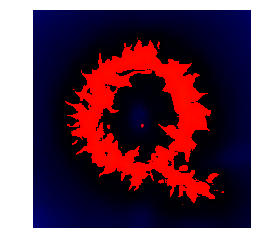

In [36]:
netShapeM.eval()
I = load_image('../data/rawtext/yaheiB/val/0801.png')
I = to_var(I[:,:,32:288,32:288])
I[:,0:1] = gaussian(I[:,0:1], stddev=0.2)
result = netShapeM.G_S(I, 1.0)
visualize(to_data(result[0]))

# texture 

In [1]:
from __future__ import print_function
import torch
from models import SketchModule, ShapeMatchingGAN
from utils import load_image, to_data, to_var, visualize, save_image, gaussian, weights_init
from utils import load_train_batchfnames, prepare_text_batch, load_style_image_pair, cropping_training_batches
import random
from vgg import get_GRAM, VGGFeature
import torchvision.models as models
import argparse
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

opts = argparse.ArgumentParser()
# SMGAN
opts.GS_nlayers = 6
opts.DS_nlayers = 4
opts.GS_nf = 32
opts.DS_nf = 32
opts.GT_nlayers = 6
opts.DT_nlayers = 4
opts.GT_nf = 32
opts.DT_nf = 32

# train 
opts.gpu = True
opts.texture_step1_epochs = 40
opts.texture_step2_epochs = 10
opts.batchsize = 4
opts.Ttraining_num = 800
opts.Tanglejitter = True
opts.subimg_size = 256
opts.style_loss = False
opts.text_path = '../data/rawtext/yaheiB/train'
opts.text_datasize = 708
opts.augment_text_path_path = '../data/rawtext/augment'
opts.augment_text_datasize = 5


# data and path
opts.save_path = '../save/'
opts.save_name = 'maple'
opts.style_name = '../data/style/maple.png'
opts.load_GS_name = '../save/maple-GS-iccv.ckpt'

# create model
print('--- create model ---')
netShapeM = ShapeMatchingGAN(opts.GS_nlayers, opts.DS_nlayers, opts.GS_nf, opts.DS_nf,
                 opts.GT_nlayers, opts.DT_nlayers, opts.GT_nf, opts.DT_nf, opts.gpu)

if opts.gpu:
    netShapeM.cuda()
netShapeM.init_networks(weights_init)
netShapeM.train()

if opts.style_loss:
    netShapeM.G_S.load_state_dict(torch.load(opts.load_GS_name))  
    netShapeM.G_S.eval()
    VGGNet = models.vgg19(pretrained=True).features
    VGGfeatures = VGGFeature(VGGNet, opts.gpu)
    for param in VGGfeatures.parameters():
        param.requires_grad = False
    if opts.gpu:
        VGGfeatures.cuda()
    style_targets = get_GRAM(opts.style_name, VGGfeatures, opts.batchsize, opts.gpu)
    
print('--- training ---')
# load image pair
_, X, Y, Noise = load_style_image_pair(opts.style_name, gpu=opts.gpu)
Y = to_var(Y) if opts.gpu else Y
X = to_var(X) if opts.gpu else X
Noise = to_var(Noise) if opts.gpu else Noise
for epoch in range(opts.texture_step1_epochs):
    for i in range(opts.Ttraining_num/opts.batchsize):
        x, y = cropping_training_batches(X, Y, Noise, opts.batchsize, 
                                  opts.Tanglejitter, opts.subimg_size, opts.subimg_size)
        losses = netShapeM.texture_one_pass(x, y)
        print('Step1, Epoch [%02d/%02d][%03d/%03d]' %(epoch+1, opts.texture_step1_epochs, i+1,
                                                     opts.Ttraining_num/opts.batchsize), end=': ')
        print('LDadv: %+.3f, LGadv: %+.3f, Lrec: %+.3f, Lsty: %+.3f'%(losses[0], losses[1], losses[2], losses[3])) 
if opts.style_loss:
    fnames = load_train_batchfnames(opts.text_path, opts.batchsize, 
                                    opts.text_datasize, trainnum=opts.Ttraining_num)
    for epoch in range(opts.texture_step2_epochs):
        itr = 0
        for fname in fnames:
            itr += 1
            t = prepare_text_batch(fname, anglejitter=False)
            x, y = cropping_training_batches(X, Y, Noise, opts.batchsize, 
                                  opts.Tanglejitter, opts.subimg_size, opts.subimg_size)
            t = to_var(t) if opts.gpu else t
            losses = netShapeM.texture_one_pass(x, y, t, 0, VGGfeatures, style_targets)  
            print('Step2, Epoch [%02d/%02d][%03d/%03d]' %(epoch+1, opts.texture_step2_epochs, 
                                                         itr, len(fnames)), end=': ')
            print('LDadv: %+.3f, LGadv: %+.3f, Lrec: %+.3f, Lsty: %+.3f'%(losses[0], losses[1], losses[2], losses[3])) 
        
print('--- save ---')
# directory
netShapeM.save_texture_model(opts.save_path, opts.save_name)

--- create model ---
--- training ---
Step1, Epoch [01/40][001/200]: LDadv: -0.018, LGadv: -0.022, Lrec: +76.575, Lsty: +0.000
Step1, Epoch [01/40][002/200]: LDadv: +0.077, LGadv: +0.014, Lrec: +66.719, Lsty: +0.000
Step1, Epoch [01/40][003/200]: LDadv: +0.130, LGadv: -0.049, Lrec: +65.668, Lsty: +0.000
Step1, Epoch [01/40][004/200]: LDadv: +0.108, LGadv: -0.055, Lrec: +47.167, Lsty: +0.000
Step1, Epoch [01/40][005/200]: LDadv: +0.155, LGadv: -0.097, Lrec: +38.048, Lsty: +0.000
Step1, Epoch [01/40][006/200]: LDadv: +0.088, LGadv: -0.038, Lrec: +32.205, Lsty: +0.000
Step1, Epoch [01/40][007/200]: LDadv: +0.059, LGadv: +0.038, Lrec: +26.294, Lsty: +0.000
Step1, Epoch [01/40][008/200]: LDadv: +0.061, LGadv: +0.111, Lrec: +24.509, Lsty: +0.000
Step1, Epoch [01/40][009/200]: LDadv: +0.122, LGadv: +0.234, Lrec: +23.613, Lsty: +0.000
Step1, Epoch [01/40][010/200]: LDadv: +0.179, LGadv: +0.132, Lrec: +25.109, Lsty: +0.000
Step1, Epoch [01/40][011/200]: LDadv: +0.197, LGadv: +0.187, Lrec: +30.2

Step1, Epoch [01/40][093/200]: LDadv: +4.044, LGadv: +2.957, Lrec: +16.468, Lsty: +0.000
Step1, Epoch [01/40][094/200]: LDadv: +4.949, LGadv: +3.181, Lrec: +22.942, Lsty: +0.000
Step1, Epoch [01/40][095/200]: LDadv: +4.616, LGadv: +4.654, Lrec: +17.652, Lsty: +0.000
Step1, Epoch [01/40][096/200]: LDadv: +5.976, LGadv: +3.843, Lrec: +21.741, Lsty: +0.000
Step1, Epoch [01/40][097/200]: LDadv: +5.035, LGadv: +5.284, Lrec: +22.071, Lsty: +0.000
Step1, Epoch [01/40][098/200]: LDadv: +5.147, LGadv: +3.926, Lrec: +21.121, Lsty: +0.000
Step1, Epoch [01/40][099/200]: LDadv: +5.958, LGadv: +3.068, Lrec: +20.869, Lsty: +0.000
Step1, Epoch [01/40][100/200]: LDadv: +6.580, LGadv: +4.257, Lrec: +26.267, Lsty: +0.000
Step1, Epoch [01/40][101/200]: LDadv: +5.051, LGadv: +4.171, Lrec: +21.669, Lsty: +0.000
Step1, Epoch [01/40][102/200]: LDadv: +5.014, LGadv: +0.386, Lrec: +17.640, Lsty: +0.000
Step1, Epoch [01/40][103/200]: LDadv: +2.995, LGadv: +4.156, Lrec: +25.047, Lsty: +0.000
Step1, Epoch [01/40][

Step1, Epoch [01/40][185/200]: LDadv: +3.432, LGadv: +3.792, Lrec: +26.898, Lsty: +0.000
Step1, Epoch [01/40][186/200]: LDadv: +6.443, LGadv: +6.189, Lrec: +29.484, Lsty: +0.000
Step1, Epoch [01/40][187/200]: LDadv: +3.034, LGadv: +8.502, Lrec: +31.121, Lsty: +0.000
Step1, Epoch [01/40][188/200]: LDadv: +4.963, LGadv: +7.740, Lrec: +22.615, Lsty: +0.000
Step1, Epoch [01/40][189/200]: LDadv: +9.440, LGadv: -1.499, Lrec: +30.077, Lsty: +0.000
Step1, Epoch [01/40][190/200]: LDadv: +1.573, LGadv: -5.139, Lrec: +26.076, Lsty: +0.000
Step1, Epoch [01/40][191/200]: LDadv: +0.952, LGadv: -1.159, Lrec: +25.848, Lsty: +0.000
Step1, Epoch [01/40][192/200]: LDadv: +0.133, LGadv: +1.014, Lrec: +27.711, Lsty: +0.000
Step1, Epoch [01/40][193/200]: LDadv: +1.213, LGadv: +1.576, Lrec: +33.973, Lsty: +0.000
Step1, Epoch [01/40][194/200]: LDadv: +4.183, LGadv: +7.623, Lrec: +34.433, Lsty: +0.000
Step1, Epoch [01/40][195/200]: LDadv: +8.360, LGadv: +6.710, Lrec: +27.116, Lsty: +0.000
Step1, Epoch [01/40][

Step1, Epoch [02/40][078/200]: LDadv: +4.941, LGadv: +2.904, Lrec: +31.146, Lsty: +0.000
Step1, Epoch [02/40][079/200]: LDadv: +2.282, LGadv: +0.545, Lrec: +27.363, Lsty: +0.000
Step1, Epoch [02/40][080/200]: LDadv: +2.130, LGadv: +0.860, Lrec: +23.982, Lsty: +0.000
Step1, Epoch [02/40][081/200]: LDadv: +2.743, LGadv: +2.757, Lrec: +33.280, Lsty: +0.000
Step1, Epoch [02/40][082/200]: LDadv: +1.684, LGadv: +2.519, Lrec: +26.098, Lsty: +0.000
Step1, Epoch [02/40][083/200]: LDadv: +1.226, LGadv: +1.125, Lrec: +26.777, Lsty: +0.000
Step1, Epoch [02/40][084/200]: LDadv: +4.600, LGadv: +7.124, Lrec: +36.480, Lsty: +0.000
Step1, Epoch [02/40][085/200]: LDadv: -2.704, LGadv: +5.142, Lrec: +25.612, Lsty: +0.000
Step1, Epoch [02/40][086/200]: LDadv: +6.174, LGadv: +7.567, Lrec: +31.601, Lsty: +0.000
Step1, Epoch [02/40][087/200]: LDadv: +1.933, LGadv: +5.326, Lrec: +29.262, Lsty: +0.000
Step1, Epoch [02/40][088/200]: LDadv: +3.228, LGadv: +6.084, Lrec: +33.946, Lsty: +0.000
Step1, Epoch [02/40][

Step1, Epoch [02/40][170/200]: LDadv: +1.616, LGadv: +5.877, Lrec: +26.985, Lsty: +0.000
Step1, Epoch [02/40][171/200]: LDadv: +1.049, LGadv: +3.587, Lrec: +32.274, Lsty: +0.000
Step1, Epoch [02/40][172/200]: LDadv: +1.419, LGadv: +6.521, Lrec: +29.770, Lsty: +0.000
Step1, Epoch [02/40][173/200]: LDadv: +3.697, LGadv: +5.078, Lrec: +29.523, Lsty: +0.000
Step1, Epoch [02/40][174/200]: LDadv: +5.577, LGadv: +7.467, Lrec: +32.690, Lsty: +0.000
Step1, Epoch [02/40][175/200]: LDadv: +2.006, LGadv: +7.048, Lrec: +27.148, Lsty: +0.000
Step1, Epoch [02/40][176/200]: LDadv: +0.581, LGadv: +7.983, Lrec: +24.048, Lsty: +0.000
Step1, Epoch [02/40][177/200]: LDadv: +2.414, LGadv: +10.013, Lrec: +28.002, Lsty: +0.000
Step1, Epoch [02/40][178/200]: LDadv: +6.549, LGadv: +5.094, Lrec: +28.452, Lsty: +0.000
Step1, Epoch [02/40][179/200]: LDadv: +5.317, LGadv: +3.169, Lrec: +26.443, Lsty: +0.000
Step1, Epoch [02/40][180/200]: LDadv: +1.281, LGadv: +3.915, Lrec: +22.284, Lsty: +0.000
Step1, Epoch [02/40]

Step1, Epoch [03/40][062/200]: LDadv: +2.317, LGadv: +3.086, Lrec: +28.006, Lsty: +0.000
Step1, Epoch [03/40][063/200]: LDadv: -2.305, LGadv: -0.596, Lrec: +32.549, Lsty: +0.000
Step1, Epoch [03/40][064/200]: LDadv: -3.527, LGadv: +0.775, Lrec: +28.893, Lsty: +0.000
Step1, Epoch [03/40][065/200]: LDadv: -2.986, LGadv: +3.807, Lrec: +23.511, Lsty: +0.000
Step1, Epoch [03/40][066/200]: LDadv: +5.780, LGadv: +7.503, Lrec: +32.911, Lsty: +0.000
Step1, Epoch [03/40][067/200]: LDadv: +6.744, LGadv: +7.319, Lrec: +32.217, Lsty: +0.000
Step1, Epoch [03/40][068/200]: LDadv: +5.257, LGadv: +8.839, Lrec: +27.236, Lsty: +0.000
Step1, Epoch [03/40][069/200]: LDadv: +9.854, LGadv: +7.155, Lrec: +36.848, Lsty: +0.000
Step1, Epoch [03/40][070/200]: LDadv: +9.377, LGadv: +9.191, Lrec: +32.711, Lsty: +0.000
Step1, Epoch [03/40][071/200]: LDadv: -0.831, LGadv: +7.004, Lrec: +30.289, Lsty: +0.000
Step1, Epoch [03/40][072/200]: LDadv: -3.058, LGadv: +6.684, Lrec: +31.933, Lsty: +0.000
Step1, Epoch [03/40][

Step1, Epoch [03/40][155/200]: LDadv: +1.241, LGadv: +1.509, Lrec: +27.324, Lsty: +0.000
Step1, Epoch [03/40][156/200]: LDadv: +7.538, LGadv: +3.122, Lrec: +30.122, Lsty: +0.000
Step1, Epoch [03/40][157/200]: LDadv: +5.057, LGadv: +3.254, Lrec: +27.673, Lsty: +0.000
Step1, Epoch [03/40][158/200]: LDadv: +7.574, LGadv: +10.290, Lrec: +32.512, Lsty: +0.000
Step1, Epoch [03/40][159/200]: LDadv: +6.749, LGadv: +3.011, Lrec: +31.519, Lsty: +0.000
Step1, Epoch [03/40][160/200]: LDadv: +2.730, LGadv: +4.629, Lrec: +33.837, Lsty: +0.000
Step1, Epoch [03/40][161/200]: LDadv: +0.081, LGadv: +7.919, Lrec: +28.539, Lsty: +0.000
Step1, Epoch [03/40][162/200]: LDadv: +1.250, LGadv: +7.668, Lrec: +31.223, Lsty: +0.000
Step1, Epoch [03/40][163/200]: LDadv: +3.912, LGadv: +3.599, Lrec: +24.044, Lsty: +0.000
Step1, Epoch [03/40][164/200]: LDadv: +4.579, LGadv: +2.390, Lrec: +32.707, Lsty: +0.000
Step1, Epoch [03/40][165/200]: LDadv: +2.867, LGadv: +5.682, Lrec: +24.481, Lsty: +0.000
Step1, Epoch [03/40]

Step1, Epoch [04/40][047/200]: LDadv: +8.073, LGadv: +10.029, Lrec: +35.208, Lsty: +0.000
Step1, Epoch [04/40][048/200]: LDadv: +3.835, LGadv: +3.706, Lrec: +31.798, Lsty: +0.000
Step1, Epoch [04/40][049/200]: LDadv: -1.054, LGadv: +8.846, Lrec: +22.836, Lsty: +0.000
Step1, Epoch [04/40][050/200]: LDadv: +5.673, LGadv: +7.798, Lrec: +29.710, Lsty: +0.000
Step1, Epoch [04/40][051/200]: LDadv: +6.566, LGadv: +7.679, Lrec: +29.090, Lsty: +0.000
Step1, Epoch [04/40][052/200]: LDadv: +5.409, LGadv: +6.441, Lrec: +26.009, Lsty: +0.000
Step1, Epoch [04/40][053/200]: LDadv: +1.277, LGadv: +5.661, Lrec: +20.600, Lsty: +0.000
Step1, Epoch [04/40][054/200]: LDadv: +7.375, LGadv: +9.395, Lrec: +27.845, Lsty: +0.000
Step1, Epoch [04/40][055/200]: LDadv: +4.967, LGadv: +6.897, Lrec: +27.220, Lsty: +0.000
Step1, Epoch [04/40][056/200]: LDadv: +11.072, LGadv: +8.743, Lrec: +34.219, Lsty: +0.000
Step1, Epoch [04/40][057/200]: LDadv: +1.281, LGadv: +4.167, Lrec: +21.613, Lsty: +0.000
Step1, Epoch [04/40

Step1, Epoch [04/40][139/200]: LDadv: +8.797, LGadv: +11.801, Lrec: +34.664, Lsty: +0.000
Step1, Epoch [04/40][140/200]: LDadv: +5.828, LGadv: +4.997, Lrec: +25.658, Lsty: +0.000
Step1, Epoch [04/40][141/200]: LDadv: +5.481, LGadv: -0.325, Lrec: +31.585, Lsty: +0.000
Step1, Epoch [04/40][142/200]: LDadv: +2.830, LGadv: +1.497, Lrec: +23.446, Lsty: +0.000
Step1, Epoch [04/40][143/200]: LDadv: +4.031, LGadv: +1.362, Lrec: +34.762, Lsty: +0.000
Step1, Epoch [04/40][144/200]: LDadv: +8.279, LGadv: +6.976, Lrec: +29.736, Lsty: +0.000
Step1, Epoch [04/40][145/200]: LDadv: +9.829, LGadv: +10.319, Lrec: +28.004, Lsty: +0.000
Step1, Epoch [04/40][146/200]: LDadv: +10.147, LGadv: +9.664, Lrec: +27.558, Lsty: +0.000
Step1, Epoch [04/40][147/200]: LDadv: +5.328, LGadv: +10.403, Lrec: +28.566, Lsty: +0.000
Step1, Epoch [04/40][148/200]: LDadv: +6.428, LGadv: +9.814, Lrec: +22.759, Lsty: +0.000
Step1, Epoch [04/40][149/200]: LDadv: +9.310, LGadv: +8.765, Lrec: +32.355, Lsty: +0.000
Step1, Epoch [04/

Step1, Epoch [05/40][031/200]: LDadv: +7.813, LGadv: +10.272, Lrec: +25.793, Lsty: +0.000
Step1, Epoch [05/40][032/200]: LDadv: +4.436, LGadv: +11.268, Lrec: +23.078, Lsty: +0.000
Step1, Epoch [05/40][033/200]: LDadv: +8.556, LGadv: +11.231, Lrec: +27.053, Lsty: +0.000
Step1, Epoch [05/40][034/200]: LDadv: +0.631, LGadv: +13.747, Lrec: +23.386, Lsty: +0.000
Step1, Epoch [05/40][035/200]: LDadv: +4.285, LGadv: +10.827, Lrec: +33.261, Lsty: +0.000
Step1, Epoch [05/40][036/200]: LDadv: -3.766, LGadv: +8.750, Lrec: +32.911, Lsty: +0.000
Step1, Epoch [05/40][037/200]: LDadv: +3.719, LGadv: +9.412, Lrec: +39.279, Lsty: +0.000
Step1, Epoch [05/40][038/200]: LDadv: +3.065, LGadv: +12.479, Lrec: +23.728, Lsty: +0.000
Step1, Epoch [05/40][039/200]: LDadv: +9.877, LGadv: +11.432, Lrec: +35.536, Lsty: +0.000
Step1, Epoch [05/40][040/200]: LDadv: +5.393, LGadv: +16.185, Lrec: +31.005, Lsty: +0.000
Step1, Epoch [05/40][041/200]: LDadv: +8.573, LGadv: +14.108, Lrec: +33.780, Lsty: +0.000
Step1, Epoch

Step1, Epoch [05/40][123/200]: LDadv: +8.373, LGadv: +11.695, Lrec: +26.313, Lsty: +0.000
Step1, Epoch [05/40][124/200]: LDadv: +4.342, LGadv: +8.744, Lrec: +30.803, Lsty: +0.000
Step1, Epoch [05/40][125/200]: LDadv: +8.151, LGadv: +9.730, Lrec: +31.488, Lsty: +0.000
Step1, Epoch [05/40][126/200]: LDadv: +2.820, LGadv: +9.597, Lrec: +22.354, Lsty: +0.000
Step1, Epoch [05/40][127/200]: LDadv: +2.797, LGadv: +12.362, Lrec: +27.287, Lsty: +0.000
Step1, Epoch [05/40][128/200]: LDadv: +4.272, LGadv: +14.179, Lrec: +23.629, Lsty: +0.000
Step1, Epoch [05/40][129/200]: LDadv: +7.579, LGadv: +12.410, Lrec: +30.418, Lsty: +0.000
Step1, Epoch [05/40][130/200]: LDadv: +8.488, LGadv: +12.636, Lrec: +22.981, Lsty: +0.000
Step1, Epoch [05/40][131/200]: LDadv: +1.697, LGadv: +14.444, Lrec: +24.777, Lsty: +0.000
Step1, Epoch [05/40][132/200]: LDadv: +4.682, LGadv: +11.370, Lrec: +24.864, Lsty: +0.000
Step1, Epoch [05/40][133/200]: LDadv: +7.607, LGadv: +9.684, Lrec: +29.297, Lsty: +0.000
Step1, Epoch [

Step1, Epoch [06/40][015/200]: LDadv: +9.534, LGadv: +19.828, Lrec: +32.466, Lsty: +0.000
Step1, Epoch [06/40][016/200]: LDadv: +12.429, LGadv: +15.180, Lrec: +31.779, Lsty: +0.000
Step1, Epoch [06/40][017/200]: LDadv: +3.175, LGadv: +11.549, Lrec: +23.958, Lsty: +0.000
Step1, Epoch [06/40][018/200]: LDadv: +9.355, LGadv: +16.845, Lrec: +29.763, Lsty: +0.000
Step1, Epoch [06/40][019/200]: LDadv: +2.727, LGadv: +17.908, Lrec: +22.985, Lsty: +0.000
Step1, Epoch [06/40][020/200]: LDadv: +5.520, LGadv: +14.544, Lrec: +30.305, Lsty: +0.000
Step1, Epoch [06/40][021/200]: LDadv: +3.212, LGadv: +8.866, Lrec: +17.242, Lsty: +0.000
Step1, Epoch [06/40][022/200]: LDadv: +7.602, LGadv: +9.037, Lrec: +35.590, Lsty: +0.000
Step1, Epoch [06/40][023/200]: LDadv: +2.364, LGadv: +12.087, Lrec: +27.217, Lsty: +0.000
Step1, Epoch [06/40][024/200]: LDadv: +10.975, LGadv: +14.931, Lrec: +29.983, Lsty: +0.000
Step1, Epoch [06/40][025/200]: LDadv: +7.472, LGadv: +14.759, Lrec: +26.610, Lsty: +0.000
Step1, Epo

Step1, Epoch [06/40][106/200]: LDadv: +14.626, LGadv: +17.678, Lrec: +33.951, Lsty: +0.000
Step1, Epoch [06/40][107/200]: LDadv: +16.692, LGadv: +19.010, Lrec: +34.617, Lsty: +0.000
Step1, Epoch [06/40][108/200]: LDadv: +15.201, LGadv: +18.335, Lrec: +30.779, Lsty: +0.000
Step1, Epoch [06/40][109/200]: LDadv: +2.422, LGadv: +18.564, Lrec: +23.785, Lsty: +0.000
Step1, Epoch [06/40][110/200]: LDadv: +0.611, LGadv: +15.127, Lrec: +23.791, Lsty: +0.000
Step1, Epoch [06/40][111/200]: LDadv: +3.660, LGadv: +15.567, Lrec: +24.260, Lsty: +0.000
Step1, Epoch [06/40][112/200]: LDadv: +14.958, LGadv: +19.684, Lrec: +28.203, Lsty: +0.000
Step1, Epoch [06/40][113/200]: LDadv: +14.881, LGadv: +21.276, Lrec: +30.305, Lsty: +0.000
Step1, Epoch [06/40][114/200]: LDadv: +10.028, LGadv: +19.847, Lrec: +30.310, Lsty: +0.000
Step1, Epoch [06/40][115/200]: LDadv: +9.960, LGadv: +21.074, Lrec: +24.368, Lsty: +0.000
Step1, Epoch [06/40][116/200]: LDadv: +14.271, LGadv: +25.668, Lrec: +36.287, Lsty: +0.000
Ste

Step1, Epoch [06/40][197/200]: LDadv: +5.998, LGadv: +28.963, Lrec: +21.526, Lsty: +0.000
Step1, Epoch [06/40][198/200]: LDadv: +16.781, LGadv: +21.096, Lrec: +37.251, Lsty: +0.000
Step1, Epoch [06/40][199/200]: LDadv: +17.232, LGadv: +22.464, Lrec: +23.067, Lsty: +0.000
Step1, Epoch [06/40][200/200]: LDadv: +6.030, LGadv: +28.691, Lrec: +26.768, Lsty: +0.000
Step1, Epoch [07/40][001/200]: LDadv: +19.191, LGadv: +34.190, Lrec: +40.996, Lsty: +0.000
Step1, Epoch [07/40][002/200]: LDadv: +13.416, LGadv: +27.292, Lrec: +31.004, Lsty: +0.000
Step1, Epoch [07/40][003/200]: LDadv: +6.497, LGadv: +21.854, Lrec: +28.888, Lsty: +0.000
Step1, Epoch [07/40][004/200]: LDadv: +9.761, LGadv: +20.070, Lrec: +28.057, Lsty: +0.000
Step1, Epoch [07/40][005/200]: LDadv: +16.566, LGadv: +26.026, Lrec: +29.669, Lsty: +0.000
Step1, Epoch [07/40][006/200]: LDadv: +12.325, LGadv: +22.488, Lrec: +27.959, Lsty: +0.000
Step1, Epoch [07/40][007/200]: LDadv: +17.847, LGadv: +16.155, Lrec: +31.616, Lsty: +0.000
Ste

Step1, Epoch [07/40][088/200]: LDadv: +20.445, LGadv: +31.574, Lrec: +25.561, Lsty: +0.000
Step1, Epoch [07/40][089/200]: LDadv: +26.387, LGadv: +22.301, Lrec: +31.489, Lsty: +0.000
Step1, Epoch [07/40][090/200]: LDadv: +23.436, LGadv: +16.049, Lrec: +30.783, Lsty: +0.000
Step1, Epoch [07/40][091/200]: LDadv: +13.978, LGadv: +29.384, Lrec: +25.521, Lsty: +0.000
Step1, Epoch [07/40][092/200]: LDadv: +22.668, LGadv: +32.439, Lrec: +36.166, Lsty: +0.000
Step1, Epoch [07/40][093/200]: LDadv: +16.180, LGadv: +31.576, Lrec: +28.665, Lsty: +0.000
Step1, Epoch [07/40][094/200]: LDadv: +6.166, LGadv: +27.664, Lrec: +24.311, Lsty: +0.000
Step1, Epoch [07/40][095/200]: LDadv: +18.165, LGadv: +18.792, Lrec: +26.894, Lsty: +0.000
Step1, Epoch [07/40][096/200]: LDadv: +24.090, LGadv: +30.149, Lrec: +32.137, Lsty: +0.000
Step1, Epoch [07/40][097/200]: LDadv: +7.047, LGadv: +25.265, Lrec: +26.580, Lsty: +0.000
Step1, Epoch [07/40][098/200]: LDadv: +19.057, LGadv: +21.757, Lrec: +28.736, Lsty: +0.000
S

Step1, Epoch [07/40][179/200]: LDadv: +12.174, LGadv: +37.274, Lrec: +28.728, Lsty: +0.000
Step1, Epoch [07/40][180/200]: LDadv: +5.934, LGadv: +33.606, Lrec: +18.976, Lsty: +0.000
Step1, Epoch [07/40][181/200]: LDadv: +14.022, LGadv: +31.319, Lrec: +27.985, Lsty: +0.000
Step1, Epoch [07/40][182/200]: LDadv: +23.747, LGadv: +28.284, Lrec: +27.378, Lsty: +0.000
Step1, Epoch [07/40][183/200]: LDadv: +16.966, LGadv: +21.991, Lrec: +25.726, Lsty: +0.000
Step1, Epoch [07/40][184/200]: LDadv: +13.069, LGadv: +32.443, Lrec: +21.595, Lsty: +0.000
Step1, Epoch [07/40][185/200]: LDadv: +11.365, LGadv: +29.451, Lrec: +27.168, Lsty: +0.000
Step1, Epoch [07/40][186/200]: LDadv: +9.407, LGadv: +29.413, Lrec: +19.467, Lsty: +0.000
Step1, Epoch [07/40][187/200]: LDadv: +19.285, LGadv: +29.654, Lrec: +32.725, Lsty: +0.000
Step1, Epoch [07/40][188/200]: LDadv: +12.418, LGadv: +32.044, Lrec: +26.897, Lsty: +0.000
Step1, Epoch [07/40][189/200]: LDadv: +17.149, LGadv: +26.377, Lrec: +27.297, Lsty: +0.000
S

Step1, Epoch [08/40][069/200]: LDadv: +12.299, LGadv: +21.645, Lrec: +32.300, Lsty: +0.000
Step1, Epoch [08/40][070/200]: LDadv: +11.761, LGadv: +24.870, Lrec: +25.075, Lsty: +0.000
Step1, Epoch [08/40][071/200]: LDadv: +14.048, LGadv: +25.520, Lrec: +21.831, Lsty: +0.000
Step1, Epoch [08/40][072/200]: LDadv: +27.961, LGadv: +32.390, Lrec: +32.356, Lsty: +0.000
Step1, Epoch [08/40][073/200]: LDadv: +28.202, LGadv: +39.552, Lrec: +30.263, Lsty: +0.000
Step1, Epoch [08/40][074/200]: LDadv: +13.648, LGadv: +35.829, Lrec: +24.174, Lsty: +0.000
Step1, Epoch [08/40][075/200]: LDadv: +14.232, LGadv: +36.566, Lrec: +30.035, Lsty: +0.000
Step1, Epoch [08/40][076/200]: LDadv: +22.046, LGadv: +31.488, Lrec: +27.236, Lsty: +0.000
Step1, Epoch [08/40][077/200]: LDadv: +10.616, LGadv: +24.577, Lrec: +16.607, Lsty: +0.000
Step1, Epoch [08/40][078/200]: LDadv: +25.765, LGadv: +35.371, Lrec: +28.377, Lsty: +0.000
Step1, Epoch [08/40][079/200]: LDadv: +19.889, LGadv: +29.554, Lrec: +26.420, Lsty: +0.000

Step1, Epoch [08/40][160/200]: LDadv: +13.940, LGadv: +31.425, Lrec: +24.127, Lsty: +0.000
Step1, Epoch [08/40][161/200]: LDadv: +11.499, LGadv: +27.944, Lrec: +23.952, Lsty: +0.000
Step1, Epoch [08/40][162/200]: LDadv: +21.789, LGadv: +25.739, Lrec: +32.849, Lsty: +0.000
Step1, Epoch [08/40][163/200]: LDadv: +31.063, LGadv: +32.964, Lrec: +27.484, Lsty: +0.000
Step1, Epoch [08/40][164/200]: LDadv: +25.246, LGadv: +33.161, Lrec: +24.996, Lsty: +0.000
Step1, Epoch [08/40][165/200]: LDadv: +24.572, LGadv: +34.063, Lrec: +30.096, Lsty: +0.000
Step1, Epoch [08/40][166/200]: LDadv: +10.571, LGadv: +26.374, Lrec: +22.389, Lsty: +0.000
Step1, Epoch [08/40][167/200]: LDadv: +19.835, LGadv: +33.087, Lrec: +28.534, Lsty: +0.000
Step1, Epoch [08/40][168/200]: LDadv: +8.648, LGadv: +37.786, Lrec: +25.410, Lsty: +0.000
Step1, Epoch [08/40][169/200]: LDadv: +20.291, LGadv: +32.194, Lrec: +27.417, Lsty: +0.000
Step1, Epoch [08/40][170/200]: LDadv: +20.724, LGadv: +22.103, Lrec: +30.360, Lsty: +0.000


Step1, Epoch [09/40][051/200]: LDadv: +26.889, LGadv: +25.342, Lrec: +23.686, Lsty: +0.000
Step1, Epoch [09/40][052/200]: LDadv: +25.127, LGadv: +30.633, Lrec: +32.671, Lsty: +0.000
Step1, Epoch [09/40][053/200]: LDadv: +12.959, LGadv: +35.997, Lrec: +34.438, Lsty: +0.000
Step1, Epoch [09/40][054/200]: LDadv: +22.058, LGadv: +37.246, Lrec: +25.721, Lsty: +0.000
Step1, Epoch [09/40][055/200]: LDadv: +13.887, LGadv: +31.071, Lrec: +22.087, Lsty: +0.000
Step1, Epoch [09/40][056/200]: LDadv: +24.996, LGadv: +32.077, Lrec: +31.700, Lsty: +0.000
Step1, Epoch [09/40][057/200]: LDadv: +26.547, LGadv: +28.226, Lrec: +30.604, Lsty: +0.000
Step1, Epoch [09/40][058/200]: LDadv: +24.033, LGadv: +33.789, Lrec: +31.096, Lsty: +0.000
Step1, Epoch [09/40][059/200]: LDadv: +19.559, LGadv: +32.280, Lrec: +33.909, Lsty: +0.000
Step1, Epoch [09/40][060/200]: LDadv: +23.575, LGadv: +33.526, Lrec: +26.119, Lsty: +0.000
Step1, Epoch [09/40][061/200]: LDadv: +36.806, LGadv: +27.968, Lrec: +33.110, Lsty: +0.000

Step1, Epoch [09/40][142/200]: LDadv: +23.611, LGadv: +30.646, Lrec: +33.522, Lsty: +0.000
Step1, Epoch [09/40][143/200]: LDadv: +14.029, LGadv: +42.083, Lrec: +22.814, Lsty: +0.000
Step1, Epoch [09/40][144/200]: LDadv: +12.982, LGadv: +47.459, Lrec: +18.376, Lsty: +0.000
Step1, Epoch [09/40][145/200]: LDadv: +10.355, LGadv: +42.951, Lrec: +32.362, Lsty: +0.000
Step1, Epoch [09/40][146/200]: LDadv: +11.309, LGadv: +40.850, Lrec: +29.892, Lsty: +0.000
Step1, Epoch [09/40][147/200]: LDadv: +8.643, LGadv: +40.541, Lrec: +18.062, Lsty: +0.000
Step1, Epoch [09/40][148/200]: LDadv: +10.494, LGadv: +29.570, Lrec: +25.046, Lsty: +0.000
Step1, Epoch [09/40][149/200]: LDadv: +6.519, LGadv: +35.875, Lrec: +30.639, Lsty: +0.000
Step1, Epoch [09/40][150/200]: LDadv: +18.055, LGadv: +43.589, Lrec: +36.097, Lsty: +0.000
Step1, Epoch [09/40][151/200]: LDadv: +23.289, LGadv: +44.161, Lrec: +33.367, Lsty: +0.000
Step1, Epoch [09/40][152/200]: LDadv: +23.356, LGadv: +38.913, Lrec: +22.654, Lsty: +0.000
S

Step1, Epoch [10/40][032/200]: LDadv: +35.850, LGadv: +28.189, Lrec: +32.725, Lsty: +0.000
Step1, Epoch [10/40][033/200]: LDadv: +19.658, LGadv: +30.501, Lrec: +29.352, Lsty: +0.000
Step1, Epoch [10/40][034/200]: LDadv: +20.586, LGadv: +40.166, Lrec: +26.421, Lsty: +0.000
Step1, Epoch [10/40][035/200]: LDadv: +26.902, LGadv: +39.173, Lrec: +29.008, Lsty: +0.000
Step1, Epoch [10/40][036/200]: LDadv: +9.038, LGadv: +35.497, Lrec: +31.627, Lsty: +0.000
Step1, Epoch [10/40][037/200]: LDadv: +10.406, LGadv: +39.966, Lrec: +24.358, Lsty: +0.000
Step1, Epoch [10/40][038/200]: LDadv: +13.294, LGadv: +33.811, Lrec: +19.209, Lsty: +0.000
Step1, Epoch [10/40][039/200]: LDadv: +24.294, LGadv: +24.517, Lrec: +25.618, Lsty: +0.000
Step1, Epoch [10/40][040/200]: LDadv: +27.074, LGadv: +33.201, Lrec: +31.127, Lsty: +0.000
Step1, Epoch [10/40][041/200]: LDadv: +27.710, LGadv: +40.406, Lrec: +31.279, Lsty: +0.000
Step1, Epoch [10/40][042/200]: LDadv: +11.825, LGadv: +40.633, Lrec: +21.831, Lsty: +0.000


Step1, Epoch [10/40][123/200]: LDadv: +27.437, LGadv: +32.680, Lrec: +28.260, Lsty: +0.000
Step1, Epoch [10/40][124/200]: LDadv: +16.767, LGadv: +32.620, Lrec: +20.765, Lsty: +0.000
Step1, Epoch [10/40][125/200]: LDadv: +33.944, LGadv: +44.545, Lrec: +32.698, Lsty: +0.000
Step1, Epoch [10/40][126/200]: LDadv: +13.120, LGadv: +44.097, Lrec: +30.573, Lsty: +0.000
Step1, Epoch [10/40][127/200]: LDadv: +12.672, LGadv: +39.617, Lrec: +31.244, Lsty: +0.000
Step1, Epoch [10/40][128/200]: LDadv: +13.892, LGadv: +33.442, Lrec: +24.526, Lsty: +0.000
Step1, Epoch [10/40][129/200]: LDadv: +28.392, LGadv: +17.014, Lrec: +30.661, Lsty: +0.000
Step1, Epoch [10/40][130/200]: LDadv: +20.454, LGadv: +37.967, Lrec: +27.704, Lsty: +0.000
Step1, Epoch [10/40][131/200]: LDadv: +25.817, LGadv: +39.408, Lrec: +32.270, Lsty: +0.000
Step1, Epoch [10/40][132/200]: LDadv: +21.409, LGadv: +31.531, Lrec: +26.763, Lsty: +0.000
Step1, Epoch [10/40][133/200]: LDadv: +21.342, LGadv: +32.183, Lrec: +32.050, Lsty: +0.000

Step1, Epoch [11/40][013/200]: LDadv: +11.878, LGadv: +37.762, Lrec: +23.635, Lsty: +0.000
Step1, Epoch [11/40][014/200]: LDadv: +12.490, LGadv: +31.554, Lrec: +29.107, Lsty: +0.000
Step1, Epoch [11/40][015/200]: LDadv: +16.873, LGadv: +34.861, Lrec: +23.530, Lsty: +0.000
Step1, Epoch [11/40][016/200]: LDadv: +27.922, LGadv: +42.970, Lrec: +32.212, Lsty: +0.000
Step1, Epoch [11/40][017/200]: LDadv: +19.493, LGadv: +34.635, Lrec: +27.309, Lsty: +0.000
Step1, Epoch [11/40][018/200]: LDadv: +11.768, LGadv: +38.865, Lrec: +29.286, Lsty: +0.000
Step1, Epoch [11/40][019/200]: LDadv: +16.499, LGadv: +43.361, Lrec: +23.662, Lsty: +0.000
Step1, Epoch [11/40][020/200]: LDadv: +19.825, LGadv: +39.652, Lrec: +23.809, Lsty: +0.000
Step1, Epoch [11/40][021/200]: LDadv: +22.492, LGadv: +32.319, Lrec: +31.193, Lsty: +0.000
Step1, Epoch [11/40][022/200]: LDadv: +27.613, LGadv: +33.903, Lrec: +31.056, Lsty: +0.000
Step1, Epoch [11/40][023/200]: LDadv: +27.255, LGadv: +39.305, Lrec: +25.428, Lsty: +0.000

Step1, Epoch [11/40][104/200]: LDadv: +11.691, LGadv: +47.670, Lrec: +27.567, Lsty: +0.000
Step1, Epoch [11/40][105/200]: LDadv: +16.869, LGadv: +44.823, Lrec: +27.763, Lsty: +0.000
Step1, Epoch [11/40][106/200]: LDadv: +12.880, LGadv: +39.286, Lrec: +18.821, Lsty: +0.000
Step1, Epoch [11/40][107/200]: LDadv: +20.166, LGadv: +28.177, Lrec: +27.269, Lsty: +0.000
Step1, Epoch [11/40][108/200]: LDadv: +20.263, LGadv: +30.426, Lrec: +20.131, Lsty: +0.000
Step1, Epoch [11/40][109/200]: LDadv: +13.907, LGadv: +45.540, Lrec: +24.002, Lsty: +0.000
Step1, Epoch [11/40][110/200]: LDadv: +14.812, LGadv: +47.085, Lrec: +29.125, Lsty: +0.000
Step1, Epoch [11/40][111/200]: LDadv: +13.960, LGadv: +44.510, Lrec: +26.010, Lsty: +0.000
Step1, Epoch [11/40][112/200]: LDadv: +12.390, LGadv: +41.297, Lrec: +27.279, Lsty: +0.000
Step1, Epoch [11/40][113/200]: LDadv: +13.761, LGadv: +29.130, Lrec: +22.108, Lsty: +0.000
Step1, Epoch [11/40][114/200]: LDadv: +22.939, LGadv: +22.335, Lrec: +26.150, Lsty: +0.000

Step1, Epoch [11/40][194/200]: LDadv: +17.743, LGadv: +38.315, Lrec: +23.606, Lsty: +0.000
Step1, Epoch [11/40][195/200]: LDadv: +30.648, LGadv: +34.979, Lrec: +33.302, Lsty: +0.000
Step1, Epoch [11/40][196/200]: LDadv: +22.700, LGadv: +36.025, Lrec: +23.576, Lsty: +0.000
Step1, Epoch [11/40][197/200]: LDadv: +27.550, LGadv: +25.665, Lrec: +27.515, Lsty: +0.000
Step1, Epoch [11/40][198/200]: LDadv: +31.987, LGadv: +34.035, Lrec: +28.176, Lsty: +0.000
Step1, Epoch [11/40][199/200]: LDadv: +15.290, LGadv: +36.916, Lrec: +18.355, Lsty: +0.000
Step1, Epoch [11/40][200/200]: LDadv: +24.526, LGadv: +40.163, Lrec: +32.994, Lsty: +0.000
Step1, Epoch [12/40][001/200]: LDadv: +10.690, LGadv: +36.024, Lrec: +22.619, Lsty: +0.000
Step1, Epoch [12/40][002/200]: LDadv: +12.355, LGadv: +31.422, Lrec: +19.961, Lsty: +0.000
Step1, Epoch [12/40][003/200]: LDadv: +27.583, LGadv: +26.198, Lrec: +31.744, Lsty: +0.000
Step1, Epoch [12/40][004/200]: LDadv: +12.733, LGadv: +28.136, Lrec: +23.508, Lsty: +0.000

Step1, Epoch [12/40][085/200]: LDadv: +23.222, LGadv: +41.735, Lrec: +31.625, Lsty: +0.000
Step1, Epoch [12/40][086/200]: LDadv: +22.453, LGadv: +31.900, Lrec: +31.363, Lsty: +0.000
Step1, Epoch [12/40][087/200]: LDadv: +13.845, LGadv: +45.513, Lrec: +21.515, Lsty: +0.000
Step1, Epoch [12/40][088/200]: LDadv: +17.922, LGadv: +36.906, Lrec: +22.975, Lsty: +0.000
Step1, Epoch [12/40][089/200]: LDadv: +13.962, LGadv: +31.023, Lrec: +24.693, Lsty: +0.000
Step1, Epoch [12/40][090/200]: LDadv: +14.508, LGadv: +43.840, Lrec: +35.373, Lsty: +0.000
Step1, Epoch [12/40][091/200]: LDadv: +18.256, LGadv: +51.395, Lrec: +28.210, Lsty: +0.000
Step1, Epoch [12/40][092/200]: LDadv: +15.690, LGadv: +43.161, Lrec: +28.063, Lsty: +0.000
Step1, Epoch [12/40][093/200]: LDadv: +14.436, LGadv: +33.079, Lrec: +22.093, Lsty: +0.000
Step1, Epoch [12/40][094/200]: LDadv: +14.934, LGadv: +37.624, Lrec: +25.251, Lsty: +0.000
Step1, Epoch [12/40][095/200]: LDadv: +9.474, LGadv: +40.412, Lrec: +19.695, Lsty: +0.000


Step1, Epoch [12/40][176/200]: LDadv: +29.388, LGadv: +22.185, Lrec: +25.449, Lsty: +0.000
Step1, Epoch [12/40][177/200]: LDadv: +19.582, LGadv: +39.402, Lrec: +36.801, Lsty: +0.000
Step1, Epoch [12/40][178/200]: LDadv: +6.308, LGadv: +42.249, Lrec: +24.488, Lsty: +0.000
Step1, Epoch [12/40][179/200]: LDadv: +17.710, LGadv: +44.531, Lrec: +27.222, Lsty: +0.000
Step1, Epoch [12/40][180/200]: LDadv: +11.152, LGadv: +42.639, Lrec: +22.205, Lsty: +0.000
Step1, Epoch [12/40][181/200]: LDadv: +12.598, LGadv: +36.969, Lrec: +20.237, Lsty: +0.000
Step1, Epoch [12/40][182/200]: LDadv: +26.587, LGadv: +32.576, Lrec: +30.252, Lsty: +0.000
Step1, Epoch [12/40][183/200]: LDadv: +23.930, LGadv: +23.151, Lrec: +23.073, Lsty: +0.000
Step1, Epoch [12/40][184/200]: LDadv: +20.660, LGadv: +27.150, Lrec: +23.123, Lsty: +0.000
Step1, Epoch [12/40][185/200]: LDadv: +21.325, LGadv: +42.803, Lrec: +29.288, Lsty: +0.000
Step1, Epoch [12/40][186/200]: LDadv: +6.000, LGadv: +41.463, Lrec: +19.481, Lsty: +0.000
S

Step1, Epoch [13/40][066/200]: LDadv: +17.113, LGadv: +38.864, Lrec: +24.010, Lsty: +0.000
Step1, Epoch [13/40][067/200]: LDadv: +32.817, LGadv: +40.566, Lrec: +25.999, Lsty: +0.000
Step1, Epoch [13/40][068/200]: LDadv: +27.578, LGadv: +37.746, Lrec: +24.104, Lsty: +0.000
Step1, Epoch [13/40][069/200]: LDadv: +12.675, LGadv: +41.994, Lrec: +15.000, Lsty: +0.000
Step1, Epoch [13/40][070/200]: LDadv: +21.479, LGadv: +42.835, Lrec: +22.874, Lsty: +0.000
Step1, Epoch [13/40][071/200]: LDadv: +21.601, LGadv: +39.388, Lrec: +16.368, Lsty: +0.000
Step1, Epoch [13/40][072/200]: LDadv: +21.257, LGadv: +38.403, Lrec: +24.163, Lsty: +0.000
Step1, Epoch [13/40][073/200]: LDadv: +25.558, LGadv: +40.656, Lrec: +31.745, Lsty: +0.000
Step1, Epoch [13/40][074/200]: LDadv: +20.361, LGadv: +44.615, Lrec: +26.072, Lsty: +0.000
Step1, Epoch [13/40][075/200]: LDadv: +22.355, LGadv: +45.857, Lrec: +29.764, Lsty: +0.000
Step1, Epoch [13/40][076/200]: LDadv: +21.376, LGadv: +37.717, Lrec: +23.106, Lsty: +0.000

Step1, Epoch [13/40][157/200]: LDadv: +39.351, LGadv: +41.206, Lrec: +25.863, Lsty: +0.000
Step1, Epoch [13/40][158/200]: LDadv: +39.333, LGadv: +35.916, Lrec: +26.479, Lsty: +0.000
Step1, Epoch [13/40][159/200]: LDadv: +41.921, LGadv: +38.854, Lrec: +27.325, Lsty: +0.000
Step1, Epoch [13/40][160/200]: LDadv: +29.547, LGadv: +47.005, Lrec: +24.691, Lsty: +0.000
Step1, Epoch [13/40][161/200]: LDadv: +25.511, LGadv: +51.775, Lrec: +27.707, Lsty: +0.000
Step1, Epoch [13/40][162/200]: LDadv: +17.310, LGadv: +52.535, Lrec: +25.028, Lsty: +0.000
Step1, Epoch [13/40][163/200]: LDadv: +24.408, LGadv: +46.467, Lrec: +30.709, Lsty: +0.000
Step1, Epoch [13/40][164/200]: LDadv: +24.162, LGadv: +38.073, Lrec: +30.349, Lsty: +0.000
Step1, Epoch [13/40][165/200]: LDadv: +22.250, LGadv: +32.059, Lrec: +25.910, Lsty: +0.000
Step1, Epoch [13/40][166/200]: LDadv: +28.692, LGadv: +37.532, Lrec: +21.756, Lsty: +0.000
Step1, Epoch [13/40][167/200]: LDadv: +22.563, LGadv: +31.856, Lrec: +24.780, Lsty: +0.000

Step1, Epoch [14/40][048/200]: LDadv: +15.532, LGadv: +38.043, Lrec: +21.419, Lsty: +0.000
Step1, Epoch [14/40][049/200]: LDadv: +29.840, LGadv: +36.497, Lrec: +33.051, Lsty: +0.000
Step1, Epoch [14/40][050/200]: LDadv: +26.986, LGadv: +40.175, Lrec: +33.957, Lsty: +0.000
Step1, Epoch [14/40][051/200]: LDadv: +17.423, LGadv: +45.064, Lrec: +24.427, Lsty: +0.000
Step1, Epoch [14/40][052/200]: LDadv: +16.373, LGadv: +33.339, Lrec: +21.913, Lsty: +0.000
Step1, Epoch [14/40][053/200]: LDadv: +33.849, LGadv: +43.029, Lrec: +35.030, Lsty: +0.000
Step1, Epoch [14/40][054/200]: LDadv: +13.072, LGadv: +36.953, Lrec: +18.674, Lsty: +0.000
Step1, Epoch [14/40][055/200]: LDadv: +16.913, LGadv: +41.456, Lrec: +30.573, Lsty: +0.000
Step1, Epoch [14/40][056/200]: LDadv: +24.235, LGadv: +44.094, Lrec: +31.424, Lsty: +0.000
Step1, Epoch [14/40][057/200]: LDadv: +29.405, LGadv: +37.267, Lrec: +27.847, Lsty: +0.000
Step1, Epoch [14/40][058/200]: LDadv: +22.375, LGadv: +26.011, Lrec: +18.375, Lsty: +0.000

Step1, Epoch [14/40][139/200]: LDadv: +36.772, LGadv: +27.514, Lrec: +30.899, Lsty: +0.000
Step1, Epoch [14/40][140/200]: LDadv: +19.900, LGadv: +40.708, Lrec: +24.662, Lsty: +0.000
Step1, Epoch [14/40][141/200]: LDadv: +21.130, LGadv: +55.780, Lrec: +24.563, Lsty: +0.000
Step1, Epoch [14/40][142/200]: LDadv: +17.653, LGadv: +55.588, Lrec: +25.478, Lsty: +0.000
Step1, Epoch [14/40][143/200]: LDadv: +12.497, LGadv: +44.114, Lrec: +19.879, Lsty: +0.000
Step1, Epoch [14/40][144/200]: LDadv: +21.399, LGadv: +37.959, Lrec: +26.687, Lsty: +0.000
Step1, Epoch [14/40][145/200]: LDadv: +18.962, LGadv: +35.372, Lrec: +23.786, Lsty: +0.000
Step1, Epoch [14/40][146/200]: LDadv: +22.236, LGadv: +31.467, Lrec: +24.176, Lsty: +0.000
Step1, Epoch [14/40][147/200]: LDadv: +35.309, LGadv: +42.974, Lrec: +30.063, Lsty: +0.000
Step1, Epoch [14/40][148/200]: LDadv: +22.321, LGadv: +41.957, Lrec: +21.775, Lsty: +0.000
Step1, Epoch [14/40][149/200]: LDadv: +25.502, LGadv: +33.357, Lrec: +24.001, Lsty: +0.000

Step1, Epoch [15/40][030/200]: LDadv: +20.458, LGadv: +40.193, Lrec: +22.945, Lsty: +0.000
Step1, Epoch [15/40][031/200]: LDadv: +39.339, LGadv: +44.964, Lrec: +32.320, Lsty: +0.000
Step1, Epoch [15/40][032/200]: LDadv: +34.619, LGadv: +47.659, Lrec: +29.863, Lsty: +0.000
Step1, Epoch [15/40][033/200]: LDadv: +16.743, LGadv: +41.464, Lrec: +20.748, Lsty: +0.000
Step1, Epoch [15/40][034/200]: LDadv: +20.322, LGadv: +38.844, Lrec: +25.497, Lsty: +0.000
Step1, Epoch [15/40][035/200]: LDadv: +23.220, LGadv: +30.598, Lrec: +23.783, Lsty: +0.000
Step1, Epoch [15/40][036/200]: LDadv: +40.624, LGadv: +42.138, Lrec: +26.184, Lsty: +0.000
Step1, Epoch [15/40][037/200]: LDadv: +20.709, LGadv: +39.221, Lrec: +18.694, Lsty: +0.000
Step1, Epoch [15/40][038/200]: LDadv: +28.494, LGadv: +35.955, Lrec: +26.447, Lsty: +0.000
Step1, Epoch [15/40][039/200]: LDadv: +32.172, LGadv: +36.797, Lrec: +31.617, Lsty: +0.000
Step1, Epoch [15/40][040/200]: LDadv: +13.779, LGadv: +43.479, Lrec: +16.914, Lsty: +0.000

Step1, Epoch [15/40][121/200]: LDadv: +35.242, LGadv: +26.814, Lrec: +26.426, Lsty: +0.000
Step1, Epoch [15/40][122/200]: LDadv: +21.105, LGadv: +20.017, Lrec: +21.708, Lsty: +0.000
Step1, Epoch [15/40][123/200]: LDadv: +38.150, LGadv: +43.927, Lrec: +33.156, Lsty: +0.000
Step1, Epoch [15/40][124/200]: LDadv: +27.243, LGadv: +61.757, Lrec: +24.404, Lsty: +0.000
Step1, Epoch [15/40][125/200]: LDadv: +19.064, LGadv: +54.308, Lrec: +30.897, Lsty: +0.000
Step1, Epoch [15/40][126/200]: LDadv: +10.631, LGadv: +40.897, Lrec: +22.203, Lsty: +0.000
Step1, Epoch [15/40][127/200]: LDadv: +15.912, LGadv: +40.229, Lrec: +23.618, Lsty: +0.000
Step1, Epoch [15/40][128/200]: LDadv: +10.362, LGadv: +40.729, Lrec: +16.513, Lsty: +0.000
Step1, Epoch [15/40][129/200]: LDadv: +21.850, LGadv: +37.868, Lrec: +25.532, Lsty: +0.000
Step1, Epoch [15/40][130/200]: LDadv: +29.372, LGadv: +29.600, Lrec: +23.736, Lsty: +0.000
Step1, Epoch [15/40][131/200]: LDadv: +15.165, LGadv: +46.827, Lrec: +25.671, Lsty: +0.000

Step1, Epoch [16/40][012/200]: LDadv: +33.409, LGadv: +39.812, Lrec: +31.432, Lsty: +0.000
Step1, Epoch [16/40][013/200]: LDadv: +35.667, LGadv: +25.742, Lrec: +22.975, Lsty: +0.000
Step1, Epoch [16/40][014/200]: LDadv: +22.363, LGadv: +39.437, Lrec: +18.142, Lsty: +0.000
Step1, Epoch [16/40][015/200]: LDadv: +28.498, LGadv: +42.293, Lrec: +28.950, Lsty: +0.000
Step1, Epoch [16/40][016/200]: LDadv: +16.636, LGadv: +57.050, Lrec: +22.972, Lsty: +0.000
Step1, Epoch [16/40][017/200]: LDadv: +14.982, LGadv: +60.324, Lrec: +23.457, Lsty: +0.000
Step1, Epoch [16/40][018/200]: LDadv: +21.126, LGadv: +65.465, Lrec: +25.396, Lsty: +0.000
Step1, Epoch [16/40][019/200]: LDadv: +4.852, LGadv: +62.636, Lrec: +14.681, Lsty: +0.000
Step1, Epoch [16/40][020/200]: LDadv: +13.979, LGadv: +52.268, Lrec: +25.387, Lsty: +0.000
Step1, Epoch [16/40][021/200]: LDadv: +17.355, LGadv: +49.591, Lrec: +26.448, Lsty: +0.000
Step1, Epoch [16/40][022/200]: LDadv: +21.762, LGadv: +44.840, Lrec: +29.012, Lsty: +0.000


Step1, Epoch [16/40][102/200]: LDadv: +25.522, LGadv: +63.893, Lrec: +29.083, Lsty: +0.000
Step1, Epoch [16/40][103/200]: LDadv: +17.487, LGadv: +60.711, Lrec: +25.079, Lsty: +0.000
Step1, Epoch [16/40][104/200]: LDadv: +28.570, LGadv: +47.574, Lrec: +25.263, Lsty: +0.000
Step1, Epoch [16/40][105/200]: LDadv: +37.968, LGadv: +37.009, Lrec: +28.353, Lsty: +0.000
Step1, Epoch [16/40][106/200]: LDadv: +16.352, LGadv: +34.567, Lrec: +15.004, Lsty: +0.000
Step1, Epoch [16/40][107/200]: LDadv: +18.365, LGadv: +27.409, Lrec: +23.234, Lsty: +0.000
Step1, Epoch [16/40][108/200]: LDadv: +16.307, LGadv: +44.392, Lrec: +20.618, Lsty: +0.000
Step1, Epoch [16/40][109/200]: LDadv: +23.892, LGadv: +62.069, Lrec: +20.987, Lsty: +0.000
Step1, Epoch [16/40][110/200]: LDadv: +22.837, LGadv: +62.646, Lrec: +26.496, Lsty: +0.000
Step1, Epoch [16/40][111/200]: LDadv: +34.028, LGadv: +46.414, Lrec: +30.063, Lsty: +0.000
Step1, Epoch [16/40][112/200]: LDadv: +6.691, LGadv: +36.741, Lrec: +19.102, Lsty: +0.000


Step1, Epoch [16/40][193/200]: LDadv: +29.691, LGadv: +45.202, Lrec: +29.028, Lsty: +0.000
Step1, Epoch [16/40][194/200]: LDadv: +11.815, LGadv: +57.359, Lrec: +19.223, Lsty: +0.000
Step1, Epoch [16/40][195/200]: LDadv: +19.460, LGadv: +41.486, Lrec: +19.922, Lsty: +0.000
Step1, Epoch [16/40][196/200]: LDadv: +30.590, LGadv: +29.784, Lrec: +23.068, Lsty: +0.000
Step1, Epoch [16/40][197/200]: LDadv: +40.596, LGadv: +47.022, Lrec: +30.762, Lsty: +0.000
Step1, Epoch [16/40][198/200]: LDadv: +35.795, LGadv: +51.506, Lrec: +30.251, Lsty: +0.000
Step1, Epoch [16/40][199/200]: LDadv: +25.344, LGadv: +52.328, Lrec: +30.370, Lsty: +0.000
Step1, Epoch [16/40][200/200]: LDadv: +25.532, LGadv: +51.147, Lrec: +22.824, Lsty: +0.000
Step1, Epoch [17/40][001/200]: LDadv: +24.730, LGadv: +46.421, Lrec: +27.392, Lsty: +0.000
Step1, Epoch [17/40][002/200]: LDadv: +28.345, LGadv: +36.510, Lrec: +27.592, Lsty: +0.000
Step1, Epoch [17/40][003/200]: LDadv: +31.490, LGadv: +31.940, Lrec: +27.746, Lsty: +0.000

Step1, Epoch [17/40][084/200]: LDadv: +13.489, LGadv: +58.312, Lrec: +30.344, Lsty: +0.000
Step1, Epoch [17/40][085/200]: LDadv: +12.652, LGadv: +53.547, Lrec: +22.116, Lsty: +0.000
Step1, Epoch [17/40][086/200]: LDadv: +13.841, LGadv: +51.250, Lrec: +23.613, Lsty: +0.000
Step1, Epoch [17/40][087/200]: LDadv: +12.623, LGadv: +45.201, Lrec: +25.142, Lsty: +0.000
Step1, Epoch [17/40][088/200]: LDadv: +5.095, LGadv: +50.483, Lrec: +12.386, Lsty: +0.000
Step1, Epoch [17/40][089/200]: LDadv: +3.901, LGadv: +43.778, Lrec: +12.835, Lsty: +0.000
Step1, Epoch [17/40][090/200]: LDadv: +16.564, LGadv: +48.811, Lrec: +21.063, Lsty: +0.000
Step1, Epoch [17/40][091/200]: LDadv: +17.245, LGadv: +47.505, Lrec: +24.236, Lsty: +0.000
Step1, Epoch [17/40][092/200]: LDadv: +12.275, LGadv: +48.387, Lrec: +20.334, Lsty: +0.000
Step1, Epoch [17/40][093/200]: LDadv: +20.023, LGadv: +47.196, Lrec: +26.426, Lsty: +0.000
Step1, Epoch [17/40][094/200]: LDadv: +19.724, LGadv: +43.958, Lrec: +25.368, Lsty: +0.000
S

Step1, Epoch [17/40][175/200]: LDadv: +29.076, LGadv: +56.370, Lrec: +24.386, Lsty: +0.000
Step1, Epoch [17/40][176/200]: LDadv: +37.444, LGadv: +49.851, Lrec: +24.865, Lsty: +0.000
Step1, Epoch [17/40][177/200]: LDadv: +30.493, LGadv: +33.703, Lrec: +27.361, Lsty: +0.000
Step1, Epoch [17/40][178/200]: LDadv: +33.237, LGadv: +57.859, Lrec: +30.825, Lsty: +0.000
Step1, Epoch [17/40][179/200]: LDadv: +15.967, LGadv: +58.852, Lrec: +26.641, Lsty: +0.000
Step1, Epoch [17/40][180/200]: LDadv: +9.882, LGadv: +59.479, Lrec: +23.605, Lsty: +0.000
Step1, Epoch [17/40][181/200]: LDadv: +6.000, LGadv: +57.072, Lrec: +25.756, Lsty: +0.000
Step1, Epoch [17/40][182/200]: LDadv: +5.170, LGadv: +58.265, Lrec: +17.050, Lsty: +0.000
Step1, Epoch [17/40][183/200]: LDadv: +12.882, LGadv: +57.691, Lrec: +25.994, Lsty: +0.000
Step1, Epoch [17/40][184/200]: LDadv: +11.522, LGadv: +57.498, Lrec: +26.960, Lsty: +0.000
Step1, Epoch [17/40][185/200]: LDadv: +9.808, LGadv: +60.311, Lrec: +23.364, Lsty: +0.000
Ste

Step1, Epoch [18/40][066/200]: LDadv: +7.766, LGadv: +61.371, Lrec: +14.673, Lsty: +0.000
Step1, Epoch [18/40][067/200]: LDadv: +14.856, LGadv: +54.546, Lrec: +27.645, Lsty: +0.000
Step1, Epoch [18/40][068/200]: LDadv: +14.606, LGadv: +49.124, Lrec: +23.541, Lsty: +0.000
Step1, Epoch [18/40][069/200]: LDadv: +20.158, LGadv: +48.669, Lrec: +27.785, Lsty: +0.000
Step1, Epoch [18/40][070/200]: LDadv: +20.622, LGadv: +43.794, Lrec: +21.211, Lsty: +0.000
Step1, Epoch [18/40][071/200]: LDadv: +9.470, LGadv: +41.730, Lrec: +16.519, Lsty: +0.000
Step1, Epoch [18/40][072/200]: LDadv: +12.761, LGadv: +33.024, Lrec: +19.143, Lsty: +0.000
Step1, Epoch [18/40][073/200]: LDadv: +9.607, LGadv: +38.947, Lrec: +20.114, Lsty: +0.000
Step1, Epoch [18/40][074/200]: LDadv: +9.116, LGadv: +45.890, Lrec: +17.375, Lsty: +0.000
Step1, Epoch [18/40][075/200]: LDadv: +26.598, LGadv: +54.396, Lrec: +27.454, Lsty: +0.000
Step1, Epoch [18/40][076/200]: LDadv: +27.444, LGadv: +49.064, Lrec: +26.277, Lsty: +0.000
Ste

Step1, Epoch [18/40][157/200]: LDadv: +16.543, LGadv: +34.339, Lrec: +23.723, Lsty: +0.000
Step1, Epoch [18/40][158/200]: LDadv: +20.209, LGadv: +34.403, Lrec: +25.099, Lsty: +0.000
Step1, Epoch [18/40][159/200]: LDadv: +24.656, LGadv: +27.395, Lrec: +20.452, Lsty: +0.000
Step1, Epoch [18/40][160/200]: LDadv: +21.558, LGadv: +53.680, Lrec: +21.586, Lsty: +0.000
Step1, Epoch [18/40][161/200]: LDadv: +37.929, LGadv: +67.231, Lrec: +32.344, Lsty: +0.000
Step1, Epoch [18/40][162/200]: LDadv: +20.165, LGadv: +52.330, Lrec: +20.686, Lsty: +0.000
Step1, Epoch [18/40][163/200]: LDadv: +19.869, LGadv: +42.319, Lrec: +24.938, Lsty: +0.000
Step1, Epoch [18/40][164/200]: LDadv: +17.066, LGadv: +36.946, Lrec: +23.164, Lsty: +0.000
Step1, Epoch [18/40][165/200]: LDadv: +9.738, LGadv: +38.663, Lrec: +17.338, Lsty: +0.000
Step1, Epoch [18/40][166/200]: LDadv: +9.371, LGadv: +33.042, Lrec: +14.498, Lsty: +0.000
Step1, Epoch [18/40][167/200]: LDadv: +13.760, LGadv: +30.477, Lrec: +19.489, Lsty: +0.000
S

Step1, Epoch [19/40][047/200]: LDadv: +17.092, LGadv: +49.068, Lrec: +24.567, Lsty: +0.000
Step1, Epoch [19/40][048/200]: LDadv: +17.692, LGadv: +46.906, Lrec: +22.950, Lsty: +0.000
Step1, Epoch [19/40][049/200]: LDadv: +13.409, LGadv: +49.000, Lrec: +17.662, Lsty: +0.000
Step1, Epoch [19/40][050/200]: LDadv: +15.380, LGadv: +48.000, Lrec: +22.379, Lsty: +0.000
Step1, Epoch [19/40][051/200]: LDadv: +13.767, LGadv: +43.931, Lrec: +18.303, Lsty: +0.000
Step1, Epoch [19/40][052/200]: LDadv: +20.873, LGadv: +43.095, Lrec: +18.529, Lsty: +0.000
Step1, Epoch [19/40][053/200]: LDadv: +30.926, LGadv: +25.796, Lrec: +21.343, Lsty: +0.000
Step1, Epoch [19/40][054/200]: LDadv: +38.958, LGadv: +41.003, Lrec: +30.095, Lsty: +0.000
Step1, Epoch [19/40][055/200]: LDadv: +20.009, LGadv: +48.984, Lrec: +21.401, Lsty: +0.000
Step1, Epoch [19/40][056/200]: LDadv: +20.943, LGadv: +61.031, Lrec: +20.888, Lsty: +0.000
Step1, Epoch [19/40][057/200]: LDadv: +27.501, LGadv: +51.712, Lrec: +26.336, Lsty: +0.000

Step1, Epoch [19/40][138/200]: LDadv: -0.613, LGadv: +66.484, Lrec: +17.347, Lsty: +0.000
Step1, Epoch [19/40][139/200]: LDadv: +2.463, LGadv: +64.637, Lrec: +25.073, Lsty: +0.000
Step1, Epoch [19/40][140/200]: LDadv: +2.843, LGadv: +65.986, Lrec: +15.656, Lsty: +0.000
Step1, Epoch [19/40][141/200]: LDadv: +8.193, LGadv: +62.821, Lrec: +28.561, Lsty: +0.000
Step1, Epoch [19/40][142/200]: LDadv: +8.640, LGadv: +63.191, Lrec: +26.375, Lsty: +0.000
Step1, Epoch [19/40][143/200]: LDadv: +4.560, LGadv: +61.208, Lrec: +18.908, Lsty: +0.000
Step1, Epoch [19/40][144/200]: LDadv: +6.434, LGadv: +62.079, Lrec: +25.427, Lsty: +0.000
Step1, Epoch [19/40][145/200]: LDadv: +8.409, LGadv: +62.544, Lrec: +28.242, Lsty: +0.000
Step1, Epoch [19/40][146/200]: LDadv: +7.362, LGadv: +61.568, Lrec: +24.443, Lsty: +0.000
Step1, Epoch [19/40][147/200]: LDadv: +8.511, LGadv: +58.642, Lrec: +23.056, Lsty: +0.000
Step1, Epoch [19/40][148/200]: LDadv: +4.145, LGadv: +57.494, Lrec: +20.228, Lsty: +0.000
Step1, Epo

Step1, Epoch [20/40][029/200]: LDadv: +18.191, LGadv: +46.230, Lrec: +20.473, Lsty: +0.000
Step1, Epoch [20/40][030/200]: LDadv: +24.734, LGadv: +50.607, Lrec: +26.389, Lsty: +0.000
Step1, Epoch [20/40][031/200]: LDadv: +21.380, LGadv: +52.506, Lrec: +26.023, Lsty: +0.000
Step1, Epoch [20/40][032/200]: LDadv: +20.089, LGadv: +50.511, Lrec: +23.345, Lsty: +0.000
Step1, Epoch [20/40][033/200]: LDadv: +17.937, LGadv: +47.357, Lrec: +18.292, Lsty: +0.000
Step1, Epoch [20/40][034/200]: LDadv: +17.513, LGadv: +44.412, Lrec: +19.193, Lsty: +0.000
Step1, Epoch [20/40][035/200]: LDadv: +24.933, LGadv: +39.132, Lrec: +19.219, Lsty: +0.000
Step1, Epoch [20/40][036/200]: LDadv: +14.154, LGadv: +35.864, Lrec: +19.053, Lsty: +0.000
Step1, Epoch [20/40][037/200]: LDadv: +33.221, LGadv: +46.798, Lrec: +20.118, Lsty: +0.000
Step1, Epoch [20/40][038/200]: LDadv: +26.819, LGadv: +53.619, Lrec: +22.986, Lsty: +0.000
Step1, Epoch [20/40][039/200]: LDadv: +21.084, LGadv: +56.578, Lrec: +23.878, Lsty: +0.000

Step1, Epoch [20/40][120/200]: LDadv: +29.559, LGadv: +7.105, Lrec: +26.019, Lsty: +0.000
Step1, Epoch [20/40][121/200]: LDadv: +30.480, LGadv: +5.476, Lrec: +30.220, Lsty: +0.000
Step1, Epoch [20/40][122/200]: LDadv: +18.697, LGadv: +7.973, Lrec: +21.213, Lsty: +0.000
Step1, Epoch [20/40][123/200]: LDadv: +22.138, LGadv: +7.344, Lrec: +24.576, Lsty: +0.000
Step1, Epoch [20/40][124/200]: LDadv: +15.099, LGadv: +10.513, Lrec: +17.600, Lsty: +0.000
Step1, Epoch [20/40][125/200]: LDadv: +28.161, LGadv: +10.077, Lrec: +26.795, Lsty: +0.000
Step1, Epoch [20/40][126/200]: LDadv: +25.883, LGadv: +16.427, Lrec: +27.218, Lsty: +0.000
Step1, Epoch [20/40][127/200]: LDadv: +16.503, LGadv: +16.497, Lrec: +15.283, Lsty: +0.000
Step1, Epoch [20/40][128/200]: LDadv: +5.433, LGadv: +11.351, Lrec: +16.903, Lsty: +0.000
Step1, Epoch [20/40][129/200]: LDadv: +27.560, LGadv: +21.326, Lrec: +23.829, Lsty: +0.000
Step1, Epoch [20/40][130/200]: LDadv: +17.237, LGadv: +22.979, Lrec: +21.305, Lsty: +0.000
Step

Step1, Epoch [21/40][010/200]: LDadv: +13.659, LGadv: +33.836, Lrec: +21.272, Lsty: +0.000
Step1, Epoch [21/40][011/200]: LDadv: +18.190, LGadv: +34.557, Lrec: +23.334, Lsty: +0.000
Step1, Epoch [21/40][012/200]: LDadv: +21.062, LGadv: +30.701, Lrec: +22.822, Lsty: +0.000
Step1, Epoch [21/40][013/200]: LDadv: +33.290, LGadv: +20.190, Lrec: +29.611, Lsty: +0.000
Step1, Epoch [21/40][014/200]: LDadv: +20.176, LGadv: +14.652, Lrec: +19.890, Lsty: +0.000
Step1, Epoch [21/40][015/200]: LDadv: +31.715, LGadv: +37.791, Lrec: +28.694, Lsty: +0.000
Step1, Epoch [21/40][016/200]: LDadv: +15.282, LGadv: +29.115, Lrec: +18.127, Lsty: +0.000
Step1, Epoch [21/40][017/200]: LDadv: +6.637, LGadv: +26.374, Lrec: +14.783, Lsty: +0.000
Step1, Epoch [21/40][018/200]: LDadv: +9.816, LGadv: +25.348, Lrec: +19.929, Lsty: +0.000
Step1, Epoch [21/40][019/200]: LDadv: +9.555, LGadv: +28.372, Lrec: +21.474, Lsty: +0.000
Step1, Epoch [21/40][020/200]: LDadv: +11.898, LGadv: +23.318, Lrec: +20.440, Lsty: +0.000
St

Step1, Epoch [21/40][101/200]: LDadv: +12.576, LGadv: +44.651, Lrec: +19.100, Lsty: +0.000
Step1, Epoch [21/40][102/200]: LDadv: +23.999, LGadv: +38.125, Lrec: +27.643, Lsty: +0.000
Step1, Epoch [21/40][103/200]: LDadv: +19.939, LGadv: +39.648, Lrec: +25.357, Lsty: +0.000
Step1, Epoch [21/40][104/200]: LDadv: +16.659, LGadv: +41.651, Lrec: +22.218, Lsty: +0.000
Step1, Epoch [21/40][105/200]: LDadv: +15.474, LGadv: +44.376, Lrec: +21.187, Lsty: +0.000
Step1, Epoch [21/40][106/200]: LDadv: +9.498, LGadv: +45.548, Lrec: +13.878, Lsty: +0.000
Step1, Epoch [21/40][107/200]: LDadv: +25.852, LGadv: +32.850, Lrec: +23.643, Lsty: +0.000
Step1, Epoch [21/40][108/200]: LDadv: +24.264, LGadv: +23.986, Lrec: +25.559, Lsty: +0.000
Step1, Epoch [21/40][109/200]: LDadv: +19.006, LGadv: +20.057, Lrec: +16.942, Lsty: +0.000
Step1, Epoch [21/40][110/200]: LDadv: +28.657, LGadv: +28.258, Lrec: +21.888, Lsty: +0.000
Step1, Epoch [21/40][111/200]: LDadv: +16.790, LGadv: +32.609, Lrec: +19.851, Lsty: +0.000


Step1, Epoch [21/40][191/200]: LDadv: +33.872, LGadv: +62.696, Lrec: +27.934, Lsty: +0.000
Step1, Epoch [21/40][192/200]: LDadv: +11.636, LGadv: +62.095, Lrec: +16.509, Lsty: +0.000
Step1, Epoch [21/40][193/200]: LDadv: +30.773, LGadv: +66.226, Lrec: +25.105, Lsty: +0.000
Step1, Epoch [21/40][194/200]: LDadv: +21.090, LGadv: +62.930, Lrec: +19.429, Lsty: +0.000
Step1, Epoch [21/40][195/200]: LDadv: +25.217, LGadv: +55.052, Lrec: +27.515, Lsty: +0.000
Step1, Epoch [21/40][196/200]: LDadv: +23.696, LGadv: +43.344, Lrec: +21.034, Lsty: +0.000
Step1, Epoch [21/40][197/200]: LDadv: +21.529, LGadv: +27.683, Lrec: +20.798, Lsty: +0.000
Step1, Epoch [21/40][198/200]: LDadv: +39.691, LGadv: +29.253, Lrec: +25.640, Lsty: +0.000
Step1, Epoch [21/40][199/200]: LDadv: +27.231, LGadv: +25.114, Lrec: +27.799, Lsty: +0.000
Step1, Epoch [21/40][200/200]: LDadv: +21.488, LGadv: +39.220, Lrec: +27.779, Lsty: +0.000
Step1, Epoch [22/40][001/200]: LDadv: +23.939, LGadv: +57.983, Lrec: +21.095, Lsty: +0.000

Step1, Epoch [22/40][082/200]: LDadv: +18.556, LGadv: +39.863, Lrec: +20.878, Lsty: +0.000
Step1, Epoch [22/40][083/200]: LDadv: +26.583, LGadv: +63.168, Lrec: +29.230, Lsty: +0.000
Step1, Epoch [22/40][084/200]: LDadv: +34.386, LGadv: +52.885, Lrec: +25.970, Lsty: +0.000
Step1, Epoch [22/40][085/200]: LDadv: +34.983, LGadv: +48.821, Lrec: +25.256, Lsty: +0.000
Step1, Epoch [22/40][086/200]: LDadv: +38.232, LGadv: +37.814, Lrec: +25.279, Lsty: +0.000
Step1, Epoch [22/40][087/200]: LDadv: +37.925, LGadv: +46.443, Lrec: +24.287, Lsty: +0.000
Step1, Epoch [22/40][088/200]: LDadv: +18.113, LGadv: +58.260, Lrec: +16.288, Lsty: +0.000
Step1, Epoch [22/40][089/200]: LDadv: +11.240, LGadv: +60.648, Lrec: +19.013, Lsty: +0.000
Step1, Epoch [22/40][090/200]: LDadv: +15.510, LGadv: +63.867, Lrec: +28.473, Lsty: +0.000
Step1, Epoch [22/40][091/200]: LDadv: +7.651, LGadv: +59.840, Lrec: +19.757, Lsty: +0.000
Step1, Epoch [22/40][092/200]: LDadv: +10.591, LGadv: +56.415, Lrec: +22.214, Lsty: +0.000


Step1, Epoch [22/40][173/200]: LDadv: +12.862, LGadv: +58.181, Lrec: +21.491, Lsty: +0.000
Step1, Epoch [22/40][174/200]: LDadv: +20.364, LGadv: +61.378, Lrec: +26.537, Lsty: +0.000
Step1, Epoch [22/40][175/200]: LDadv: +15.289, LGadv: +58.145, Lrec: +24.375, Lsty: +0.000
Step1, Epoch [22/40][176/200]: LDadv: +16.959, LGadv: +54.748, Lrec: +22.840, Lsty: +0.000
Step1, Epoch [22/40][177/200]: LDadv: +25.340, LGadv: +50.105, Lrec: +22.899, Lsty: +0.000
Step1, Epoch [22/40][178/200]: LDadv: +14.214, LGadv: +52.468, Lrec: +20.461, Lsty: +0.000
Step1, Epoch [22/40][179/200]: LDadv: +9.768, LGadv: +60.863, Lrec: +14.310, Lsty: +0.000
Step1, Epoch [22/40][180/200]: LDadv: +25.133, LGadv: +48.891, Lrec: +26.224, Lsty: +0.000
Step1, Epoch [22/40][181/200]: LDadv: +22.368, LGadv: +48.657, Lrec: +25.604, Lsty: +0.000
Step1, Epoch [22/40][182/200]: LDadv: +15.833, LGadv: +46.059, Lrec: +17.042, Lsty: +0.000
Step1, Epoch [22/40][183/200]: LDadv: +17.779, LGadv: +41.463, Lrec: +24.004, Lsty: +0.000


Step1, Epoch [23/40][064/200]: LDadv: +45.365, LGadv: +57.852, Lrec: +22.457, Lsty: +0.000
Step1, Epoch [23/40][065/200]: LDadv: +29.778, LGadv: +53.525, Lrec: +26.647, Lsty: +0.000
Step1, Epoch [23/40][066/200]: LDadv: +11.286, LGadv: +61.230, Lrec: +16.068, Lsty: +0.000
Step1, Epoch [23/40][067/200]: LDadv: +15.698, LGadv: +52.822, Lrec: +18.015, Lsty: +0.000
Step1, Epoch [23/40][068/200]: LDadv: +25.096, LGadv: +48.355, Lrec: +17.678, Lsty: +0.000
Step1, Epoch [23/40][069/200]: LDadv: +38.536, LGadv: +28.559, Lrec: +20.952, Lsty: +0.000
Step1, Epoch [23/40][070/200]: LDadv: +10.496, LGadv: +46.578, Lrec: +13.450, Lsty: +0.000
Step1, Epoch [23/40][071/200]: LDadv: +5.994, LGadv: +63.097, Lrec: +14.335, Lsty: +0.000
Step1, Epoch [23/40][072/200]: LDadv: +12.738, LGadv: +50.051, Lrec: +18.909, Lsty: +0.000
Step1, Epoch [23/40][073/200]: LDadv: +18.345, LGadv: +62.371, Lrec: +20.799, Lsty: +0.000
Step1, Epoch [23/40][074/200]: LDadv: +22.191, LGadv: +64.283, Lrec: +20.124, Lsty: +0.000


Step1, Epoch [23/40][154/200]: LDadv: +20.965, LGadv: +62.639, Lrec: +27.857, Lsty: +0.000
Step1, Epoch [23/40][155/200]: LDadv: +9.213, LGadv: +64.635, Lrec: +23.196, Lsty: +0.000
Step1, Epoch [23/40][156/200]: LDadv: +5.904, LGadv: +71.231, Lrec: +16.414, Lsty: +0.000
Step1, Epoch [23/40][157/200]: LDadv: +4.492, LGadv: +76.136, Lrec: +17.797, Lsty: +0.000
Step1, Epoch [23/40][158/200]: LDadv: +9.833, LGadv: +73.107, Lrec: +21.402, Lsty: +0.000
Step1, Epoch [23/40][159/200]: LDadv: +8.761, LGadv: +72.079, Lrec: +16.350, Lsty: +0.000
Step1, Epoch [23/40][160/200]: LDadv: +9.157, LGadv: +71.259, Lrec: +20.289, Lsty: +0.000
Step1, Epoch [23/40][161/200]: LDadv: +3.543, LGadv: +71.524, Lrec: +10.650, Lsty: +0.000
Step1, Epoch [23/40][162/200]: LDadv: +15.158, LGadv: +71.199, Lrec: +24.039, Lsty: +0.000
Step1, Epoch [23/40][163/200]: LDadv: +10.762, LGadv: +68.597, Lrec: +18.798, Lsty: +0.000
Step1, Epoch [23/40][164/200]: LDadv: +10.477, LGadv: +67.388, Lrec: +20.273, Lsty: +0.000
Step1,

Step1, Epoch [24/40][045/200]: LDadv: +13.428, LGadv: +61.593, Lrec: +15.850, Lsty: +0.000
Step1, Epoch [24/40][046/200]: LDadv: +31.255, LGadv: +56.955, Lrec: +19.550, Lsty: +0.000
Step1, Epoch [24/40][047/200]: LDadv: +24.061, LGadv: +51.938, Lrec: +19.291, Lsty: +0.000
Step1, Epoch [24/40][048/200]: LDadv: +35.382, LGadv: +45.198, Lrec: +22.358, Lsty: +0.000
Step1, Epoch [24/40][049/200]: LDadv: +25.248, LGadv: +45.786, Lrec: +24.781, Lsty: +0.000
Step1, Epoch [24/40][050/200]: LDadv: +28.171, LGadv: +48.176, Lrec: +20.136, Lsty: +0.000
Step1, Epoch [24/40][051/200]: LDadv: +14.668, LGadv: +60.845, Lrec: +14.378, Lsty: +0.000
Step1, Epoch [24/40][052/200]: LDadv: +33.524, LGadv: +40.147, Lrec: +24.600, Lsty: +0.000
Step1, Epoch [24/40][053/200]: LDadv: +20.461, LGadv: +43.275, Lrec: +16.310, Lsty: +0.000
Step1, Epoch [24/40][054/200]: LDadv: +20.025, LGadv: +44.213, Lrec: +17.064, Lsty: +0.000
Step1, Epoch [24/40][055/200]: LDadv: +40.757, LGadv: +45.157, Lrec: +28.096, Lsty: +0.000

Step1, Epoch [24/40][136/200]: LDadv: +39.962, LGadv: +46.423, Lrec: +21.646, Lsty: +0.000
Step1, Epoch [24/40][137/200]: LDadv: +35.334, LGadv: +44.392, Lrec: +18.516, Lsty: +0.000
Step1, Epoch [24/40][138/200]: LDadv: +45.254, LGadv: +54.695, Lrec: +29.280, Lsty: +0.000
Step1, Epoch [24/40][139/200]: LDadv: +10.115, LGadv: +51.640, Lrec: +20.814, Lsty: +0.000
Step1, Epoch [24/40][140/200]: LDadv: +9.391, LGadv: +51.007, Lrec: +24.985, Lsty: +0.000
Step1, Epoch [24/40][141/200]: LDadv: +14.123, LGadv: +56.091, Lrec: +21.680, Lsty: +0.000
Step1, Epoch [24/40][142/200]: LDadv: +11.895, LGadv: +53.254, Lrec: +21.717, Lsty: +0.000
Step1, Epoch [24/40][143/200]: LDadv: +11.814, LGadv: +55.825, Lrec: +16.279, Lsty: +0.000
Step1, Epoch [24/40][144/200]: LDadv: +14.019, LGadv: +61.147, Lrec: +19.129, Lsty: +0.000
Step1, Epoch [24/40][145/200]: LDadv: +15.431, LGadv: +57.891, Lrec: +16.521, Lsty: +0.000
Step1, Epoch [24/40][146/200]: LDadv: +12.569, LGadv: +57.289, Lrec: +24.189, Lsty: +0.000


Step1, Epoch [25/40][027/200]: LDadv: +9.338, LGadv: +64.640, Lrec: +18.346, Lsty: +0.000
Step1, Epoch [25/40][028/200]: LDadv: +12.637, LGadv: +69.524, Lrec: +17.066, Lsty: +0.000
Step1, Epoch [25/40][029/200]: LDadv: +20.676, LGadv: +67.035, Lrec: +23.897, Lsty: +0.000
Step1, Epoch [25/40][030/200]: LDadv: +22.035, LGadv: +57.902, Lrec: +23.567, Lsty: +0.000
Step1, Epoch [25/40][031/200]: LDadv: +22.642, LGadv: +52.303, Lrec: +23.047, Lsty: +0.000
Step1, Epoch [25/40][032/200]: LDadv: +20.044, LGadv: +59.510, Lrec: +21.805, Lsty: +0.000
Step1, Epoch [25/40][033/200]: LDadv: +12.201, LGadv: +62.016, Lrec: +17.479, Lsty: +0.000
Step1, Epoch [25/40][034/200]: LDadv: +29.496, LGadv: +62.357, Lrec: +26.231, Lsty: +0.000
Step1, Epoch [25/40][035/200]: LDadv: +20.903, LGadv: +76.206, Lrec: +17.393, Lsty: +0.000
Step1, Epoch [25/40][036/200]: LDadv: +19.183, LGadv: +62.103, Lrec: +15.574, Lsty: +0.000
Step1, Epoch [25/40][037/200]: LDadv: +41.576, LGadv: +49.772, Lrec: +23.713, Lsty: +0.000


Step1, Epoch [25/40][117/200]: LDadv: +18.198, LGadv: +66.166, Lrec: +18.352, Lsty: +0.000
Step1, Epoch [25/40][118/200]: LDadv: +27.867, LGadv: +58.503, Lrec: +20.464, Lsty: +0.000
Step1, Epoch [25/40][119/200]: LDadv: +24.667, LGadv: +54.865, Lrec: +22.785, Lsty: +0.000
Step1, Epoch [25/40][120/200]: LDadv: +19.499, LGadv: +64.457, Lrec: +19.697, Lsty: +0.000
Step1, Epoch [25/40][121/200]: LDadv: +35.986, LGadv: +54.669, Lrec: +25.006, Lsty: +0.000
Step1, Epoch [25/40][122/200]: LDadv: +18.770, LGadv: +62.030, Lrec: +24.171, Lsty: +0.000
Step1, Epoch [25/40][123/200]: LDadv: +21.821, LGadv: +52.015, Lrec: +20.485, Lsty: +0.000
Step1, Epoch [25/40][124/200]: LDadv: +20.167, LGadv: +57.295, Lrec: +20.466, Lsty: +0.000
Step1, Epoch [25/40][125/200]: LDadv: +26.013, LGadv: +56.718, Lrec: +23.756, Lsty: +0.000
Step1, Epoch [25/40][126/200]: LDadv: +29.182, LGadv: +42.895, Lrec: +22.813, Lsty: +0.000
Step1, Epoch [25/40][127/200]: LDadv: +11.031, LGadv: +47.488, Lrec: +14.148, Lsty: +0.000

Step1, Epoch [26/40][007/200]: LDadv: +27.154, LGadv: +40.832, Lrec: +16.471, Lsty: +0.000
Step1, Epoch [26/40][008/200]: LDadv: +13.183, LGadv: +41.663, Lrec: +20.711, Lsty: +0.000
Step1, Epoch [26/40][009/200]: LDadv: +18.415, LGadv: +71.337, Lrec: +19.198, Lsty: +0.000
Step1, Epoch [26/40][010/200]: LDadv: +38.625, LGadv: +73.562, Lrec: +25.723, Lsty: +0.000
Step1, Epoch [26/40][011/200]: LDadv: +19.453, LGadv: +64.972, Lrec: +17.702, Lsty: +0.000
Step1, Epoch [26/40][012/200]: LDadv: +22.898, LGadv: +59.116, Lrec: +20.865, Lsty: +0.000
Step1, Epoch [26/40][013/200]: LDadv: +20.338, LGadv: +54.751, Lrec: +20.567, Lsty: +0.000
Step1, Epoch [26/40][014/200]: LDadv: +9.600, LGadv: +62.165, Lrec: +12.344, Lsty: +0.000
Step1, Epoch [26/40][015/200]: LDadv: +26.868, LGadv: +44.739, Lrec: +23.625, Lsty: +0.000
Step1, Epoch [26/40][016/200]: LDadv: +30.319, LGadv: +44.303, Lrec: +23.566, Lsty: +0.000
Step1, Epoch [26/40][017/200]: LDadv: +22.665, LGadv: +64.599, Lrec: +15.013, Lsty: +0.000


Step1, Epoch [26/40][098/200]: LDadv: +19.237, LGadv: +67.032, Lrec: +20.935, Lsty: +0.000
Step1, Epoch [26/40][099/200]: LDadv: +40.803, LGadv: +58.949, Lrec: +22.289, Lsty: +0.000
Step1, Epoch [26/40][100/200]: LDadv: +29.989, LGadv: +72.872, Lrec: +20.079, Lsty: +0.000
Step1, Epoch [26/40][101/200]: LDadv: +25.540, LGadv: +77.849, Lrec: +25.170, Lsty: +0.000
Step1, Epoch [26/40][102/200]: LDadv: +16.414, LGadv: +74.023, Lrec: +20.645, Lsty: +0.000
Step1, Epoch [26/40][103/200]: LDadv: +11.731, LGadv: +71.818, Lrec: +18.815, Lsty: +0.000
Step1, Epoch [26/40][104/200]: LDadv: +29.860, LGadv: +61.868, Lrec: +26.403, Lsty: +0.000
Step1, Epoch [26/40][105/200]: LDadv: +9.164, LGadv: +67.681, Lrec: +13.978, Lsty: +0.000
Step1, Epoch [26/40][106/200]: LDadv: +28.931, LGadv: +53.951, Lrec: +22.545, Lsty: +0.000
Step1, Epoch [26/40][107/200]: LDadv: +34.987, LGadv: +41.383, Lrec: +23.017, Lsty: +0.000
Step1, Epoch [26/40][108/200]: LDadv: +25.071, LGadv: +53.841, Lrec: +17.890, Lsty: +0.000


Step1, Epoch [26/40][189/200]: LDadv: +17.040, LGadv: +52.445, Lrec: +19.955, Lsty: +0.000
Step1, Epoch [26/40][190/200]: LDadv: +25.808, LGadv: +54.575, Lrec: +20.190, Lsty: +0.000
Step1, Epoch [26/40][191/200]: LDadv: +30.376, LGadv: +59.068, Lrec: +22.669, Lsty: +0.000
Step1, Epoch [26/40][192/200]: LDadv: +31.171, LGadv: +52.805, Lrec: +20.831, Lsty: +0.000
Step1, Epoch [26/40][193/200]: LDadv: +14.001, LGadv: +57.964, Lrec: +14.773, Lsty: +0.000
Step1, Epoch [26/40][194/200]: LDadv: +18.553, LGadv: +40.681, Lrec: +16.459, Lsty: +0.000
Step1, Epoch [26/40][195/200]: LDadv: +36.160, LGadv: +62.985, Lrec: +23.417, Lsty: +0.000
Step1, Epoch [26/40][196/200]: LDadv: +10.033, LGadv: +68.951, Lrec: +15.991, Lsty: +0.000
Step1, Epoch [26/40][197/200]: LDadv: +13.425, LGadv: +71.363, Lrec: +20.902, Lsty: +0.000
Step1, Epoch [26/40][198/200]: LDadv: +8.923, LGadv: +69.313, Lrec: +17.664, Lsty: +0.000
Step1, Epoch [26/40][199/200]: LDadv: +7.996, LGadv: +68.314, Lrec: +15.649, Lsty: +0.000
S

Step1, Epoch [27/40][080/200]: LDadv: +19.145, LGadv: +47.998, Lrec: +20.877, Lsty: +0.000
Step1, Epoch [27/40][081/200]: LDadv: +28.417, LGadv: +65.411, Lrec: +24.438, Lsty: +0.000
Step1, Epoch [27/40][082/200]: LDadv: +16.763, LGadv: +83.446, Lrec: +16.538, Lsty: +0.000
Step1, Epoch [27/40][083/200]: LDadv: +19.633, LGadv: +71.531, Lrec: +21.608, Lsty: +0.000
Step1, Epoch [27/40][084/200]: LDadv: +9.251, LGadv: +64.475, Lrec: +16.308, Lsty: +0.000
Step1, Epoch [27/40][085/200]: LDadv: +13.822, LGadv: +53.472, Lrec: +19.007, Lsty: +0.000
Step1, Epoch [27/40][086/200]: LDadv: +9.143, LGadv: +61.930, Lrec: +13.967, Lsty: +0.000
Step1, Epoch [27/40][087/200]: LDadv: +24.775, LGadv: +49.891, Lrec: +24.771, Lsty: +0.000
Step1, Epoch [27/40][088/200]: LDadv: +18.914, LGadv: +42.509, Lrec: +19.330, Lsty: +0.000
Step1, Epoch [27/40][089/200]: LDadv: +20.814, LGadv: +28.646, Lrec: +16.418, Lsty: +0.000
Step1, Epoch [27/40][090/200]: LDadv: +16.024, LGadv: +73.097, Lrec: +15.470, Lsty: +0.000
S

Step1, Epoch [27/40][170/200]: LDadv: +20.980, LGadv: +64.519, Lrec: +24.088, Lsty: +0.000
Step1, Epoch [27/40][171/200]: LDadv: +11.288, LGadv: +60.690, Lrec: +17.232, Lsty: +0.000
Step1, Epoch [27/40][172/200]: LDadv: +18.207, LGadv: +54.534, Lrec: +18.703, Lsty: +0.000
Step1, Epoch [27/40][173/200]: LDadv: +20.799, LGadv: +43.971, Lrec: +18.895, Lsty: +0.000
Step1, Epoch [27/40][174/200]: LDadv: +33.051, LGadv: +31.576, Lrec: +22.328, Lsty: +0.000
Step1, Epoch [27/40][175/200]: LDadv: +22.174, LGadv: +67.019, Lrec: +24.536, Lsty: +0.000
Step1, Epoch [27/40][176/200]: LDadv: +23.913, LGadv: +76.851, Lrec: +25.087, Lsty: +0.000
Step1, Epoch [27/40][177/200]: LDadv: +17.403, LGadv: +81.457, Lrec: +21.392, Lsty: +0.000
Step1, Epoch [27/40][178/200]: LDadv: +11.958, LGadv: +74.683, Lrec: +16.899, Lsty: +0.000
Step1, Epoch [27/40][179/200]: LDadv: +12.653, LGadv: +64.513, Lrec: +19.967, Lsty: +0.000
Step1, Epoch [27/40][180/200]: LDadv: +8.373, LGadv: +66.153, Lrec: +14.090, Lsty: +0.000


Step1, Epoch [28/40][060/200]: LDadv: +15.605, LGadv: +58.191, Lrec: +21.198, Lsty: +0.000
Step1, Epoch [28/40][061/200]: LDadv: +25.120, LGadv: +49.953, Lrec: +24.429, Lsty: +0.000
Step1, Epoch [28/40][062/200]: LDadv: +16.962, LGadv: +46.507, Lrec: +17.093, Lsty: +0.000
Step1, Epoch [28/40][063/200]: LDadv: +11.147, LGadv: +53.454, Lrec: +17.287, Lsty: +0.000
Step1, Epoch [28/40][064/200]: LDadv: +24.240, LGadv: +63.764, Lrec: +24.794, Lsty: +0.000
Step1, Epoch [28/40][065/200]: LDadv: +19.666, LGadv: +72.249, Lrec: +22.331, Lsty: +0.000
Step1, Epoch [28/40][066/200]: LDadv: +14.364, LGadv: +69.816, Lrec: +20.483, Lsty: +0.000
Step1, Epoch [28/40][067/200]: LDadv: +15.408, LGadv: +68.342, Lrec: +21.041, Lsty: +0.000
Step1, Epoch [28/40][068/200]: LDadv: +17.249, LGadv: +60.120, Lrec: +22.160, Lsty: +0.000
Step1, Epoch [28/40][069/200]: LDadv: +18.565, LGadv: +53.375, Lrec: +20.506, Lsty: +0.000
Step1, Epoch [28/40][070/200]: LDadv: +19.921, LGadv: +53.990, Lrec: +20.098, Lsty: +0.000

Step1, Epoch [28/40][150/200]: LDadv: +17.630, LGadv: +45.541, Lrec: +14.978, Lsty: +0.000
Step1, Epoch [28/40][151/200]: LDadv: +10.996, LGadv: +48.038, Lrec: +12.767, Lsty: +0.000
Step1, Epoch [28/40][152/200]: LDadv: +21.092, LGadv: +61.240, Lrec: +21.484, Lsty: +0.000
Step1, Epoch [28/40][153/200]: LDadv: +19.684, LGadv: +69.042, Lrec: +19.323, Lsty: +0.000
Step1, Epoch [28/40][154/200]: LDadv: +18.560, LGadv: +51.244, Lrec: +18.419, Lsty: +0.000
Step1, Epoch [28/40][155/200]: LDadv: +10.631, LGadv: +47.106, Lrec: +18.944, Lsty: +0.000
Step1, Epoch [28/40][156/200]: LDadv: +16.196, LGadv: +53.855, Lrec: +24.610, Lsty: +0.000
Step1, Epoch [28/40][157/200]: LDadv: +13.346, LGadv: +49.289, Lrec: +19.993, Lsty: +0.000
Step1, Epoch [28/40][158/200]: LDadv: +8.429, LGadv: +56.109, Lrec: +16.578, Lsty: +0.000
Step1, Epoch [28/40][159/200]: LDadv: +25.996, LGadv: +61.278, Lrec: +24.637, Lsty: +0.000
Step1, Epoch [28/40][160/200]: LDadv: +13.217, LGadv: +72.840, Lrec: +18.190, Lsty: +0.000


Step1, Epoch [29/40][041/200]: LDadv: +14.261, LGadv: +68.972, Lrec: +15.745, Lsty: +0.000
Step1, Epoch [29/40][042/200]: LDadv: +13.385, LGadv: +58.055, Lrec: +16.772, Lsty: +0.000
Step1, Epoch [29/40][043/200]: LDadv: +21.619, LGadv: +43.225, Lrec: +18.272, Lsty: +0.000
Step1, Epoch [29/40][044/200]: LDadv: +14.746, LGadv: +38.488, Lrec: +13.583, Lsty: +0.000
Step1, Epoch [29/40][045/200]: LDadv: +14.505, LGadv: +65.076, Lrec: +16.221, Lsty: +0.000
Step1, Epoch [29/40][046/200]: LDadv: +15.764, LGadv: +69.374, Lrec: +19.340, Lsty: +0.000
Step1, Epoch [29/40][047/200]: LDadv: +12.752, LGadv: +69.914, Lrec: +19.235, Lsty: +0.000
Step1, Epoch [29/40][048/200]: LDadv: +20.367, LGadv: +65.372, Lrec: +21.746, Lsty: +0.000
Step1, Epoch [29/40][049/200]: LDadv: +10.531, LGadv: +73.159, Lrec: +16.278, Lsty: +0.000
Step1, Epoch [29/40][050/200]: LDadv: +17.569, LGadv: +56.219, Lrec: +19.968, Lsty: +0.000
Step1, Epoch [29/40][051/200]: LDadv: +21.765, LGadv: +40.771, Lrec: +20.442, Lsty: +0.000

Step1, Epoch [29/40][132/200]: LDadv: +24.368, LGadv: +49.631, Lrec: +21.581, Lsty: +0.000
Step1, Epoch [29/40][133/200]: LDadv: +16.719, LGadv: +65.046, Lrec: +15.244, Lsty: +0.000
Step1, Epoch [29/40][134/200]: LDadv: +19.888, LGadv: +59.778, Lrec: +20.011, Lsty: +0.000
Step1, Epoch [29/40][135/200]: LDadv: +14.858, LGadv: +64.310, Lrec: +15.441, Lsty: +0.000
Step1, Epoch [29/40][136/200]: LDadv: +8.505, LGadv: +66.636, Lrec: +11.364, Lsty: +0.000
Step1, Epoch [29/40][137/200]: LDadv: +22.537, LGadv: +57.019, Lrec: +19.089, Lsty: +0.000
Step1, Epoch [29/40][138/200]: LDadv: +17.515, LGadv: +53.738, Lrec: +17.307, Lsty: +0.000
Step1, Epoch [29/40][139/200]: LDadv: +17.954, LGadv: +66.775, Lrec: +14.293, Lsty: +0.000
Step1, Epoch [29/40][140/200]: LDadv: +32.292, LGadv: +60.126, Lrec: +22.352, Lsty: +0.000
Step1, Epoch [29/40][141/200]: LDadv: +30.349, LGadv: +55.096, Lrec: +20.522, Lsty: +0.000
Step1, Epoch [29/40][142/200]: LDadv: +22.748, LGadv: +59.633, Lrec: +16.654, Lsty: +0.000


Step1, Epoch [30/40][023/200]: LDadv: +10.055, LGadv: +63.111, Lrec: +15.655, Lsty: +0.000
Step1, Epoch [30/40][024/200]: LDadv: +10.028, LGadv: +67.931, Lrec: +16.220, Lsty: +0.000
Step1, Epoch [30/40][025/200]: LDadv: +9.752, LGadv: +67.179, Lrec: +14.820, Lsty: +0.000
Step1, Epoch [30/40][026/200]: LDadv: +9.463, LGadv: +67.734, Lrec: +12.151, Lsty: +0.000
Step1, Epoch [30/40][027/200]: LDadv: +13.293, LGadv: +63.946, Lrec: +19.363, Lsty: +0.000
Step1, Epoch [30/40][028/200]: LDadv: +16.812, LGadv: +62.200, Lrec: +20.778, Lsty: +0.000
Step1, Epoch [30/40][029/200]: LDadv: +11.404, LGadv: +59.143, Lrec: +16.612, Lsty: +0.000
Step1, Epoch [30/40][030/200]: LDadv: +10.071, LGadv: +59.117, Lrec: +16.538, Lsty: +0.000
Step1, Epoch [30/40][031/200]: LDadv: +9.161, LGadv: +61.463, Lrec: +15.099, Lsty: +0.000
Step1, Epoch [30/40][032/200]: LDadv: +8.477, LGadv: +61.130, Lrec: +14.446, Lsty: +0.000
Step1, Epoch [30/40][033/200]: LDadv: +9.475, LGadv: +62.423, Lrec: +14.602, Lsty: +0.000
Step

Step1, Epoch [30/40][113/200]: LDadv: +23.708, LGadv: +61.194, Lrec: +22.640, Lsty: +0.000
Step1, Epoch [30/40][114/200]: LDadv: +11.980, LGadv: +67.689, Lrec: +14.790, Lsty: +0.000
Step1, Epoch [30/40][115/200]: LDadv: +10.624, LGadv: +68.497, Lrec: +13.045, Lsty: +0.000
Step1, Epoch [30/40][116/200]: LDadv: +6.844, LGadv: +60.466, Lrec: +11.530, Lsty: +0.000
Step1, Epoch [30/40][117/200]: LDadv: +14.275, LGadv: +59.877, Lrec: +16.613, Lsty: +0.000
Step1, Epoch [30/40][118/200]: LDadv: +12.009, LGadv: +52.905, Lrec: +13.408, Lsty: +0.000
Step1, Epoch [30/40][119/200]: LDadv: +12.491, LGadv: +56.074, Lrec: +14.449, Lsty: +0.000
Step1, Epoch [30/40][120/200]: LDadv: +14.342, LGadv: +62.691, Lrec: +15.398, Lsty: +0.000
Step1, Epoch [30/40][121/200]: LDadv: +25.954, LGadv: +61.681, Lrec: +23.548, Lsty: +0.000
Step1, Epoch [30/40][122/200]: LDadv: +18.055, LGadv: +54.222, Lrec: +18.926, Lsty: +0.000
Step1, Epoch [30/40][123/200]: LDadv: +21.091, LGadv: +50.899, Lrec: +17.191, Lsty: +0.000


Step1, Epoch [31/40][004/200]: LDadv: +16.796, LGadv: +46.465, Lrec: +14.143, Lsty: +0.000
Step1, Epoch [31/40][005/200]: LDadv: +26.315, LGadv: +43.627, Lrec: +20.242, Lsty: +0.000
Step1, Epoch [31/40][006/200]: LDadv: +27.204, LGadv: +63.593, Lrec: +19.255, Lsty: +0.000
Step1, Epoch [31/40][007/200]: LDadv: +10.441, LGadv: +76.234, Lrec: +12.872, Lsty: +0.000
Step1, Epoch [31/40][008/200]: LDadv: +11.176, LGadv: +66.692, Lrec: +15.466, Lsty: +0.000
Step1, Epoch [31/40][009/200]: LDadv: +9.578, LGadv: +56.542, Lrec: +14.154, Lsty: +0.000
Step1, Epoch [31/40][010/200]: LDadv: +10.899, LGadv: +61.272, Lrec: +16.237, Lsty: +0.000
Step1, Epoch [31/40][011/200]: LDadv: +12.350, LGadv: +57.185, Lrec: +17.853, Lsty: +0.000
Step1, Epoch [31/40][012/200]: LDadv: +20.569, LGadv: +50.924, Lrec: +19.700, Lsty: +0.000
Step1, Epoch [31/40][013/200]: LDadv: +19.337, LGadv: +60.185, Lrec: +19.607, Lsty: +0.000
Step1, Epoch [31/40][014/200]: LDadv: +31.567, LGadv: +64.219, Lrec: +24.060, Lsty: +0.000


Step1, Epoch [31/40][095/200]: LDadv: +9.758, LGadv: +63.092, Lrec: +14.325, Lsty: +0.000
Step1, Epoch [31/40][096/200]: LDadv: +21.958, LGadv: +57.647, Lrec: +23.178, Lsty: +0.000
Step1, Epoch [31/40][097/200]: LDadv: +14.422, LGadv: +57.465, Lrec: +16.254, Lsty: +0.000
Step1, Epoch [31/40][098/200]: LDadv: +15.218, LGadv: +49.564, Lrec: +17.790, Lsty: +0.000
Step1, Epoch [31/40][099/200]: LDadv: +8.838, LGadv: +65.025, Lrec: +12.997, Lsty: +0.000
Step1, Epoch [31/40][100/200]: LDadv: +13.823, LGadv: +67.184, Lrec: +17.245, Lsty: +0.000
Step1, Epoch [31/40][101/200]: LDadv: +23.074, LGadv: +63.596, Lrec: +17.758, Lsty: +0.000
Step1, Epoch [31/40][102/200]: LDadv: +23.841, LGadv: +53.219, Lrec: +20.330, Lsty: +0.000
Step1, Epoch [31/40][103/200]: LDadv: +11.911, LGadv: +60.833, Lrec: +15.031, Lsty: +0.000
Step1, Epoch [31/40][104/200]: LDadv: +15.471, LGadv: +67.380, Lrec: +13.887, Lsty: +0.000
Step1, Epoch [31/40][105/200]: LDadv: +13.529, LGadv: +65.933, Lrec: +14.954, Lsty: +0.000
S

Step1, Epoch [31/40][185/200]: LDadv: +16.266, LGadv: +82.221, Lrec: +18.587, Lsty: +0.000
Step1, Epoch [31/40][186/200]: LDadv: +5.966, LGadv: +78.127, Lrec: +11.530, Lsty: +0.000
Step1, Epoch [31/40][187/200]: LDadv: +13.990, LGadv: +73.276, Lrec: +19.179, Lsty: +0.000
Step1, Epoch [31/40][188/200]: LDadv: +16.052, LGadv: +63.064, Lrec: +19.471, Lsty: +0.000
Step1, Epoch [31/40][189/200]: LDadv: +14.569, LGadv: +60.300, Lrec: +17.576, Lsty: +0.000
Step1, Epoch [31/40][190/200]: LDadv: +14.642, LGadv: +63.601, Lrec: +16.054, Lsty: +0.000
Step1, Epoch [31/40][191/200]: LDadv: +15.271, LGadv: +54.532, Lrec: +15.804, Lsty: +0.000
Step1, Epoch [31/40][192/200]: LDadv: +21.542, LGadv: +57.920, Lrec: +19.709, Lsty: +0.000
Step1, Epoch [31/40][193/200]: LDadv: +22.466, LGadv: +70.387, Lrec: +19.005, Lsty: +0.000
Step1, Epoch [31/40][194/200]: LDadv: +22.020, LGadv: +72.332, Lrec: +20.461, Lsty: +0.000
Step1, Epoch [31/40][195/200]: LDadv: +13.645, LGadv: +69.399, Lrec: +19.379, Lsty: +0.000


Step1, Epoch [32/40][076/200]: LDadv: +12.672, LGadv: +56.632, Lrec: +14.758, Lsty: +0.000
Step1, Epoch [32/40][077/200]: LDadv: +18.203, LGadv: +51.648, Lrec: +17.074, Lsty: +0.000
Step1, Epoch [32/40][078/200]: LDadv: +11.668, LGadv: +62.427, Lrec: +14.474, Lsty: +0.000
Step1, Epoch [32/40][079/200]: LDadv: +24.941, LGadv: +59.065, Lrec: +20.882, Lsty: +0.000
Step1, Epoch [32/40][080/200]: LDadv: +19.576, LGadv: +62.322, Lrec: +19.478, Lsty: +0.000
Step1, Epoch [32/40][081/200]: LDadv: +11.803, LGadv: +72.908, Lrec: +14.779, Lsty: +0.000
Step1, Epoch [32/40][082/200]: LDadv: +13.090, LGadv: +62.967, Lrec: +16.229, Lsty: +0.000
Step1, Epoch [32/40][083/200]: LDadv: +14.837, LGadv: +61.778, Lrec: +17.267, Lsty: +0.000
Step1, Epoch [32/40][084/200]: LDadv: +5.942, LGadv: +70.048, Lrec: +10.969, Lsty: +0.000
Step1, Epoch [32/40][085/200]: LDadv: +14.112, LGadv: +59.239, Lrec: +15.029, Lsty: +0.000
Step1, Epoch [32/40][086/200]: LDadv: +12.003, LGadv: +57.177, Lrec: +12.844, Lsty: +0.000


Step1, Epoch [32/40][167/200]: LDadv: +16.242, LGadv: +59.814, Lrec: +20.592, Lsty: +0.000
Step1, Epoch [32/40][168/200]: LDadv: +17.289, LGadv: +50.420, Lrec: +20.567, Lsty: +0.000
Step1, Epoch [32/40][169/200]: LDadv: +14.246, LGadv: +63.180, Lrec: +17.138, Lsty: +0.000
Step1, Epoch [32/40][170/200]: LDadv: +9.042, LGadv: +62.853, Lrec: +13.420, Lsty: +0.000
Step1, Epoch [32/40][171/200]: LDadv: +14.302, LGadv: +60.090, Lrec: +17.005, Lsty: +0.000
Step1, Epoch [32/40][172/200]: LDadv: +11.846, LGadv: +59.879, Lrec: +13.358, Lsty: +0.000
Step1, Epoch [32/40][173/200]: LDadv: +16.733, LGadv: +46.814, Lrec: +19.202, Lsty: +0.000
Step1, Epoch [32/40][174/200]: LDadv: +19.374, LGadv: +46.287, Lrec: +19.861, Lsty: +0.000
Step1, Epoch [32/40][175/200]: LDadv: +16.282, LGadv: +48.947, Lrec: +18.057, Lsty: +0.000
Step1, Epoch [32/40][176/200]: LDadv: +9.189, LGadv: +67.456, Lrec: +14.435, Lsty: +0.000
Step1, Epoch [32/40][177/200]: LDadv: +11.944, LGadv: +58.962, Lrec: +13.466, Lsty: +0.000
S

Step1, Epoch [33/40][057/200]: LDadv: +8.574, LGadv: +63.389, Lrec: +16.219, Lsty: +0.000
Step1, Epoch [33/40][058/200]: LDadv: +6.203, LGadv: +65.191, Lrec: +13.145, Lsty: +0.000
Step1, Epoch [33/40][059/200]: LDadv: +13.859, LGadv: +68.229, Lrec: +21.692, Lsty: +0.000
Step1, Epoch [33/40][060/200]: LDadv: +9.466, LGadv: +72.925, Lrec: +14.512, Lsty: +0.000
Step1, Epoch [33/40][061/200]: LDadv: +11.920, LGadv: +63.449, Lrec: +15.564, Lsty: +0.000
Step1, Epoch [33/40][062/200]: LDadv: +14.315, LGadv: +63.079, Lrec: +15.051, Lsty: +0.000
Step1, Epoch [33/40][063/200]: LDadv: +18.663, LGadv: +51.971, Lrec: +17.111, Lsty: +0.000
Step1, Epoch [33/40][064/200]: LDadv: +11.730, LGadv: +61.998, Lrec: +12.045, Lsty: +0.000
Step1, Epoch [33/40][065/200]: LDadv: +13.791, LGadv: +66.962, Lrec: +14.842, Lsty: +0.000
Step1, Epoch [33/40][066/200]: LDadv: +10.037, LGadv: +76.983, Lrec: +13.636, Lsty: +0.000
Step1, Epoch [33/40][067/200]: LDadv: +12.484, LGadv: +77.876, Lrec: +15.764, Lsty: +0.000
St

Step1, Epoch [33/40][148/200]: LDadv: +13.829, LGadv: +68.403, Lrec: +20.520, Lsty: +0.000
Step1, Epoch [33/40][149/200]: LDadv: +9.404, LGadv: +64.705, Lrec: +16.447, Lsty: +0.000
Step1, Epoch [33/40][150/200]: LDadv: +8.984, LGadv: +70.127, Lrec: +15.091, Lsty: +0.000
Step1, Epoch [33/40][151/200]: LDadv: +10.985, LGadv: +68.005, Lrec: +17.496, Lsty: +0.000
Step1, Epoch [33/40][152/200]: LDadv: +13.138, LGadv: +67.766, Lrec: +19.136, Lsty: +0.000
Step1, Epoch [33/40][153/200]: LDadv: +14.473, LGadv: +60.294, Lrec: +18.959, Lsty: +0.000
Step1, Epoch [33/40][154/200]: LDadv: +17.558, LGadv: +65.411, Lrec: +21.168, Lsty: +0.000
Step1, Epoch [33/40][155/200]: LDadv: +14.141, LGadv: +61.560, Lrec: +19.588, Lsty: +0.000
Step1, Epoch [33/40][156/200]: LDadv: +18.165, LGadv: +57.732, Lrec: +20.527, Lsty: +0.000
Step1, Epoch [33/40][157/200]: LDadv: +12.070, LGadv: +57.064, Lrec: +17.836, Lsty: +0.000
Step1, Epoch [33/40][158/200]: LDadv: +13.388, LGadv: +69.959, Lrec: +15.406, Lsty: +0.000
S

Step1, Epoch [34/40][038/200]: LDadv: +19.260, LGadv: +86.520, Lrec: +16.441, Lsty: +0.000
Step1, Epoch [34/40][039/200]: LDadv: +22.527, LGadv: +69.559, Lrec: +17.045, Lsty: +0.000
Step1, Epoch [34/40][040/200]: LDadv: +9.067, LGadv: +70.846, Lrec: +14.891, Lsty: +0.000
Step1, Epoch [34/40][041/200]: LDadv: +9.024, LGadv: +67.198, Lrec: +17.754, Lsty: +0.000
Step1, Epoch [34/40][042/200]: LDadv: +12.223, LGadv: +68.732, Lrec: +21.175, Lsty: +0.000
Step1, Epoch [34/40][043/200]: LDadv: +7.700, LGadv: +62.742, Lrec: +16.649, Lsty: +0.000
Step1, Epoch [34/40][044/200]: LDadv: +6.831, LGadv: +66.105, Lrec: +13.379, Lsty: +0.000
Step1, Epoch [34/40][045/200]: LDadv: +14.567, LGadv: +57.279, Lrec: +18.047, Lsty: +0.000
Step1, Epoch [34/40][046/200]: LDadv: +21.744, LGadv: +50.298, Lrec: +20.551, Lsty: +0.000
Step1, Epoch [34/40][047/200]: LDadv: +8.826, LGadv: +56.357, Lrec: +14.628, Lsty: +0.000
Step1, Epoch [34/40][048/200]: LDadv: +19.758, LGadv: +66.234, Lrec: +18.540, Lsty: +0.000
Step

Step1, Epoch [34/40][129/200]: LDadv: +13.787, LGadv: +54.190, Lrec: +17.488, Lsty: +0.000
Step1, Epoch [34/40][130/200]: LDadv: +24.697, LGadv: +47.721, Lrec: +21.412, Lsty: +0.000
Step1, Epoch [34/40][131/200]: LDadv: +15.083, LGadv: +59.442, Lrec: +13.866, Lsty: +0.000
Step1, Epoch [34/40][132/200]: LDadv: +12.157, LGadv: +73.996, Lrec: +15.175, Lsty: +0.000
Step1, Epoch [34/40][133/200]: LDadv: +20.040, LGadv: +75.403, Lrec: +19.755, Lsty: +0.000
Step1, Epoch [34/40][134/200]: LDadv: +13.712, LGadv: +75.477, Lrec: +18.405, Lsty: +0.000
Step1, Epoch [34/40][135/200]: LDadv: +13.420, LGadv: +65.369, Lrec: +18.354, Lsty: +0.000
Step1, Epoch [34/40][136/200]: LDadv: +8.292, LGadv: +68.390, Lrec: +14.718, Lsty: +0.000
Step1, Epoch [34/40][137/200]: LDadv: +20.906, LGadv: +48.277, Lrec: +20.333, Lsty: +0.000
Step1, Epoch [34/40][138/200]: LDadv: +12.302, LGadv: +52.457, Lrec: +15.439, Lsty: +0.000
Step1, Epoch [34/40][139/200]: LDadv: +10.804, LGadv: +64.625, Lrec: +17.465, Lsty: +0.000


Step1, Epoch [35/40][019/200]: LDadv: +10.936, LGadv: +72.049, Lrec: +11.876, Lsty: +0.000
Step1, Epoch [35/40][020/200]: LDadv: +11.494, LGadv: +74.200, Lrec: +11.861, Lsty: +0.000
Step1, Epoch [35/40][021/200]: LDadv: +22.459, LGadv: +68.347, Lrec: +17.221, Lsty: +0.000
Step1, Epoch [35/40][022/200]: LDadv: +18.446, LGadv: +73.366, Lrec: +18.392, Lsty: +0.000
Step1, Epoch [35/40][023/200]: LDadv: +14.371, LGadv: +84.612, Lrec: +15.263, Lsty: +0.000
Step1, Epoch [35/40][024/200]: LDadv: +13.821, LGadv: +69.889, Lrec: +15.471, Lsty: +0.000
Step1, Epoch [35/40][025/200]: LDadv: +23.064, LGadv: +64.754, Lrec: +22.434, Lsty: +0.000
Step1, Epoch [35/40][026/200]: LDadv: +15.109, LGadv: +60.062, Lrec: +18.557, Lsty: +0.000
Step1, Epoch [35/40][027/200]: LDadv: +18.104, LGadv: +50.622, Lrec: +16.478, Lsty: +0.000
Step1, Epoch [35/40][028/200]: LDadv: +23.831, LGadv: +74.384, Lrec: +21.502, Lsty: +0.000
Step1, Epoch [35/40][029/200]: LDadv: +7.808, LGadv: +82.513, Lrec: +14.959, Lsty: +0.000


Step1, Epoch [35/40][110/200]: LDadv: +13.095, LGadv: +61.803, Lrec: +14.170, Lsty: +0.000
Step1, Epoch [35/40][111/200]: LDadv: +17.818, LGadv: +50.505, Lrec: +18.885, Lsty: +0.000
Step1, Epoch [35/40][112/200]: LDadv: +21.026, LGadv: +73.211, Lrec: +21.348, Lsty: +0.000
Step1, Epoch [35/40][113/200]: LDadv: +16.248, LGadv: +75.771, Lrec: +15.471, Lsty: +0.000
Step1, Epoch [35/40][114/200]: LDadv: +15.027, LGadv: +69.936, Lrec: +16.595, Lsty: +0.000
Step1, Epoch [35/40][115/200]: LDadv: +18.436, LGadv: +69.426, Lrec: +16.781, Lsty: +0.000
Step1, Epoch [35/40][116/200]: LDadv: +20.690, LGadv: +64.716, Lrec: +16.892, Lsty: +0.000
Step1, Epoch [35/40][117/200]: LDadv: +15.860, LGadv: +68.696, Lrec: +13.018, Lsty: +0.000
Step1, Epoch [35/40][118/200]: LDadv: +23.835, LGadv: +70.175, Lrec: +18.603, Lsty: +0.000
Step1, Epoch [35/40][119/200]: LDadv: +13.309, LGadv: +82.380, Lrec: +13.759, Lsty: +0.000
Step1, Epoch [35/40][120/200]: LDadv: +11.357, LGadv: +73.950, Lrec: +16.970, Lsty: +0.000

Step1, Epoch [36/40][001/200]: LDadv: +10.500, LGadv: +77.216, Lrec: +18.991, Lsty: +0.000
Step1, Epoch [36/40][002/200]: LDadv: +8.073, LGadv: +76.959, Lrec: +16.587, Lsty: +0.000
Step1, Epoch [36/40][003/200]: LDadv: +6.744, LGadv: +78.989, Lrec: +14.954, Lsty: +0.000
Step1, Epoch [36/40][004/200]: LDadv: +7.822, LGadv: +78.834, Lrec: +15.734, Lsty: +0.000
Step1, Epoch [36/40][005/200]: LDadv: +7.633, LGadv: +76.310, Lrec: +15.050, Lsty: +0.000
Step1, Epoch [36/40][006/200]: LDadv: +6.504, LGadv: +77.016, Lrec: +13.908, Lsty: +0.000
Step1, Epoch [36/40][007/200]: LDadv: +9.593, LGadv: +77.403, Lrec: +17.864, Lsty: +0.000
Step1, Epoch [36/40][008/200]: LDadv: +7.495, LGadv: +77.332, Lrec: +15.749, Lsty: +0.000
Step1, Epoch [36/40][009/200]: LDadv: +9.577, LGadv: +81.555, Lrec: +15.686, Lsty: +0.000
Step1, Epoch [36/40][010/200]: LDadv: +6.861, LGadv: +77.608, Lrec: +13.598, Lsty: +0.000
Step1, Epoch [36/40][011/200]: LDadv: +8.675, LGadv: +74.070, Lrec: +17.393, Lsty: +0.000
Step1, Ep

Step1, Epoch [36/40][092/200]: LDadv: +16.961, LGadv: +60.759, Lrec: +17.901, Lsty: +0.000
Step1, Epoch [36/40][093/200]: LDadv: +10.582, LGadv: +67.946, Lrec: +12.474, Lsty: +0.000
Step1, Epoch [36/40][094/200]: LDadv: +6.521, LGadv: +69.095, Lrec: +11.532, Lsty: +0.000
Step1, Epoch [36/40][095/200]: LDadv: +18.793, LGadv: +54.146, Lrec: +20.209, Lsty: +0.000
Step1, Epoch [36/40][096/200]: LDadv: +7.329, LGadv: +71.257, Lrec: +11.488, Lsty: +0.000
Step1, Epoch [36/40][097/200]: LDadv: +18.625, LGadv: +63.991, Lrec: +18.893, Lsty: +0.000
Step1, Epoch [36/40][098/200]: LDadv: +10.179, LGadv: +68.815, Lrec: +11.338, Lsty: +0.000
Step1, Epoch [36/40][099/200]: LDadv: +11.212, LGadv: +65.616, Lrec: +14.278, Lsty: +0.000
Step1, Epoch [36/40][100/200]: LDadv: +6.288, LGadv: +71.485, Lrec: +11.353, Lsty: +0.000
Step1, Epoch [36/40][101/200]: LDadv: +7.636, LGadv: +73.174, Lrec: +12.791, Lsty: +0.000
Step1, Epoch [36/40][102/200]: LDadv: +11.766, LGadv: +76.334, Lrec: +14.465, Lsty: +0.000
Ste

Step1, Epoch [36/40][183/200]: LDadv: +11.124, LGadv: +62.503, Lrec: +12.850, Lsty: +0.000
Step1, Epoch [36/40][184/200]: LDadv: +14.142, LGadv: +54.709, Lrec: +15.585, Lsty: +0.000
Step1, Epoch [36/40][185/200]: LDadv: +27.136, LGadv: +68.373, Lrec: +22.608, Lsty: +0.000
Step1, Epoch [36/40][186/200]: LDadv: +11.288, LGadv: +86.273, Lrec: +13.294, Lsty: +0.000
Step1, Epoch [36/40][187/200]: LDadv: +17.998, LGadv: +63.315, Lrec: +19.481, Lsty: +0.000
Step1, Epoch [36/40][188/200]: LDadv: +10.174, LGadv: +69.014, Lrec: +13.712, Lsty: +0.000
Step1, Epoch [36/40][189/200]: LDadv: +12.978, LGadv: +61.478, Lrec: +17.061, Lsty: +0.000
Step1, Epoch [36/40][190/200]: LDadv: +6.515, LGadv: +69.461, Lrec: +11.005, Lsty: +0.000
Step1, Epoch [36/40][191/200]: LDadv: +6.928, LGadv: +75.791, Lrec: +10.931, Lsty: +0.000
Step1, Epoch [36/40][192/200]: LDadv: +15.431, LGadv: +56.558, Lrec: +17.667, Lsty: +0.000
Step1, Epoch [36/40][193/200]: LDadv: +15.593, LGadv: +57.548, Lrec: +17.235, Lsty: +0.000
S

Step1, Epoch [37/40][073/200]: LDadv: +9.156, LGadv: +72.366, Lrec: +10.506, Lsty: +0.000
Step1, Epoch [37/40][074/200]: LDadv: +14.993, LGadv: +54.003, Lrec: +14.623, Lsty: +0.000
Step1, Epoch [37/40][075/200]: LDadv: +15.311, LGadv: +71.865, Lrec: +15.288, Lsty: +0.000
Step1, Epoch [37/40][076/200]: LDadv: +16.726, LGadv: +71.426, Lrec: +18.454, Lsty: +0.000
Step1, Epoch [37/40][077/200]: LDadv: +8.395, LGadv: +81.451, Lrec: +13.043, Lsty: +0.000
Step1, Epoch [37/40][078/200]: LDadv: +15.751, LGadv: +63.541, Lrec: +18.474, Lsty: +0.000
Step1, Epoch [37/40][079/200]: LDadv: +7.587, LGadv: +68.853, Lrec: +11.937, Lsty: +0.000
Step1, Epoch [37/40][080/200]: LDadv: +14.049, LGadv: +57.229, Lrec: +16.565, Lsty: +0.000
Step1, Epoch [37/40][081/200]: LDadv: +17.939, LGadv: +60.715, Lrec: +15.866, Lsty: +0.000
Step1, Epoch [37/40][082/200]: LDadv: +13.303, LGadv: +70.603, Lrec: +15.732, Lsty: +0.000
Step1, Epoch [37/40][083/200]: LDadv: +17.014, LGadv: +76.797, Lrec: +16.740, Lsty: +0.000
St

Step1, Epoch [37/40][163/200]: LDadv: +33.385, LGadv: +71.869, Lrec: +18.618, Lsty: +0.000
Step1, Epoch [37/40][164/200]: LDadv: +19.051, LGadv: +77.740, Lrec: +17.190, Lsty: +0.000
Step1, Epoch [37/40][165/200]: LDadv: +32.414, LGadv: +77.264, Lrec: +21.954, Lsty: +0.000
Step1, Epoch [37/40][166/200]: LDadv: +33.772, LGadv: +84.359, Lrec: +21.668, Lsty: +0.000
Step1, Epoch [37/40][167/200]: LDadv: +22.826, LGadv: +90.330, Lrec: +18.819, Lsty: +0.000
Step1, Epoch [37/40][168/200]: LDadv: +11.851, LGadv: +86.017, Lrec: +12.340, Lsty: +0.000
Step1, Epoch [37/40][169/200]: LDadv: +23.833, LGadv: +84.824, Lrec: +19.824, Lsty: +0.000
Step1, Epoch [37/40][170/200]: LDadv: +24.415, LGadv: +73.323, Lrec: +20.368, Lsty: +0.000
Step1, Epoch [37/40][171/200]: LDadv: +26.123, LGadv: +60.432, Lrec: +16.318, Lsty: +0.000
Step1, Epoch [37/40][172/200]: LDadv: +21.388, LGadv: +97.287, Lrec: +14.180, Lsty: +0.000
Step1, Epoch [37/40][173/200]: LDadv: +13.570, LGadv: +96.808, Lrec: +14.160, Lsty: +0.000

Step1, Epoch [38/40][054/200]: LDadv: +25.317, LGadv: +67.932, Lrec: +18.542, Lsty: +0.000
Step1, Epoch [38/40][055/200]: LDadv: +14.772, LGadv: +80.832, Lrec: +13.583, Lsty: +0.000
Step1, Epoch [38/40][056/200]: LDadv: +26.376, LGadv: +64.757, Lrec: +18.880, Lsty: +0.000
Step1, Epoch [38/40][057/200]: LDadv: +18.929, LGadv: +79.170, Lrec: +16.924, Lsty: +0.000
Step1, Epoch [38/40][058/200]: LDadv: +13.934, LGadv: +79.414, Lrec: +12.372, Lsty: +0.000
Step1, Epoch [38/40][059/200]: LDadv: +27.487, LGadv: +89.366, Lrec: +18.822, Lsty: +0.000
Step1, Epoch [38/40][060/200]: LDadv: +22.479, LGadv: +93.860, Lrec: +14.641, Lsty: +0.000
Step1, Epoch [38/40][061/200]: LDadv: +30.201, LGadv: +68.002, Lrec: +18.284, Lsty: +0.000
Step1, Epoch [38/40][062/200]: LDadv: +27.544, LGadv: +73.840, Lrec: +17.555, Lsty: +0.000
Step1, Epoch [38/40][063/200]: LDadv: +37.921, LGadv: +90.777, Lrec: +22.691, Lsty: +0.000
Step1, Epoch [38/40][064/200]: LDadv: +10.907, LGadv: +90.579, Lrec: +20.600, Lsty: +0.000

Step1, Epoch [38/40][144/200]: LDadv: +11.131, LGadv: +78.439, Lrec: +15.817, Lsty: +0.000
Step1, Epoch [38/40][145/200]: LDadv: +14.161, LGadv: +75.596, Lrec: +15.779, Lsty: +0.000
Step1, Epoch [38/40][146/200]: LDadv: +18.547, LGadv: +63.851, Lrec: +16.926, Lsty: +0.000
Step1, Epoch [38/40][147/200]: LDadv: +12.054, LGadv: +63.328, Lrec: +12.699, Lsty: +0.000
Step1, Epoch [38/40][148/200]: LDadv: +13.310, LGadv: +73.632, Lrec: +14.565, Lsty: +0.000
Step1, Epoch [38/40][149/200]: LDadv: +13.445, LGadv: +89.487, Lrec: +16.239, Lsty: +0.000
Step1, Epoch [38/40][150/200]: LDadv: +11.769, LGadv: +95.778, Lrec: +13.245, Lsty: +0.000
Step1, Epoch [38/40][151/200]: LDadv: +8.341, LGadv: +86.723, Lrec: +11.989, Lsty: +0.000
Step1, Epoch [38/40][152/200]: LDadv: +9.944, LGadv: +78.201, Lrec: +15.180, Lsty: +0.000
Step1, Epoch [38/40][153/200]: LDadv: +14.481, LGadv: +73.345, Lrec: +17.504, Lsty: +0.000
Step1, Epoch [38/40][154/200]: LDadv: +13.047, LGadv: +67.211, Lrec: +16.967, Lsty: +0.000
S

Step1, Epoch [39/40][034/200]: LDadv: +10.013, LGadv: +79.371, Lrec: +14.554, Lsty: +0.000
Step1, Epoch [39/40][035/200]: LDadv: +8.982, LGadv: +76.683, Lrec: +15.593, Lsty: +0.000
Step1, Epoch [39/40][036/200]: LDadv: +11.693, LGadv: +76.260, Lrec: +16.028, Lsty: +0.000
Step1, Epoch [39/40][037/200]: LDadv: +13.938, LGadv: +78.469, Lrec: +18.036, Lsty: +0.000
Step1, Epoch [39/40][038/200]: LDadv: +11.055, LGadv: +82.592, Lrec: +14.332, Lsty: +0.000
Step1, Epoch [39/40][039/200]: LDadv: +15.861, LGadv: +78.723, Lrec: +20.266, Lsty: +0.000
Step1, Epoch [39/40][040/200]: LDadv: +17.241, LGadv: +69.465, Lrec: +18.994, Lsty: +0.000
Step1, Epoch [39/40][041/200]: LDadv: +15.474, LGadv: +70.297, Lrec: +16.949, Lsty: +0.000
Step1, Epoch [39/40][042/200]: LDadv: +17.293, LGadv: +64.675, Lrec: +16.923, Lsty: +0.000
Step1, Epoch [39/40][043/200]: LDadv: +15.362, LGadv: +67.899, Lrec: +19.452, Lsty: +0.000
Step1, Epoch [39/40][044/200]: LDadv: +10.849, LGadv: +86.321, Lrec: +13.924, Lsty: +0.000


Step1, Epoch [39/40][125/200]: LDadv: +14.504, LGadv: +81.128, Lrec: +15.430, Lsty: +0.000
Step1, Epoch [39/40][126/200]: LDadv: +13.014, LGadv: +82.158, Lrec: +16.363, Lsty: +0.000
Step1, Epoch [39/40][127/200]: LDadv: +9.877, LGadv: +83.377, Lrec: +12.087, Lsty: +0.000
Step1, Epoch [39/40][128/200]: LDadv: +15.339, LGadv: +69.935, Lrec: +17.437, Lsty: +0.000
Step1, Epoch [39/40][129/200]: LDadv: +19.186, LGadv: +68.626, Lrec: +17.971, Lsty: +0.000
Step1, Epoch [39/40][130/200]: LDadv: +9.689, LGadv: +78.533, Lrec: +10.406, Lsty: +0.000
Step1, Epoch [39/40][131/200]: LDadv: +9.593, LGadv: +78.766, Lrec: +10.205, Lsty: +0.000
Step1, Epoch [39/40][132/200]: LDadv: +16.243, LGadv: +81.680, Lrec: +13.627, Lsty: +0.000
Step1, Epoch [39/40][133/200]: LDadv: +14.170, LGadv: +75.680, Lrec: +17.058, Lsty: +0.000
Step1, Epoch [39/40][134/200]: LDadv: +20.614, LGadv: +67.182, Lrec: +19.303, Lsty: +0.000
Step1, Epoch [39/40][135/200]: LDadv: +17.801, LGadv: +80.585, Lrec: +17.235, Lsty: +0.000
St

Step1, Epoch [40/40][016/200]: LDadv: +19.027, LGadv: +78.988, Lrec: +19.862, Lsty: +0.000
Step1, Epoch [40/40][017/200]: LDadv: +16.961, LGadv: +72.974, Lrec: +20.777, Lsty: +0.000
Step1, Epoch [40/40][018/200]: LDadv: +9.408, LGadv: +80.815, Lrec: +14.373, Lsty: +0.000
Step1, Epoch [40/40][019/200]: LDadv: +9.490, LGadv: +75.572, Lrec: +11.639, Lsty: +0.000
Step1, Epoch [40/40][020/200]: LDadv: +18.775, LGadv: +67.215, Lrec: +18.706, Lsty: +0.000
Step1, Epoch [40/40][021/200]: LDadv: +16.638, LGadv: +60.805, Lrec: +17.570, Lsty: +0.000
Step1, Epoch [40/40][022/200]: LDadv: +11.071, LGadv: +76.962, Lrec: +12.968, Lsty: +0.000
Step1, Epoch [40/40][023/200]: LDadv: +13.153, LGadv: +79.544, Lrec: +14.763, Lsty: +0.000
Step1, Epoch [40/40][024/200]: LDadv: +16.691, LGadv: +78.385, Lrec: +16.337, Lsty: +0.000
Step1, Epoch [40/40][025/200]: LDadv: +10.549, LGadv: +85.267, Lrec: +15.266, Lsty: +0.000
Step1, Epoch [40/40][026/200]: LDadv: +15.351, LGadv: +71.645, Lrec: +17.801, Lsty: +0.000
S

Step1, Epoch [40/40][107/200]: LDadv: +9.648, LGadv: +71.784, Lrec: +14.096, Lsty: +0.000
Step1, Epoch [40/40][108/200]: LDadv: +9.671, LGadv: +68.098, Lrec: +12.880, Lsty: +0.000
Step1, Epoch [40/40][109/200]: LDadv: +11.280, LGadv: +71.030, Lrec: +13.897, Lsty: +0.000
Step1, Epoch [40/40][110/200]: LDadv: +19.482, LGadv: +88.052, Lrec: +17.636, Lsty: +0.000
Step1, Epoch [40/40][111/200]: LDadv: +17.265, LGadv: +83.737, Lrec: +16.621, Lsty: +0.000
Step1, Epoch [40/40][112/200]: LDadv: +9.783, LGadv: +74.719, Lrec: +11.677, Lsty: +0.000
Step1, Epoch [40/40][113/200]: LDadv: +17.302, LGadv: +62.799, Lrec: +17.557, Lsty: +0.000
Step1, Epoch [40/40][114/200]: LDadv: +13.805, LGadv: +67.957, Lrec: +17.490, Lsty: +0.000
Step1, Epoch [40/40][115/200]: LDadv: +22.156, LGadv: +73.979, Lrec: +19.446, Lsty: +0.000
Step1, Epoch [40/40][116/200]: LDadv: +14.369, LGadv: +82.127, Lrec: +15.577, Lsty: +0.000
Step1, Epoch [40/40][117/200]: LDadv: +11.585, LGadv: +77.085, Lrec: +14.182, Lsty: +0.000
St

Step1, Epoch [40/40][197/200]: LDadv: +11.812, LGadv: +76.335, Lrec: +13.033, Lsty: +0.000
Step1, Epoch [40/40][198/200]: LDadv: +16.632, LGadv: +61.553, Lrec: +15.904, Lsty: +0.000
Step1, Epoch [40/40][199/200]: LDadv: +20.250, LGadv: +68.034, Lrec: +18.549, Lsty: +0.000
Step1, Epoch [40/40][200/200]: LDadv: +15.941, LGadv: +72.822, Lrec: +18.764, Lsty: +0.000
--- save ---


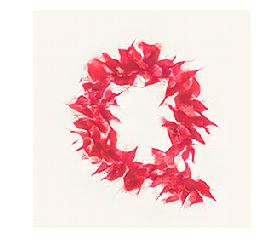

In [3]:
netShapeM.G_S.load_state_dict(torch.load('../save/maple-GS-iccv.ckpt'))  
netShapeM.eval()
I = load_image('../data/rawtext/yaheiB/val/0801.png')
I = to_var(I[:,:,32:288,32:288])
result = netShapeM(I, 1)
visualize(to_data(result[0]))